# Segmentation

In [ ]:
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar

--2023-07-13 07:02:04--  https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar
Resolving msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)... 52.92.243.66, 3.5.76.120, 52.92.178.82, ...
Connecting to msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)|52.92.243.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12289971712 (11G) [application/x-tar]
Saving to: ‘Task07_Pancreas.tar’

Task07_Pancreas.tar 100%[===================>]  11.45G  13.6MB/s    in 11m 40s 

2023-07-13 07:13:45 (16.7 MB/s) - ‘Task07_Pancreas.tar’ saved [12289971712/12289971712]



In [ ]:
import tarfile
from tqdm.auto import tqdm
tar = tarfile.open('/content/Task07_Pancreas.tar')
tqdm(tar.extractall())
tar.close()

0it [00:00, ?it/s]

In [ ]:
!pip install -q med2image
import med2image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.6/634.6 kB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!med2image -i '/content/Task07_Pancreas/imagesTr/pancreas_040.nii.gz'\
          -d Data/images                  \
          -o sample.jpg -s -1

sliceToConvert: -1
2023-07-13 07:48:34  │    7eec9713f5da │                  med2image.py:med2image.run() │ About to perform NifTI to jpg conversion...

2023-07-13 07:48:34  │    7eec9713f5da │                  med2image.py:med2image.run() │ 3D volume detected.

2023-07-13 07:48:34  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ Saving along "z" dimension with 90 degree rotation...
2023-07-13 07:48:36  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ 45 images saved along "z" dimension.


In [ ]:
!med2image -i '/content/Task07_Pancreas/labelsTr/pancreas_040.nii.gz'\
          -d Data/masks                  \
          -o sample.jpg -s -1

sliceToConvert: -1
2023-07-13 07:48:26  │    7eec9713f5da │                  med2image.py:med2image.run() │ About to perform NifTI to jpg conversion...

2023-07-13 07:48:26  │    7eec9713f5da │                  med2image.py:med2image.run() │ 3D volume detected.

2023-07-13 07:48:26  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ Saving along "z" dimension with 90 degree rotation...
2023-07-13 07:48:28  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ 45 images saved along "z" dimension.


In [ ]:
import os
import shutil
import numpy as np
import imageio.v2 as imageio
from tqdm.auto import tqdm
import time

def move_images_with_nonzero_labels(image_directory, label_directory, output_image_directory, output_label_directory):
    # Create the output directories if they don't exist
    os.makedirs(output_image_directory, exist_ok=True)
    os.makedirs(output_label_directory, exist_ok=True)
    count = 0
    # Recursively iterate through all files and subdirectories in the label directory with tqdm.auto progress bar
    for root, dirs, files in tqdm(os.walk(label_directory), desc="Moving Files"):
        for file in files:
            label_path = os.path.join(root, file)
            image_path = os.path.join(image_directory, os.path.relpath(label_path, label_directory))

            # Load the label image
            label_array = imageio.imread(label_path)

            # Calculate the percentage of non-zero values in the label array
            non_zero_percentage = np.count_nonzero(label_array) / label_array.size

            # Check if the non-zero percentage exceeds 1%
            if non_zero_percentage > 0.01:
                # Generate a unique base name for the files using the current timestamp
                base_name = str(int(time.time()))

                # Generate new filenames by appending the base name to the original filenames
                new_image_filename = f"{base_name}_{file}"
                new_label_filename = f"{base_name}_{file}"

                # Move the corresponding image and label files with the new filenames
                shutil.move(image_path, os.path.join(output_image_directory, new_image_filename))
                shutil.move(label_path, os.path.join(output_label_directory, new_label_filename))
                count = count + 1
    print(count)

In [ ]:
image_directory = "/content/Data/images"
label_directory = "/content/Data/masks"
output_image_directory = "/content/data/output_image_directory"
output_label_directory = "/content/data/output_label_directory"

move_images_with_nonzero_labels(image_directory, label_directory, output_image_directory, output_label_directory)

Moving Files: 0it [00:00, ?it/s]

11


## Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-fuzzy
!pip install MedPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=4b0d4afe545c6ff8c4cad7d0fd84e4f6baa4e25a2de9fe6e501c1a043313d038
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.0 MB/s eta 0:00:00
  Created wheel for MedPy: filename=MedPy-0.4.0-py3-none-any.whl size=214946 sha256=30680bdcacd51ffc90926d841a6b950c3f04a8908cb62eb844b865eda0917b7e
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built MedPy


In [ ]:
!mkdir "/content/Resized"
directory = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/TRAIN/Normal'
output = '/content/Resized'

In [ ]:
import cv2
import nibabel as nib
from time import time
import skfuzzy as fuzz
import os
from google.colab.patches import cv2_imshow
from medpy.filter.smoothing import anisotropic_diffusion
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(directory, filename), 0)
        resize = cv2.resize(img, (256, 256))
        cv2.imwrite(os.path.join(output , 'resized_'+filename), resize)
        print(filename)
    else:
        continue

In [ ]:
!mkdir "/content/preprocess_output"
!mkdir "/content/preprocess_output/processed_img"
#!mkdir "/content/preprocess_output/mask"

In [ ]:
directory = '/content/data/output_image_directory'
output = '/content/preprocess_output/processed_img'
#mask = '/content/preprocess_output/mask'

for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(mask , '_mask_'+filename))
        img = cv2.imread(os.path.join(directory, filename), 0)
        equ = cv2.equalizeHist(img)
        clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
        cl_img = clahe.apply(img)
        cl_img = anisotropic_diffusion(cl_img)
        cl_img = cl_img.astype(np.uint8)
        ret, thresh1 = cv2.threshold(cl_img, 190, 150, cv2.THRESH_BINARY)
        ret, thresh2 = cv2.threshold(cl_img, 190, 255, cv2.THRESH_BINARY_INV)
        ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh3 = cv2.resize(thresh3, (256, 256))
        cv2.imwrite(os.path.join(output , '_pre_'+filename), cl_img)
        #cv2.imwrite(os.path.join(mask , '_mask_'+filename), thresh3)
        # cv2.imwrite(os.path.join(output)+'_pre_'+filename,thresh3)
    else:
        continue

/content/mask_resized/_mask_1689234391_sample-slice036.jpg
/content/mask_resized/_mask_1689233927_sample-slice039.jpg
/content/mask_resized/_mask_1689234391_sample-slice058.jpg
/content/mask_resized/_mask_1689234305_sample-slice042.jpg
/content/mask_resized/_mask_1689234335_sample-slice046.jpg
/content/mask_resized/_mask_1689234335_sample-slice050.jpg
/content/mask_resized/_mask_1689234363_sample-slice025.jpg
/content/mask_resized/_mask_1689234011_sample-slice047.jpg
/content/mask_resized/_mask_1689234391_sample-slice056.jpg
/content/mask_resized/_mask_1689234494_sample-slice024.jpg
/content/mask_resized/_mask_1689234335_sample-slice036.jpg
/content/mask_resized/_mask_1689234392_sample-slice035.jpg
/content/mask_resized/_mask_1689233880_sample-slice061.jpg
/content/mask_resized/_mask_1689234469_sample-slice049.jpg
/content/mask_resized/_mask_1689234335_sample-slice042.jpg
/content/mask_resized/_mask_1689234391_sample-slice044.jpg


/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


/content/mask_resized/_mask_1689234335_sample-slice029.jpg
/content/mask_resized/_mask_1689234521_sample-slice013.jpg
/content/mask_resized/_mask_sample-slice063.jpg
/content/mask_resized/_mask_1689233880_sample-slice036.jpg
/content/mask_resized/_mask_1689234074_sample-slice046.jpg
/content/mask_resized/_mask_1689234391_sample-slice028.jpg
/content/mask_resized/_mask_1689233880_sample-slice062.jpg
/content/mask_resized/_mask_1689234335_sample-slice033.jpg
/content/mask_resized/_mask_1689234363_sample-slice032.jpg
/content/mask_resized/_mask_1689234039_sample-slice038.jpg
/content/mask_resized/_mask_1689234391_sample-slice033.jpg
/content/mask_resized/_mask_1689233971_sample-slice044.jpg
/content/mask_resized/_mask_1689234276_sample-slice047.jpg
/content/mask_resized/_mask_1689234334_sample-slice044.jpg
/content/mask_resized/_mask_1689234335_sample-slice034.jpg
/content/mask_resized/_mask_1689234391_sample-slice053.jpg
/content/mask_resized/_mask_sample-slice054.jpg
/content/mask_resiz

# semantic segmentation using U-Net


In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import glob

In [ ]:
image_directory = '/content/data/output_image_directory'
mask_directory = '/content/data/output_label_directory'

In [ ]:
SIZE = 512
num_images = 1000

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/content/preprocess_output/processed_img/*.jpg")
print(image_names)

['/content/preprocess_output/processed_img/_pre_sample-slice054.jpg', '/content/preprocess_output/processed_img/_pre_1689233927_sample-slice052.jpg', '/content/preprocess_output/processed_img/_pre_sample-slice060.jpg', '/content/preprocess_output/processed_img/_pre_1689234305_sample-slice053.jpg', '/content/preprocess_output/processed_img/_pre_1689234011_sample-slice045.jpg', '/content/preprocess_output/processed_img/_pre_1689234521_sample-slice013.jpg', '/content/preprocess_output/processed_img/_pre_1689233971_sample-slice085.jpg', '/content/preprocess_output/processed_img/_pre_1689234113_sample-slice040.jpg', '/content/preprocess_output/processed_img/_pre_1689234113_sample-slice055.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice069.jpg', '/content/preprocess_output/processed_img/_pre_1689234391_sample-slice043.jpg', '/content/preprocess_output/processed_img/_pre_1689234074_sample-slice047.jpg', '/content/preprocess_output/processed_img/_pre_1689233971_sam

In [ ]:
image_names.sort()
print(image_names)

['/content/preprocess_output/processed_img/_pre_1689233808_sample-slice039.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice040.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice041.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice042.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice043.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice044.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice045.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice046.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice047.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice048.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice049.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice050.jpg', '/content/preprocess_output/processed_i

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
print(image_dataset)
image_dataset = np.expand_dims(image_dataset, axis = 3)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
!mkdir "/content/mask_resized"

In [ ]:
from google.colab.patches import cv2_imshow


/content/mask_resized/_mask_1689234391_sample-slice036.jpg


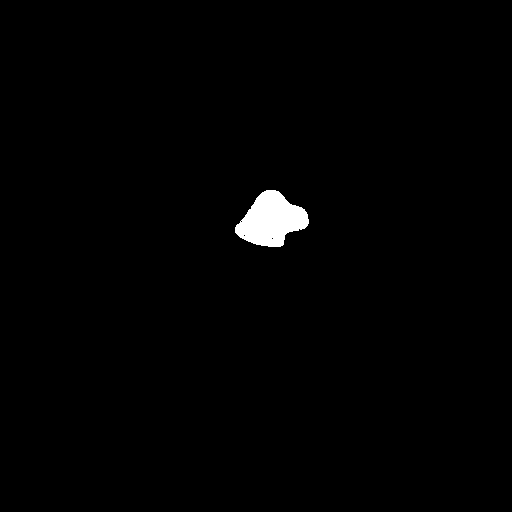

/content/mask_resized/_mask_1689233927_sample-slice039.jpg


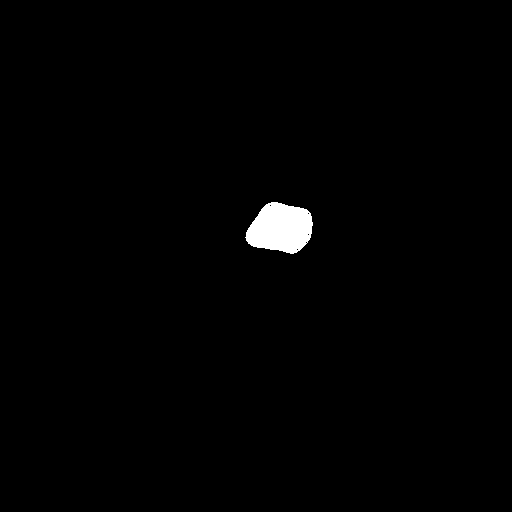

/content/mask_resized/_mask_1689234391_sample-slice058.jpg


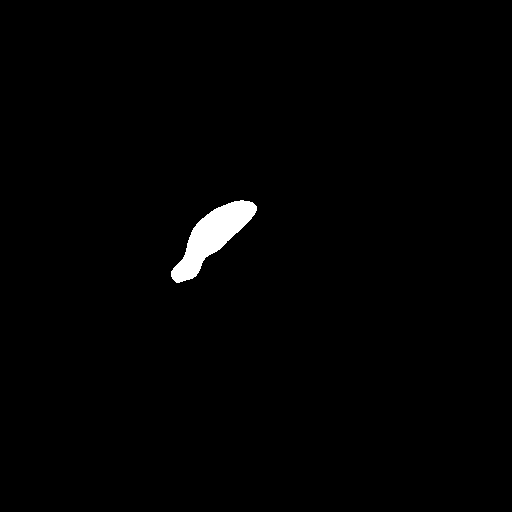

/content/mask_resized/_mask_1689234305_sample-slice042.jpg


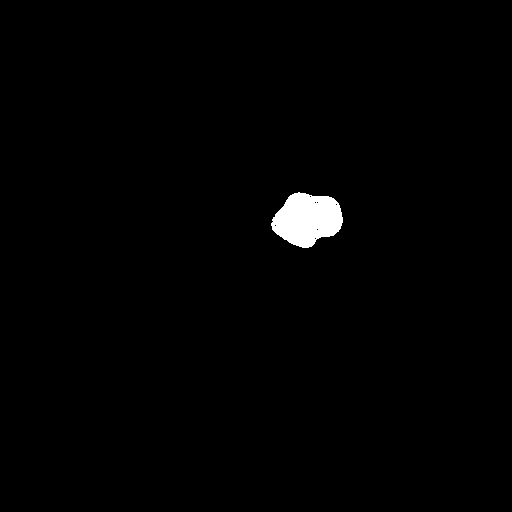

/content/mask_resized/_mask_1689234335_sample-slice046.jpg


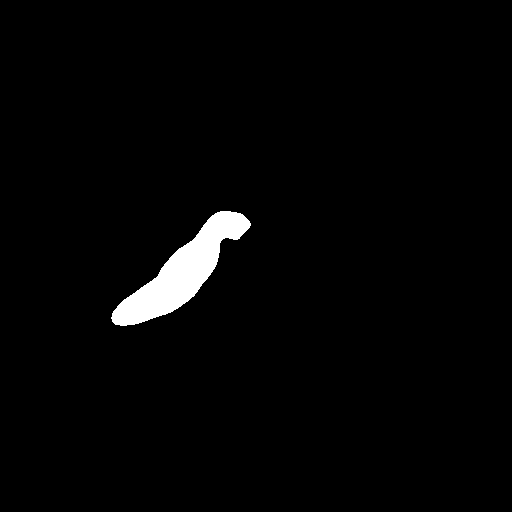

/content/mask_resized/_mask_1689234335_sample-slice050.jpg


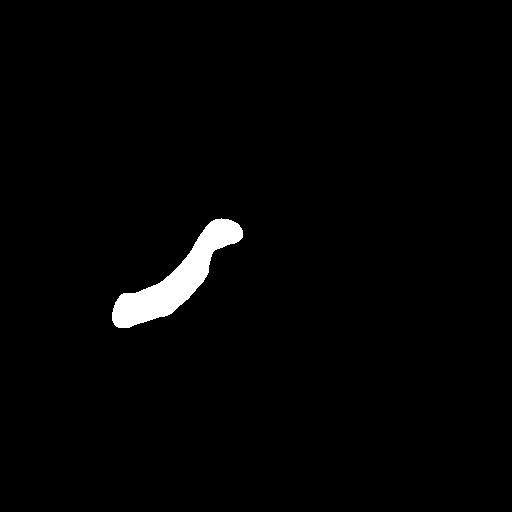

/content/mask_resized/_mask_1689234363_sample-slice025.jpg


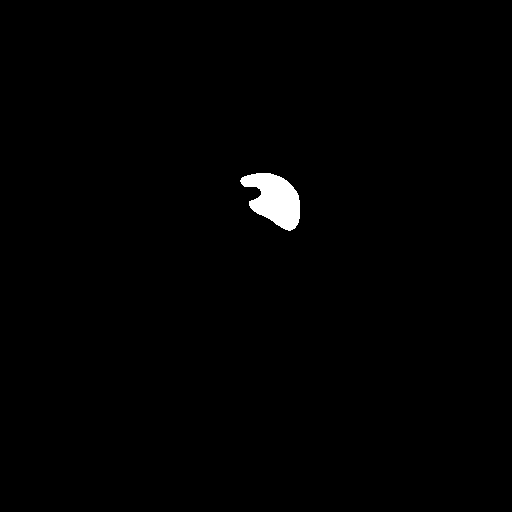

/content/mask_resized/_mask_1689234011_sample-slice047.jpg


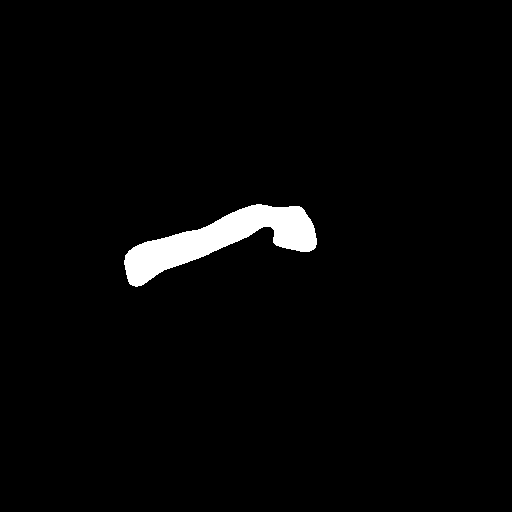

/content/mask_resized/_mask_1689234391_sample-slice056.jpg


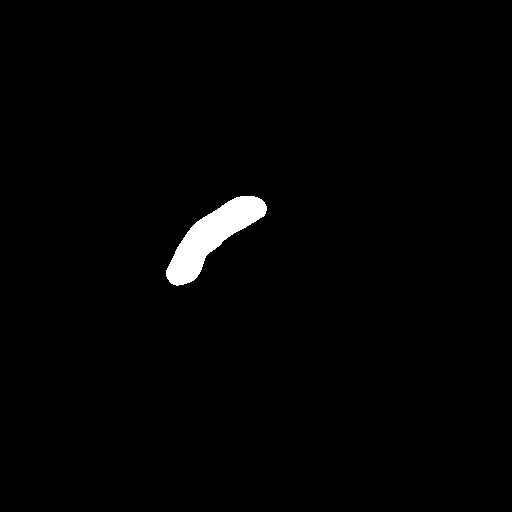

/content/mask_resized/_mask_1689234494_sample-slice024.jpg


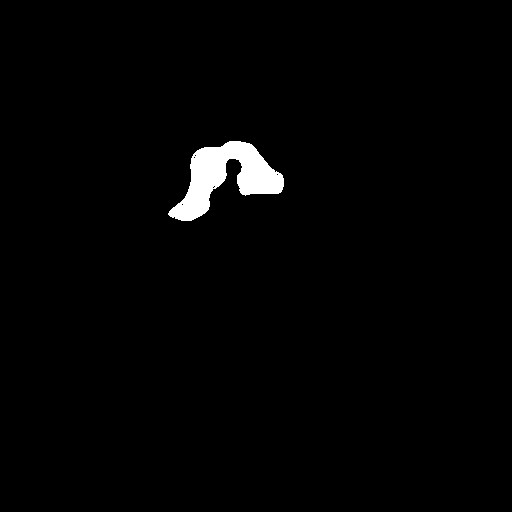

/content/mask_resized/_mask_1689234335_sample-slice036.jpg


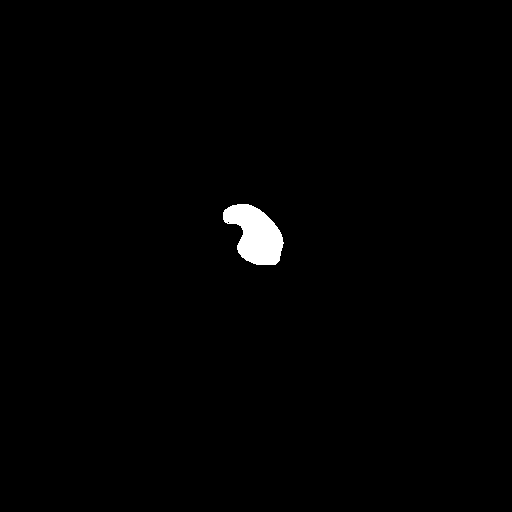

/content/mask_resized/_mask_1689234392_sample-slice035.jpg


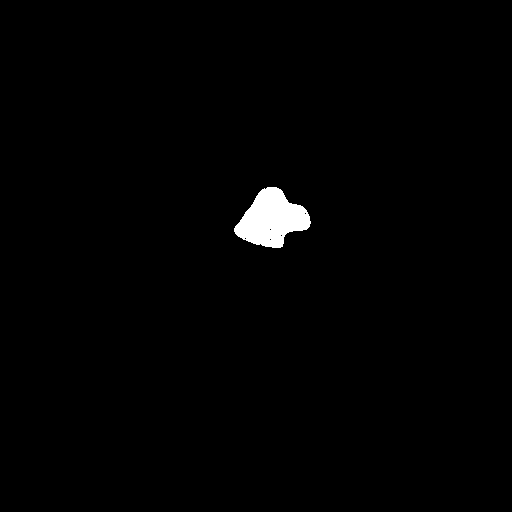

/content/mask_resized/_mask_1689233880_sample-slice061.jpg


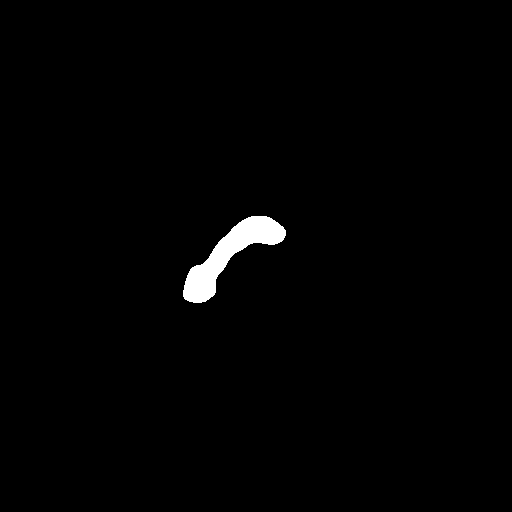

/content/mask_resized/_mask_1689234469_sample-slice049.jpg


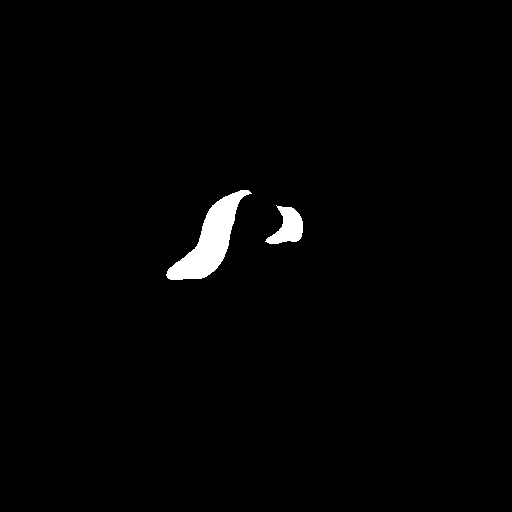

/content/mask_resized/_mask_1689234335_sample-slice042.jpg


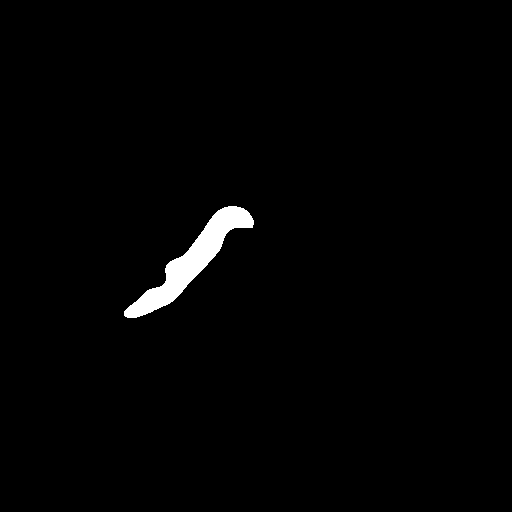

/content/mask_resized/_mask_1689234391_sample-slice044.jpg


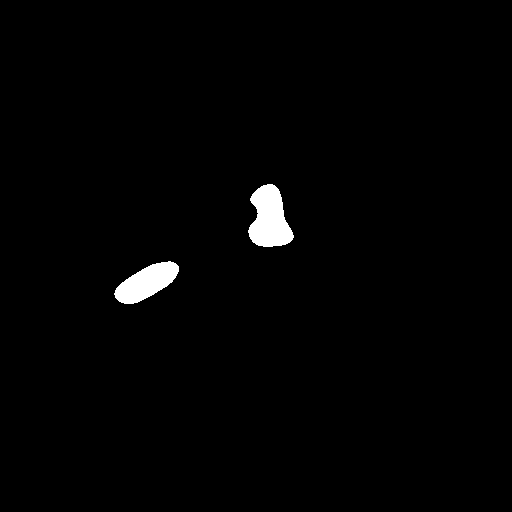

/content/mask_resized/_mask_1689234335_sample-slice029.jpg


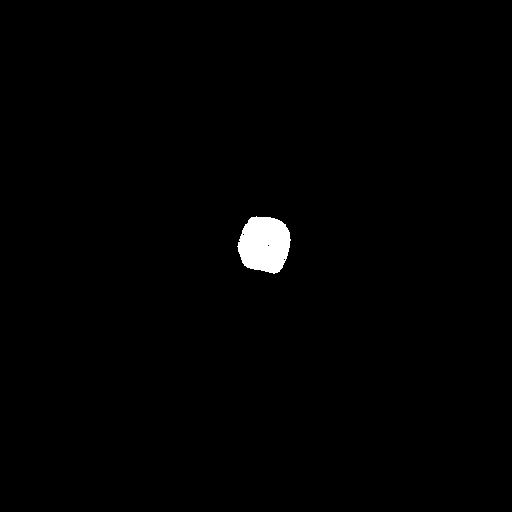

/content/mask_resized/_mask_1689234521_sample-slice013.jpg


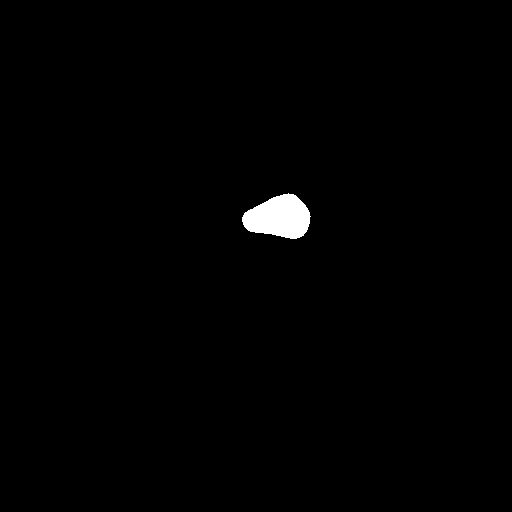

/content/mask_resized/_mask_sample-slice063.jpg


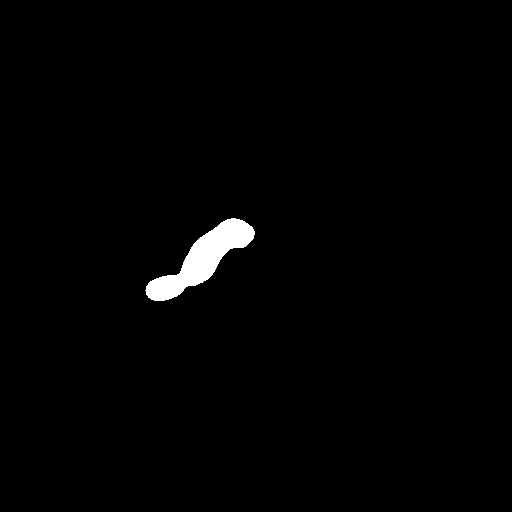

/content/mask_resized/_mask_1689233880_sample-slice036.jpg


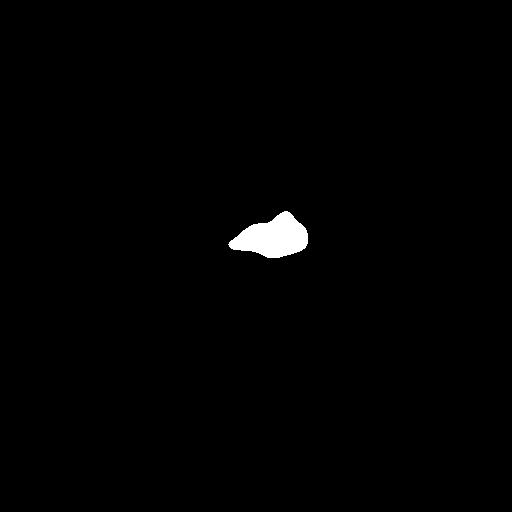

/content/mask_resized/_mask_1689234074_sample-slice046.jpg


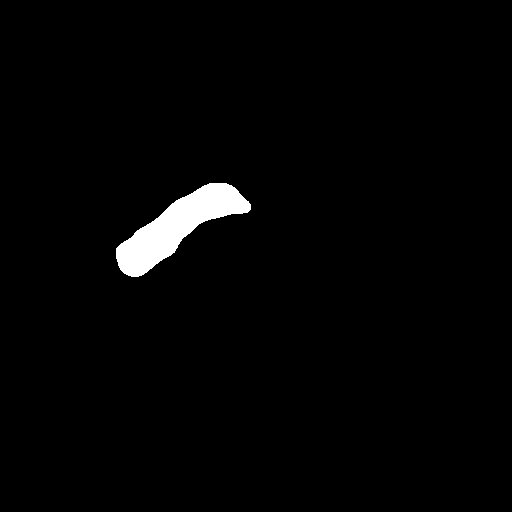

/content/mask_resized/_mask_1689234391_sample-slice028.jpg


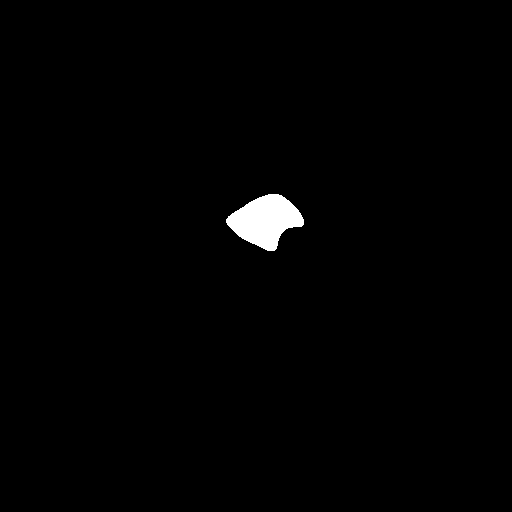

/content/mask_resized/_mask_1689233880_sample-slice062.jpg


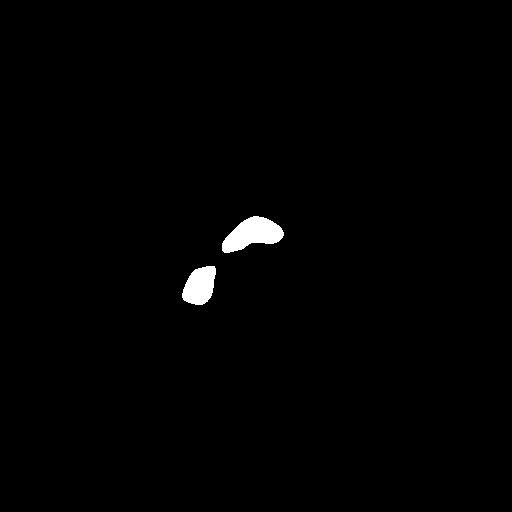

/content/mask_resized/_mask_1689234335_sample-slice033.jpg


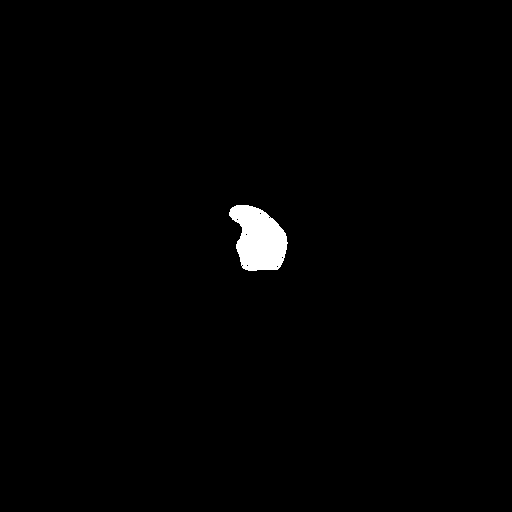

/content/mask_resized/_mask_1689234363_sample-slice032.jpg


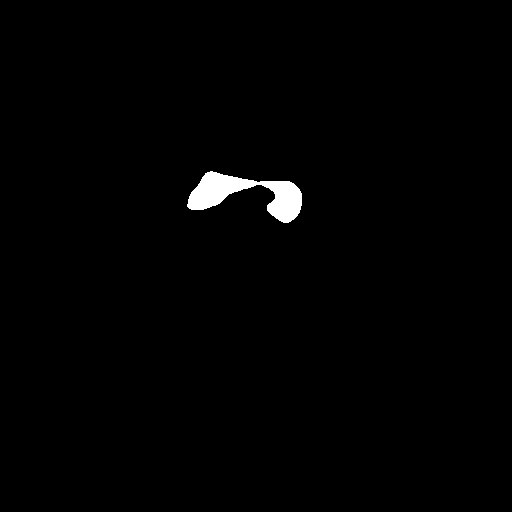

/content/mask_resized/_mask_1689234039_sample-slice038.jpg


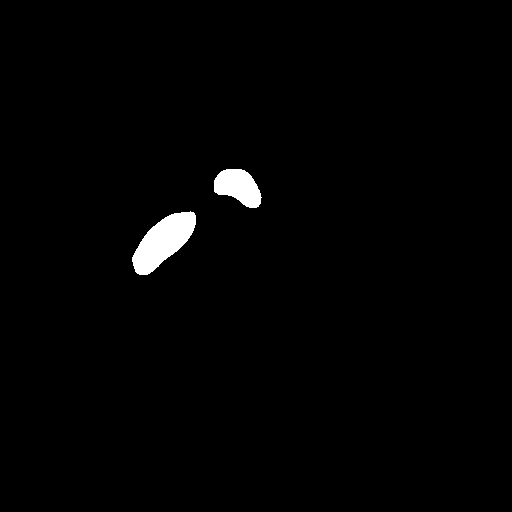

/content/mask_resized/_mask_1689234391_sample-slice033.jpg


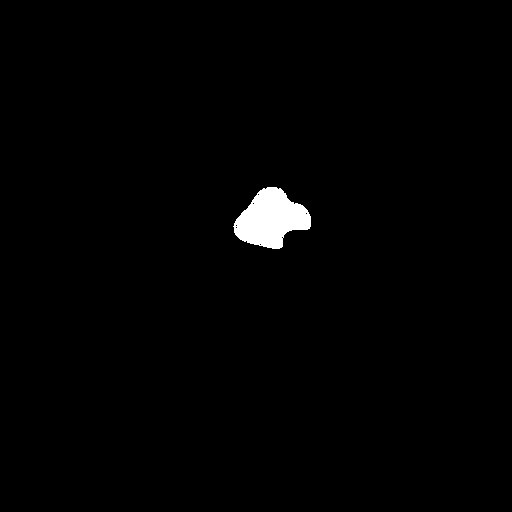

/content/mask_resized/_mask_1689233971_sample-slice044.jpg


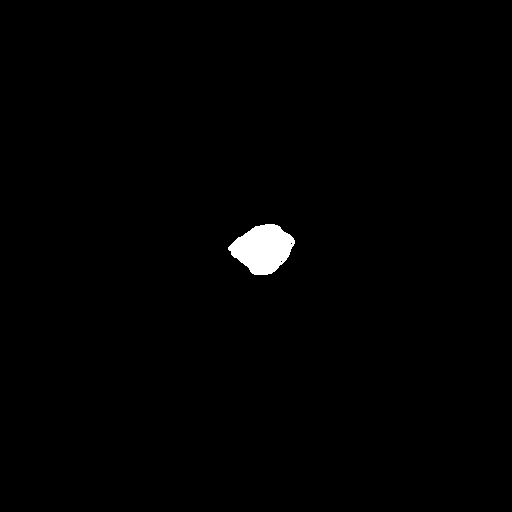

/content/mask_resized/_mask_1689234276_sample-slice047.jpg


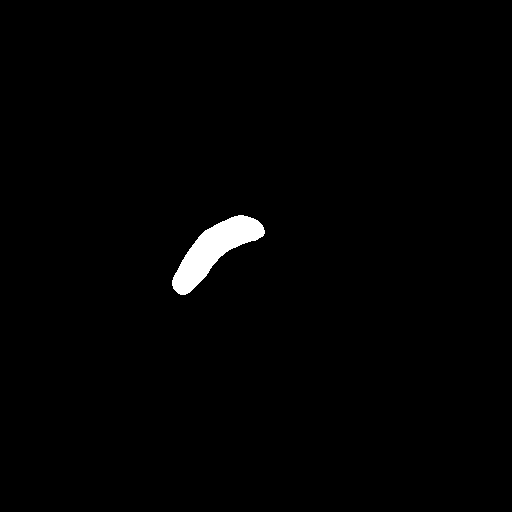

/content/mask_resized/_mask_1689234334_sample-slice044.jpg


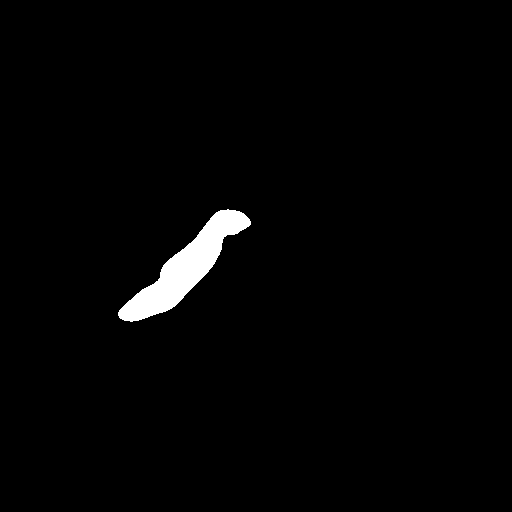

/content/mask_resized/_mask_1689234335_sample-slice034.jpg


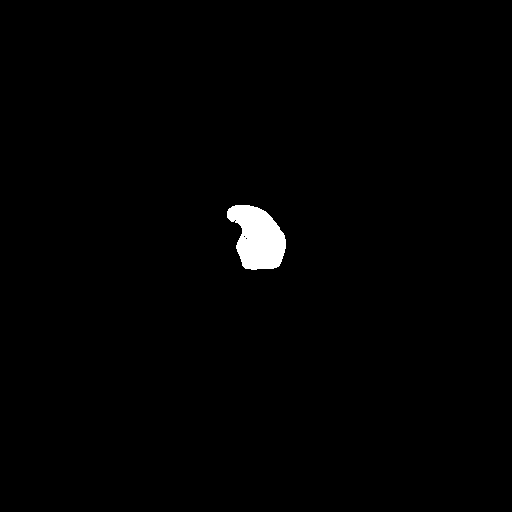

/content/mask_resized/_mask_1689234391_sample-slice053.jpg


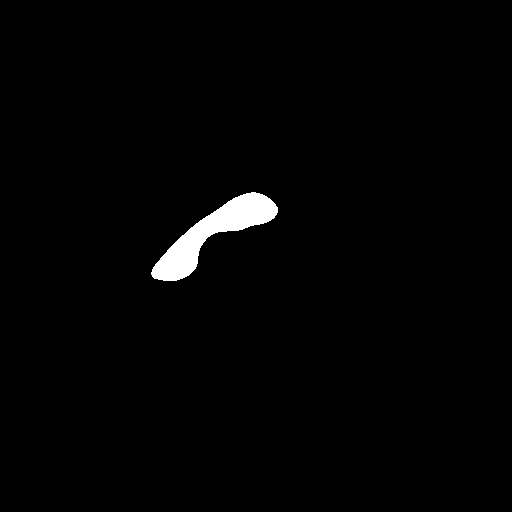

/content/mask_resized/_mask_sample-slice054.jpg


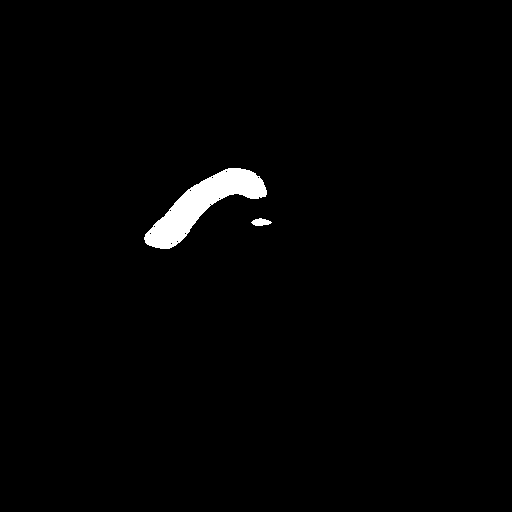

/content/mask_resized/_mask_sample-slice062.jpg


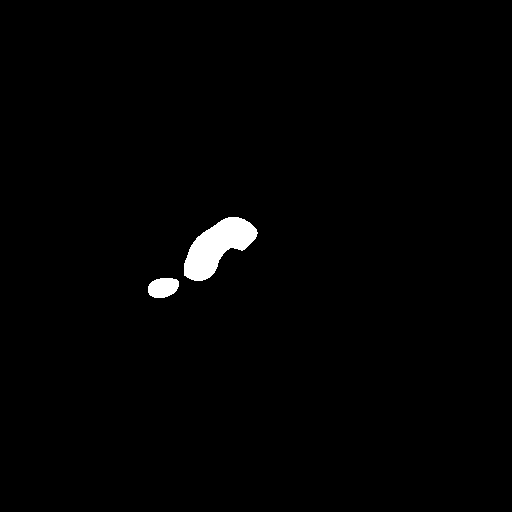

/content/mask_resized/_mask_sample-slice048.jpg


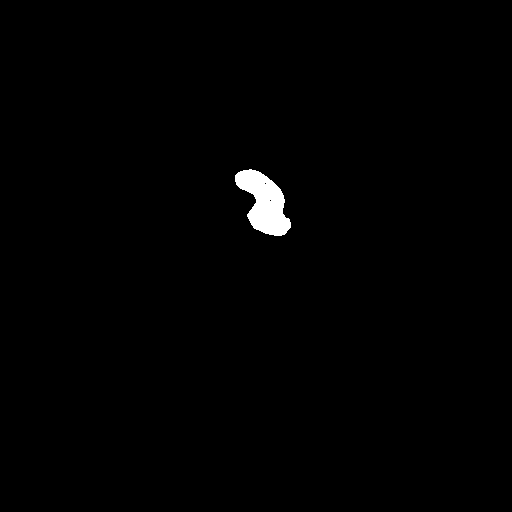

/content/mask_resized/_mask_1689234363_sample-slice022.jpg


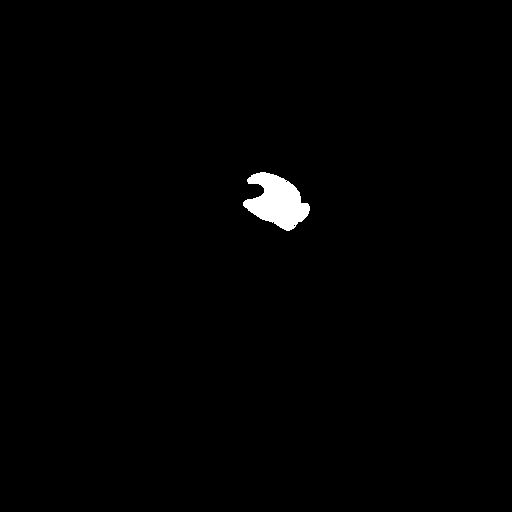

/content/mask_resized/_mask_1689234305_sample-slice044.jpg


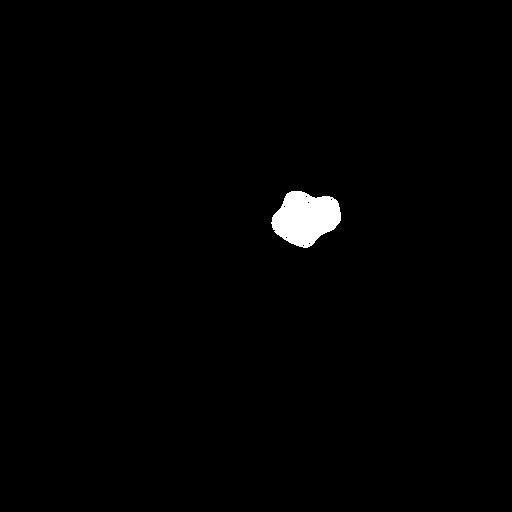

/content/mask_resized/_mask_1689234114_sample-slice039.jpg


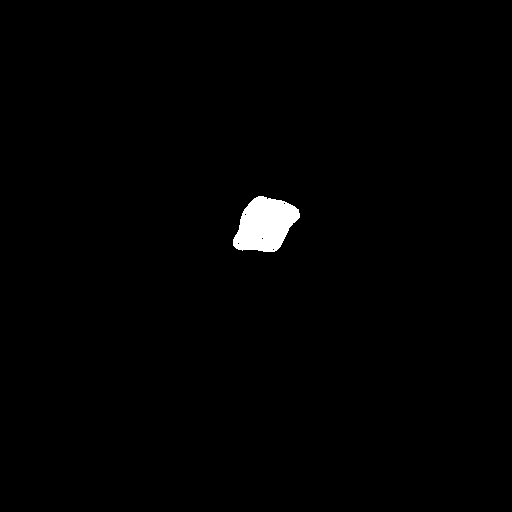

/content/mask_resized/_mask_1689233971_sample-slice098.jpg


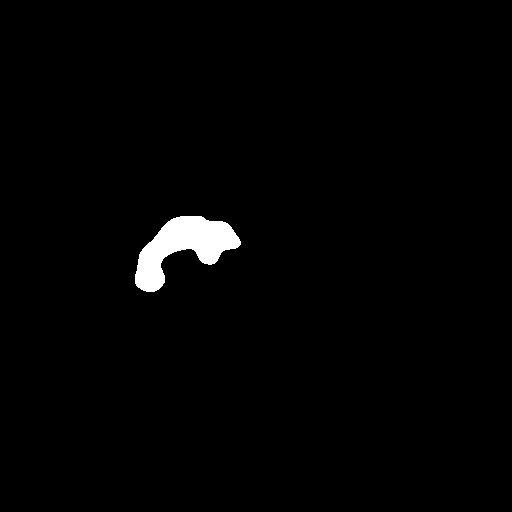

/content/mask_resized/_mask_1689234494_sample-slice026.jpg


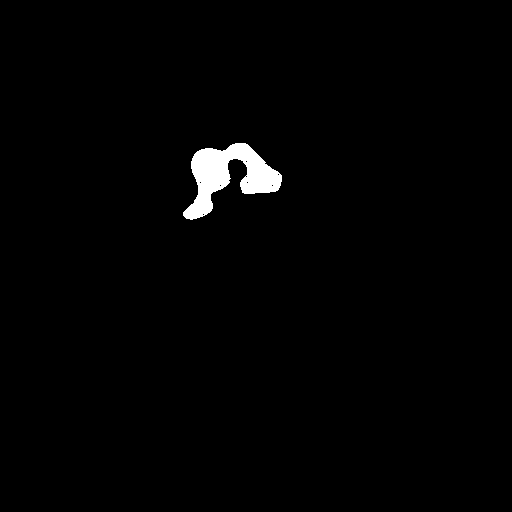

/content/mask_resized/_mask_1689234113_sample-slice055.jpg


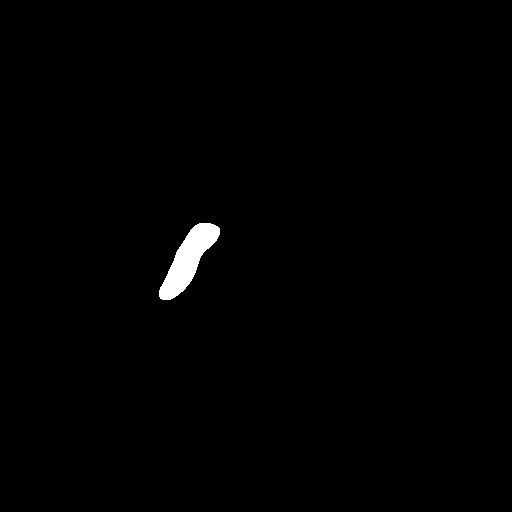

/content/mask_resized/_mask_1689233927_sample-slice047.jpg


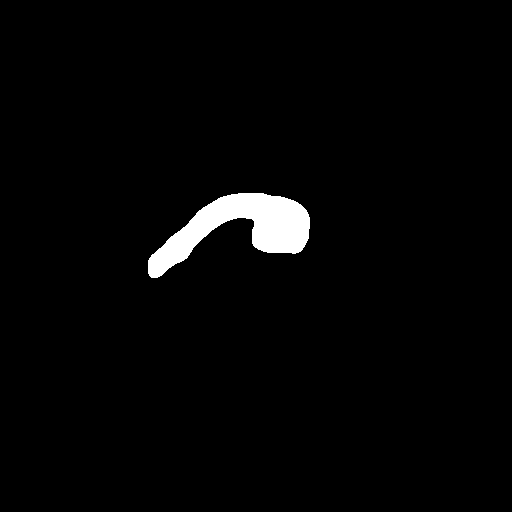

/content/mask_resized/_mask_sample-slice044.jpg


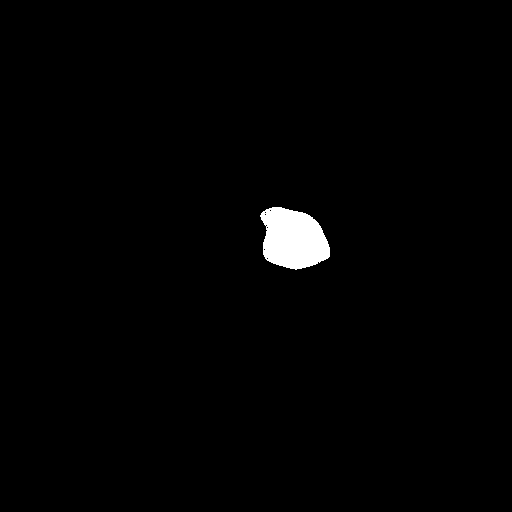

/content/mask_resized/_mask_1689234494_sample-slice014.jpg


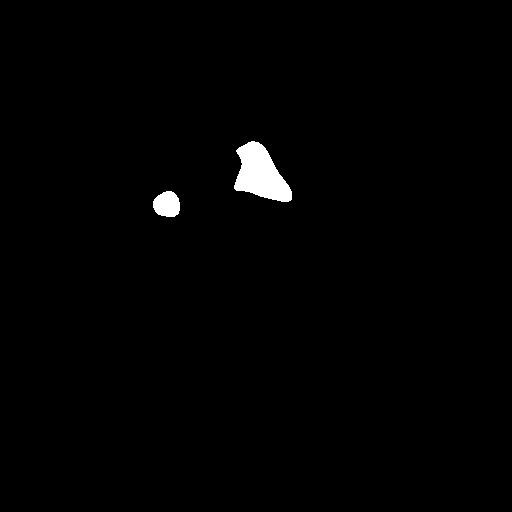

/content/mask_resized/_mask_1689234305_sample-slice046.jpg


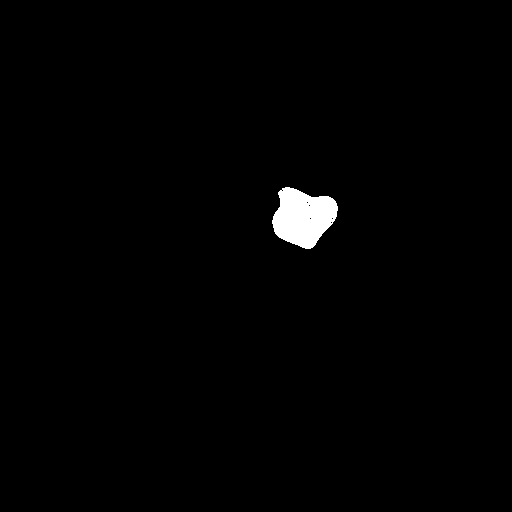

/content/mask_resized/_mask_1689233880_sample-slice037.jpg


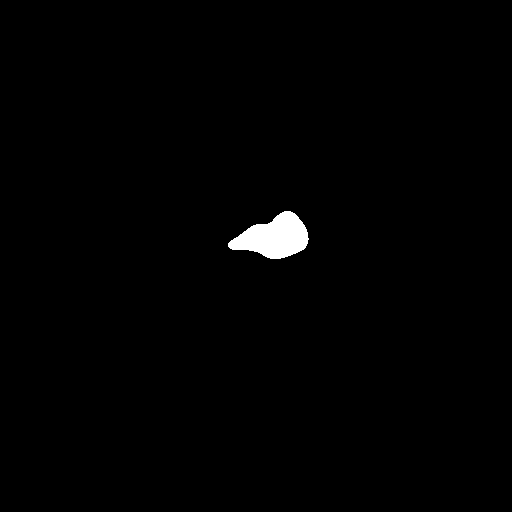

/content/mask_resized/_mask_1689234011_sample-slice044.jpg


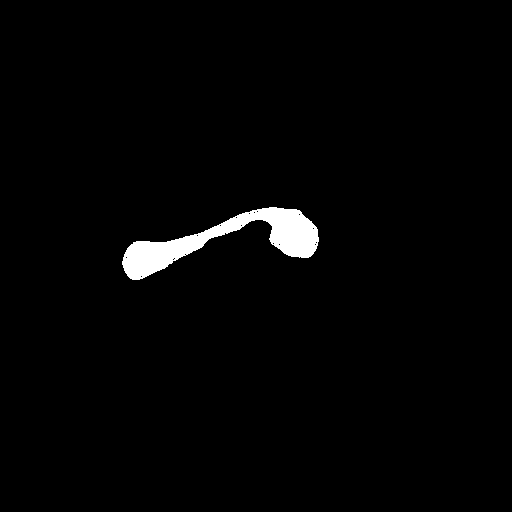

/content/mask_resized/_mask_1689234305_sample-slice052.jpg


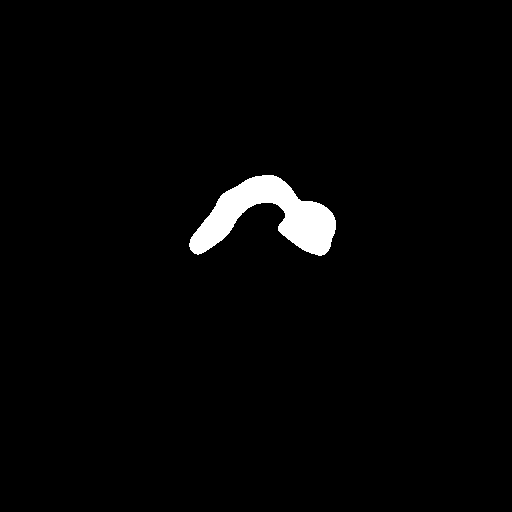

/content/mask_resized/_mask_1689234391_sample-slice038.jpg


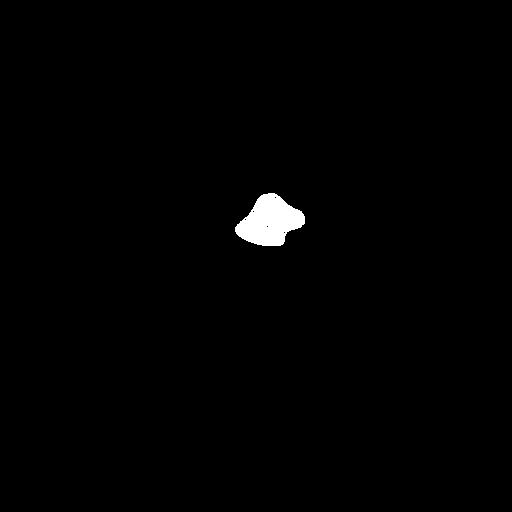

/content/mask_resized/_mask_1689234244_sample-slice052.jpg


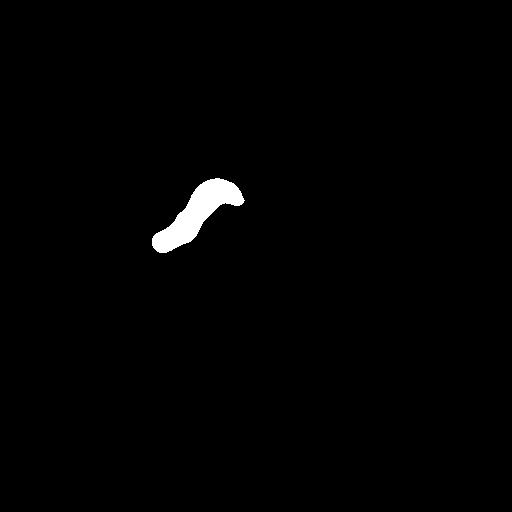

/content/mask_resized/_mask_1689233971_sample-slice100.jpg


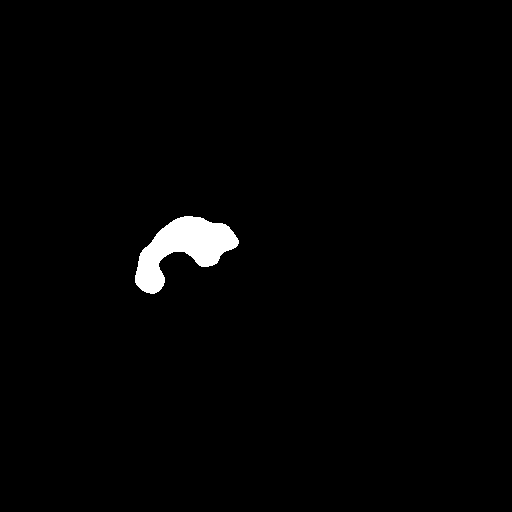

/content/mask_resized/_mask_1689234305_sample-slice058.jpg


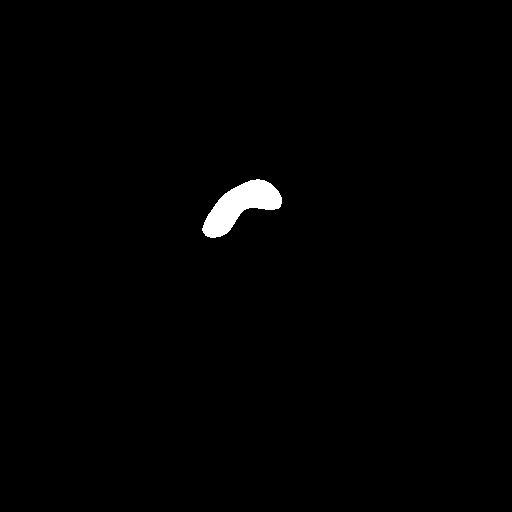

/content/mask_resized/_mask_1689234425_sample-slice038.jpg


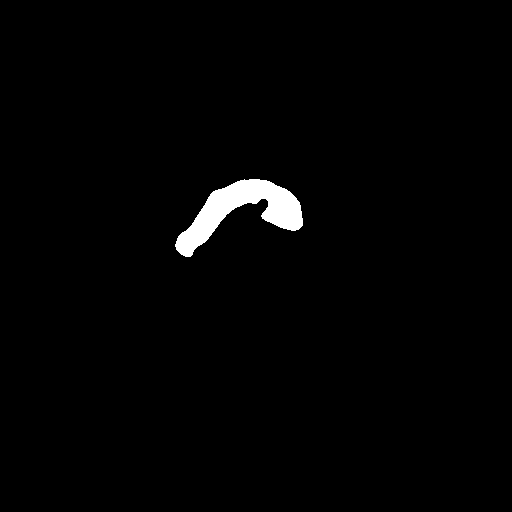

/content/mask_resized/_mask_1689233927_sample-slice053.jpg


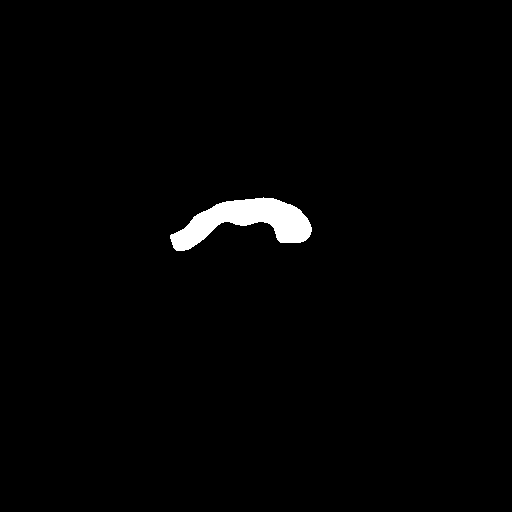

/content/mask_resized/_mask_1689234391_sample-slice054.jpg


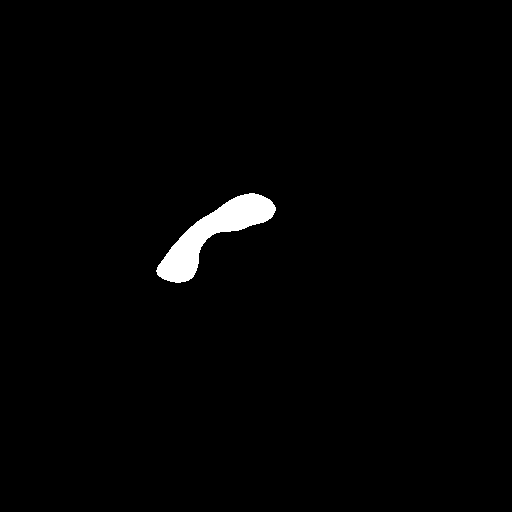

/content/mask_resized/_mask_1689233880_sample-slice038.jpg


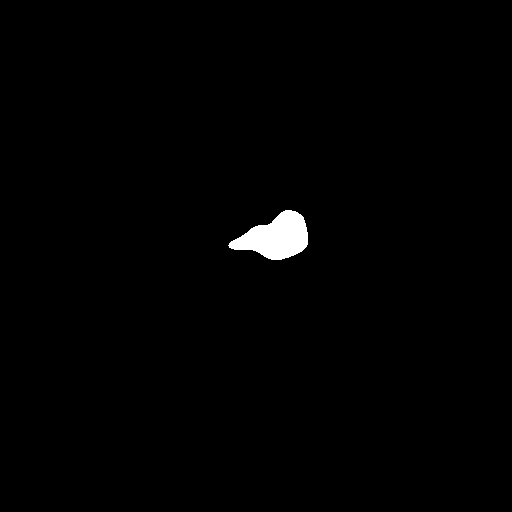

/content/mask_resized/_mask_1689234391_sample-slice041.jpg


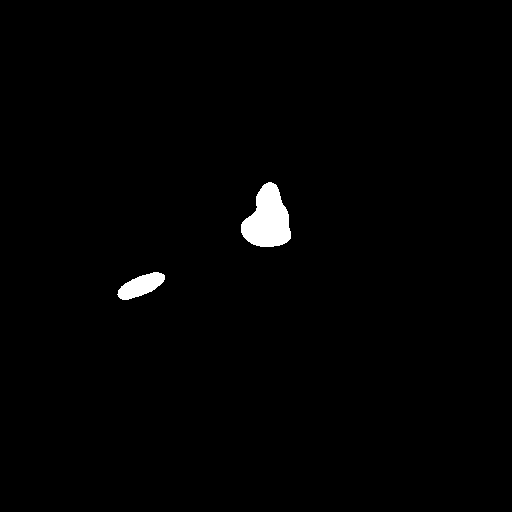

/content/mask_resized/_mask_1689234521_sample-slice018.jpg


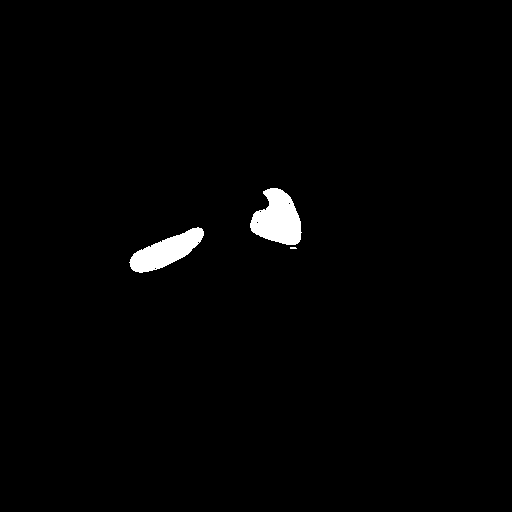

/content/mask_resized/_mask_1689234363_sample-slice036.jpg


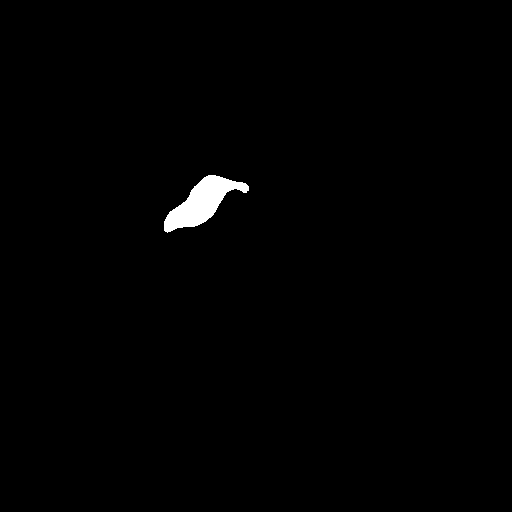

/content/mask_resized/_mask_sample-slice045.jpg


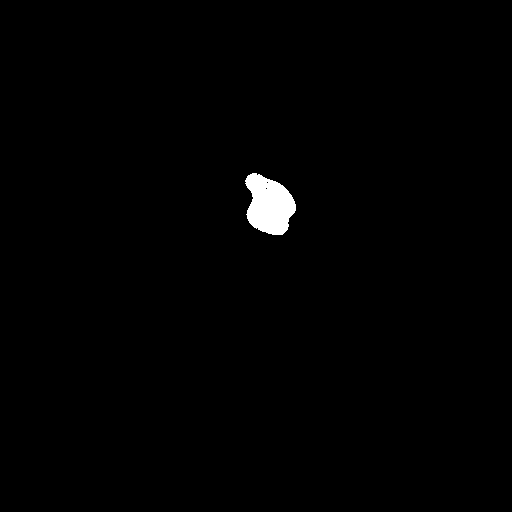

/content/mask_resized/_mask_1689233808_sample-slice048.jpg


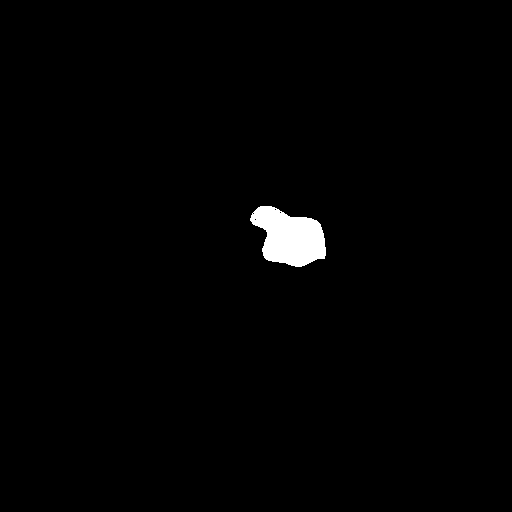

/content/mask_resized/_mask_1689234011_sample-slice045.jpg


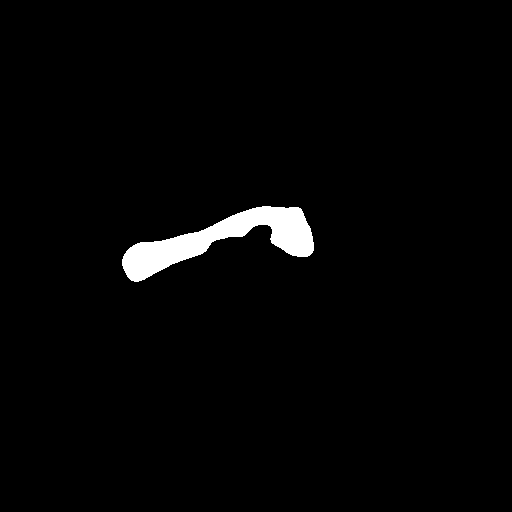

/content/mask_resized/_mask_1689234335_sample-slice045.jpg


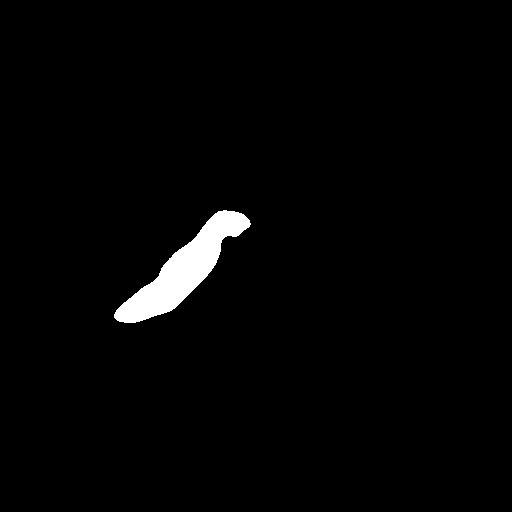

/content/mask_resized/_mask_1689234305_sample-slice049.jpg


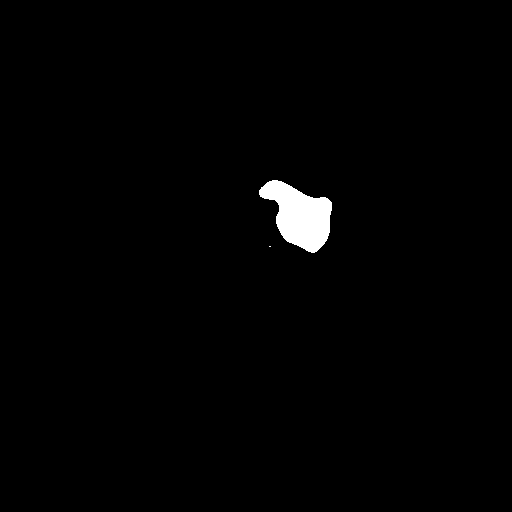

/content/mask_resized/_mask_sample-slice055.jpg


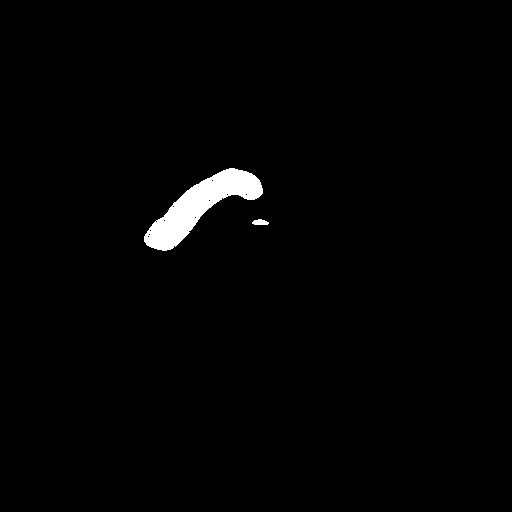

/content/mask_resized/_mask_1689233808_sample-slice069.jpg


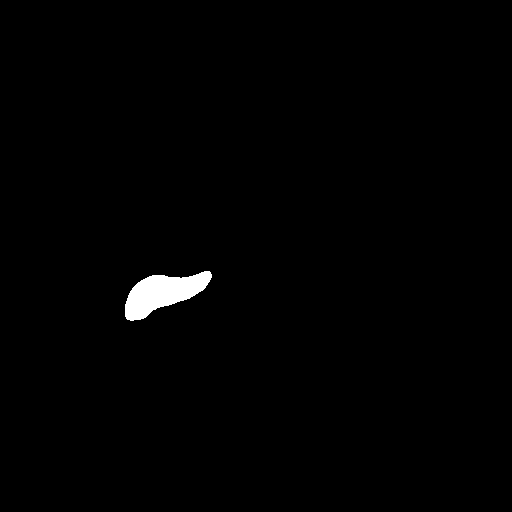

/content/mask_resized/_mask_sample-slice069.jpg


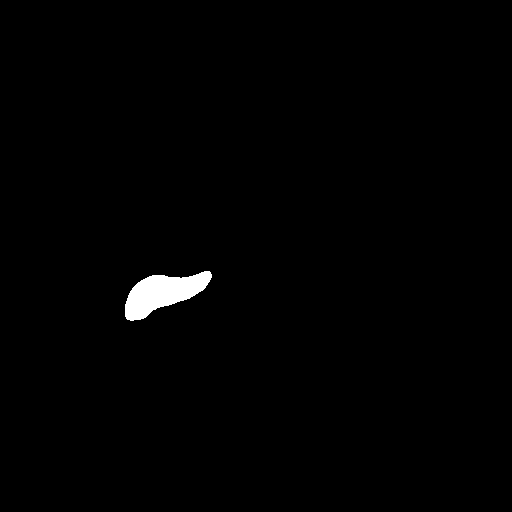

/content/mask_resized/_mask_1689234494_sample-slice025.jpg


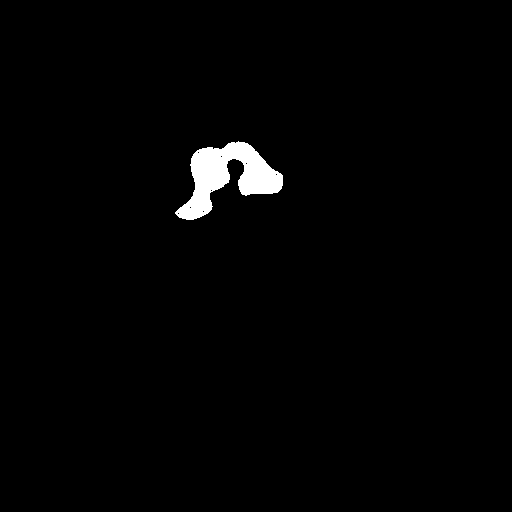

/content/mask_resized/_mask_1689233880_sample-slice056.jpg


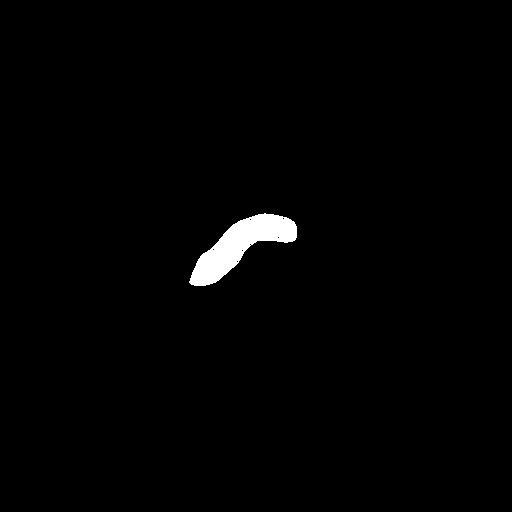

/content/mask_resized/_mask_1689234391_sample-slice027.jpg


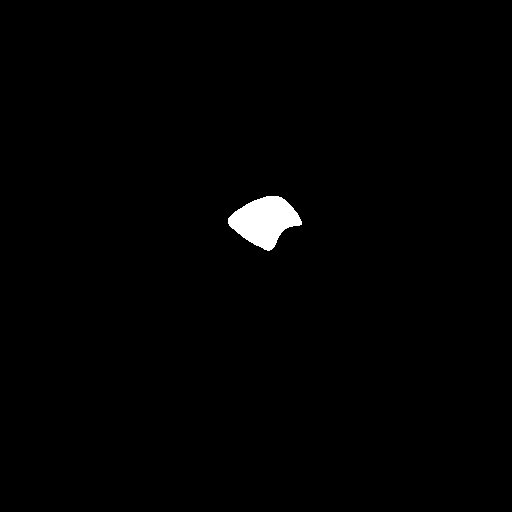

/content/mask_resized/_mask_1689233808_sample-slice052.jpg


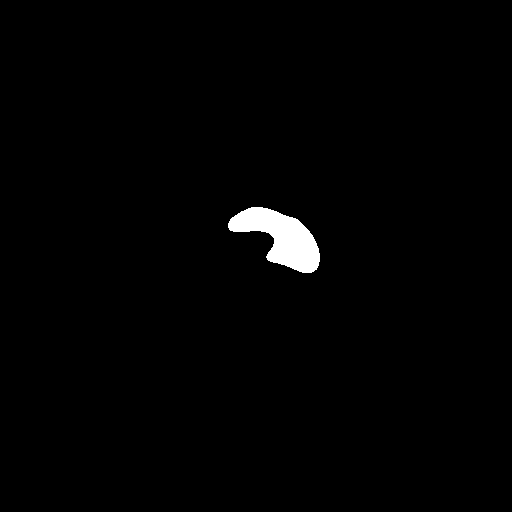

/content/mask_resized/_mask_1689233971_sample-slice089.jpg


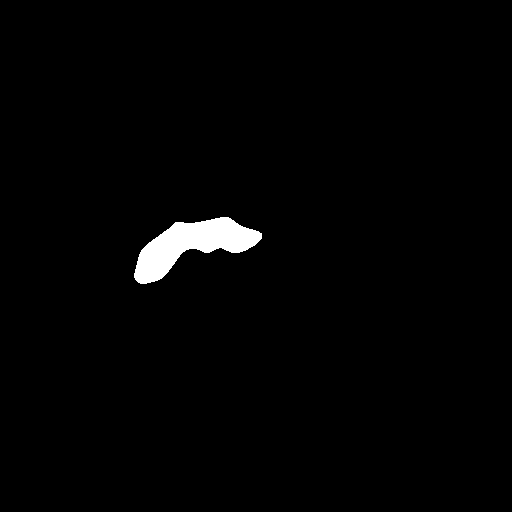

/content/mask_resized/_mask_sample-slice049.jpg


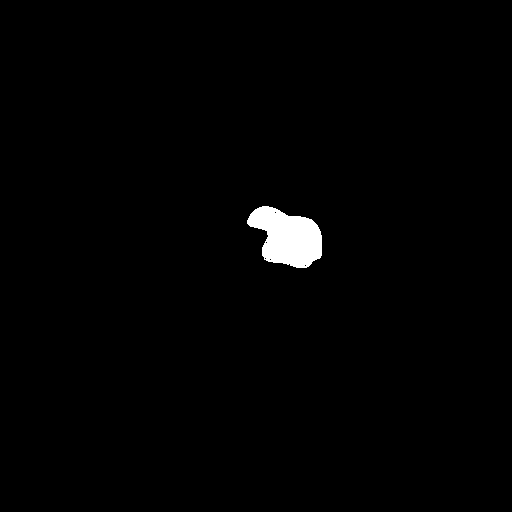

/content/mask_resized/_mask_1689233808_sample-slice068.jpg


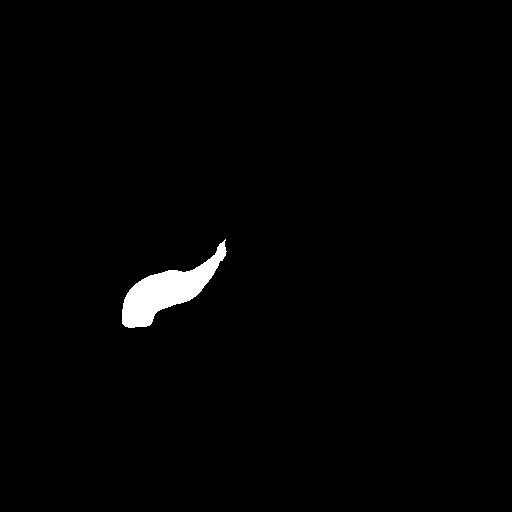

/content/mask_resized/_mask_1689234391_sample-slice046.jpg


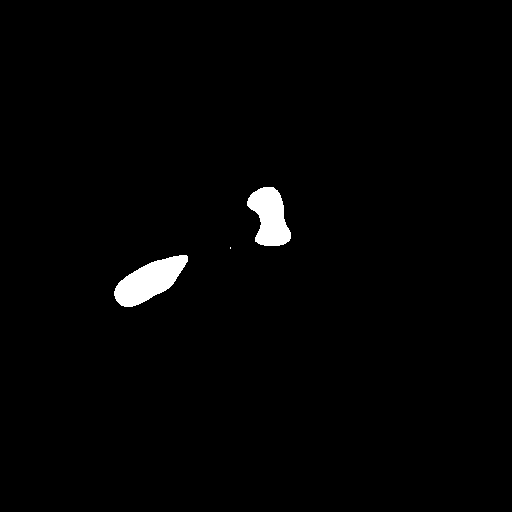

/content/mask_resized/_mask_1689234039_sample-slice045.jpg


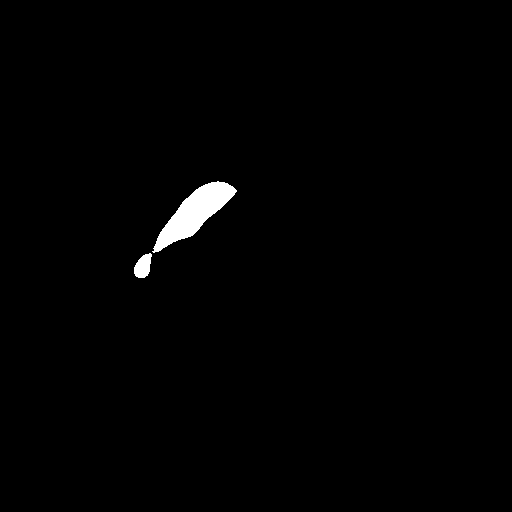

/content/mask_resized/_mask_1689234391_sample-slice051.jpg


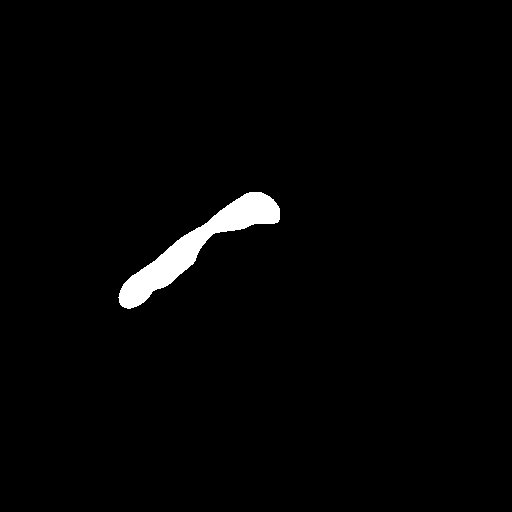

/content/mask_resized/_mask_1689233808_sample-slice061.jpg


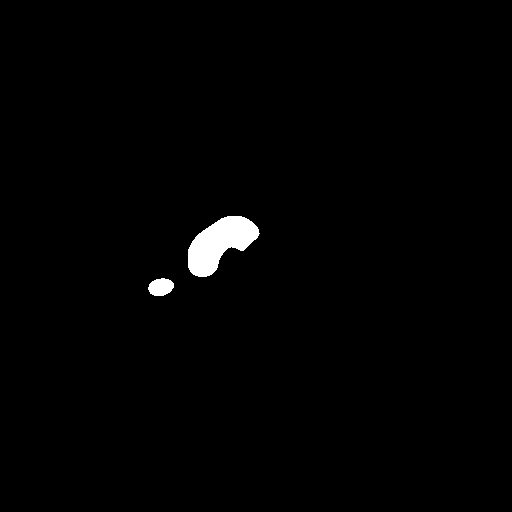

/content/mask_resized/_mask_1689234363_sample-slice023.jpg


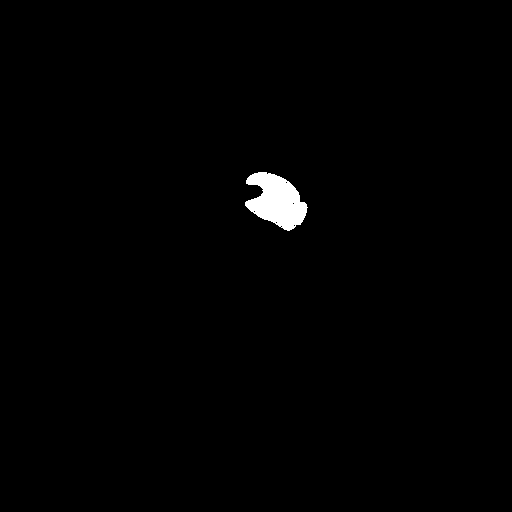

/content/mask_resized/_mask_1689233880_sample-slice055.jpg


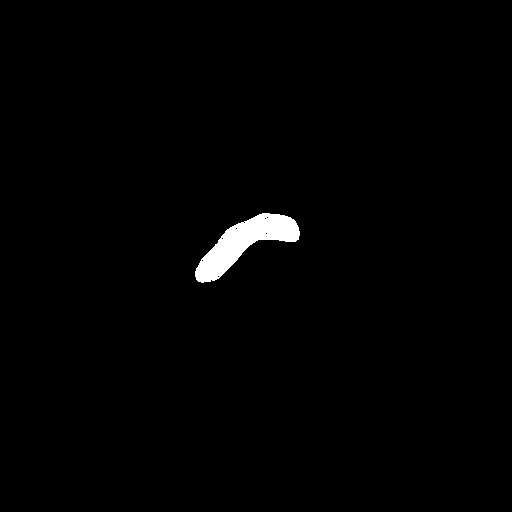

/content/mask_resized/_mask_1689233971_sample-slice049.jpg


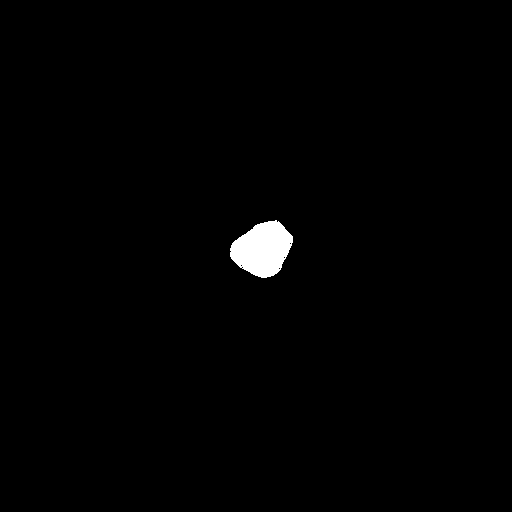

/content/mask_resized/_mask_1689234494_sample-slice020.jpg


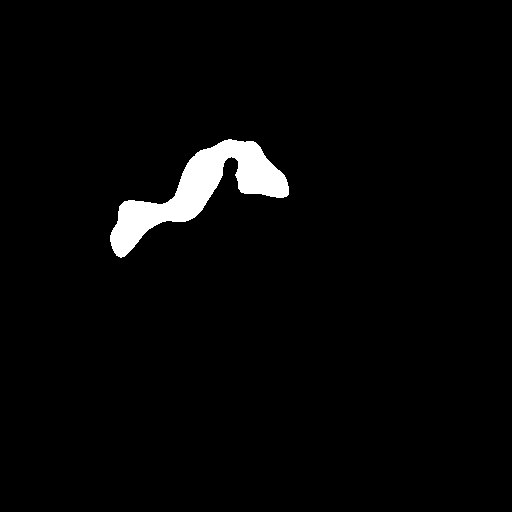

/content/mask_resized/_mask_1689234113_sample-slice040.jpg


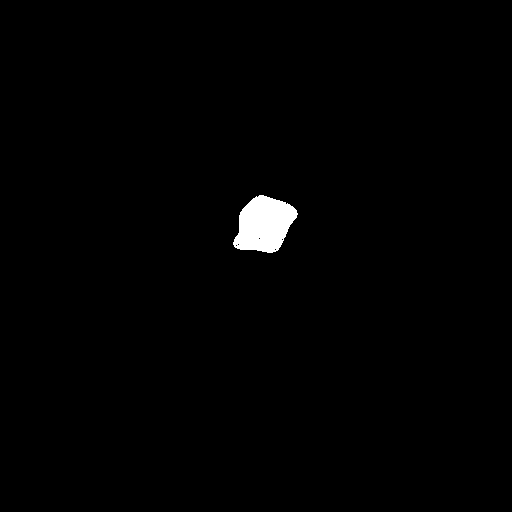

/content/mask_resized/_mask_1689233927_sample-slice038.jpg


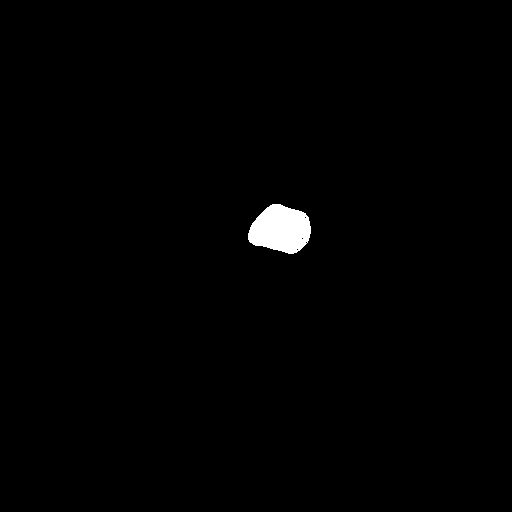

/content/mask_resized/_mask_1689234469_sample-slice048.jpg


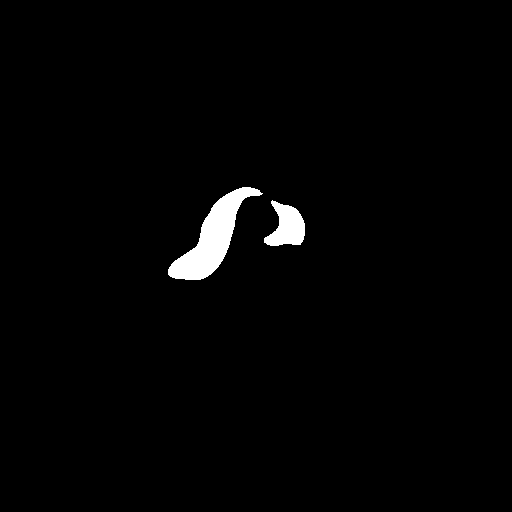

/content/mask_resized/_mask_1689233971_sample-slice055.jpg


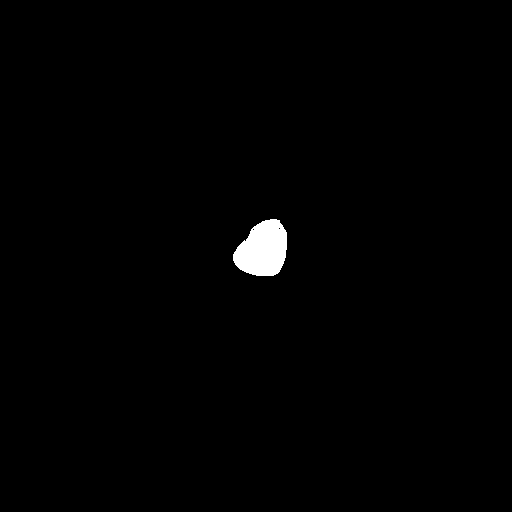

/content/mask_resized/_mask_1689233808_sample-slice055.jpg


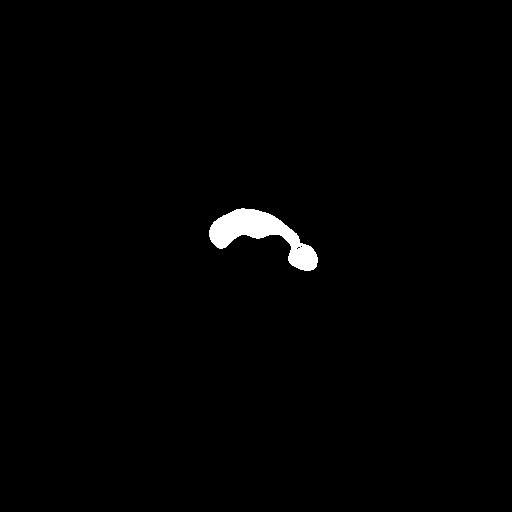

/content/mask_resized/_mask_1689234363_sample-slice028.jpg


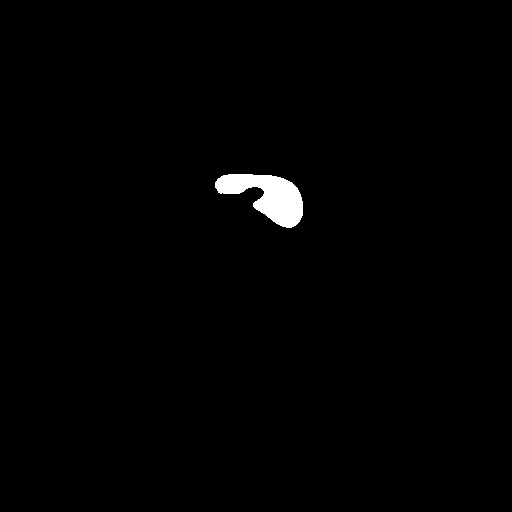

/content/mask_resized/_mask_sample-slice040.jpg


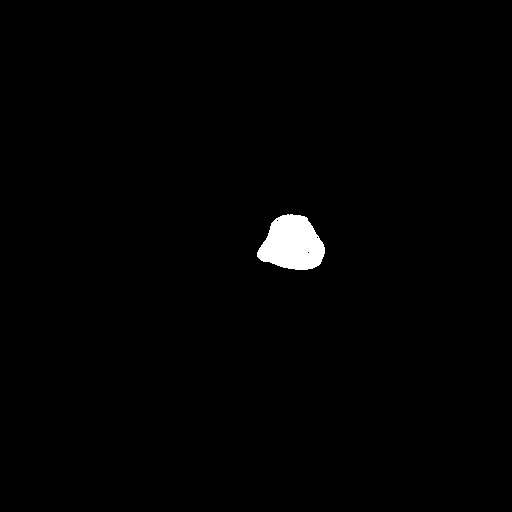

/content/mask_resized/_mask_1689233971_sample-slice053.jpg


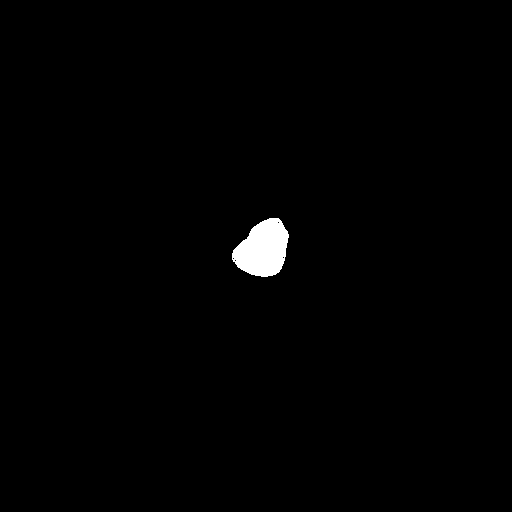

/content/mask_resized/_mask_1689234521_sample-slice016.jpg


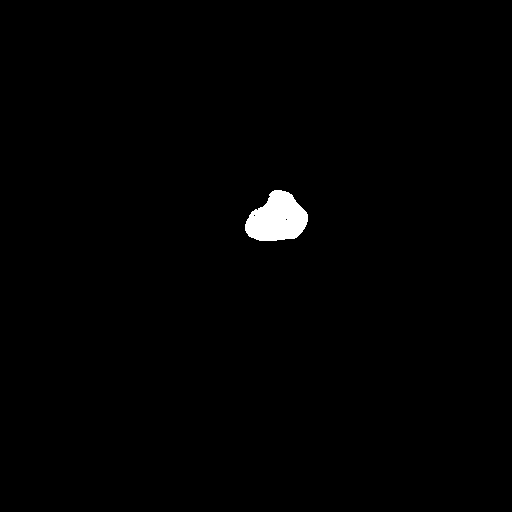

/content/mask_resized/_mask_1689234276_sample-slice043.jpg


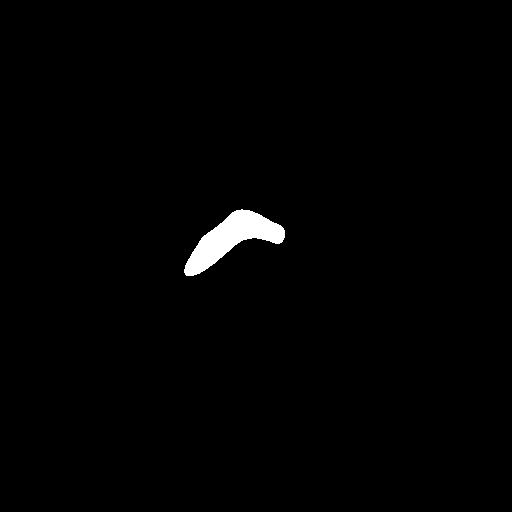

/content/mask_resized/_mask_1689233971_sample-slice084.jpg


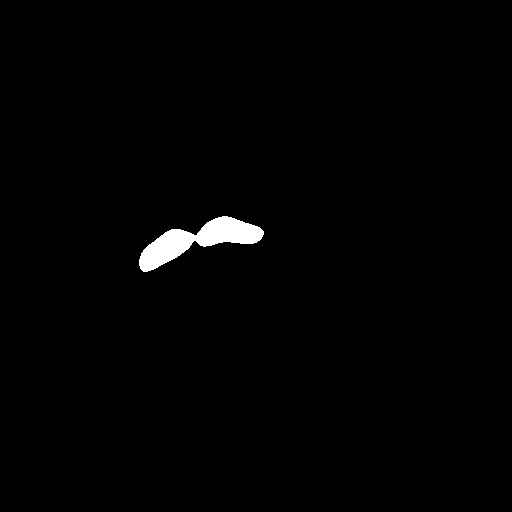

/content/mask_resized/_mask_1689234276_sample-slice048.jpg


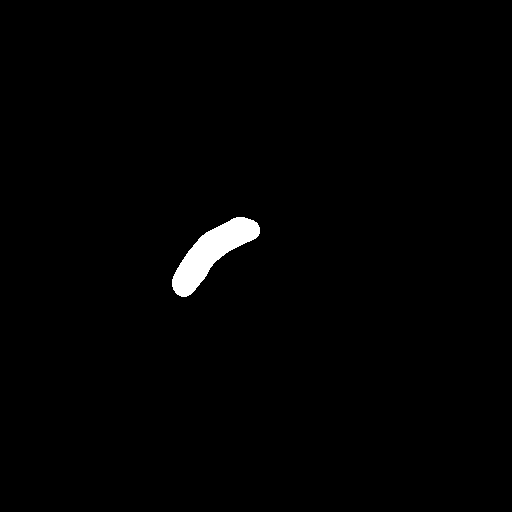

/content/mask_resized/_mask_1689233808_sample-slice067.jpg


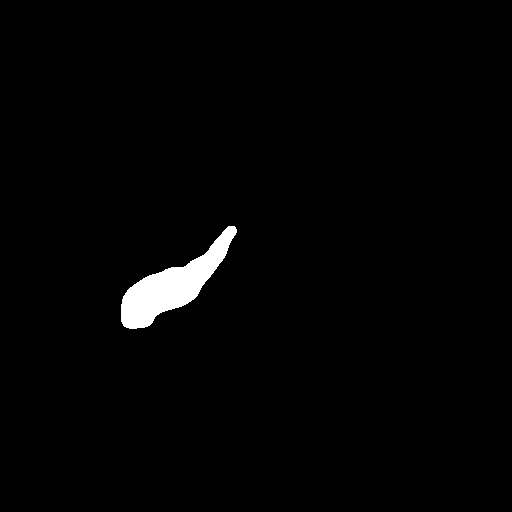

/content/mask_resized/_mask_1689233808_sample-slice044.jpg


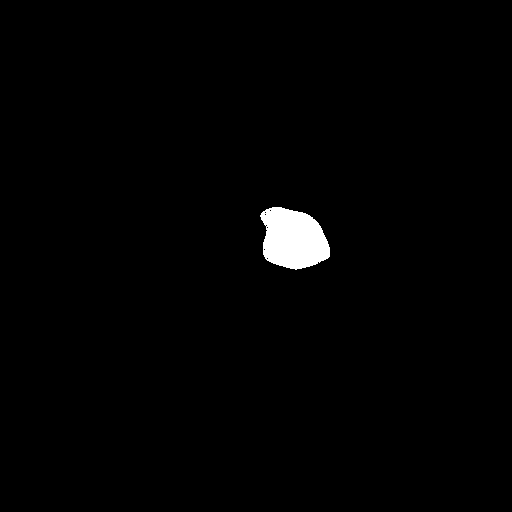

/content/mask_resized/_mask_1689234305_sample-slice043.jpg


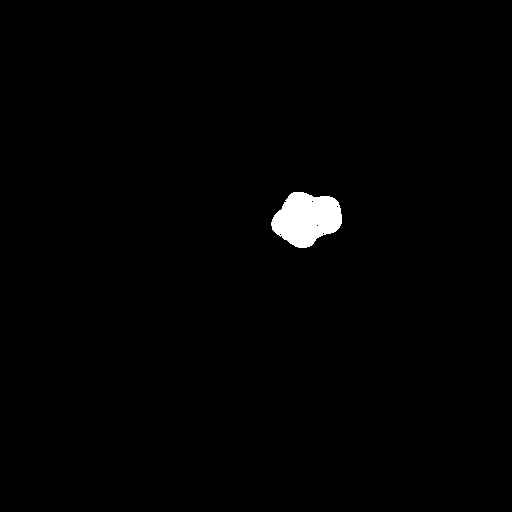

/content/mask_resized/_mask_1689234074_sample-slice044.jpg


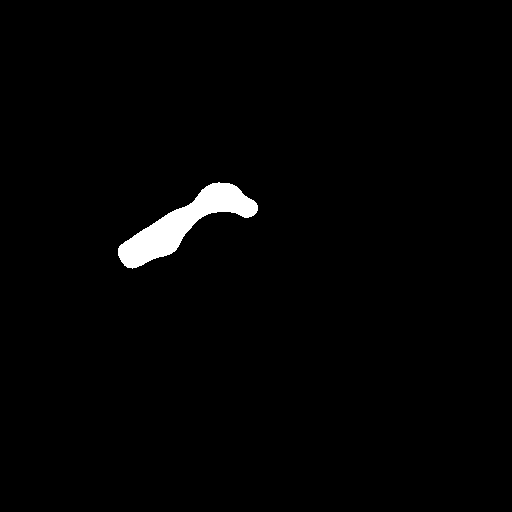

/content/mask_resized/_mask_1689234494_sample-slice019.jpg


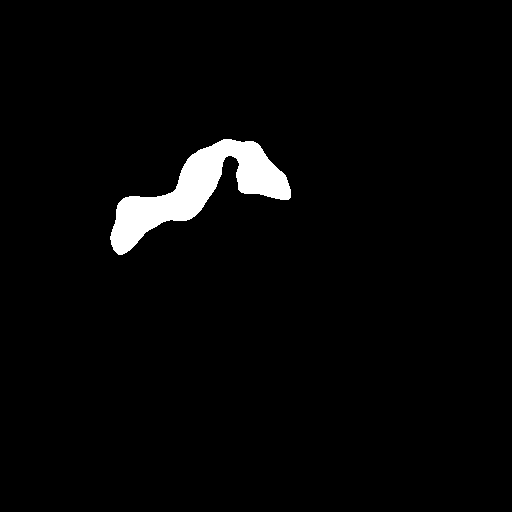

/content/mask_resized/_mask_1689234276_sample-slice046.jpg


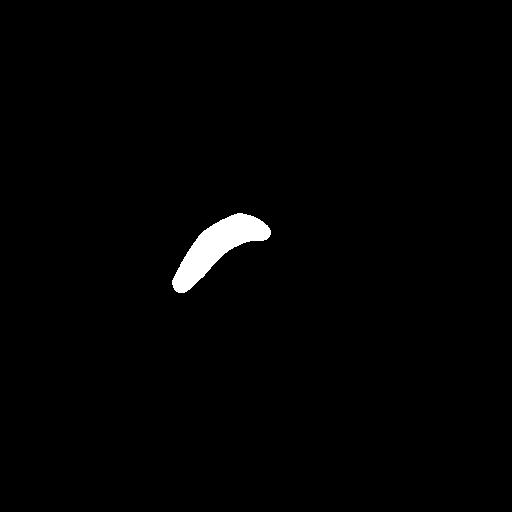

/content/mask_resized/_mask_1689234521_sample-slice017.jpg


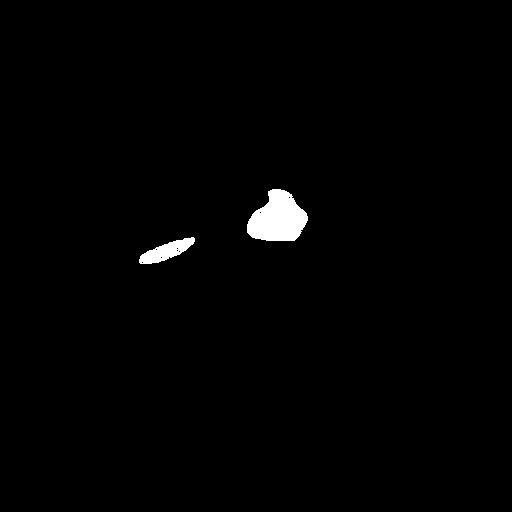

/content/mask_resized/_mask_1689234114_sample-slice041.jpg


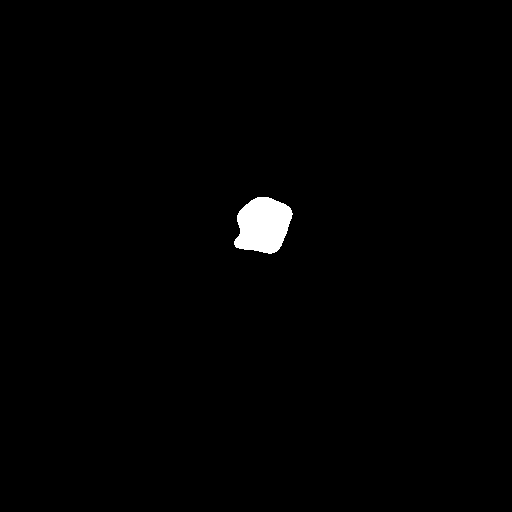

/content/mask_resized/_mask_1689234494_sample-slice023.jpg


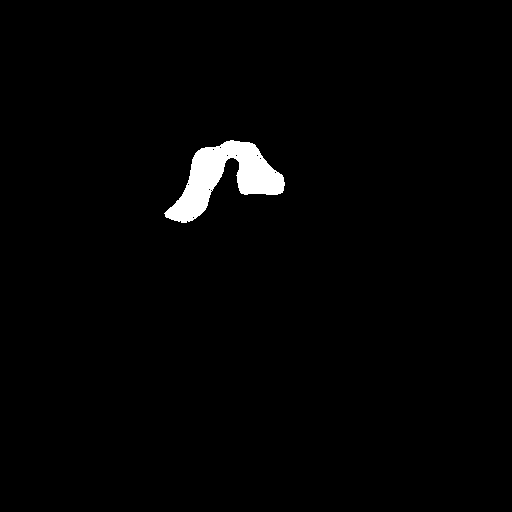

/content/mask_resized/_mask_1689234305_sample-slice051.jpg


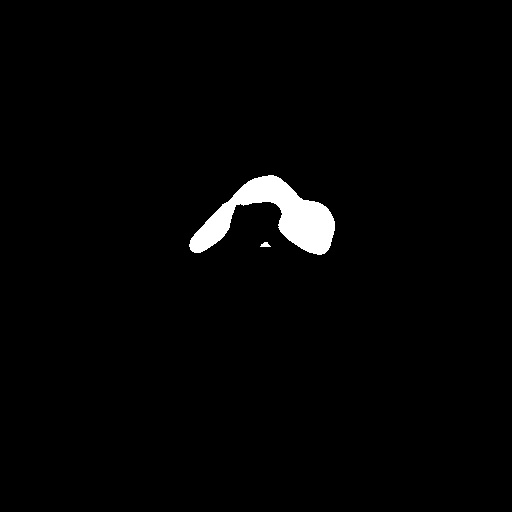

/content/mask_resized/_mask_1689234494_sample-slice017.jpg


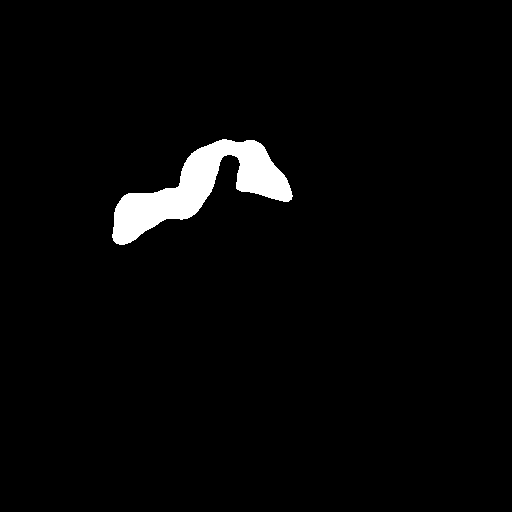

/content/mask_resized/_mask_1689234335_sample-slice049.jpg


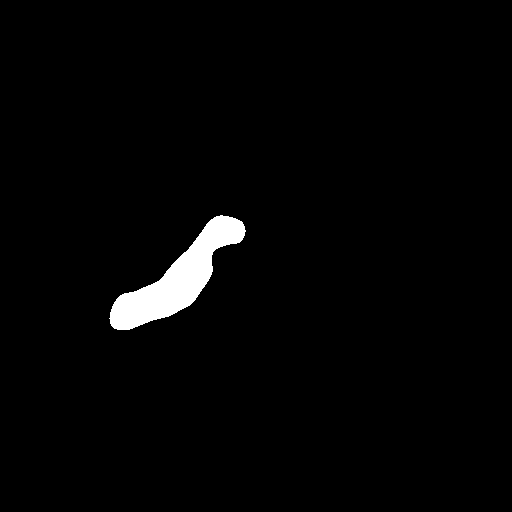

/content/mask_resized/_mask_1689233808_sample-slice063.jpg


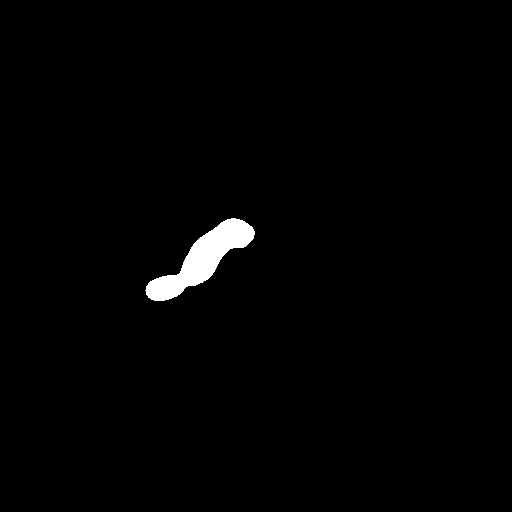

/content/mask_resized/_mask_1689234305_sample-slice038.jpg


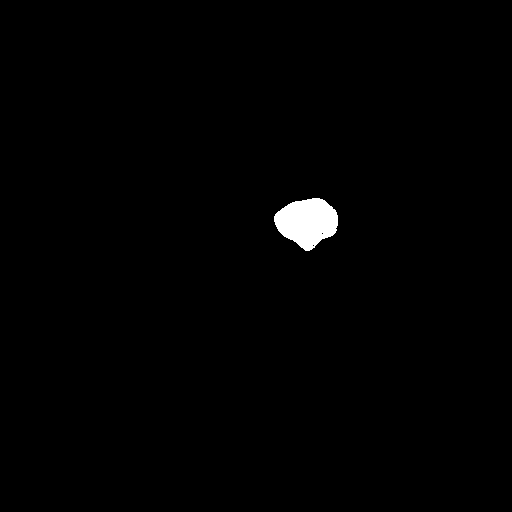

/content/mask_resized/_mask_1689234391_sample-slice037.jpg


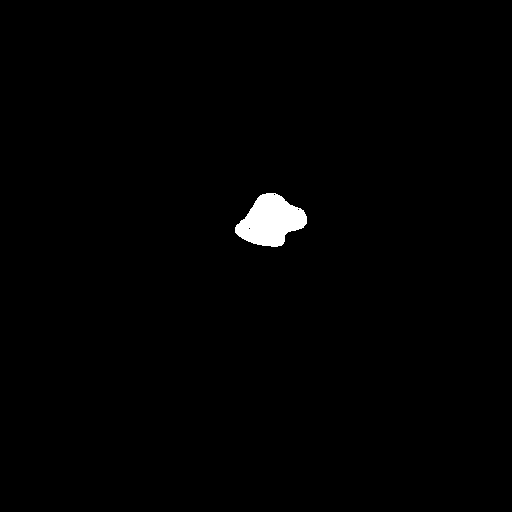

/content/mask_resized/_mask_1689233880_sample-slice039.jpg


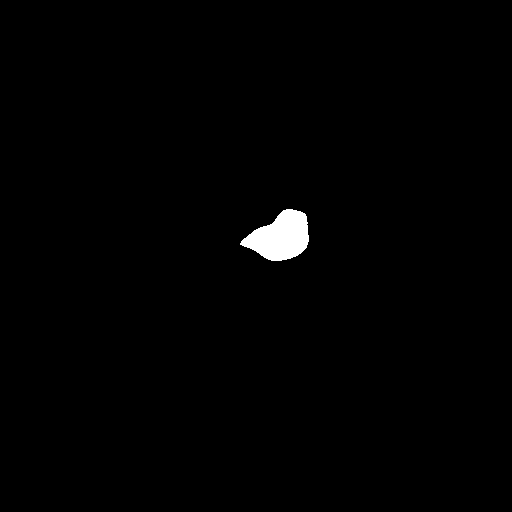

/content/mask_resized/_mask_sample-slice060.jpg


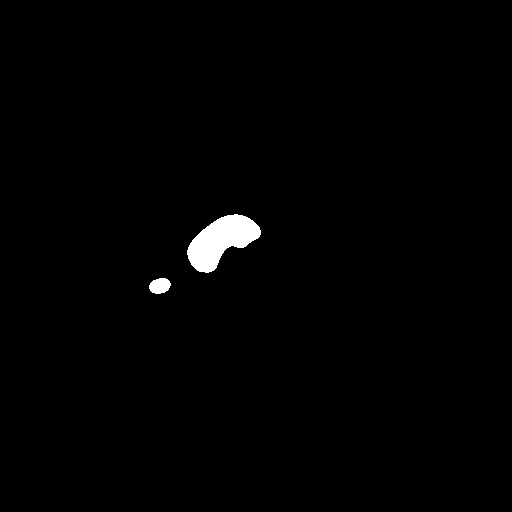

/content/mask_resized/_mask_1689234335_sample-slice030.jpg


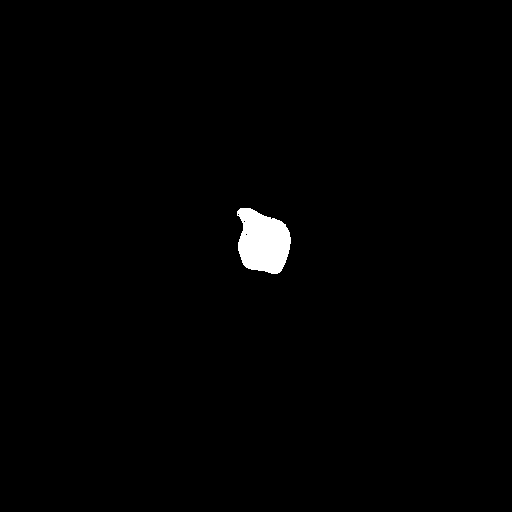

/content/mask_resized/_mask_1689234391_sample-slice030.jpg


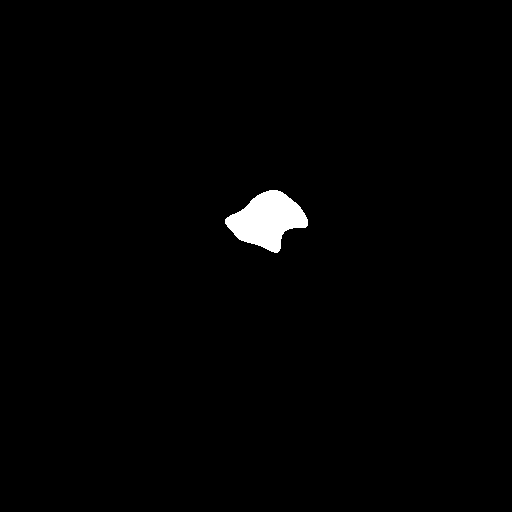

/content/mask_resized/_mask_1689233808_sample-slice060.jpg


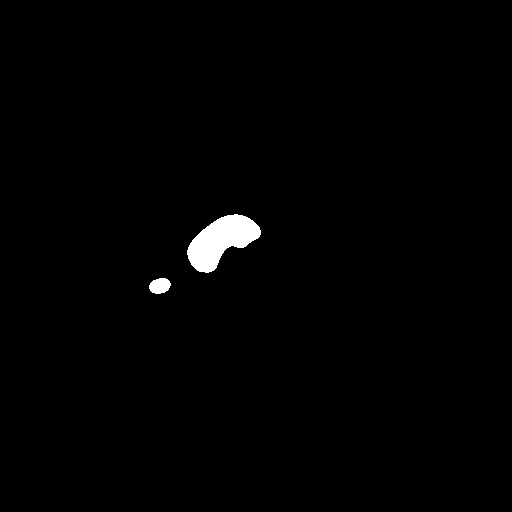

/content/mask_resized/_mask_1689234391_sample-slice034.jpg


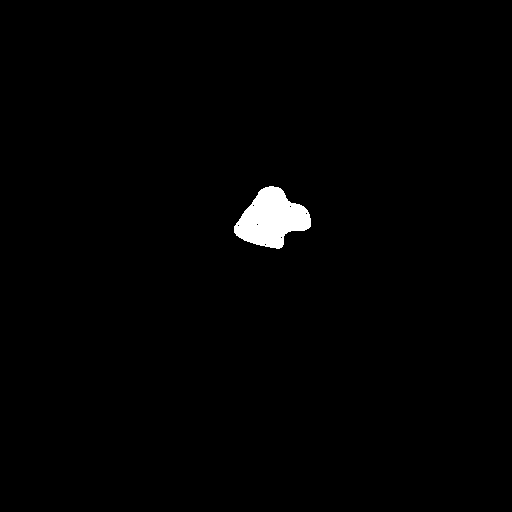

/content/mask_resized/_mask_1689234074_sample-slice043.jpg


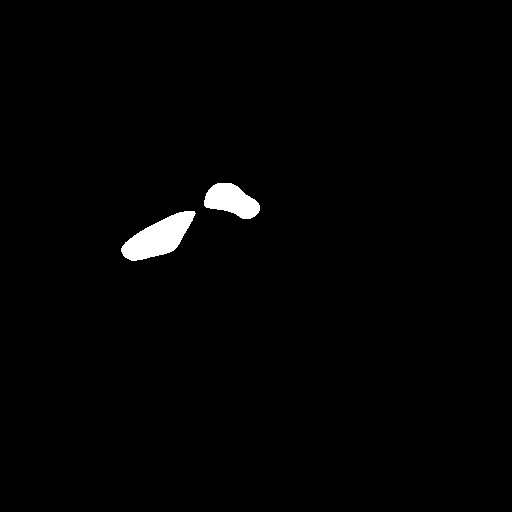

/content/mask_resized/_mask_1689234011_sample-slice054.jpg


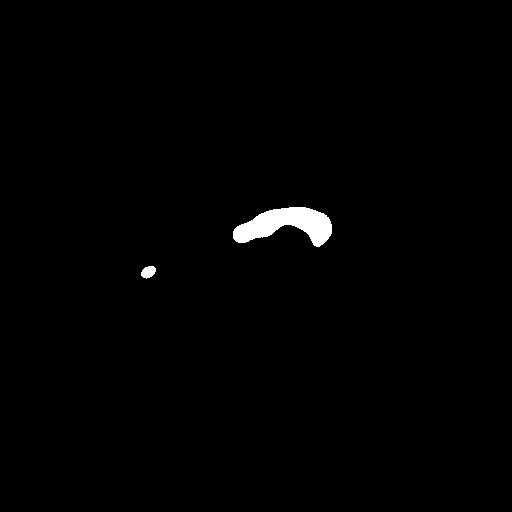

/content/mask_resized/_mask_1689234494_sample-slice016.jpg


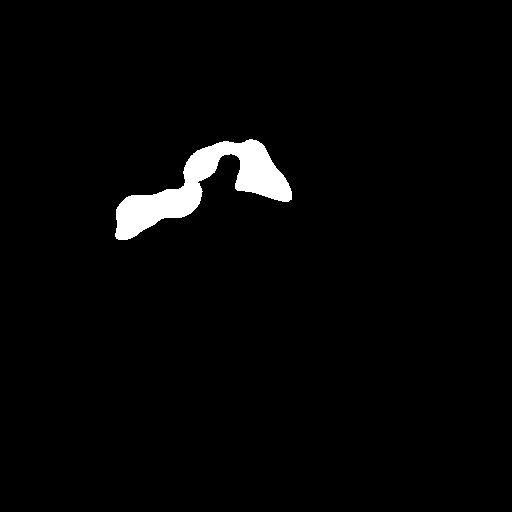

/content/mask_resized/_mask_1689233971_sample-slice050.jpg


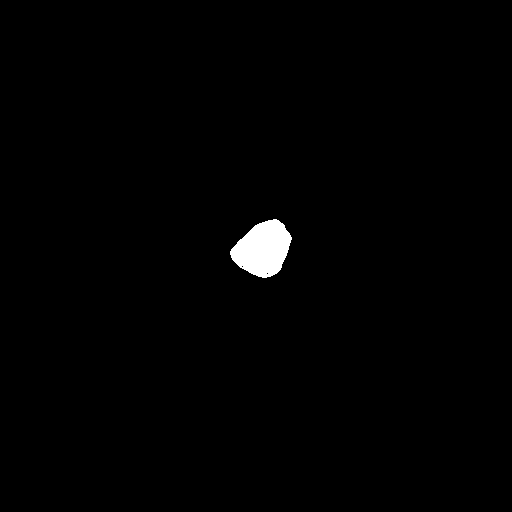

/content/mask_resized/_mask_1689234494_sample-slice027.jpg


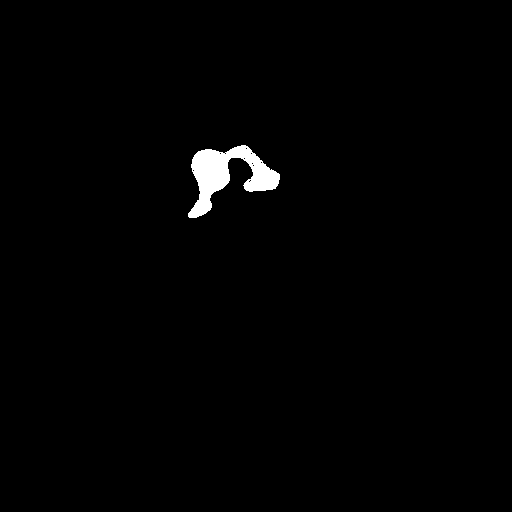

/content/mask_resized/_mask_1689234074_sample-slice050.jpg


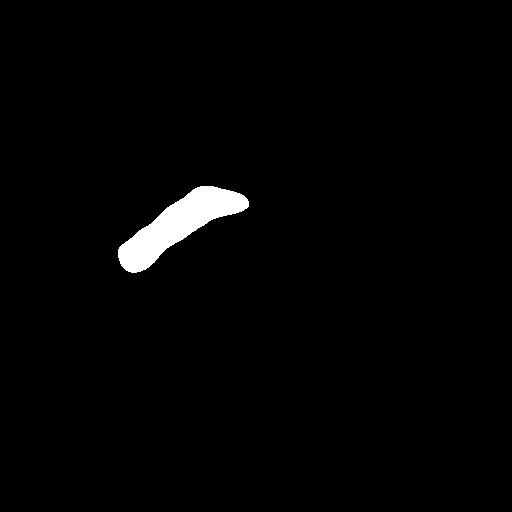

/content/mask_resized/_mask_1689234074_sample-slice048.jpg


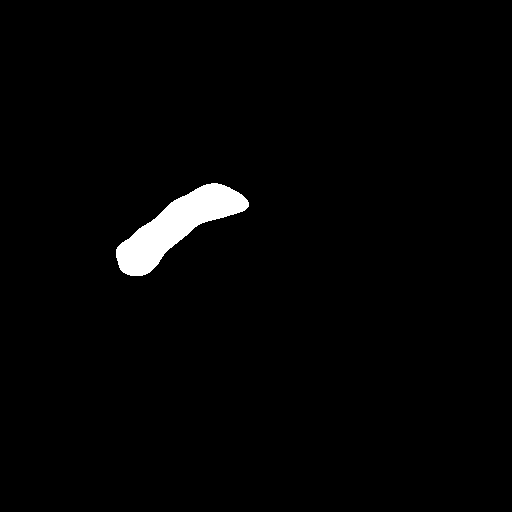

/content/mask_resized/_mask_1689233808_sample-slice051.jpg


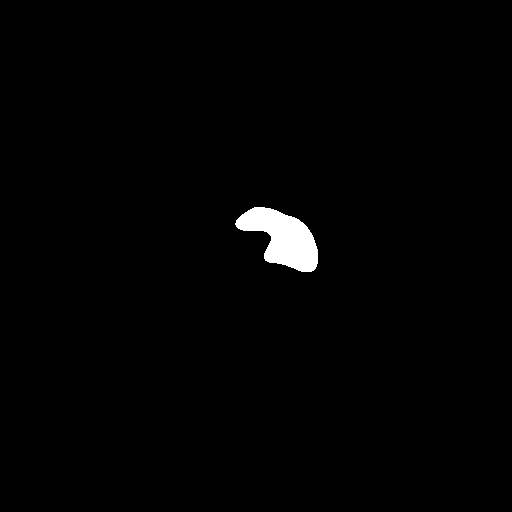

/content/mask_resized/_mask_1689233971_sample-slice052.jpg


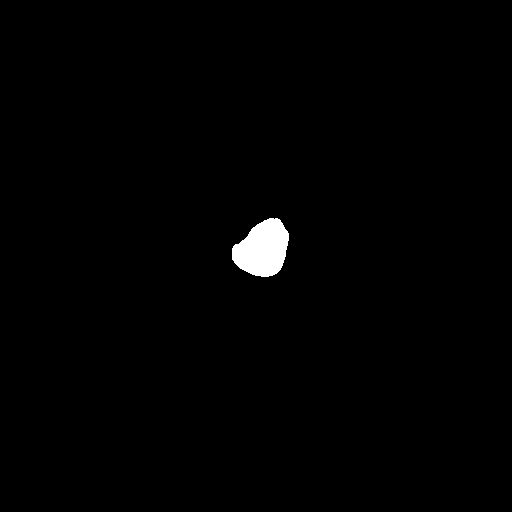

/content/mask_resized/_mask_1689233971_sample-slice085.jpg


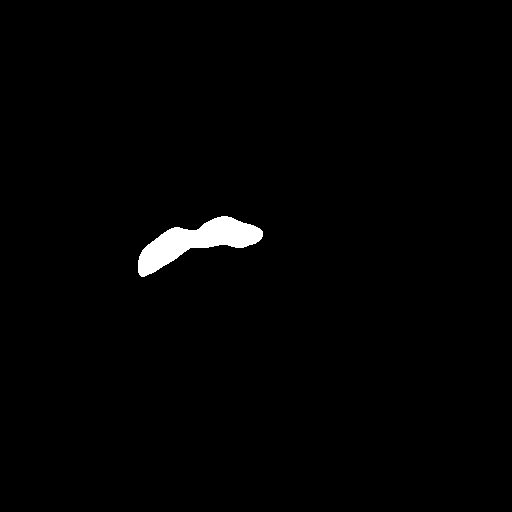

/content/mask_resized/_mask_1689234305_sample-slice040.jpg


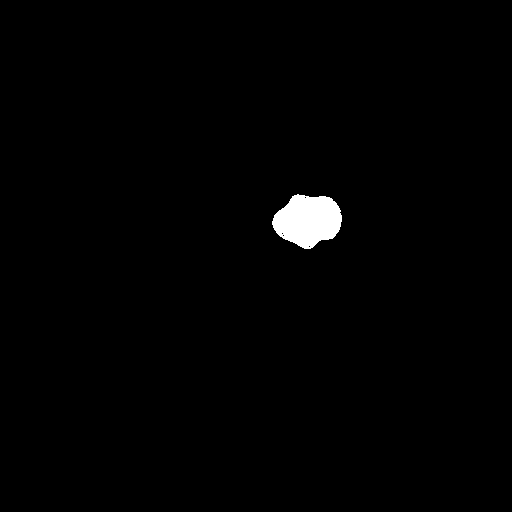

/content/mask_resized/_mask_1689233808_sample-slice058.jpg


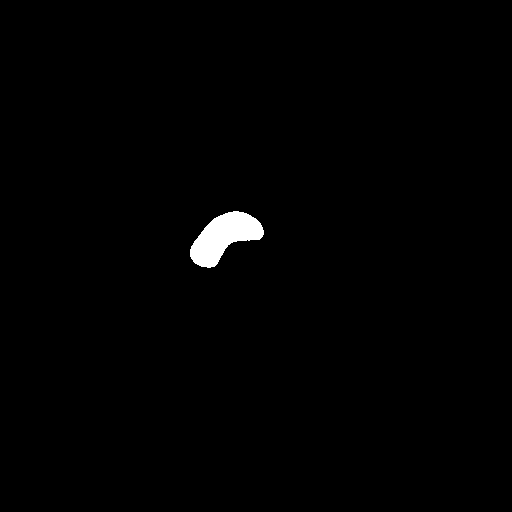

/content/mask_resized/_mask_sample-slice051.jpg


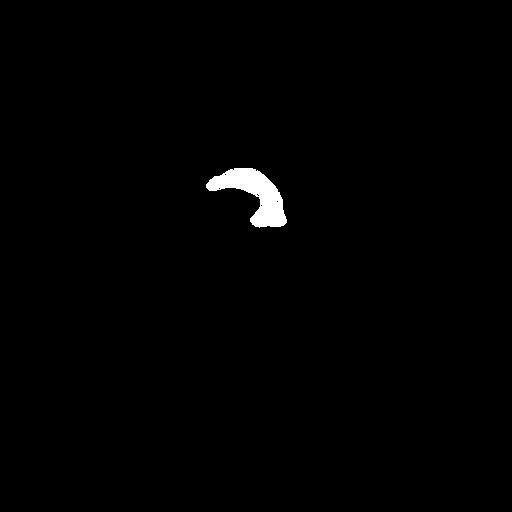

/content/mask_resized/_mask_1689234276_sample-slice050.jpg


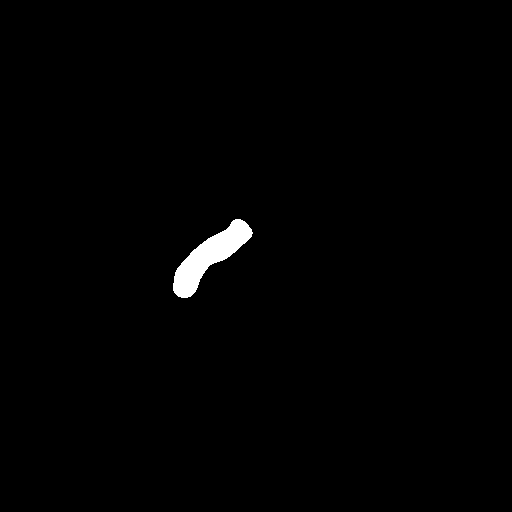

/content/mask_resized/_mask_1689234244_sample-slice051.jpg


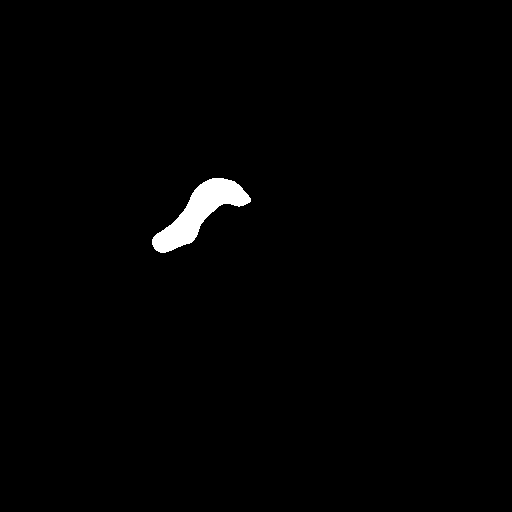

/content/mask_resized/_mask_1689233971_sample-slice105.jpg


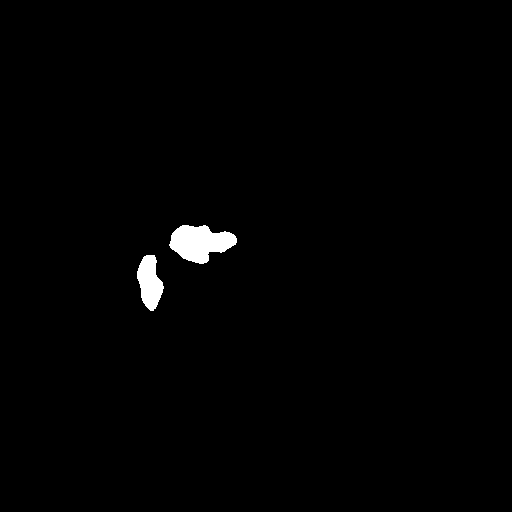

/content/mask_resized/_mask_1689234305_sample-slice057.jpg


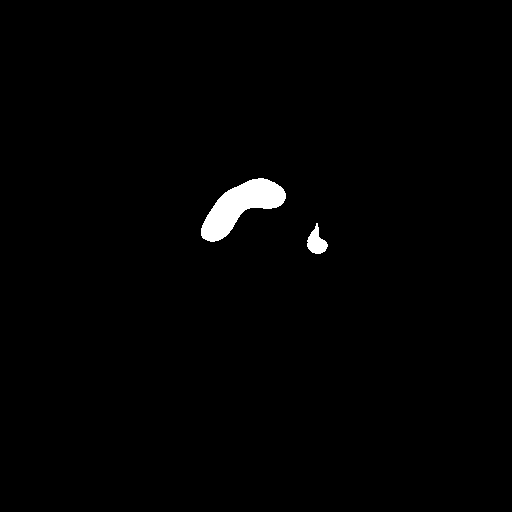

/content/mask_resized/_mask_1689234391_sample-slice052.jpg


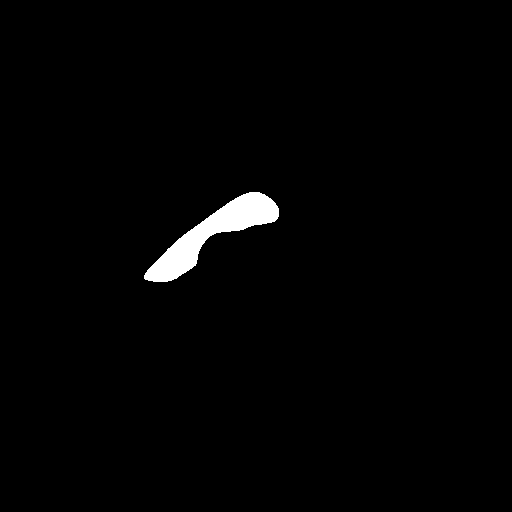

/content/mask_resized/_mask_1689234363_sample-slice043.jpg


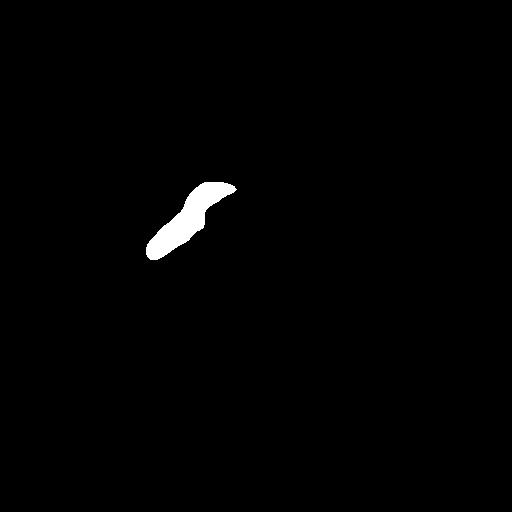

/content/mask_resized/_mask_sample-slice056.jpg


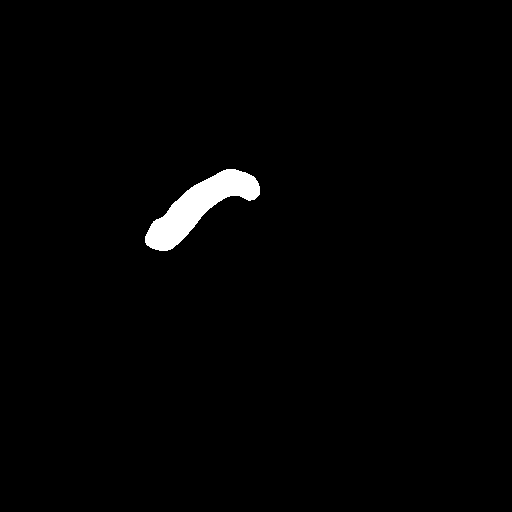

/content/mask_resized/_mask_1689234114_sample-slice036.jpg


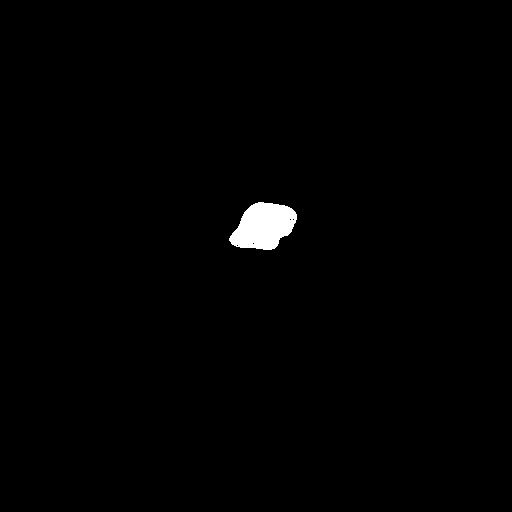

/content/mask_resized/_mask_1689233971_sample-slice048.jpg


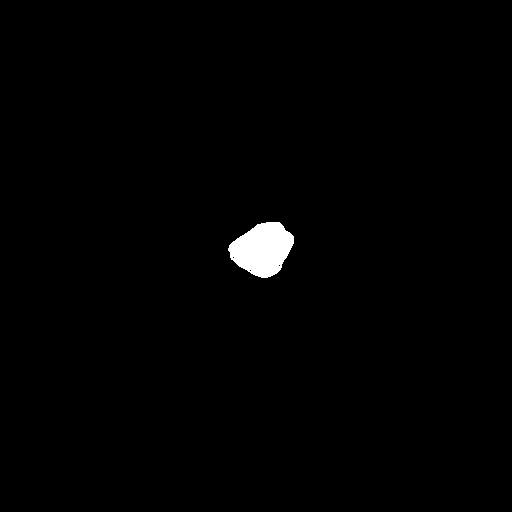

/content/mask_resized/_mask_1689234425_sample-slice034.jpg


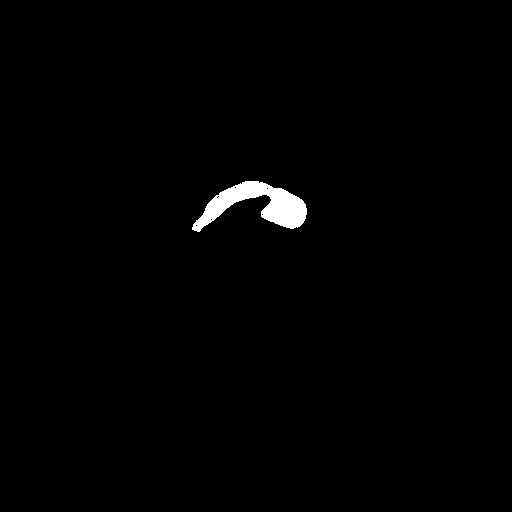

/content/mask_resized/_mask_1689233927_sample-slice049.jpg


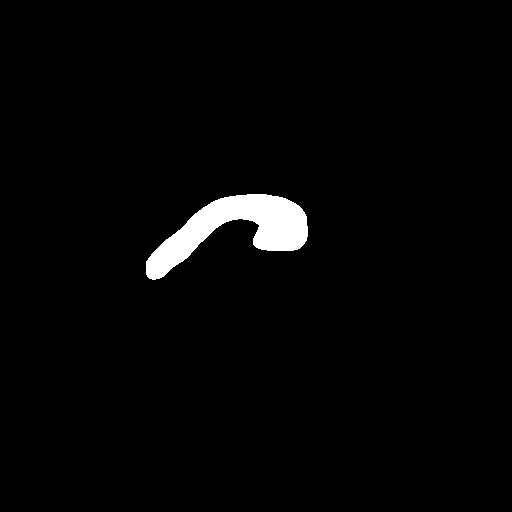

/content/mask_resized/_mask_1689234305_sample-slice045.jpg


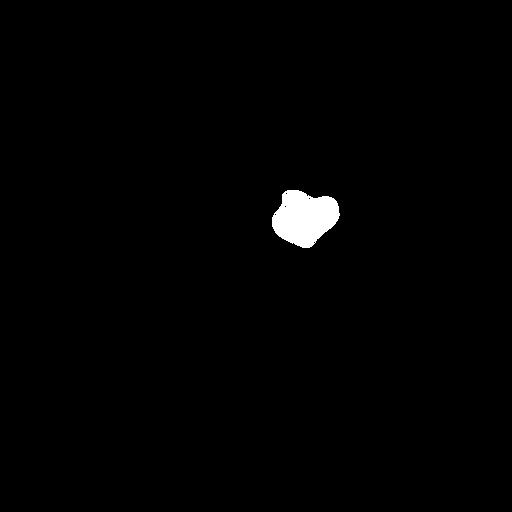

/content/mask_resized/_mask_1689234425_sample-slice037.jpg


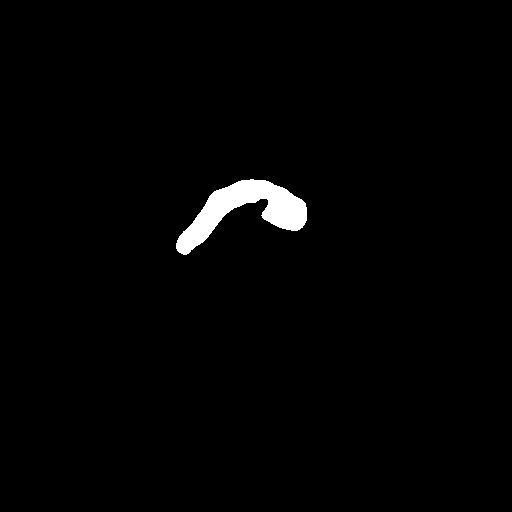

/content/mask_resized/_mask_1689234011_sample-slice048.jpg


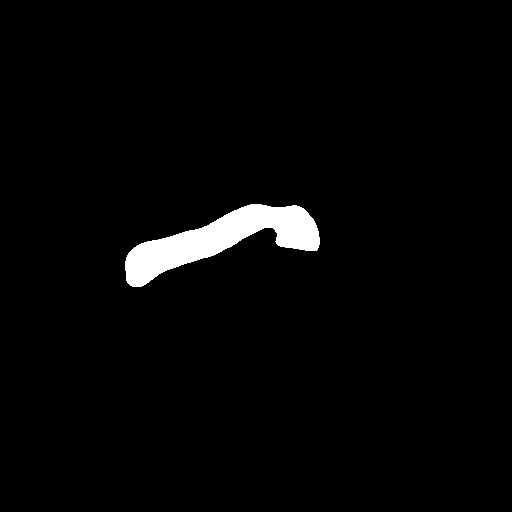

/content/mask_resized/_mask_1689233880_sample-slice060.jpg


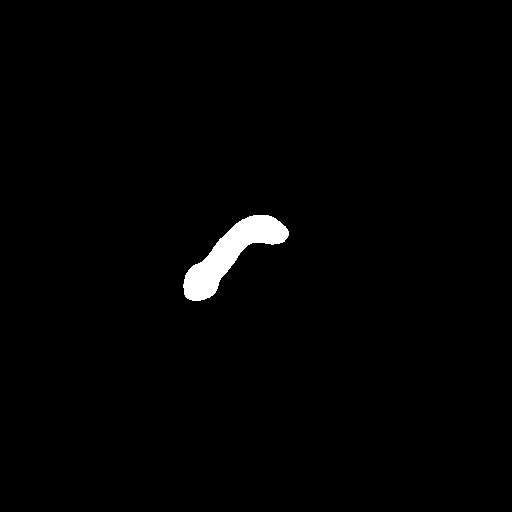

/content/mask_resized/_mask_1689234391_sample-slice045.jpg


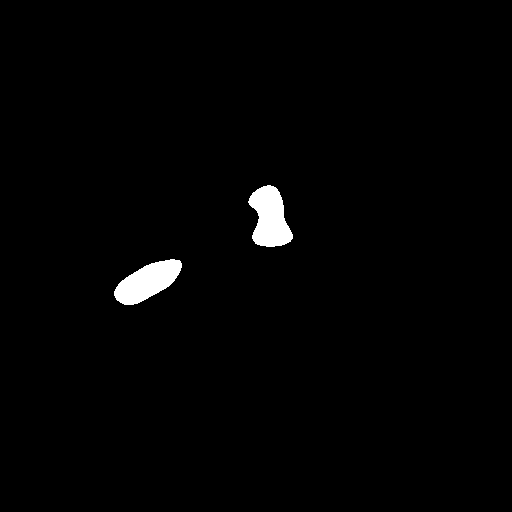

/content/mask_resized/_mask_1689233808_sample-slice053.jpg


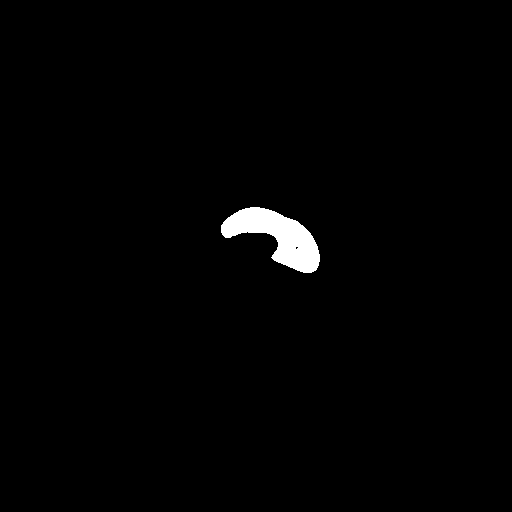

/content/mask_resized/_mask_1689234391_sample-slice049.jpg


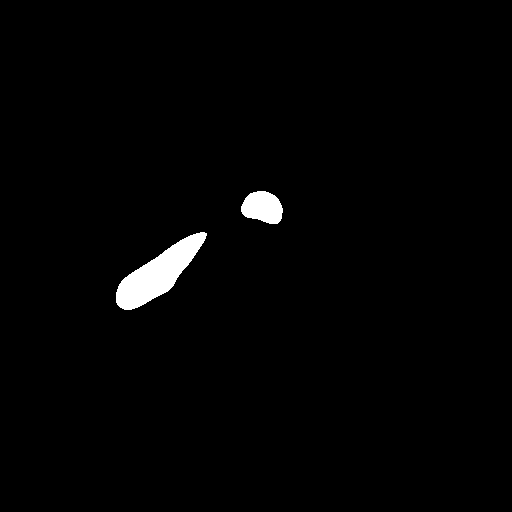

/content/mask_resized/_mask_sample-slice050.jpg


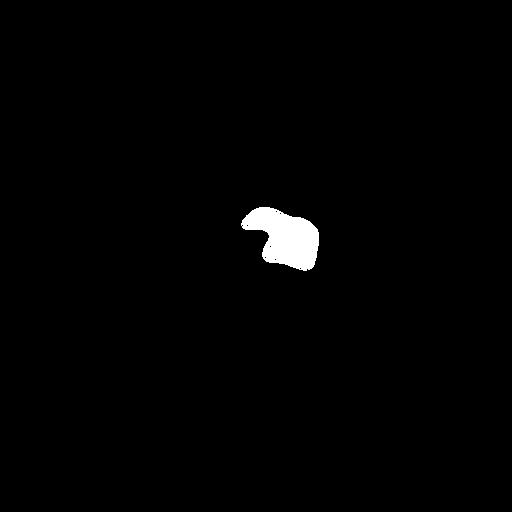

/content/mask_resized/_mask_1689234039_sample-slice042.jpg


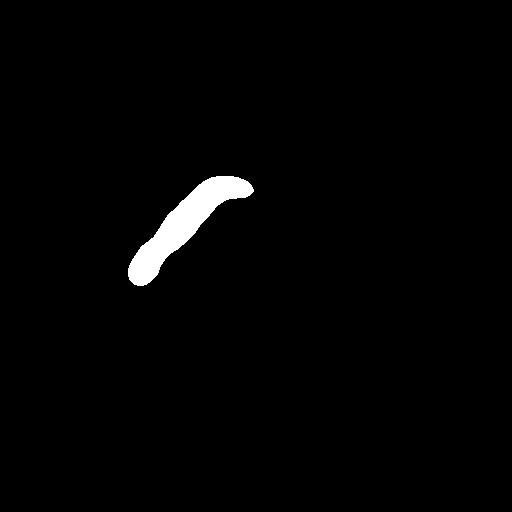

/content/mask_resized/_mask_1689234391_sample-slice047.jpg


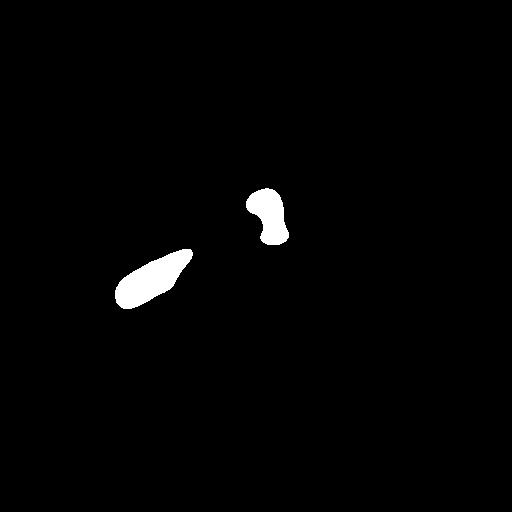

/content/mask_resized/_mask_1689234114_sample-slice042.jpg


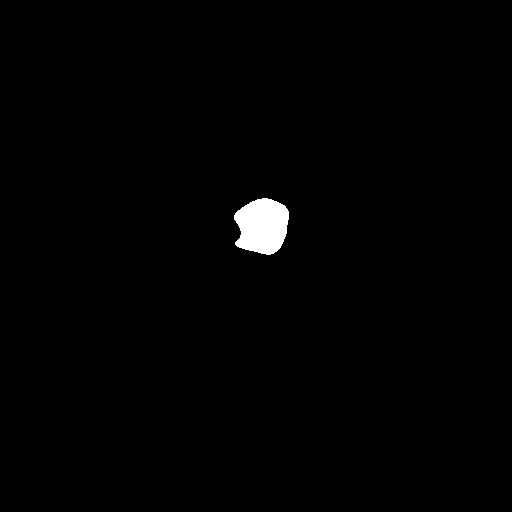

/content/mask_resized/_mask_1689234425_sample-slice040.jpg


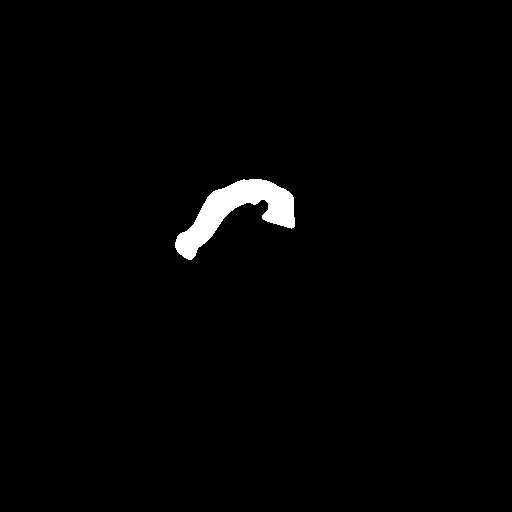

/content/mask_resized/_mask_1689233971_sample-slice051.jpg


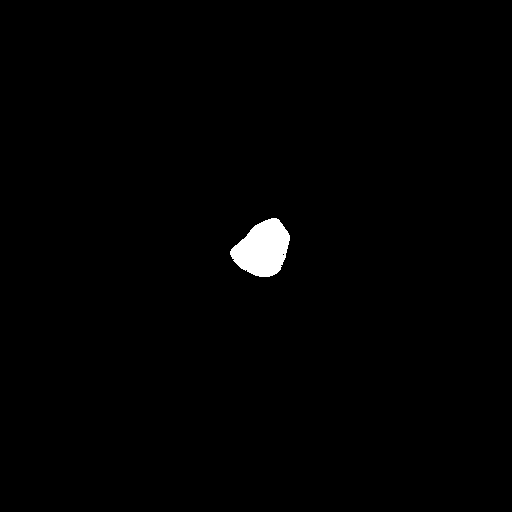

/content/mask_resized/_mask_1689234335_sample-slice043.jpg


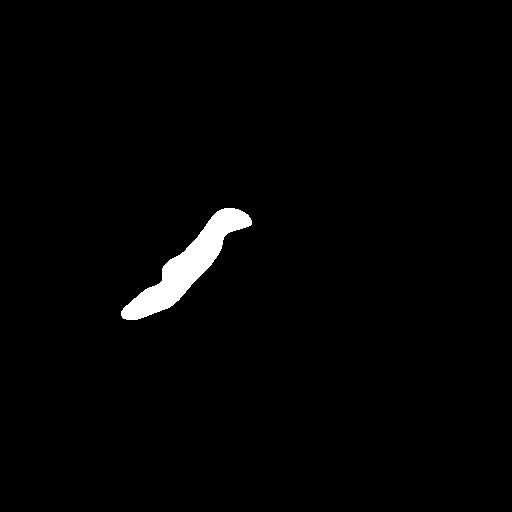

/content/mask_resized/_mask_1689234469_sample-slice047.jpg


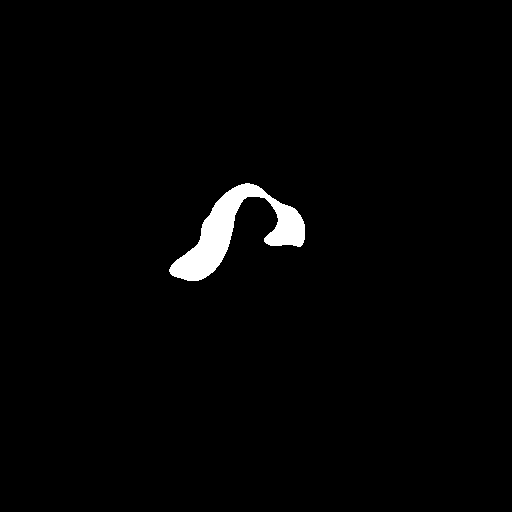

/content/mask_resized/_mask_1689234276_sample-slice041.jpg


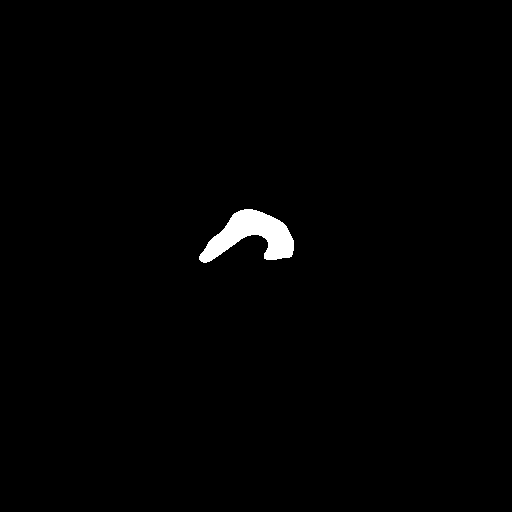

/content/mask_resized/_mask_1689234391_sample-slice048.jpg


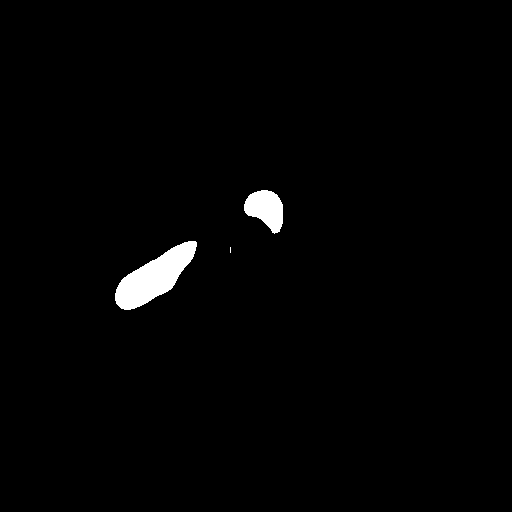

/content/mask_resized/_mask_1689234521_sample-slice019.jpg


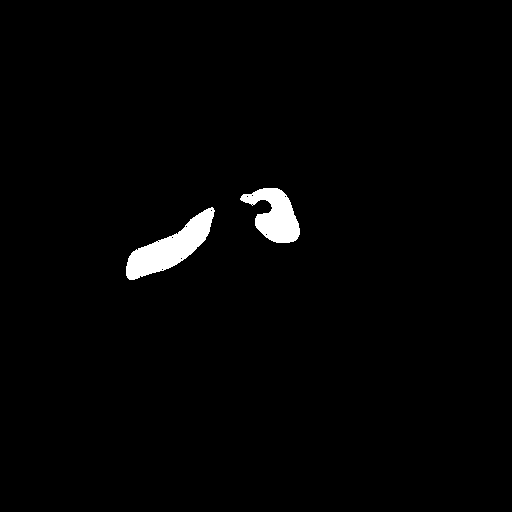

/content/mask_resized/_mask_1689234363_sample-slice045.jpg


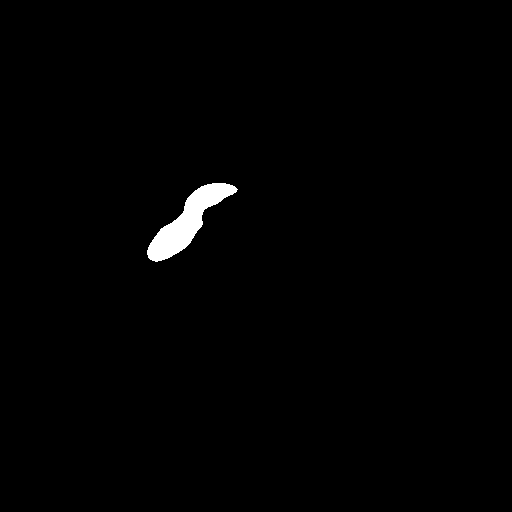

/content/mask_resized/_mask_1689234305_sample-slice047.jpg


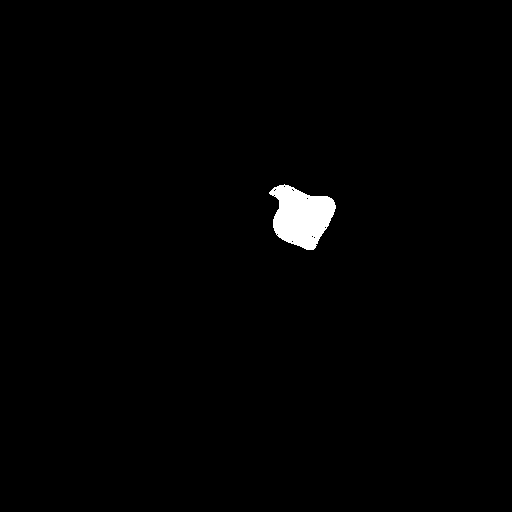

/content/mask_resized/_mask_1689233808_sample-slice049.jpg


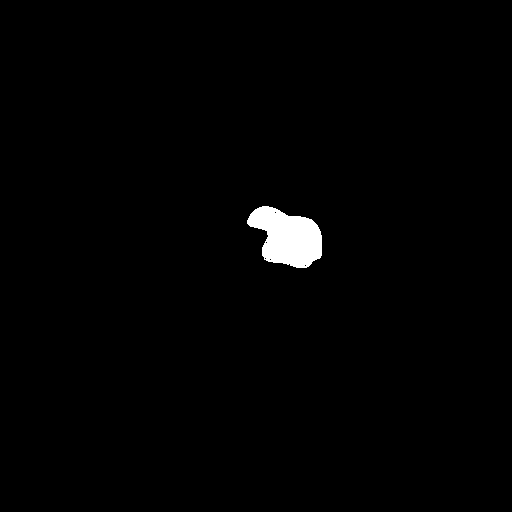

/content/mask_resized/_mask_1689234363_sample-slice031.jpg


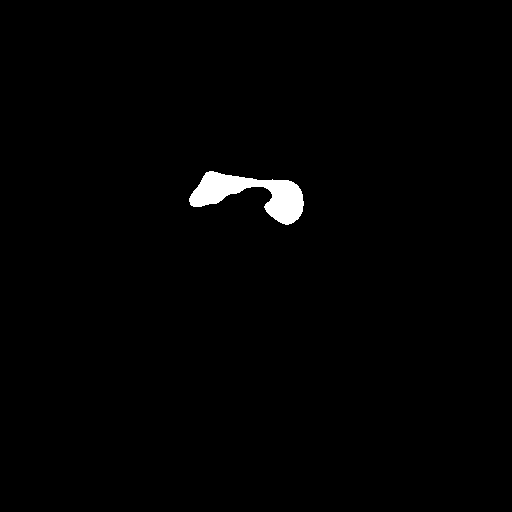

/content/mask_resized/_mask_1689233880_sample-slice054.jpg


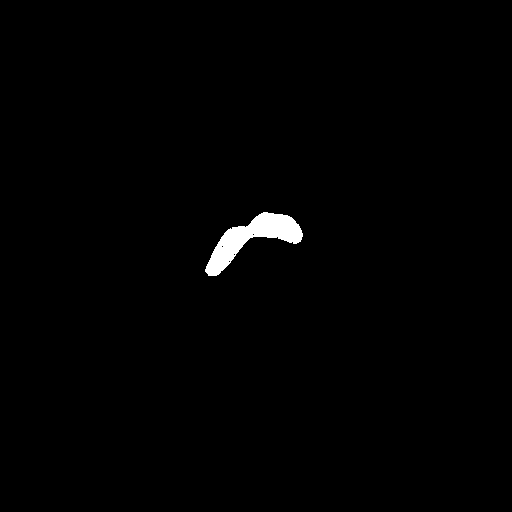

/content/mask_resized/_mask_1689234521_sample-slice023.jpg


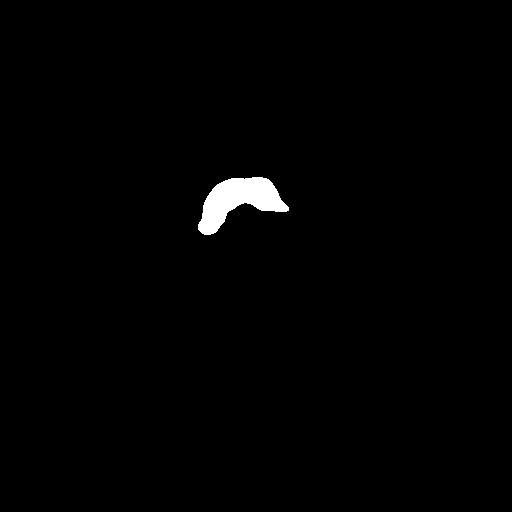

/content/mask_resized/_mask_1689233880_sample-slice057.jpg


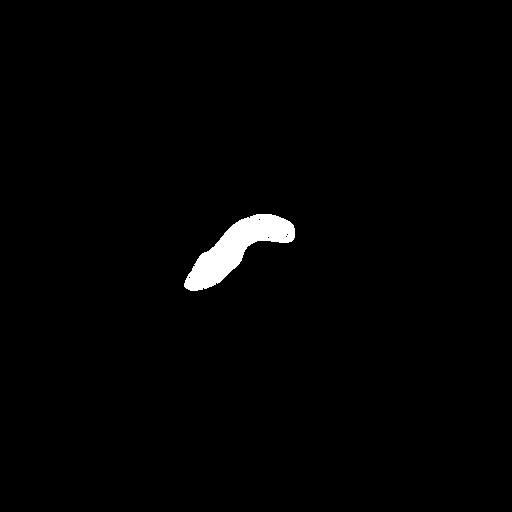

/content/mask_resized/_mask_1689234113_sample-slice038.jpg


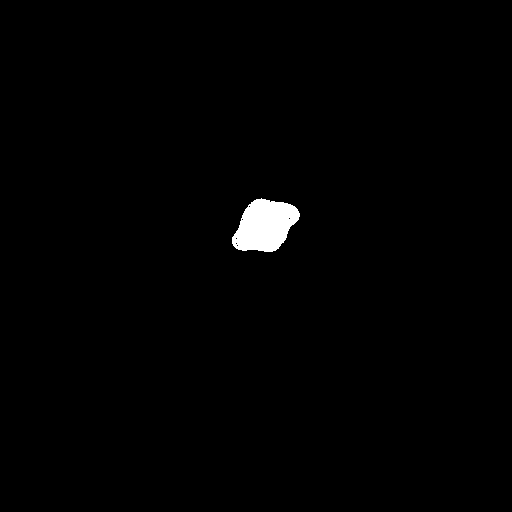

/content/mask_resized/_mask_1689233808_sample-slice039.jpg


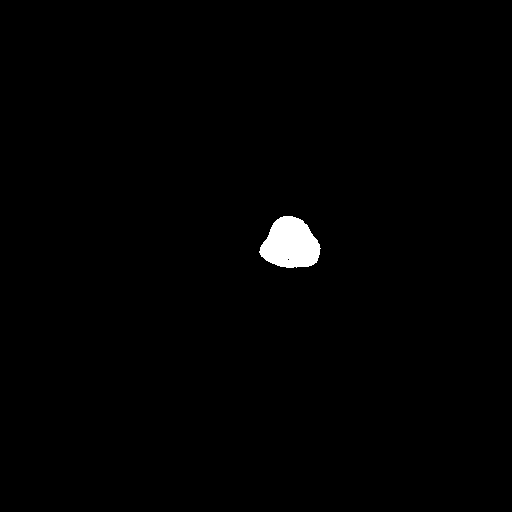

/content/mask_resized/_mask_sample-slice047.jpg


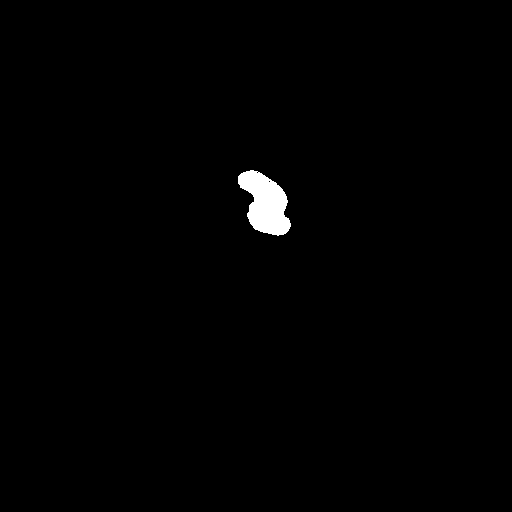

/content/mask_resized/_mask_1689234426_sample-slice036.jpg


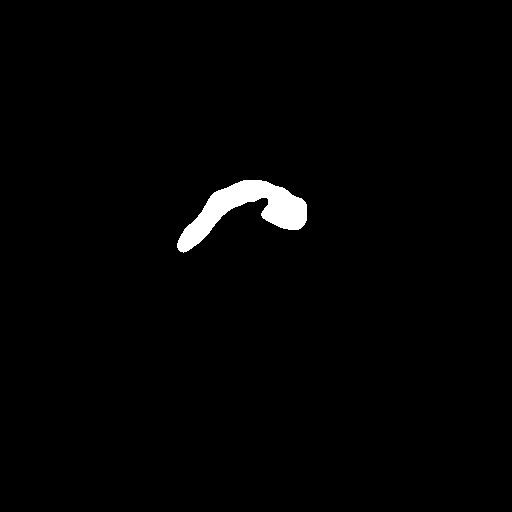

/content/mask_resized/_mask_1689233927_sample-slice042.jpg


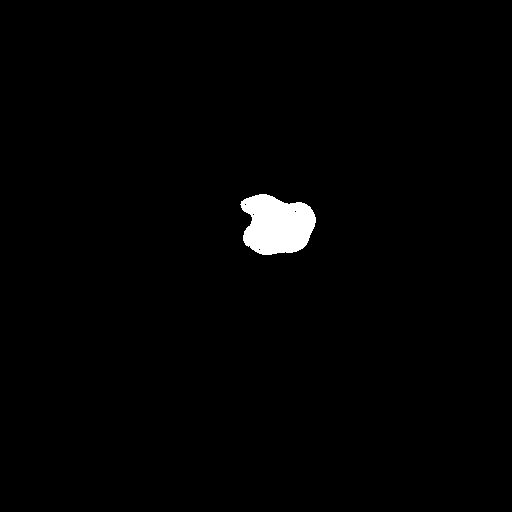

/content/mask_resized/_mask_1689233971_sample-slice093.jpg


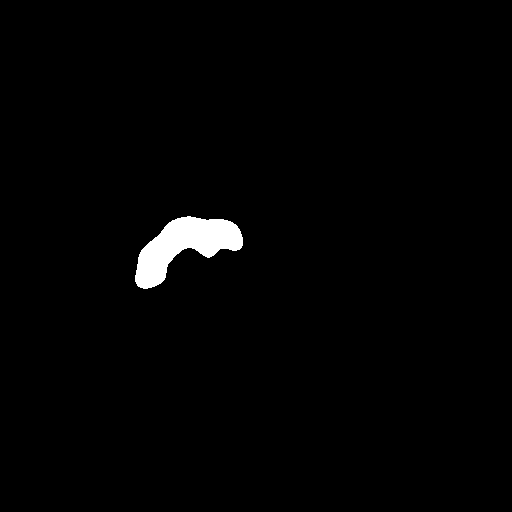

/content/mask_resized/_mask_1689233971_sample-slice094.jpg


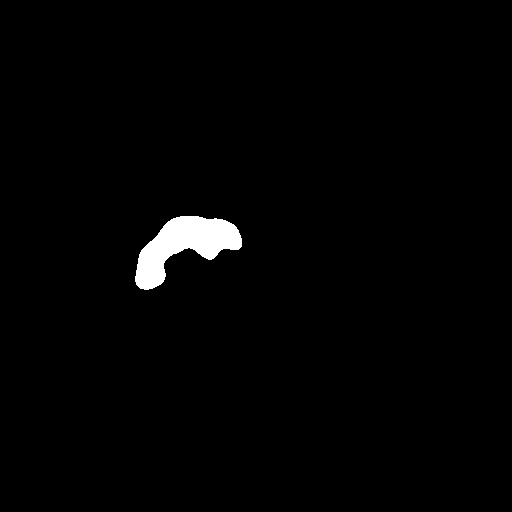

/content/mask_resized/_mask_1689233927_sample-slice045.jpg


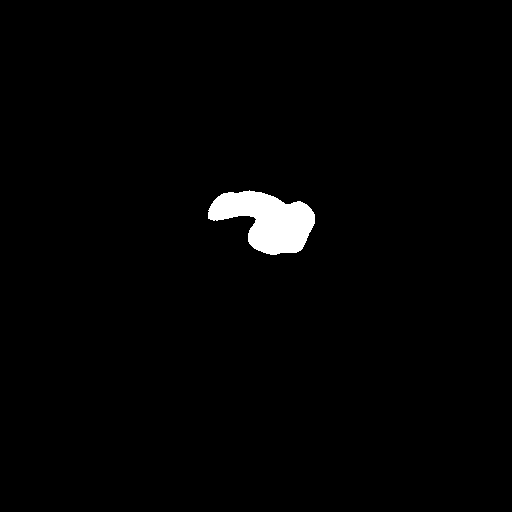

/content/mask_resized/_mask_1689234011_sample-slice046.jpg


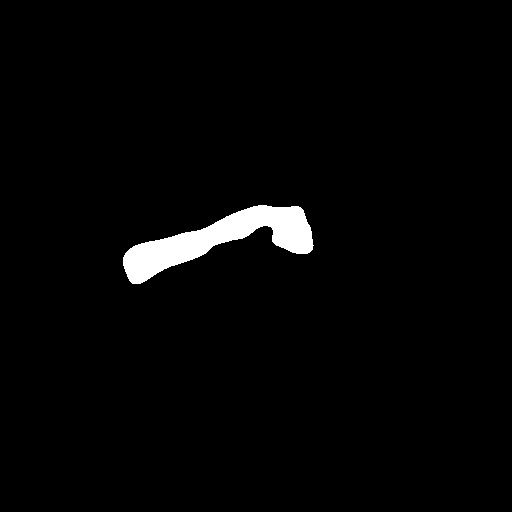

/content/mask_resized/_mask_1689233927_sample-slice052.jpg


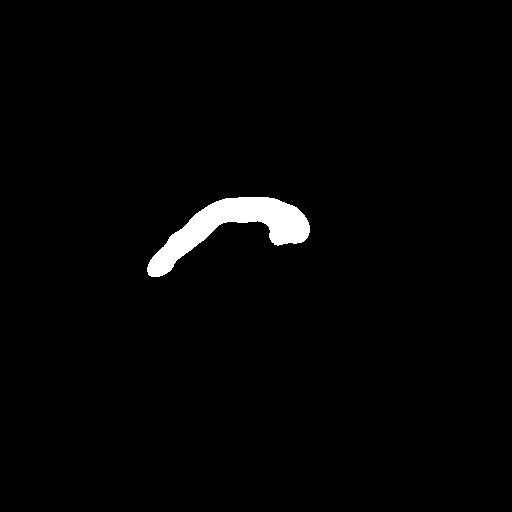

/content/mask_resized/_mask_1689233927_sample-slice044.jpg


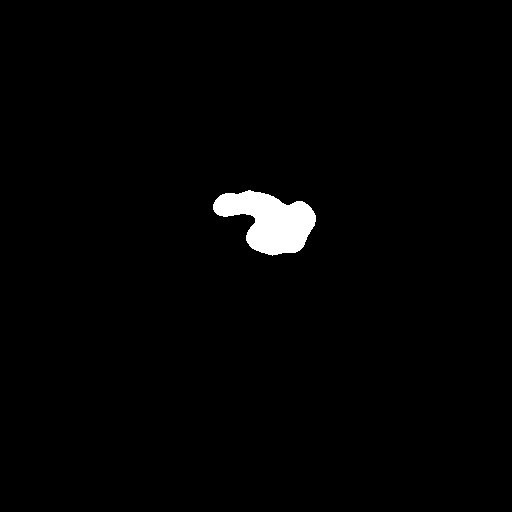

/content/mask_resized/_mask_1689234276_sample-slice042.jpg


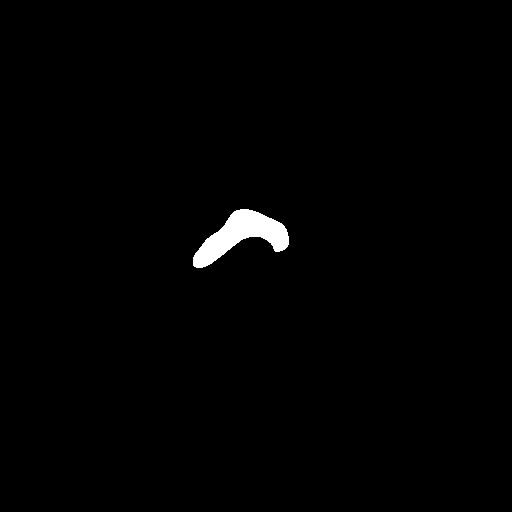

/content/mask_resized/_mask_1689234011_sample-slice052.jpg


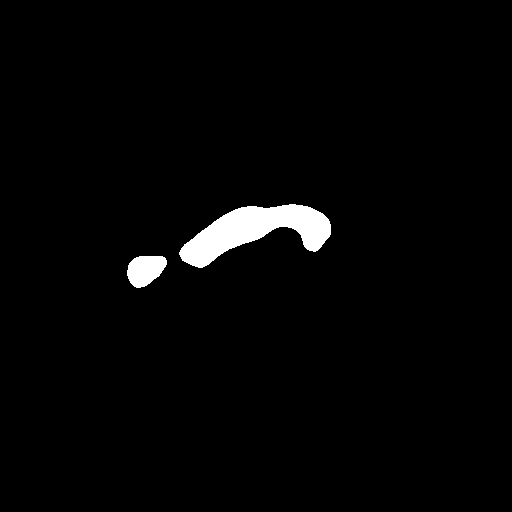

/content/mask_resized/_mask_1689233927_sample-slice048.jpg


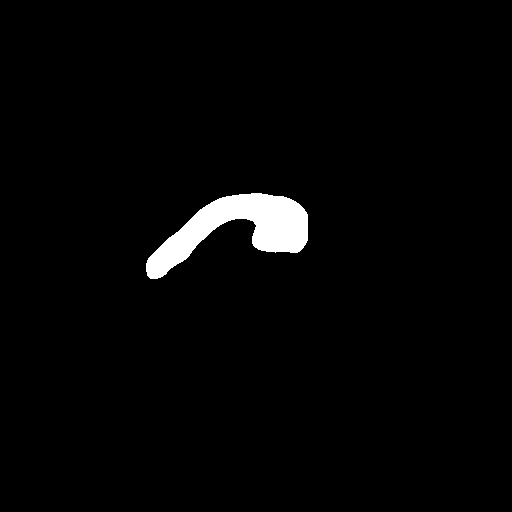

/content/mask_resized/_mask_1689234363_sample-slice038.jpg


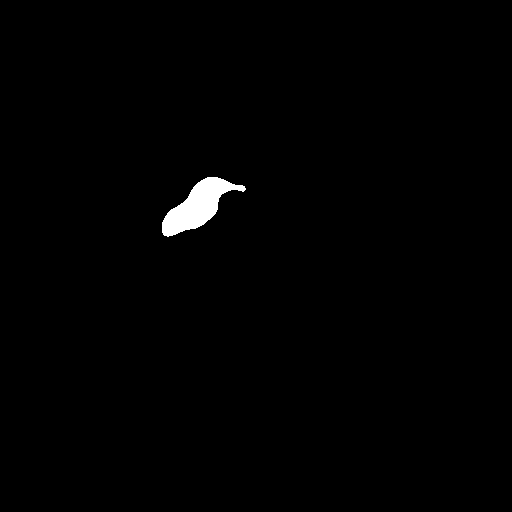

/content/mask_resized/_mask_1689234335_sample-slice035.jpg


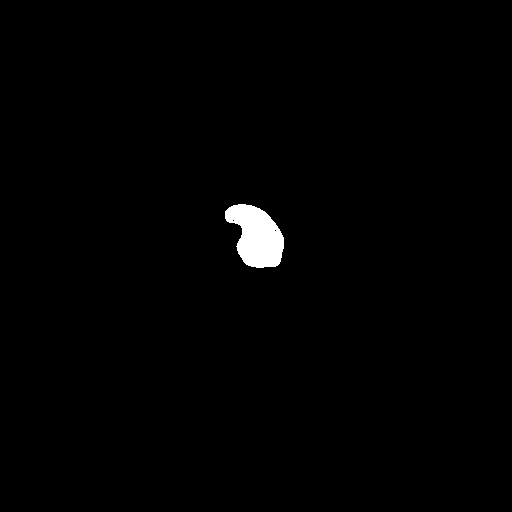

/content/mask_resized/_mask_1689233971_sample-slice095.jpg


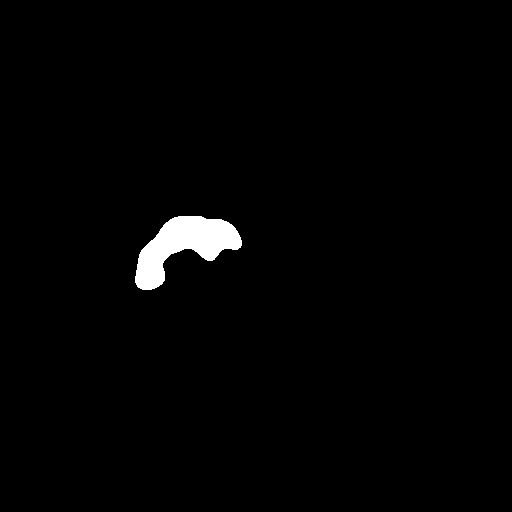

/content/mask_resized/_mask_1689234469_sample-slice045.jpg


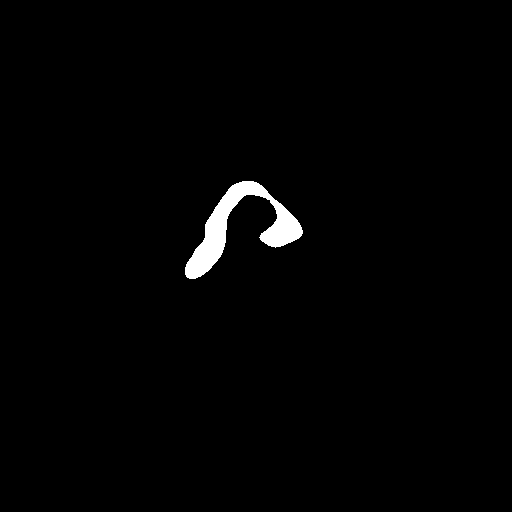

/content/mask_resized/_mask_1689233808_sample-slice054.jpg


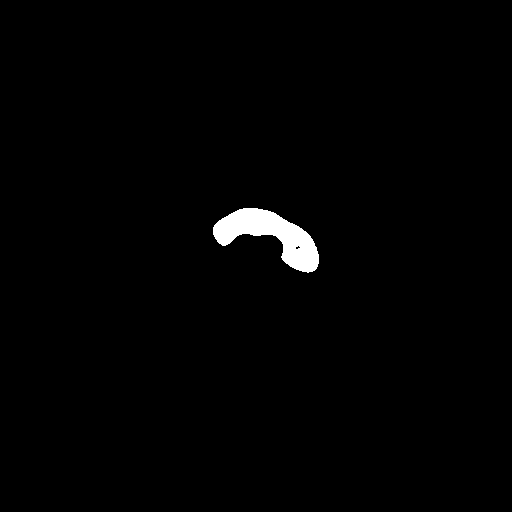

/content/mask_resized/_mask_sample-slice046.jpg


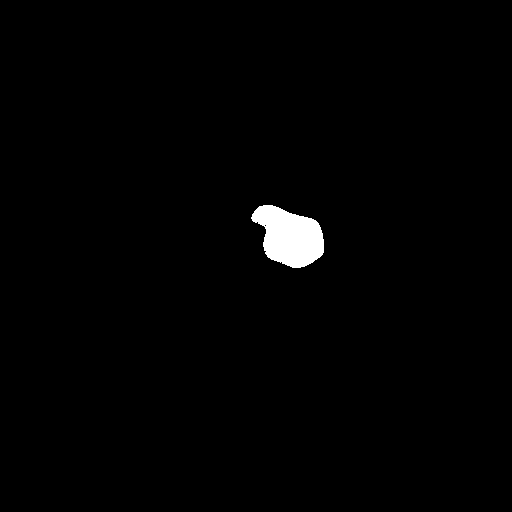

/content/mask_resized/_mask_1689234363_sample-slice024.jpg


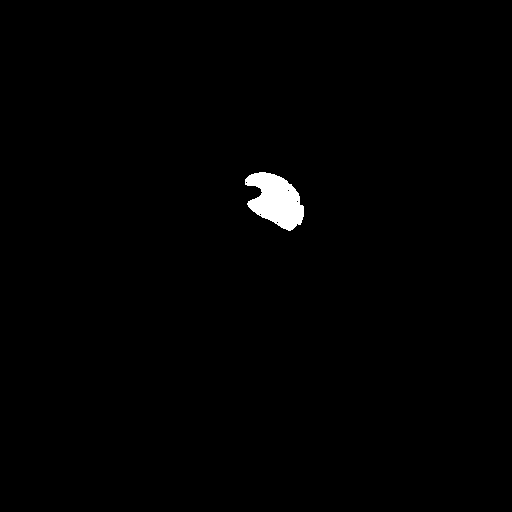

/content/mask_resized/_mask_1689234391_sample-slice057.jpg


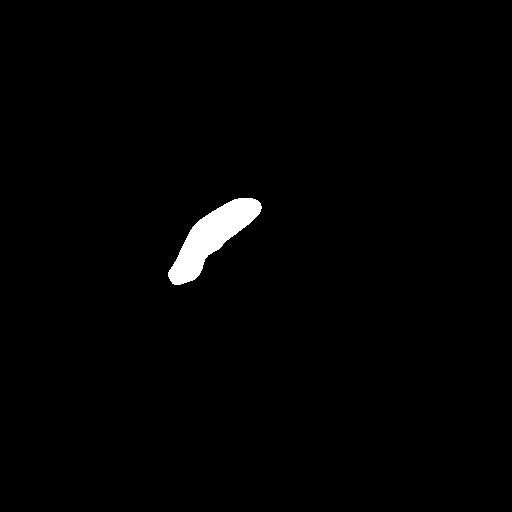

/content/mask_resized/_mask_1689233971_sample-slice099.jpg


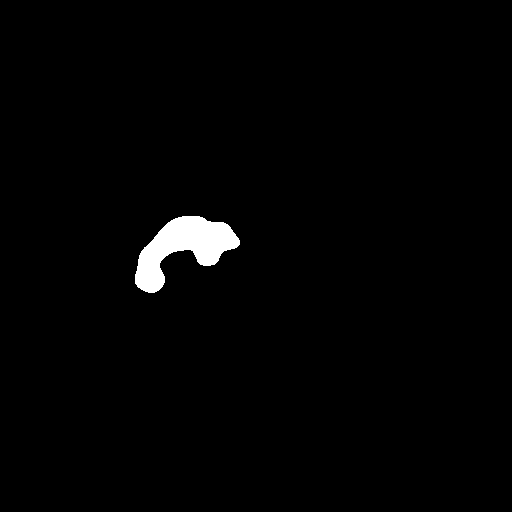

/content/mask_resized/_mask_1689234074_sample-slice049.jpg


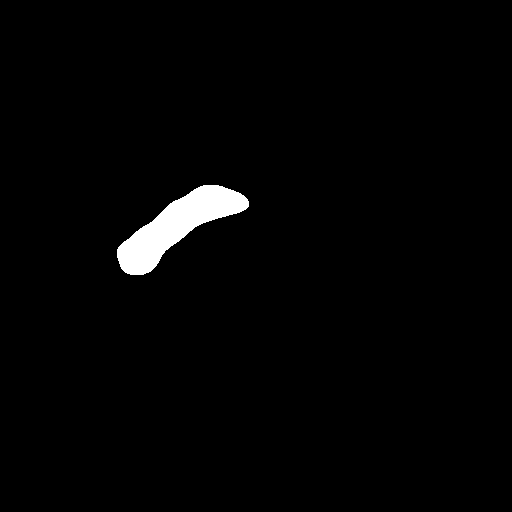

/content/mask_resized/_mask_1689233927_sample-slice050.jpg


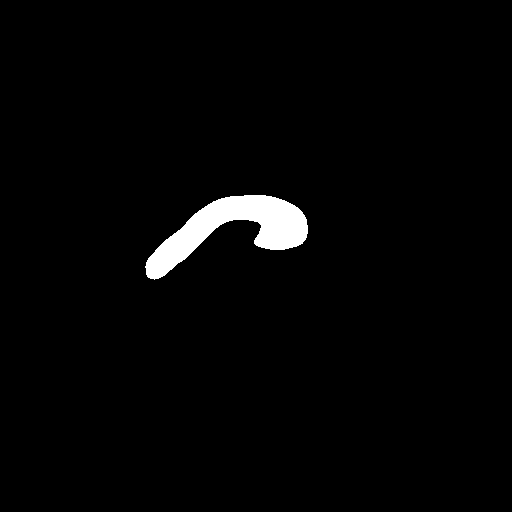

/content/mask_resized/_mask_1689233808_sample-slice046.jpg


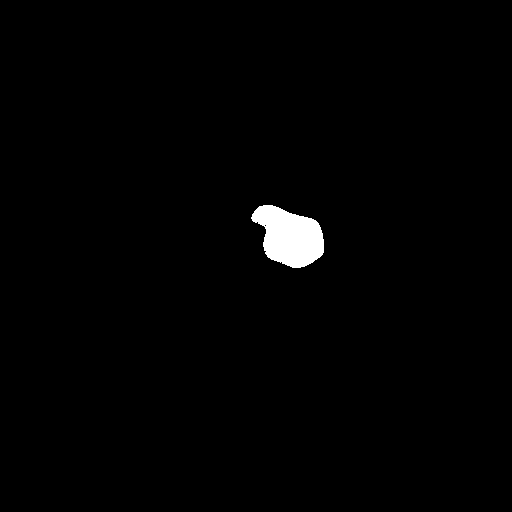

/content/mask_resized/_mask_1689233971_sample-slice097.jpg


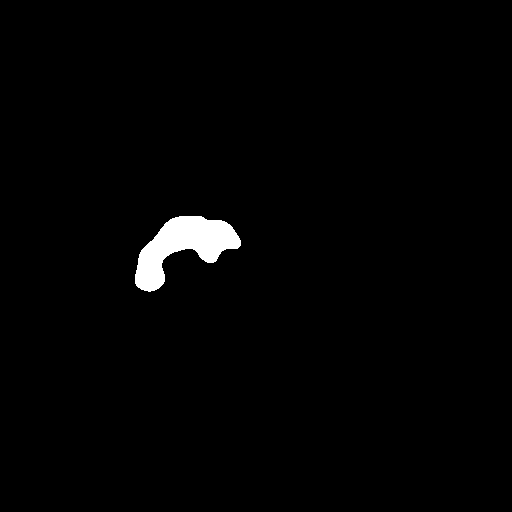

/content/mask_resized/_mask_1689234494_sample-slice013.jpg


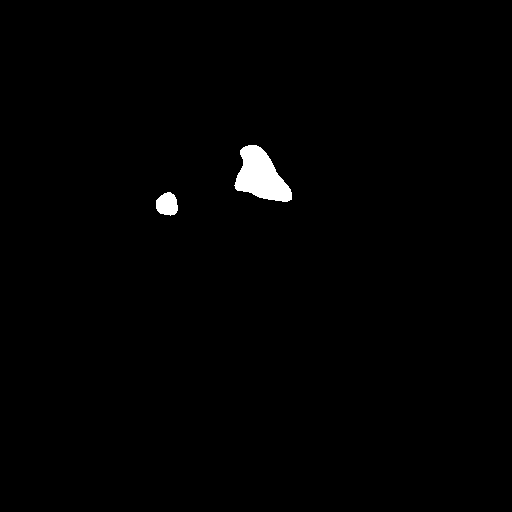

/content/mask_resized/_mask_1689234521_sample-slice022.jpg


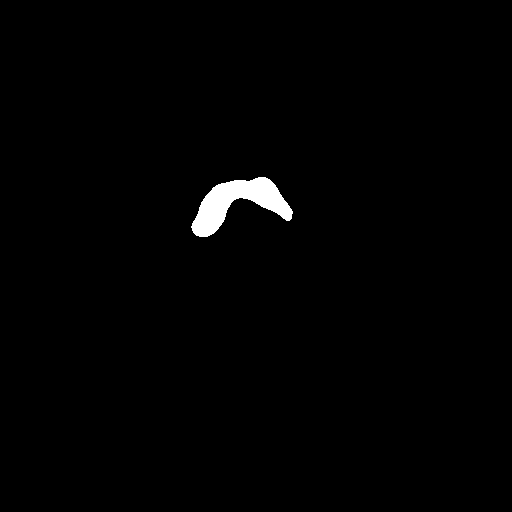

/content/mask_resized/_mask_1689234426_sample-slice039.jpg


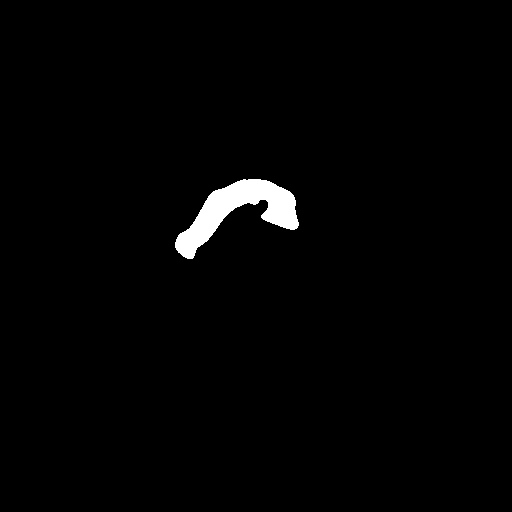

/content/mask_resized/_mask_1689234494_sample-slice015.jpg


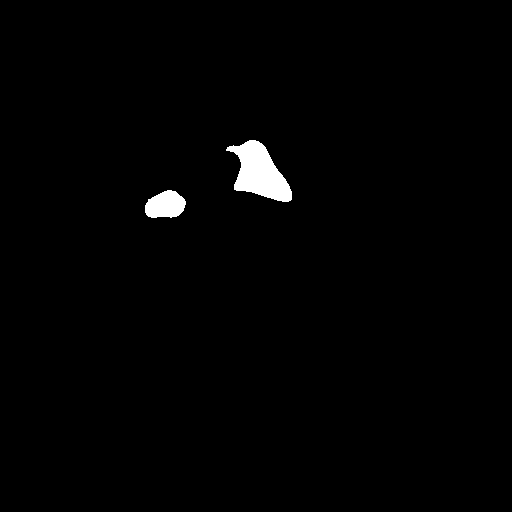

/content/mask_resized/_mask_1689233971_sample-slice101.jpg


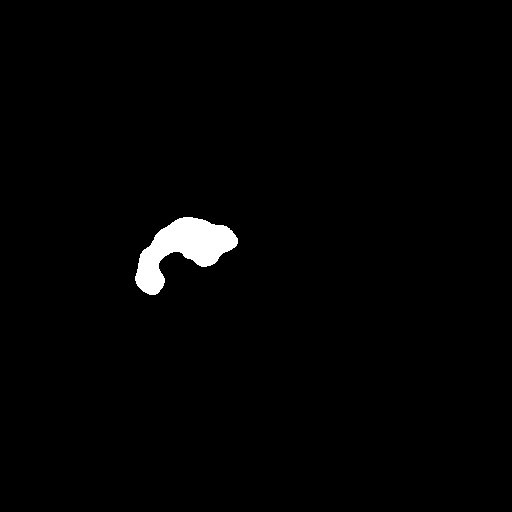

/content/mask_resized/_mask_1689233808_sample-slice059.jpg


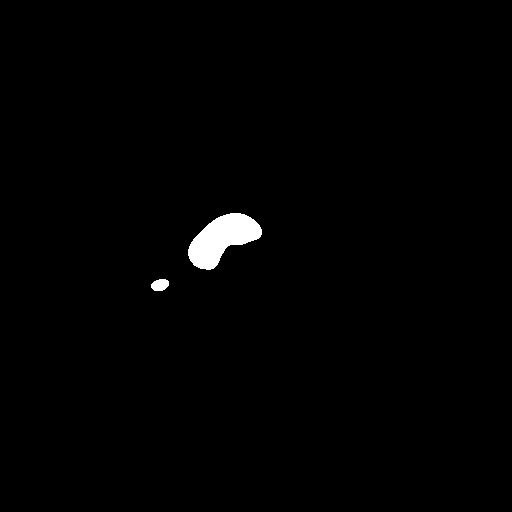

/content/mask_resized/_mask_1689233927_sample-slice051.jpg


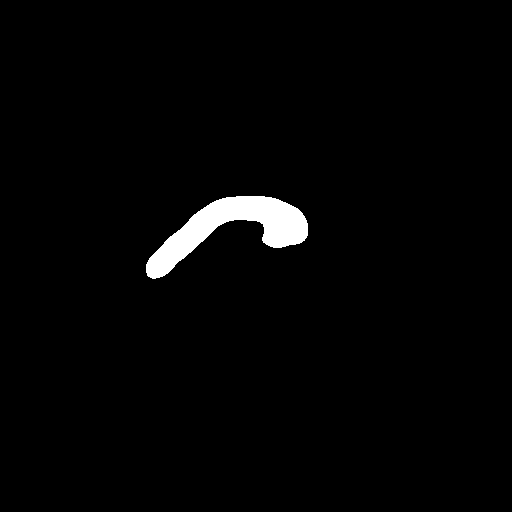

/content/mask_resized/_mask_1689234363_sample-slice044.jpg


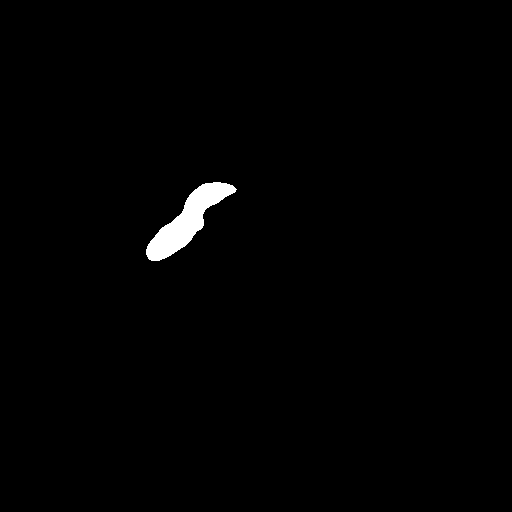

/content/mask_resized/_mask_1689234305_sample-slice048.jpg


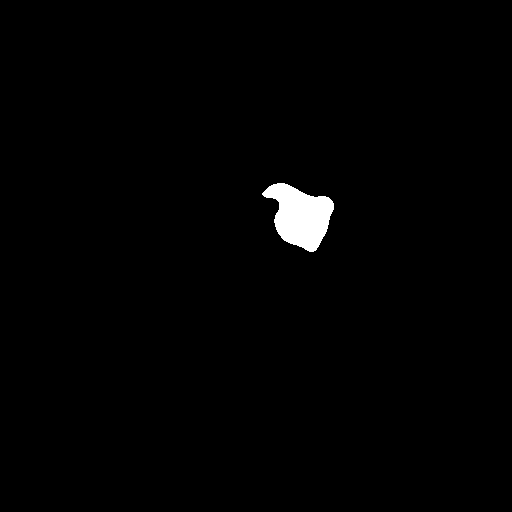

/content/mask_resized/_mask_1689234011_sample-slice049.jpg


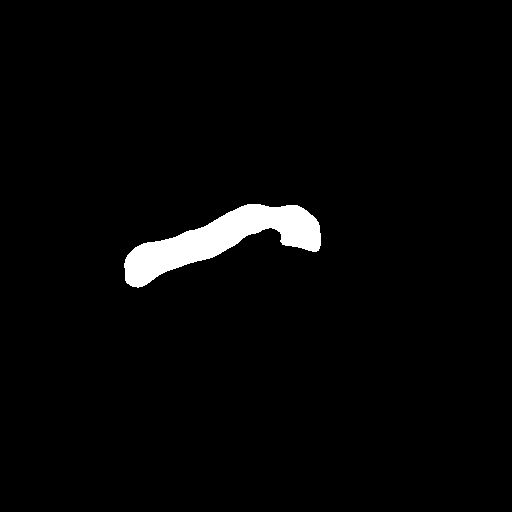

/content/mask_resized/_mask_1689234305_sample-slice054.jpg


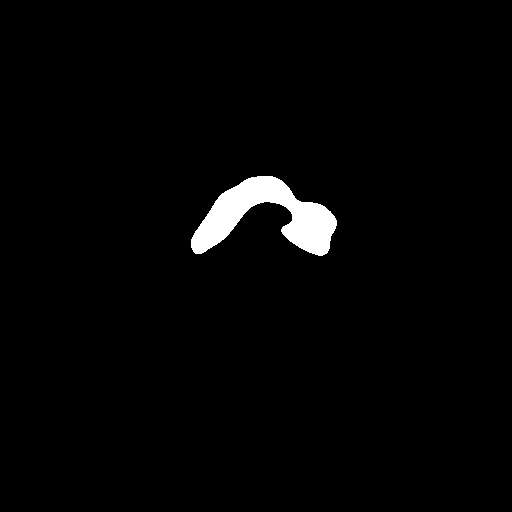

/content/mask_resized/_mask_1689233971_sample-slice096.jpg


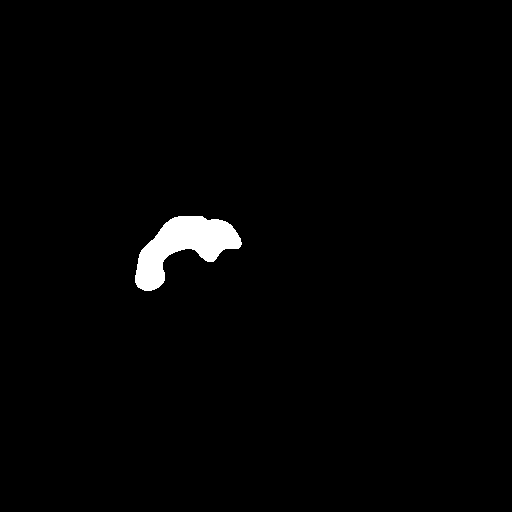

/content/mask_resized/_mask_1689234305_sample-slice053.jpg


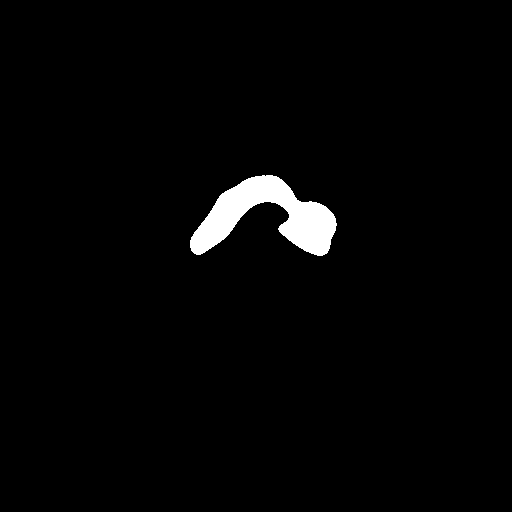

/content/mask_resized/_mask_1689234521_sample-slice021.jpg


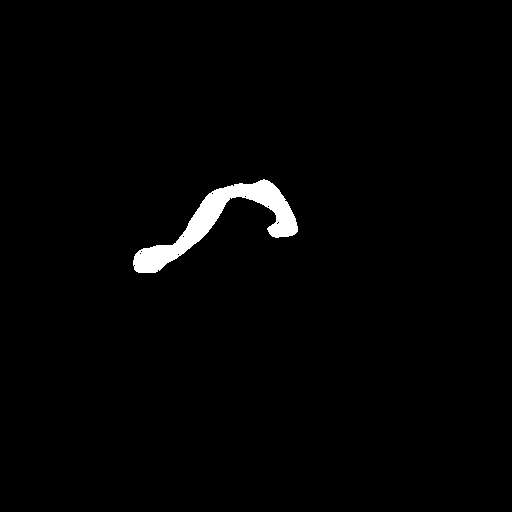

/content/mask_resized/_mask_1689233927_sample-slice040.jpg


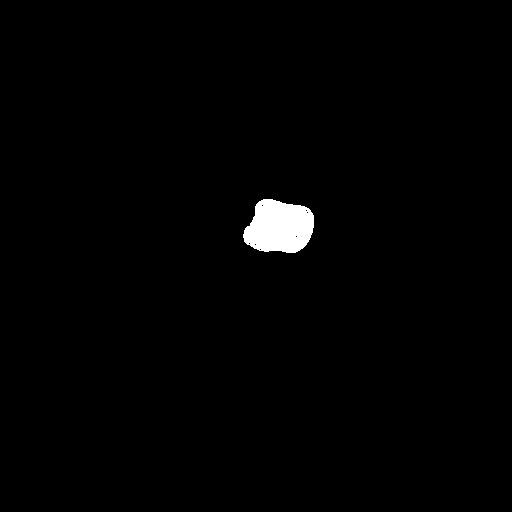

/content/mask_resized/_mask_1689234074_sample-slice047.jpg


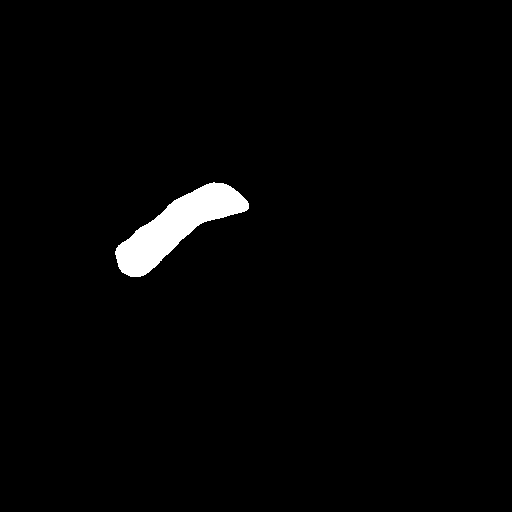

/content/mask_resized/_mask_1689233971_sample-slice047.jpg


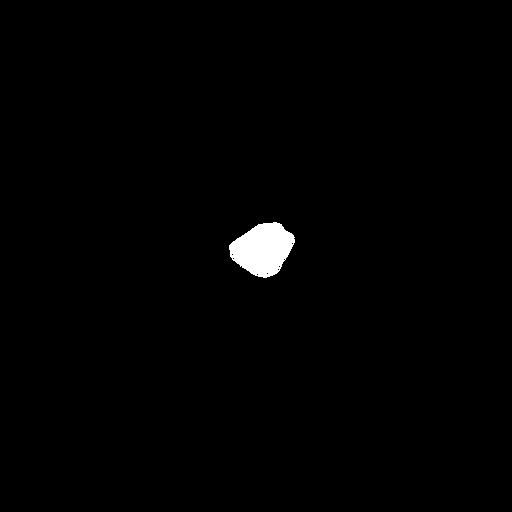

/content/mask_resized/_mask_1689233971_sample-slice092.jpg


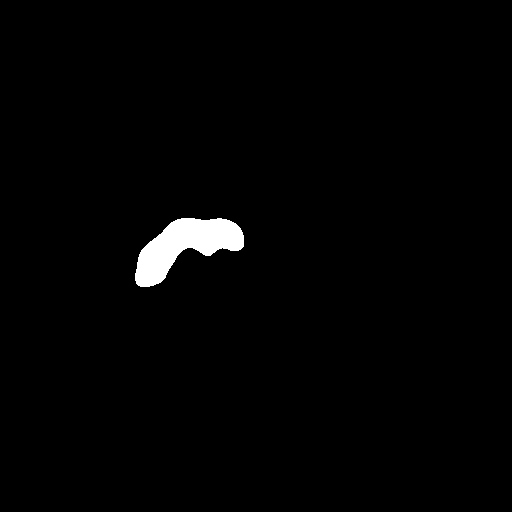

/content/mask_resized/_mask_1689234011_sample-slice043.jpg


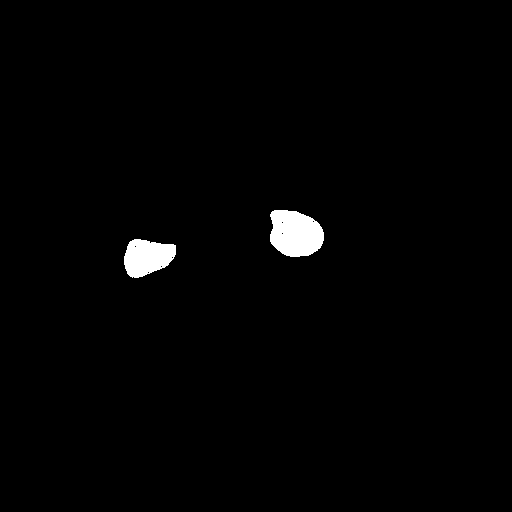

/content/mask_resized/_mask_1689233808_sample-slice065.jpg


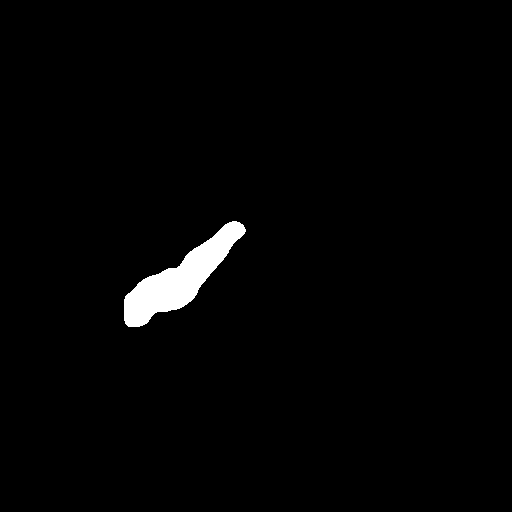

/content/mask_resized/_mask_1689234113_sample-slice037.jpg


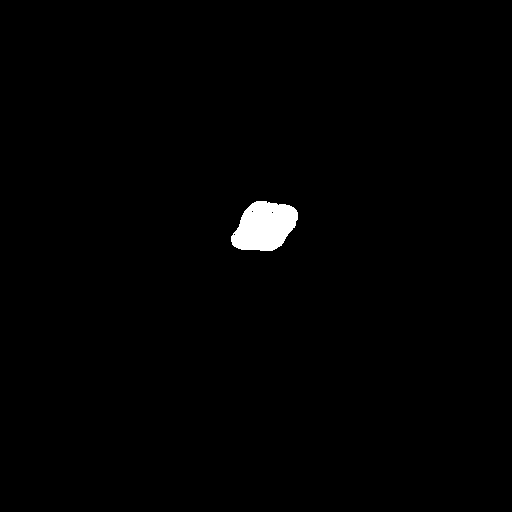

/content/mask_resized/_mask_1689234335_sample-slice051.jpg


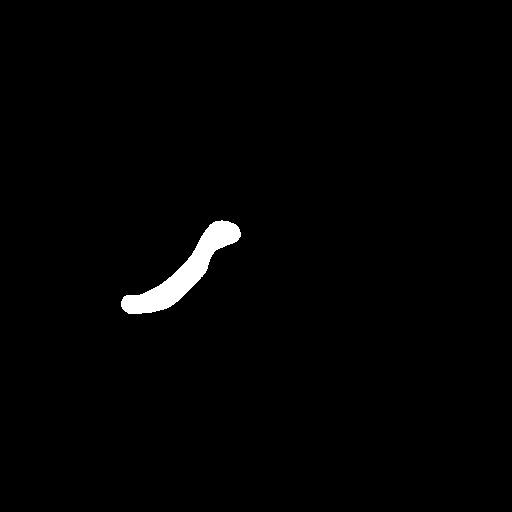

/content/mask_resized/_mask_1689234276_sample-slice044.jpg


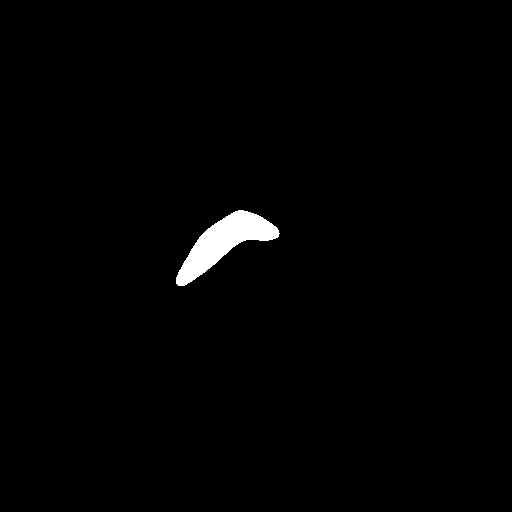

/content/mask_resized/_mask_1689234305_sample-slice050.jpg


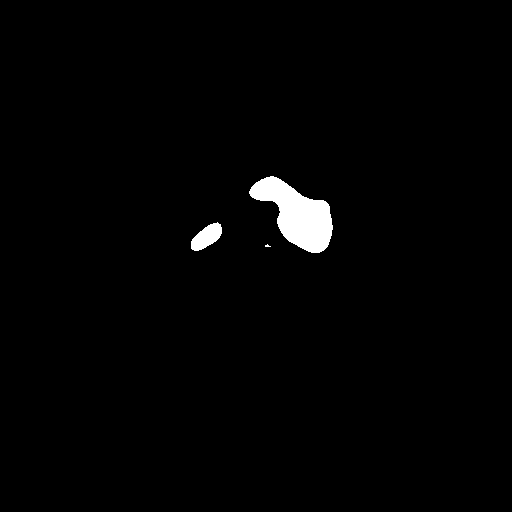

/content/mask_resized/_mask_1689234335_sample-slice047.jpg


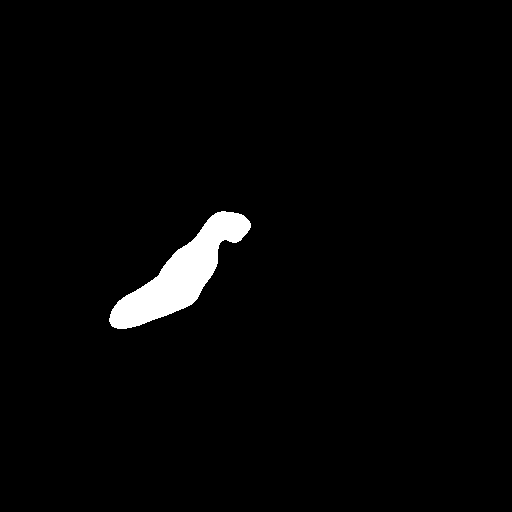

/content/mask_resized/_mask_1689234334_sample-slice048.jpg


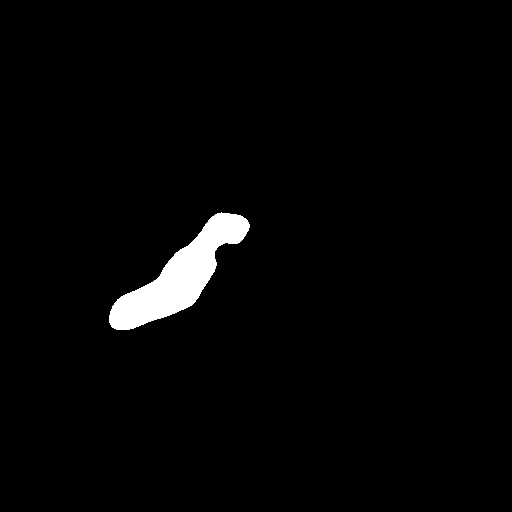

/content/mask_resized/_mask_1689234244_sample-slice050.jpg


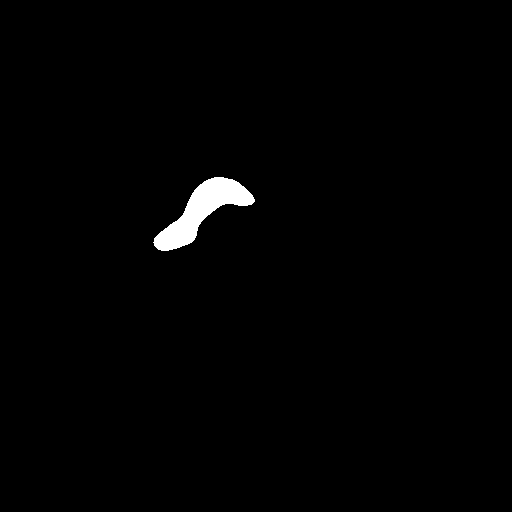

/content/mask_resized/_mask_1689233971_sample-slice046.jpg


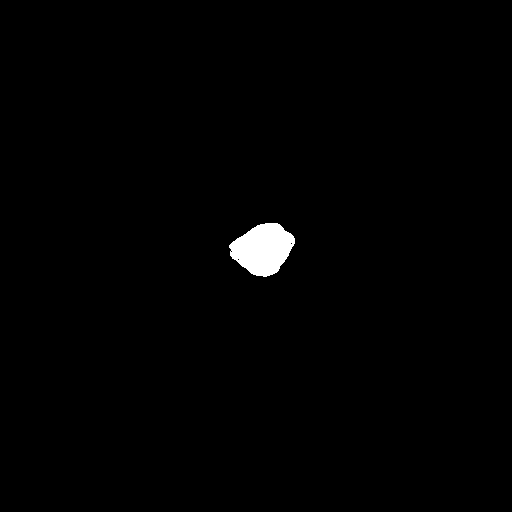

/content/mask_resized/_mask_1689234391_sample-slice040.jpg


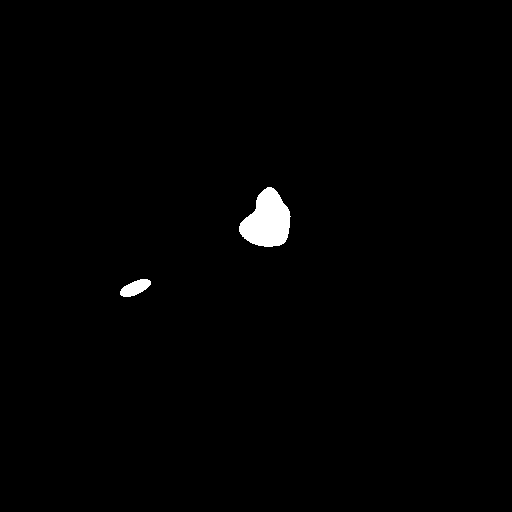

/content/mask_resized/_mask_1689234521_sample-slice020.jpg


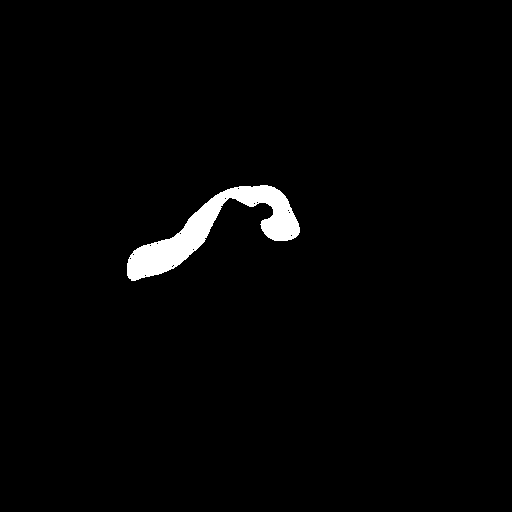

/content/mask_resized/_mask_sample-slice052.jpg


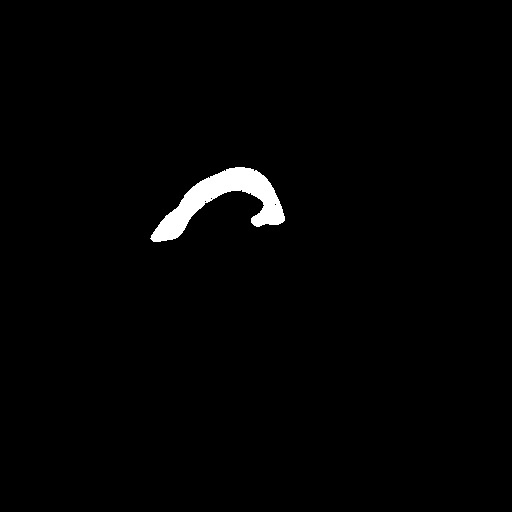

/content/mask_resized/_mask_1689234039_sample-slice037.jpg


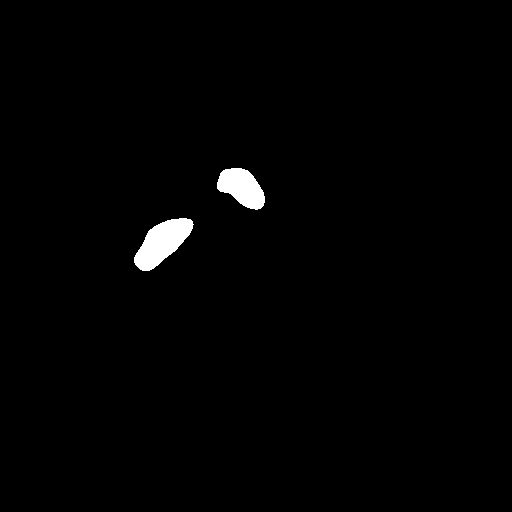

/content/mask_resized/_mask_1689234391_sample-slice029.jpg


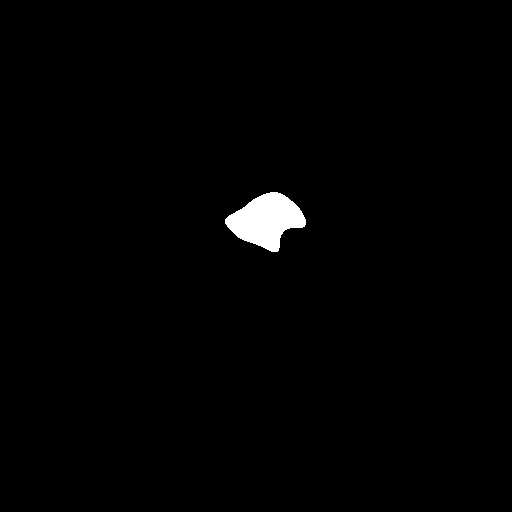

/content/mask_resized/_mask_1689233808_sample-slice040.jpg


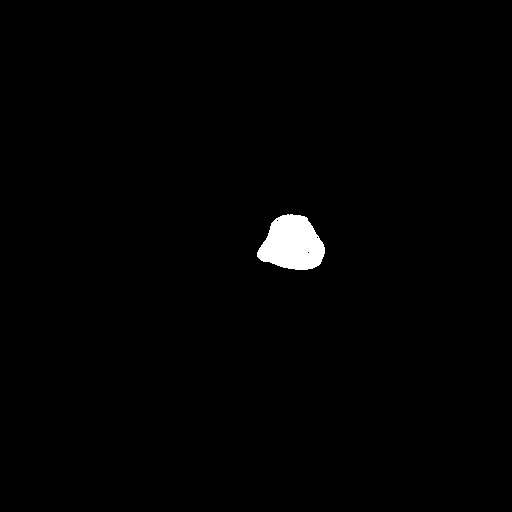

/content/mask_resized/_mask_1689234391_sample-slice031.jpg


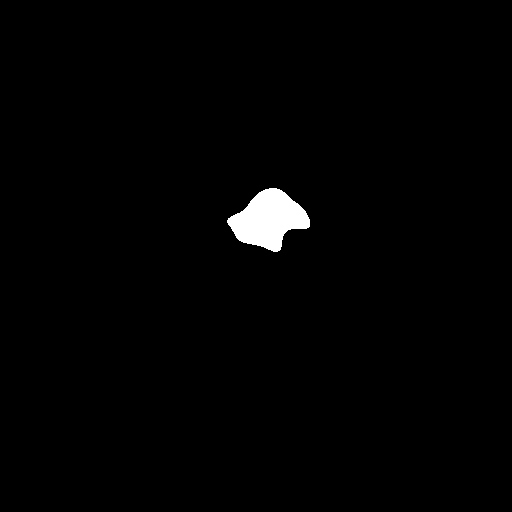

/content/mask_resized/_mask_1689234363_sample-slice042.jpg


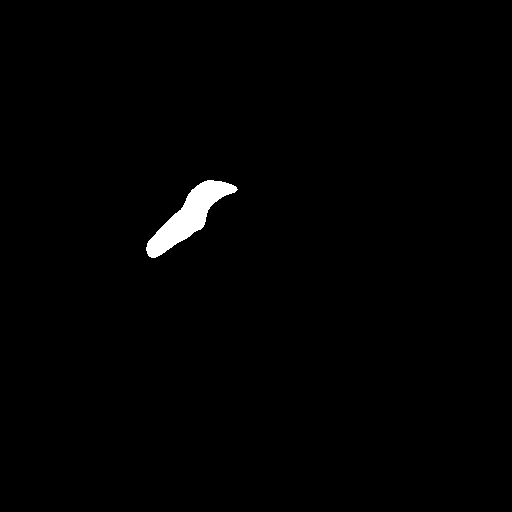

/content/mask_resized/_mask_1689234363_sample-slice026.jpg


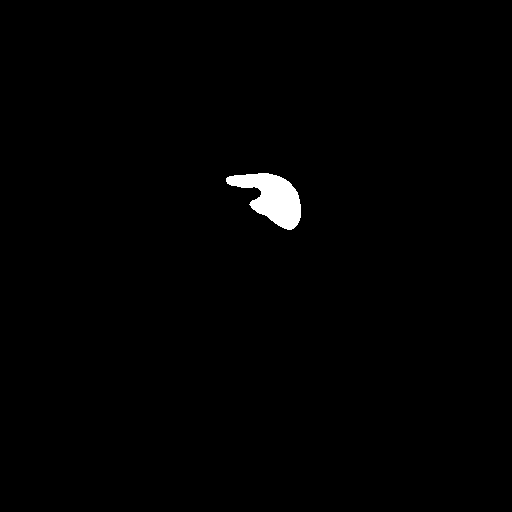

/content/mask_resized/_mask_1689234074_sample-slice052.jpg


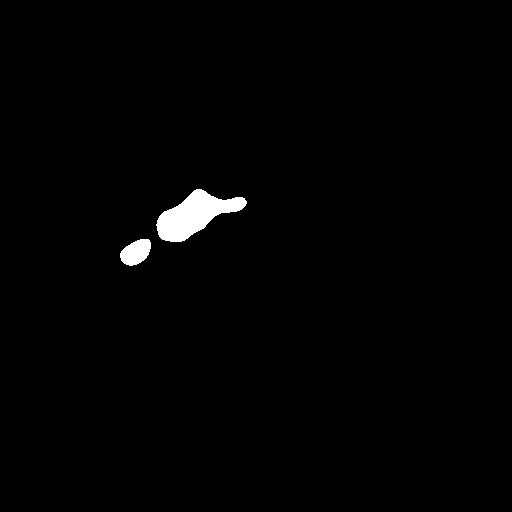

/content/mask_resized/_mask_1689233971_sample-slice045.jpg


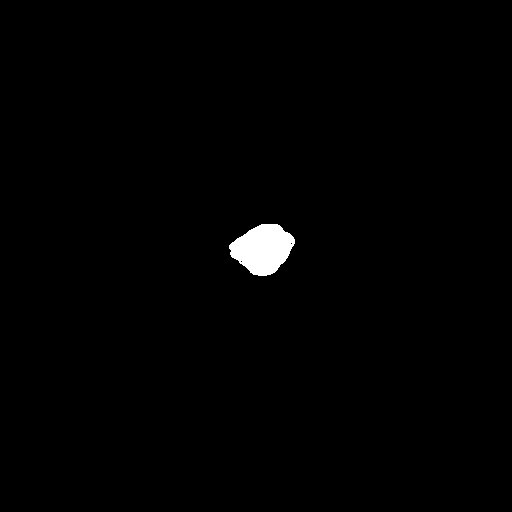

/content/mask_resized/_mask_1689233808_sample-slice042.jpg


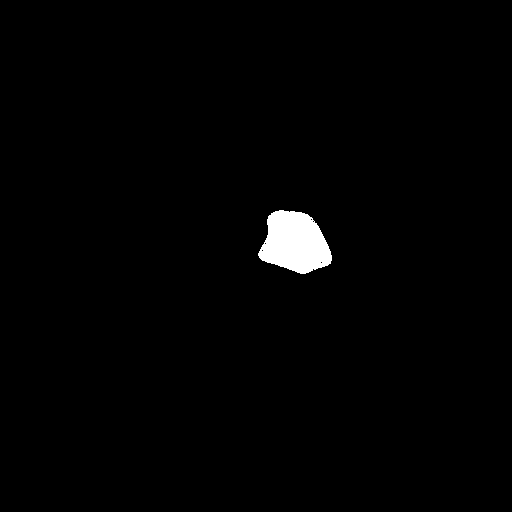

/content/mask_resized/_mask_1689234244_sample-slice049.jpg


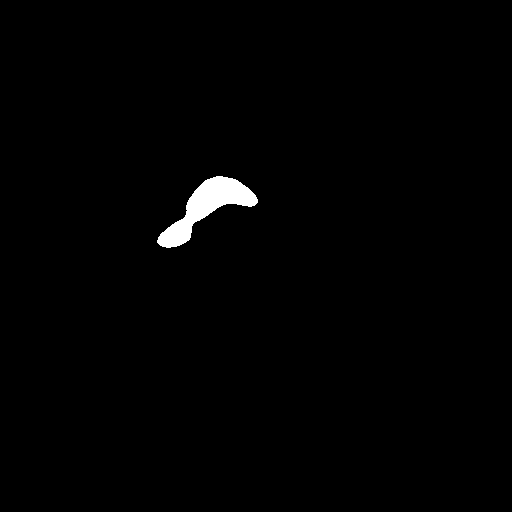

/content/mask_resized/_mask_1689233808_sample-slice062.jpg


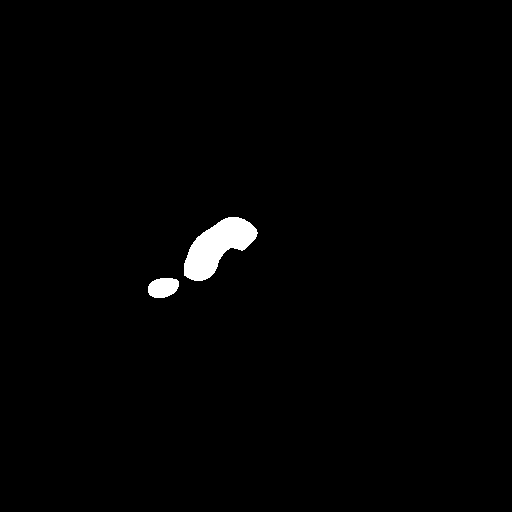

/content/mask_resized/_mask_1689233808_sample-slice045.jpg


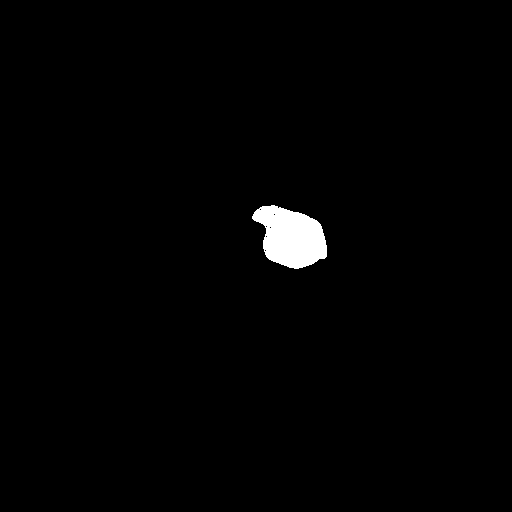

/content/mask_resized/_mask_1689234039_sample-slice041.jpg


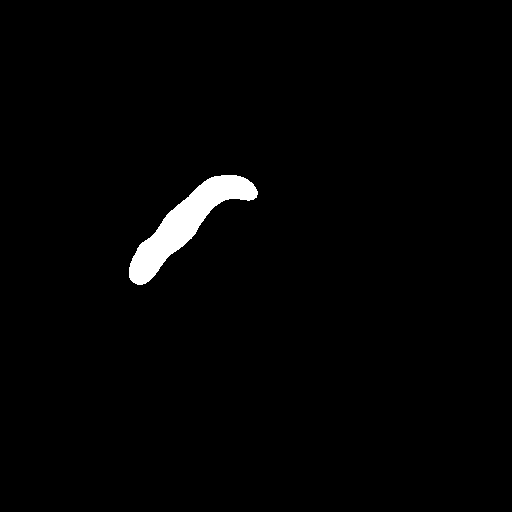

/content/mask_resized/_mask_1689234391_sample-slice043.jpg


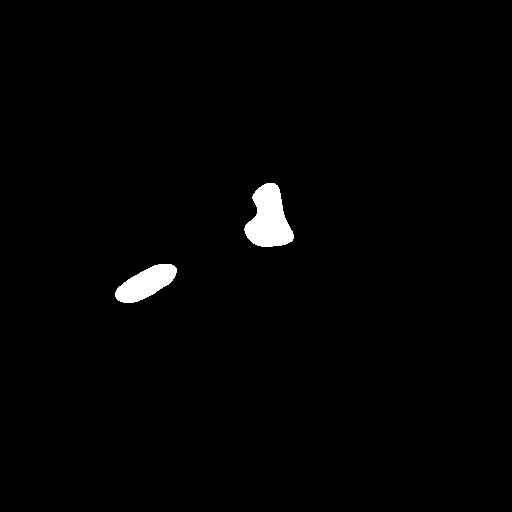

/content/mask_resized/_mask_1689234074_sample-slice051.jpg


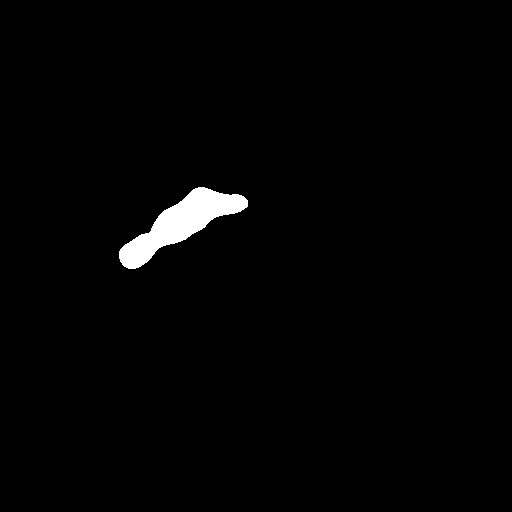

/content/mask_resized/_mask_1689234494_sample-slice018.jpg


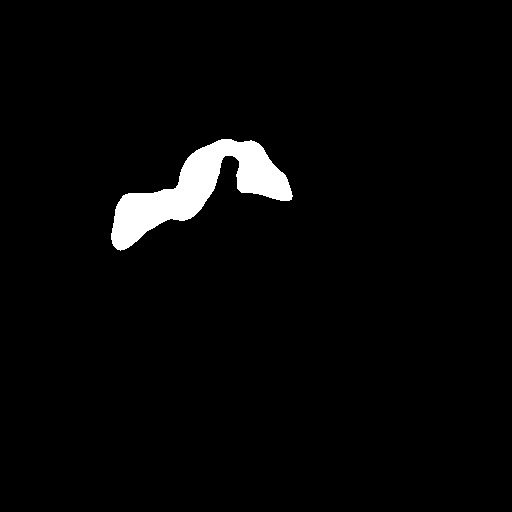

/content/mask_resized/_mask_sample-slice039.jpg


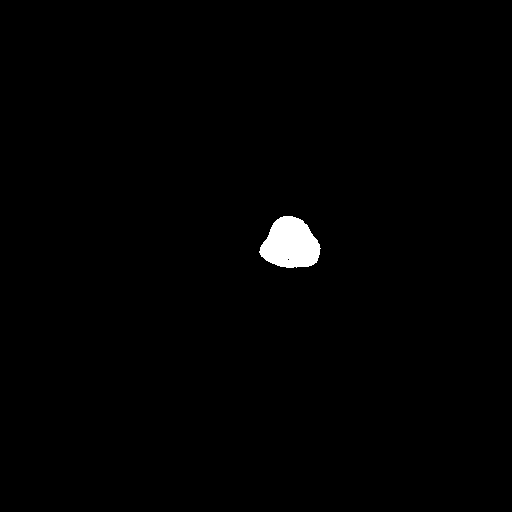

/content/mask_resized/_mask_sample-slice057.jpg


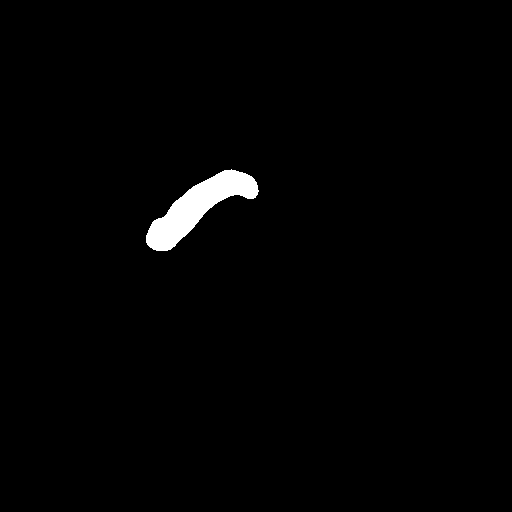

/content/mask_resized/_mask_1689234011_sample-slice053.jpg


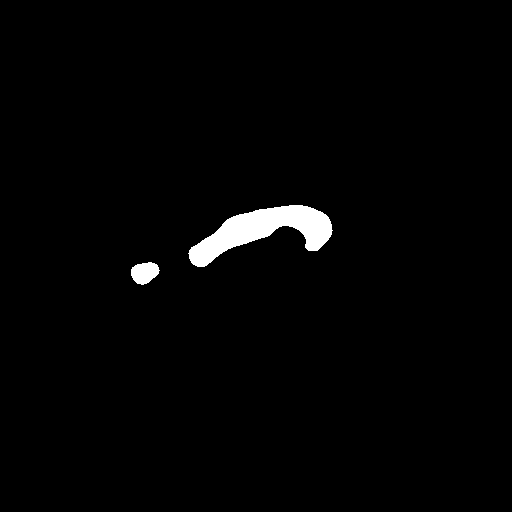

/content/mask_resized/_mask_1689234305_sample-slice039.jpg


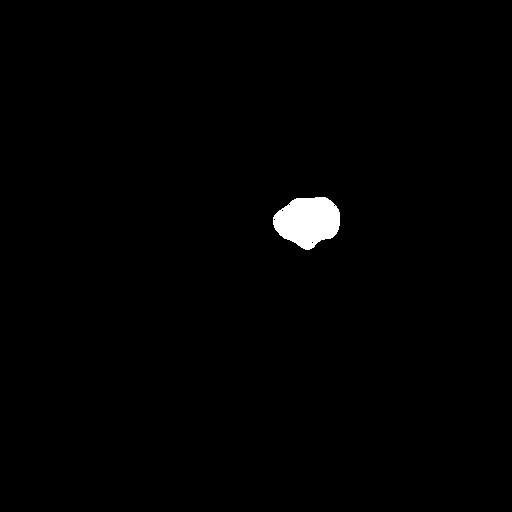

/content/mask_resized/_mask_1689234363_sample-slice046.jpg


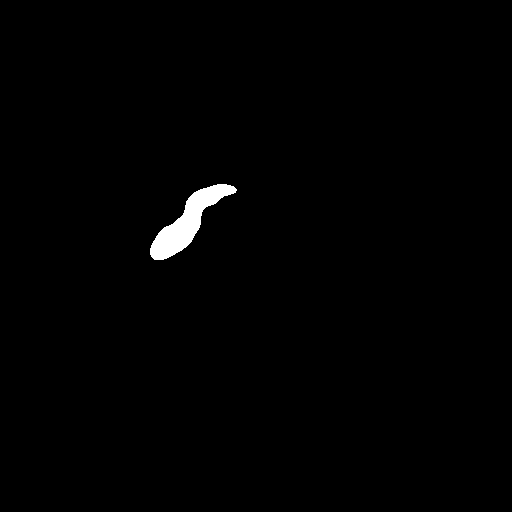

/content/mask_resized/_mask_1689233808_sample-slice047.jpg


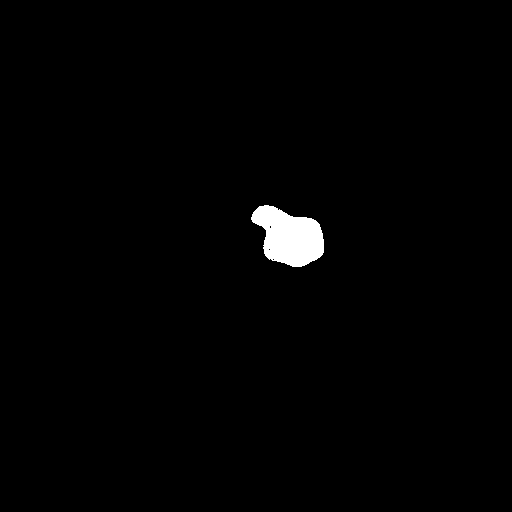

/content/mask_resized/_mask_1689233808_sample-slice050.jpg


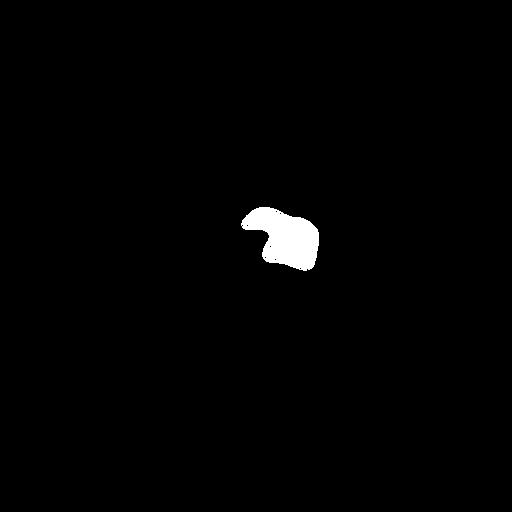

/content/mask_resized/_mask_1689234363_sample-slice027.jpg


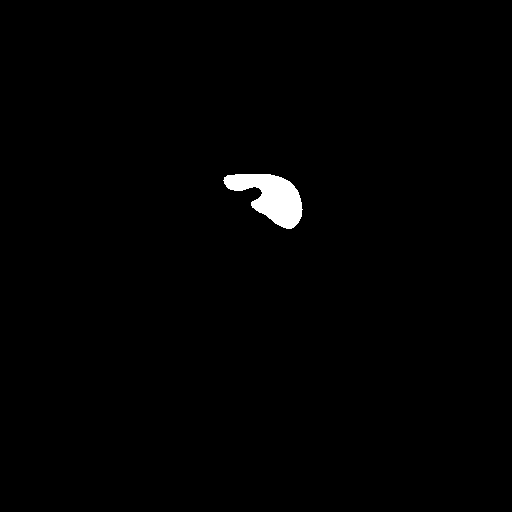

/content/mask_resized/_mask_1689234305_sample-slice055.jpg


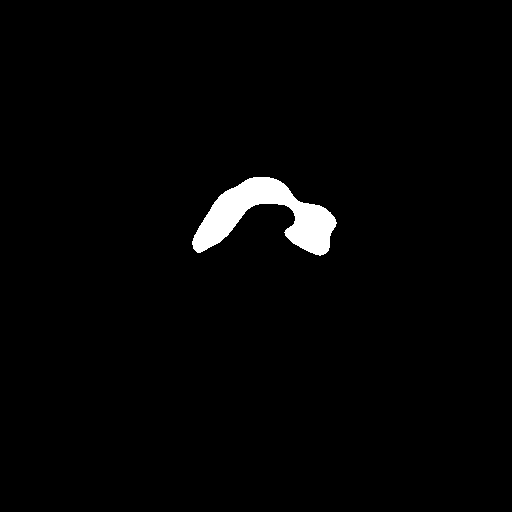

/content/mask_resized/_mask_sample-slice059.jpg


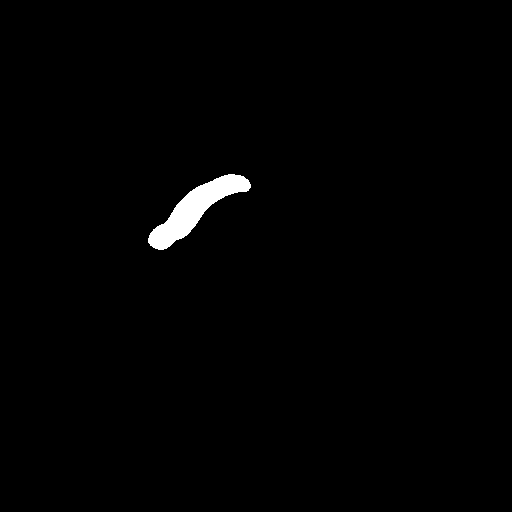

/content/mask_resized/_mask_1689234011_sample-slice051.jpg


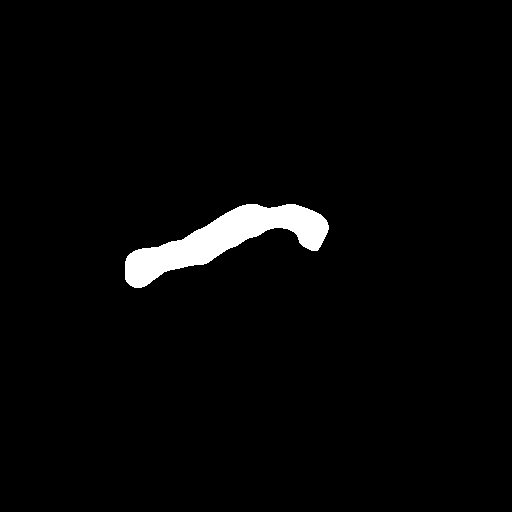

/content/mask_resized/_mask_1689234469_sample-slice050.jpg


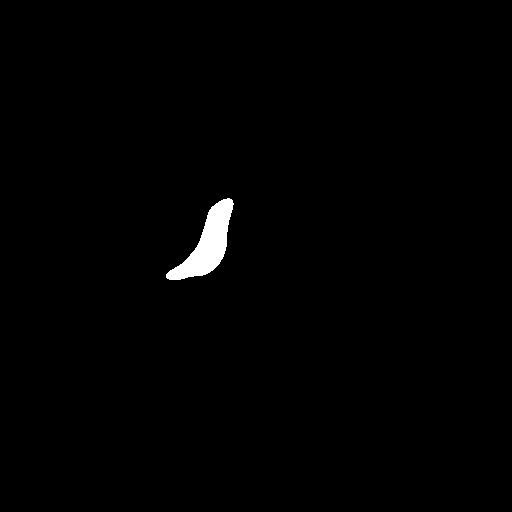

/content/mask_resized/_mask_sample-slice061.jpg


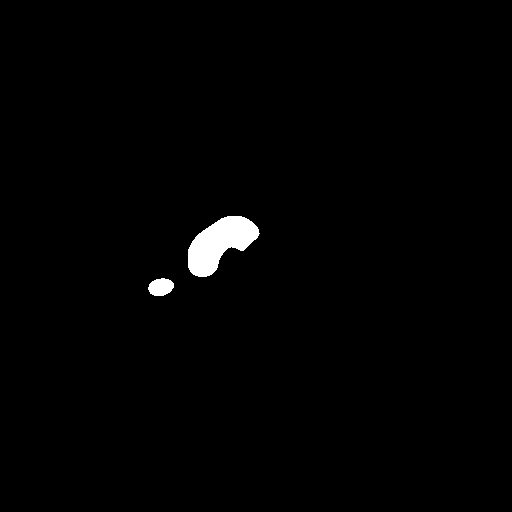

/content/mask_resized/_mask_1689234074_sample-slice042.jpg


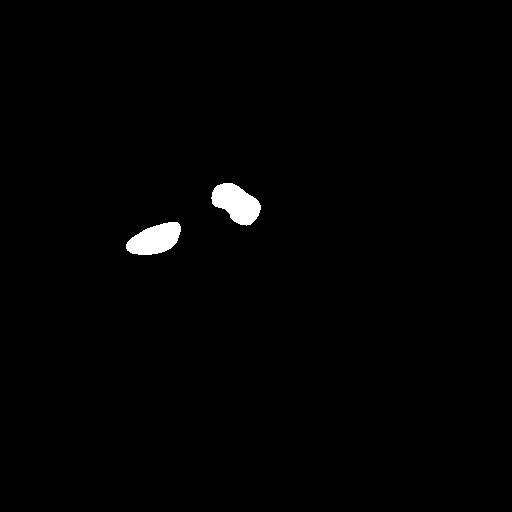

/content/mask_resized/_mask_1689234363_sample-slice021.jpg


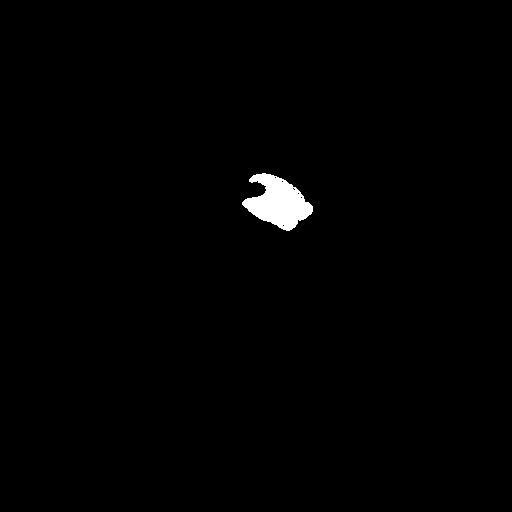

/content/mask_resized/_mask_sample-slice067.jpg


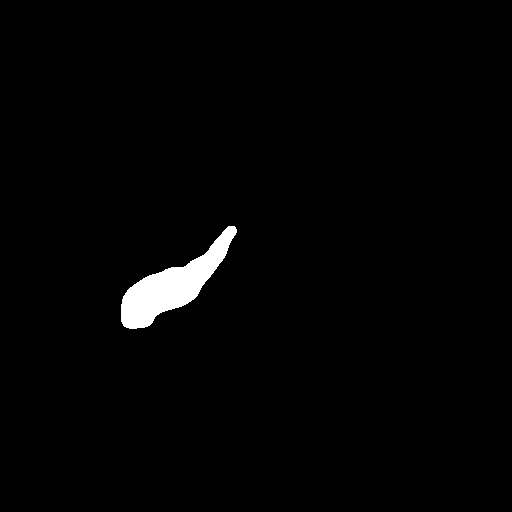

/content/mask_resized/_mask_1689234363_sample-slice030.jpg


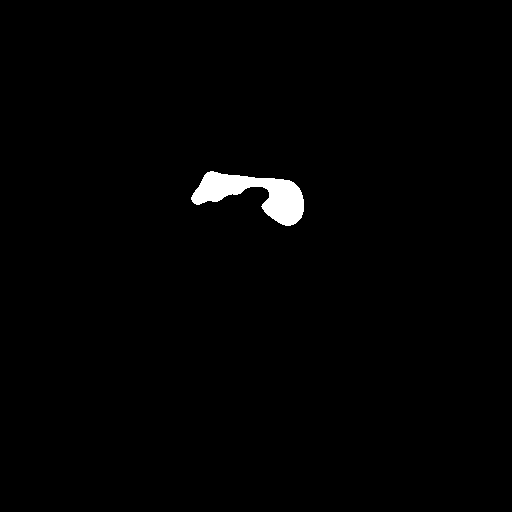

/content/mask_resized/_mask_1689233808_sample-slice064.jpg


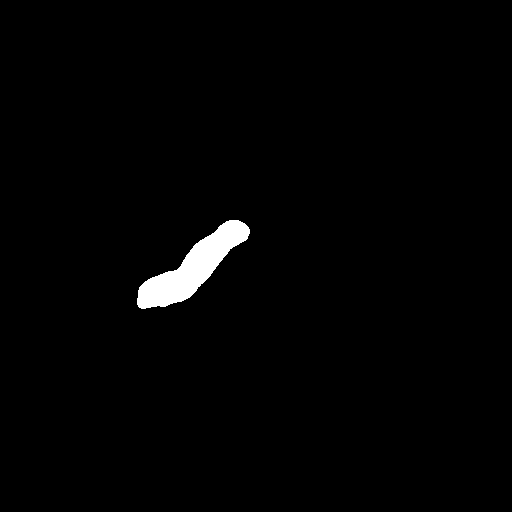

/content/mask_resized/_mask_1689233927_sample-slice046.jpg


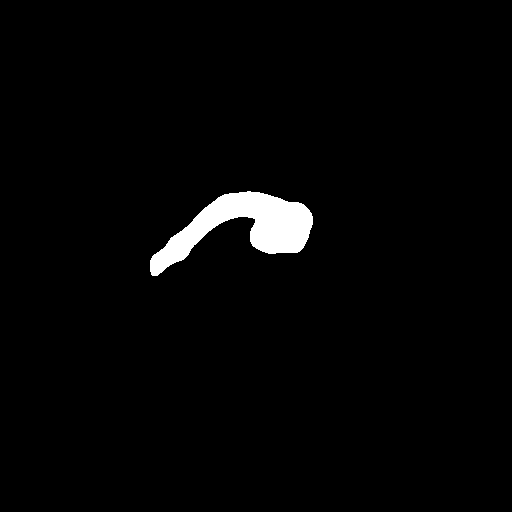

/content/mask_resized/_mask_sample-slice041.jpg


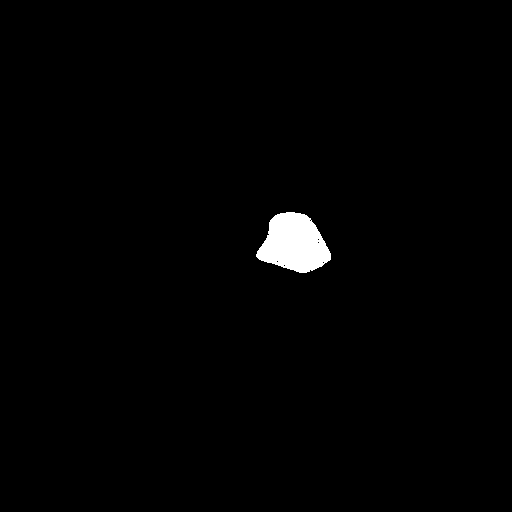

/content/mask_resized/_mask_1689234039_sample-slice036.jpg


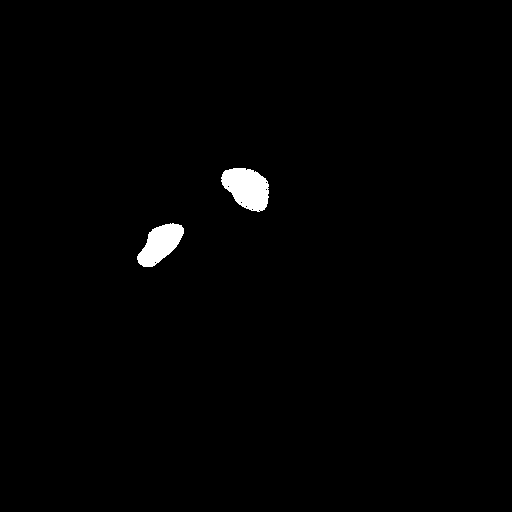

/content/mask_resized/_mask_1689233808_sample-slice066.jpg


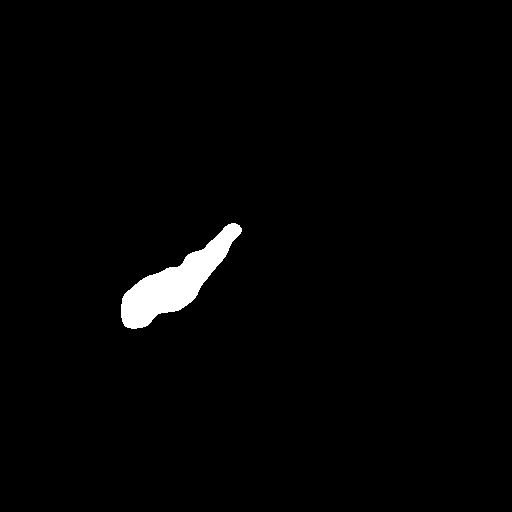

/content/mask_resized/_mask_1689233927_sample-slice041.jpg


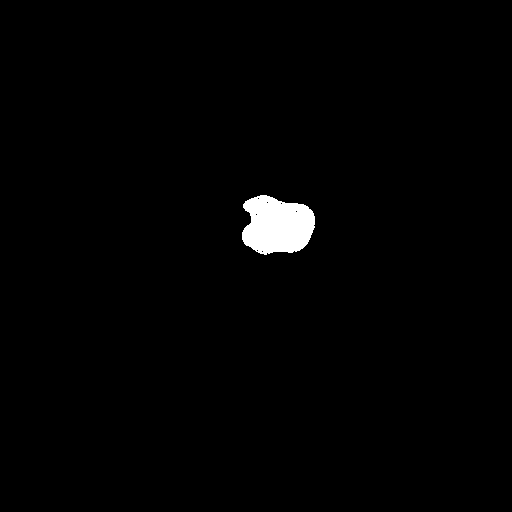

/content/mask_resized/_mask_sample-slice058.jpg


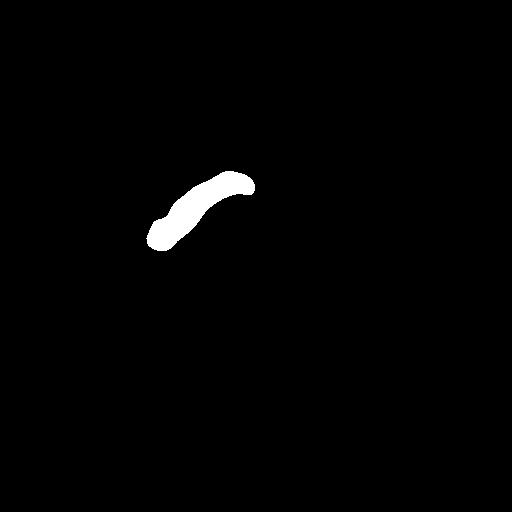

/content/mask_resized/_mask_1689233927_sample-slice043.jpg


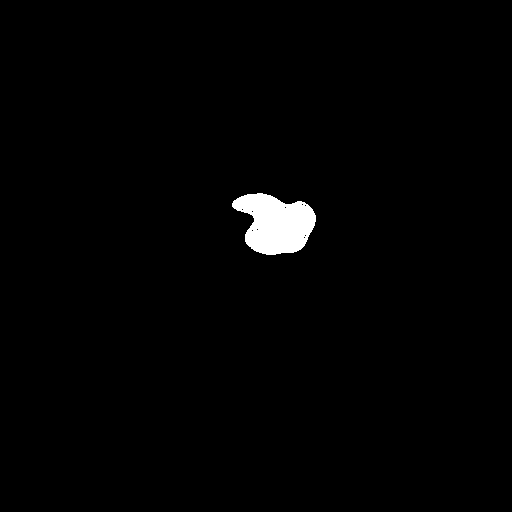

/content/mask_resized/_mask_sample-slice043.jpg


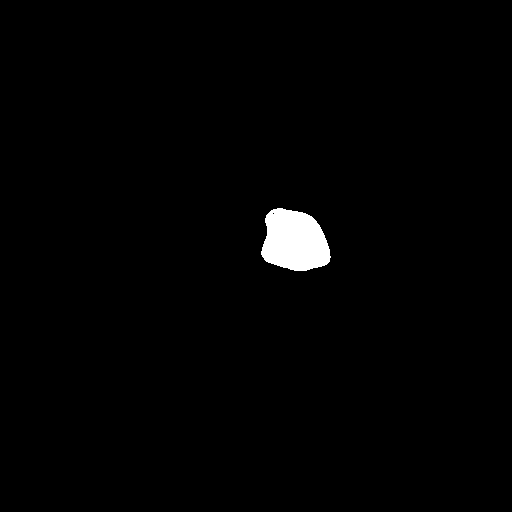

/content/mask_resized/_mask_1689233971_sample-slice106.jpg


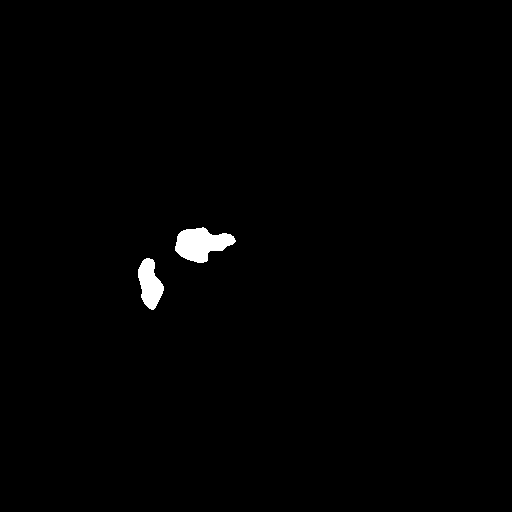

/content/mask_resized/_mask_1689234305_sample-slice041.jpg


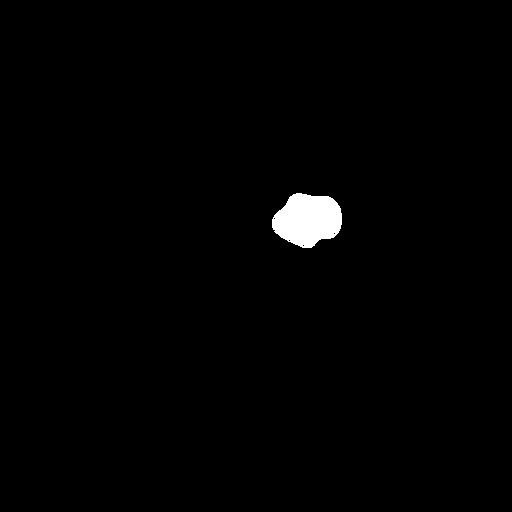

/content/mask_resized/_mask_1689234039_sample-slice039.jpg


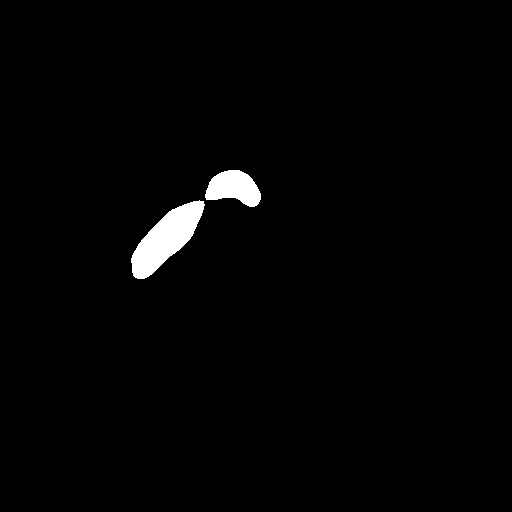

/content/mask_resized/_mask_sample-slice066.jpg


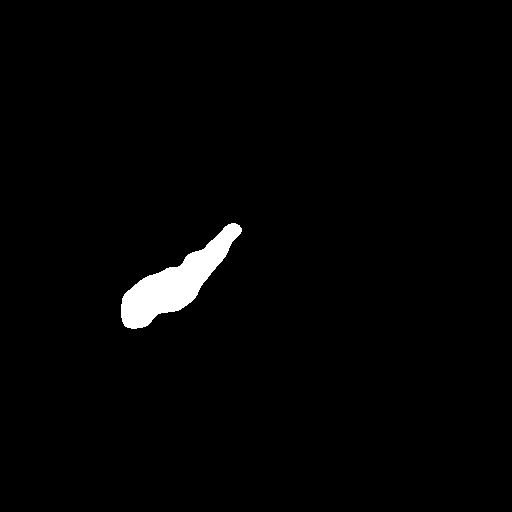

/content/mask_resized/_mask_1689233971_sample-slice104.jpg


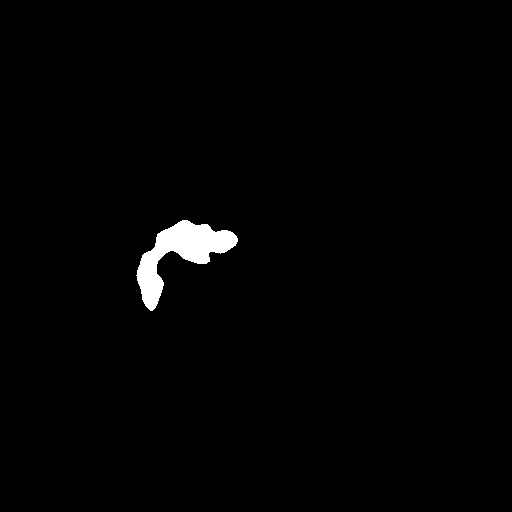

/content/mask_resized/_mask_1689234244_sample-slice053.jpg


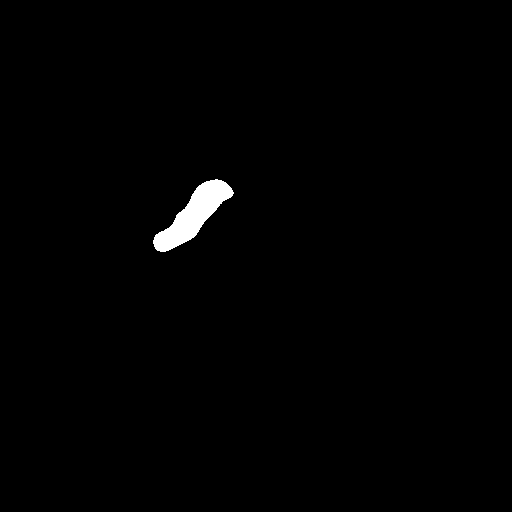

/content/mask_resized/_mask_1689233808_sample-slice043.jpg


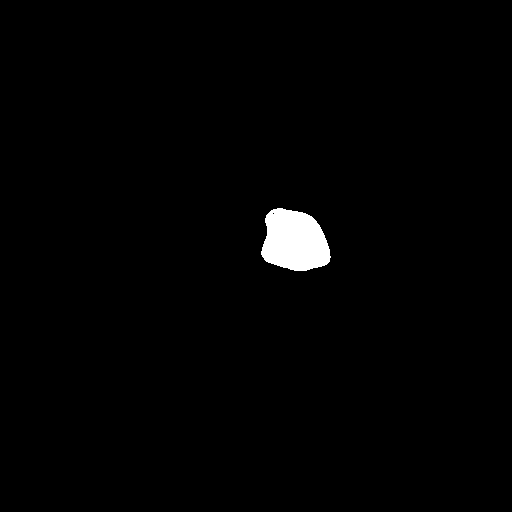

/content/mask_resized/_mask_1689234494_sample-slice021.jpg


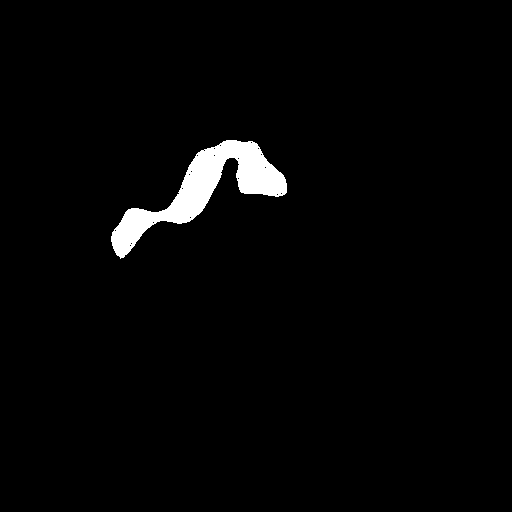

/content/mask_resized/_mask_1689234039_sample-slice043.jpg


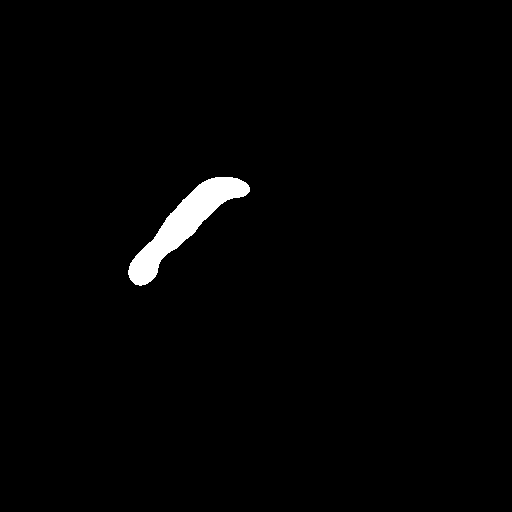

/content/mask_resized/_mask_1689233881_sample-slice035.jpg


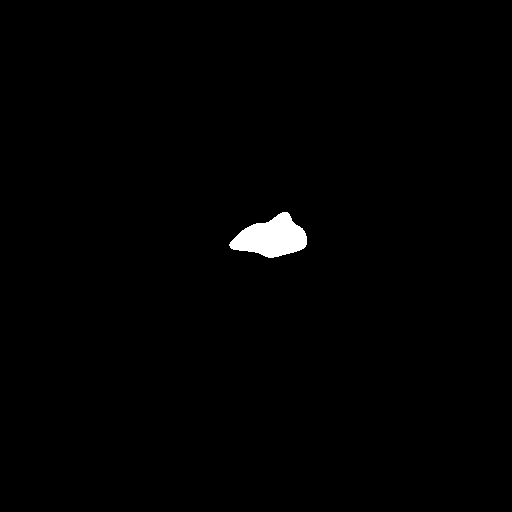

/content/mask_resized/_mask_1689234426_sample-slice042.jpg


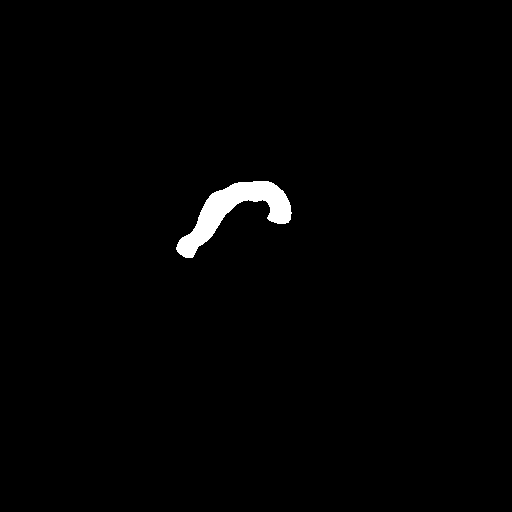

/content/mask_resized/_mask_1689234335_sample-slice037.jpg


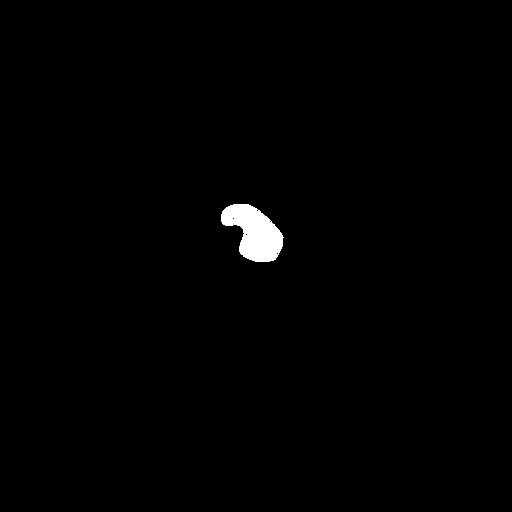

/content/mask_resized/_mask_1689233880_sample-slice058.jpg


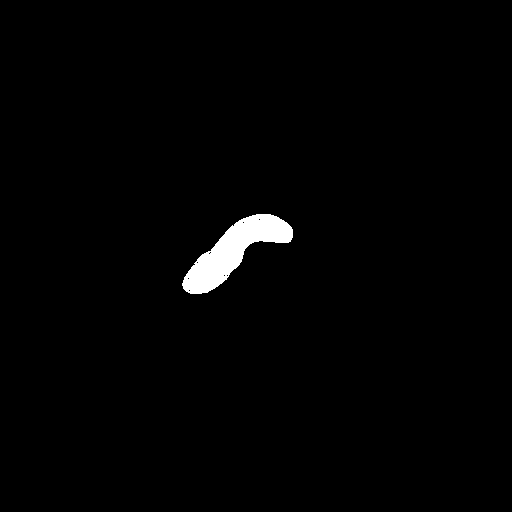

/content/mask_resized/_mask_1689234426_sample-slice041.jpg


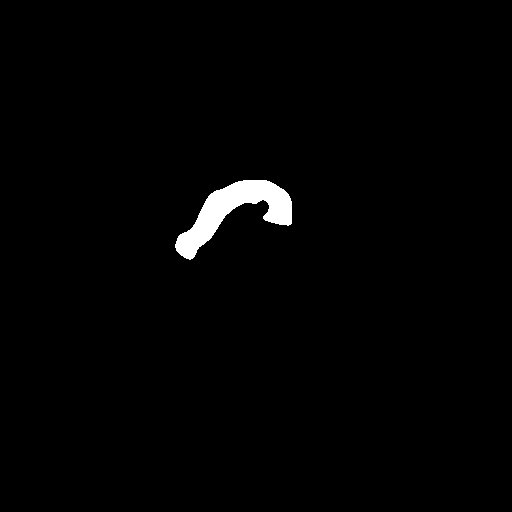

/content/mask_resized/_mask_1689234391_sample-slice050.jpg


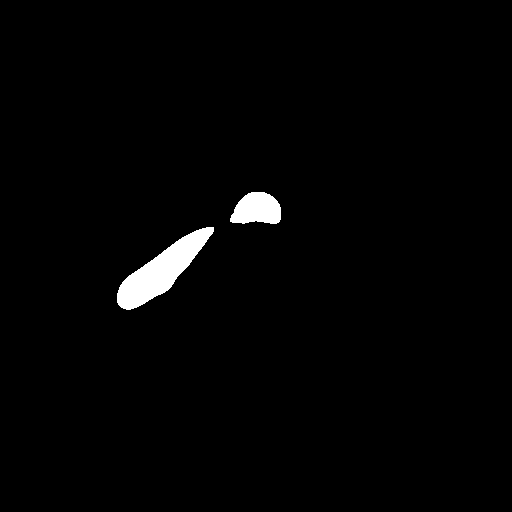

/content/mask_resized/_mask_1689233971_sample-slice083.jpg


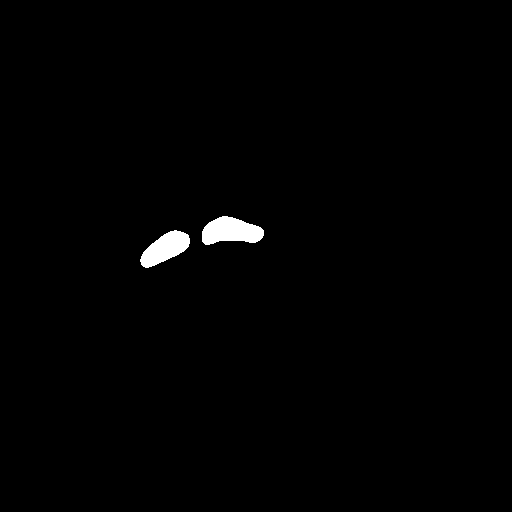

/content/mask_resized/_mask_1689234391_sample-slice042.jpg


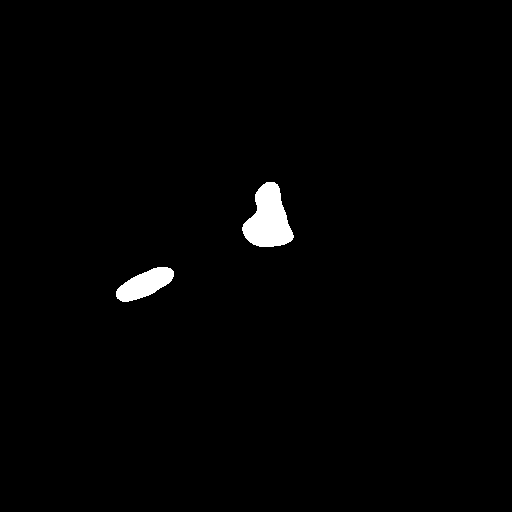

/content/mask_resized/_mask_1689233971_sample-slice091.jpg


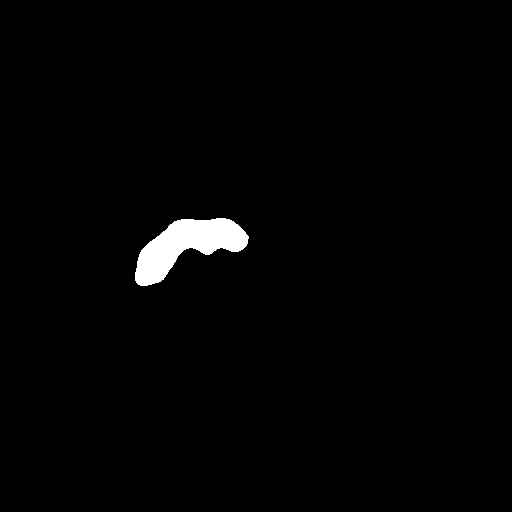

/content/mask_resized/_mask_1689234363_sample-slice041.jpg


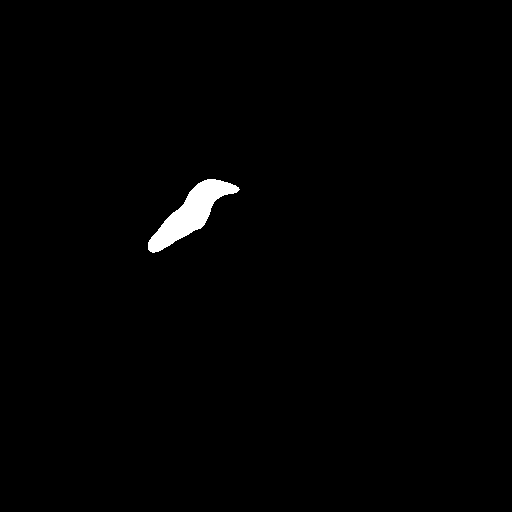

/content/mask_resized/_mask_1689234276_sample-slice049.jpg


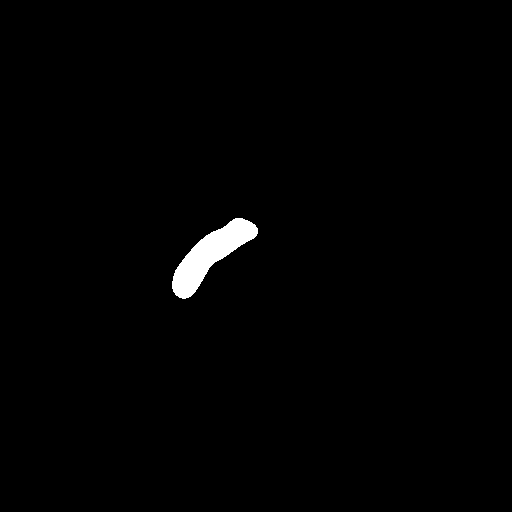

/content/mask_resized/_mask_1689234039_sample-slice040.jpg


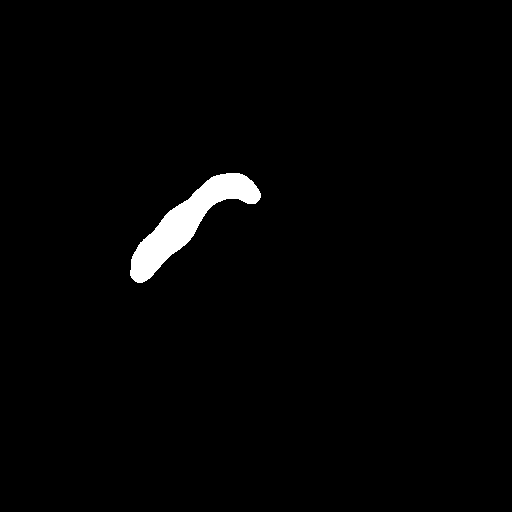

/content/mask_resized/_mask_1689234521_sample-slice012.jpg


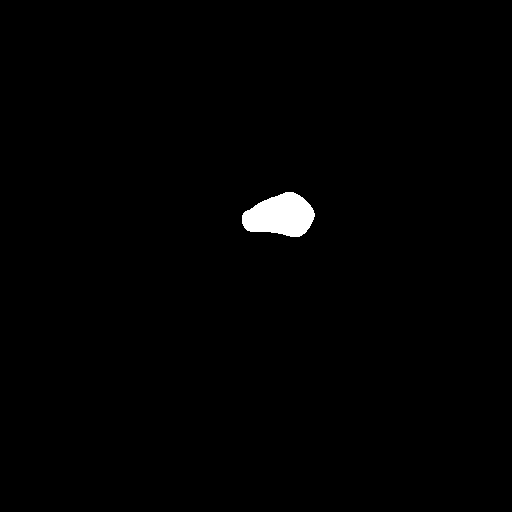

/content/mask_resized/_mask_1689233971_sample-slice090.jpg


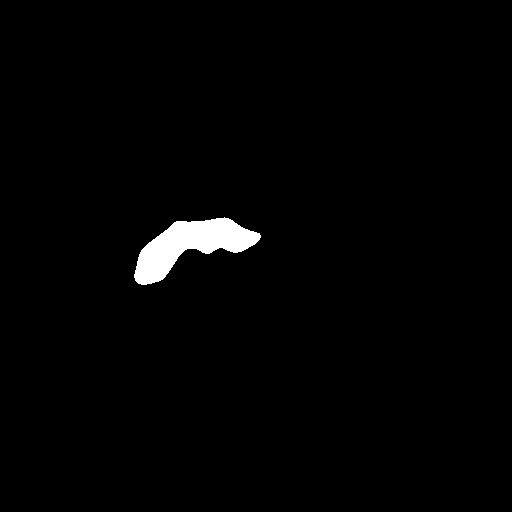

/content/mask_resized/_mask_1689233880_sample-slice059.jpg


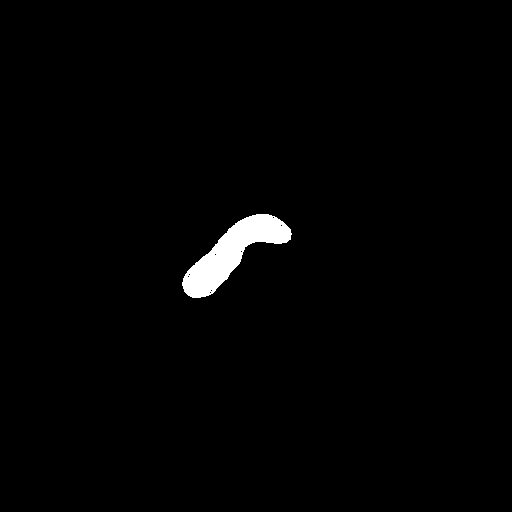

/content/mask_resized/_mask_1689233971_sample-slice088.jpg


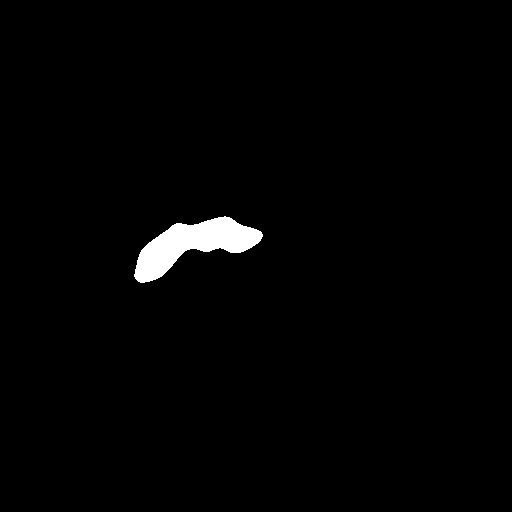

/content/mask_resized/_mask_1689234011_sample-slice050.jpg


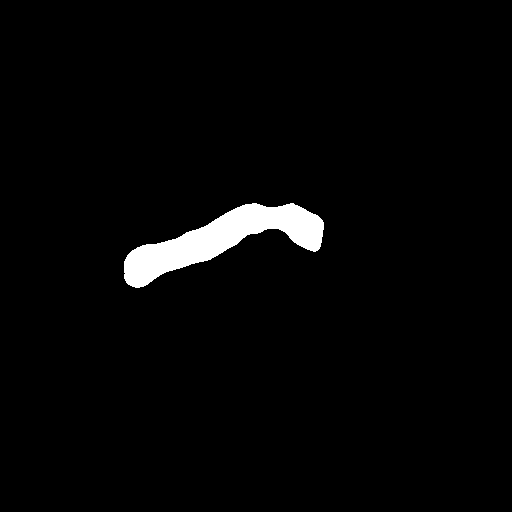

/content/mask_resized/_mask_1689234074_sample-slice045.jpg


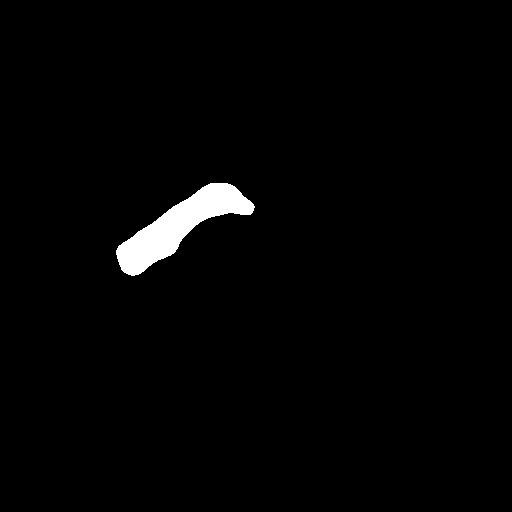

/content/mask_resized/_mask_sample-slice042.jpg


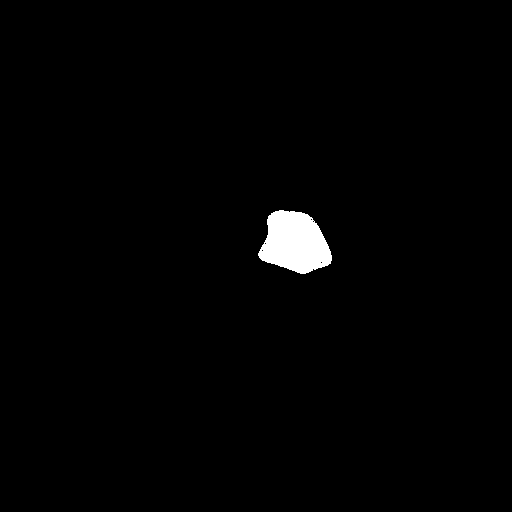

/content/mask_resized/_mask_1689233971_sample-slice087.jpg


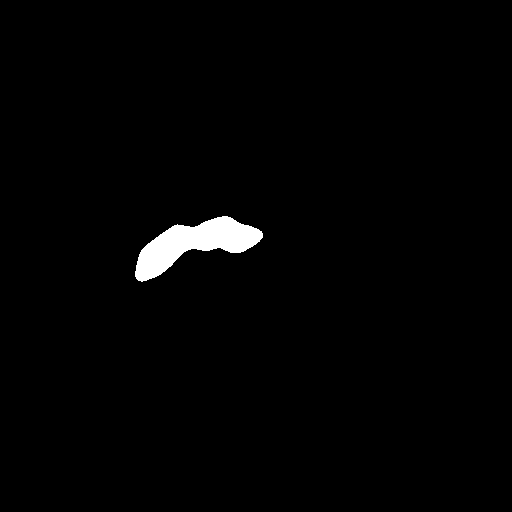

/content/mask_resized/_mask_1689234276_sample-slice045.jpg


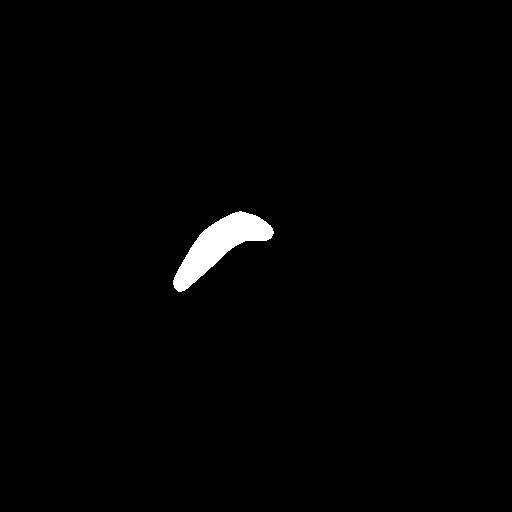

/content/mask_resized/_mask_1689234363_sample-slice037.jpg


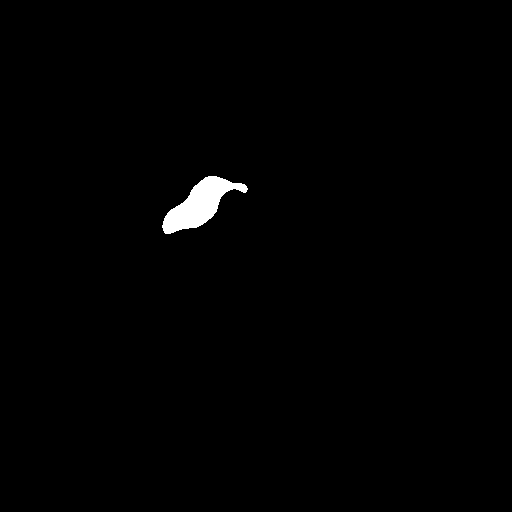

/content/mask_resized/_mask_1689234391_sample-slice032.jpg


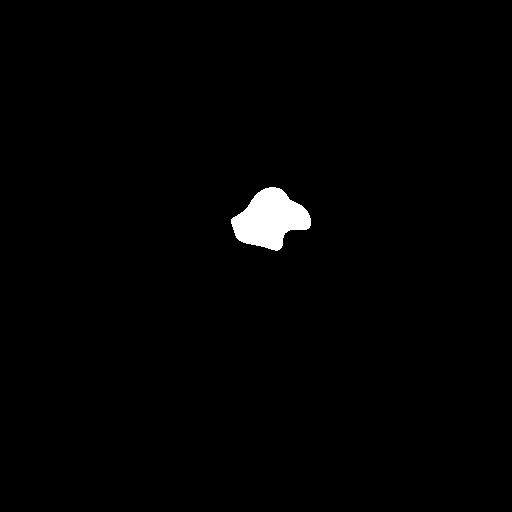

/content/mask_resized/_mask_1689234039_sample-slice044.jpg


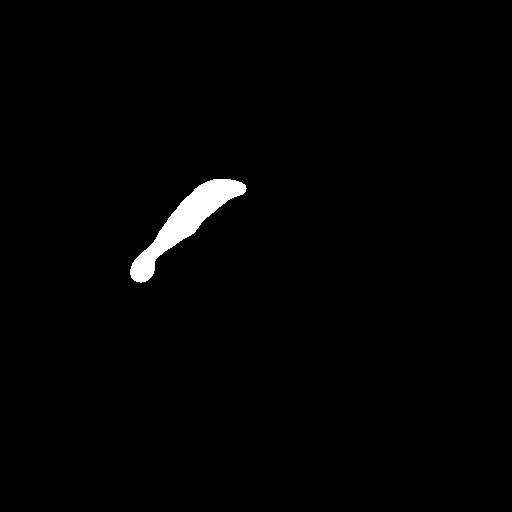

/content/mask_resized/_mask_1689234494_sample-slice022.jpg


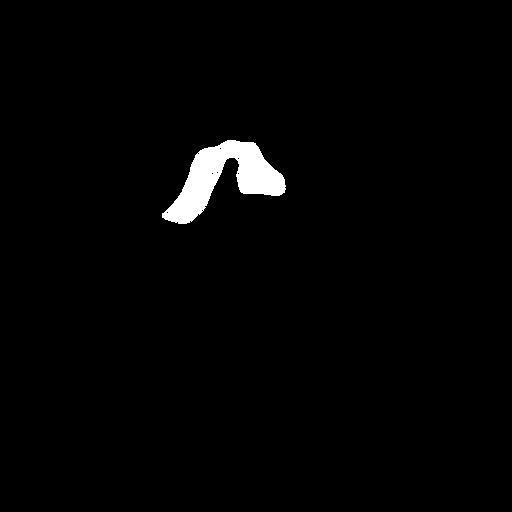

/content/mask_resized/_mask_1689234114_sample-slice043.jpg


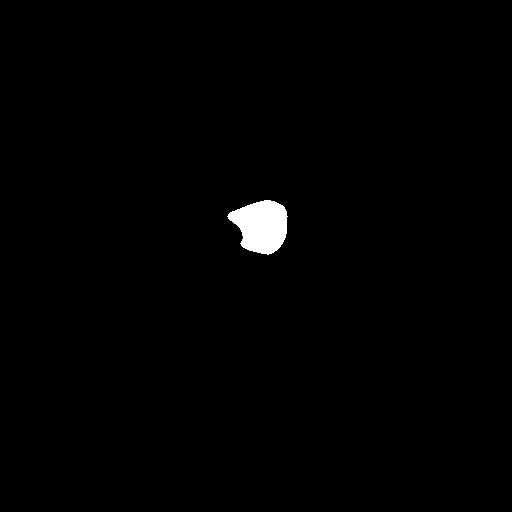

/content/mask_resized/_mask_1689234335_sample-slice031.jpg


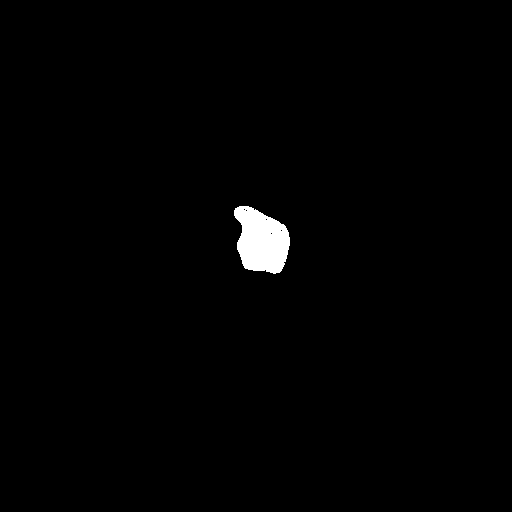

/content/mask_resized/_mask_sample-slice065.jpg


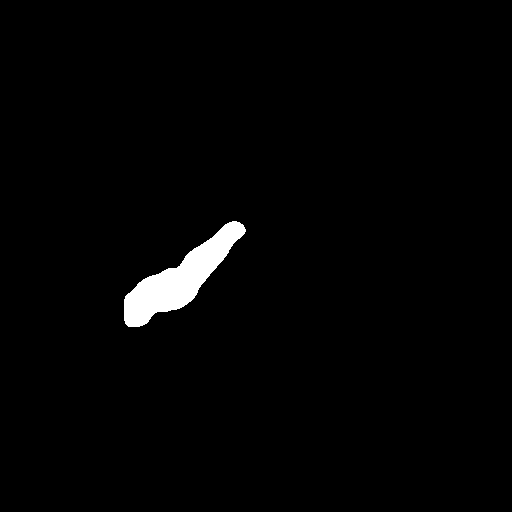

/content/mask_resized/_mask_1689233971_sample-slice086.jpg


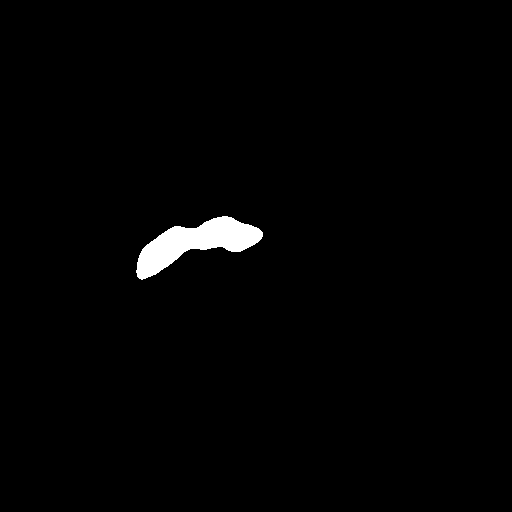

/content/mask_resized/_mask_1689234335_sample-slice032.jpg


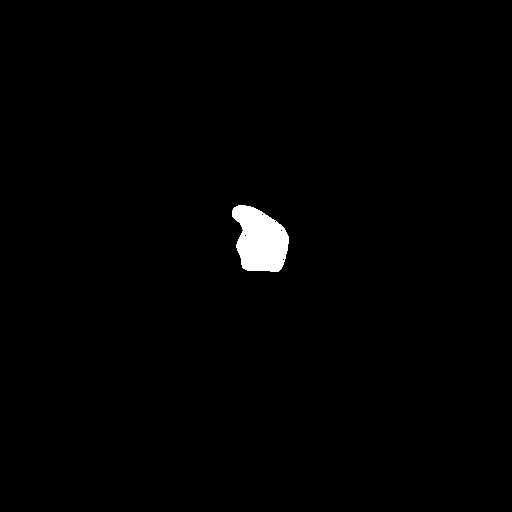

/content/mask_resized/_mask_1689234426_sample-slice043.jpg


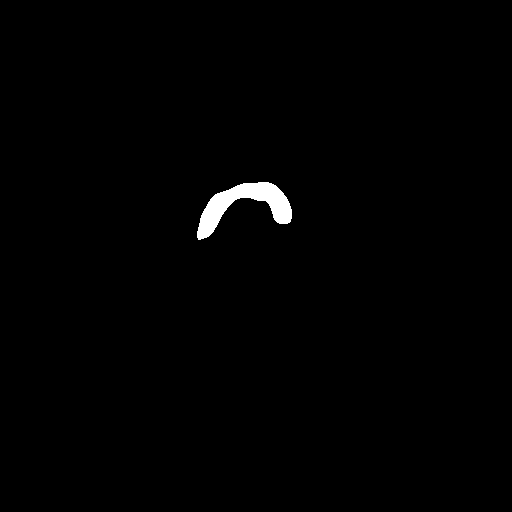

/content/mask_resized/_mask_sample-slice068.jpg


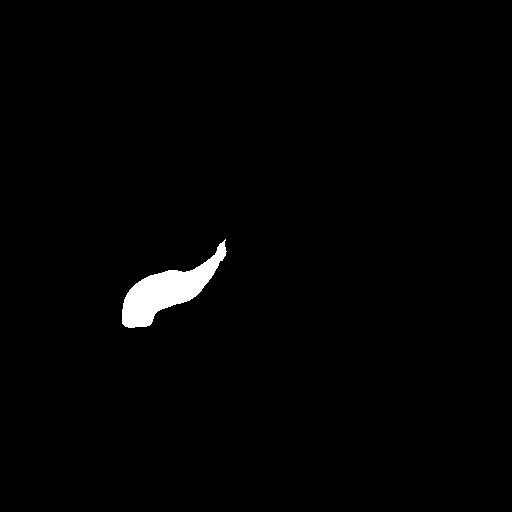

/content/mask_resized/_mask_1689234011_sample-slice042.jpg


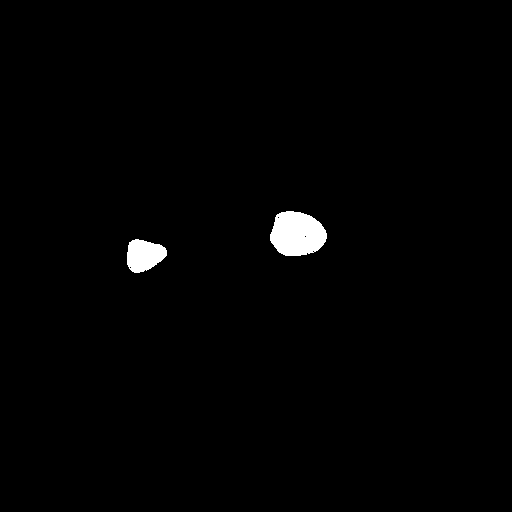

/content/mask_resized/_mask_sample-slice053.jpg


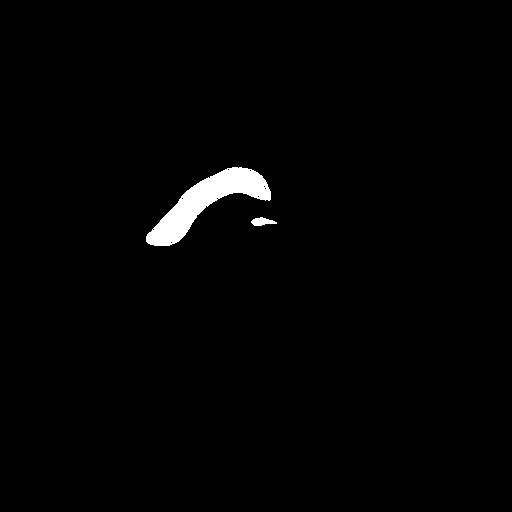

/content/mask_resized/_mask_1689234426_sample-slice035.jpg


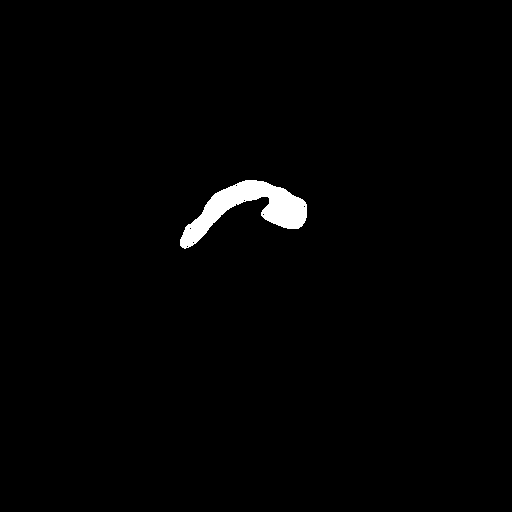

/content/mask_resized/_mask_1689233971_sample-slice102.jpg


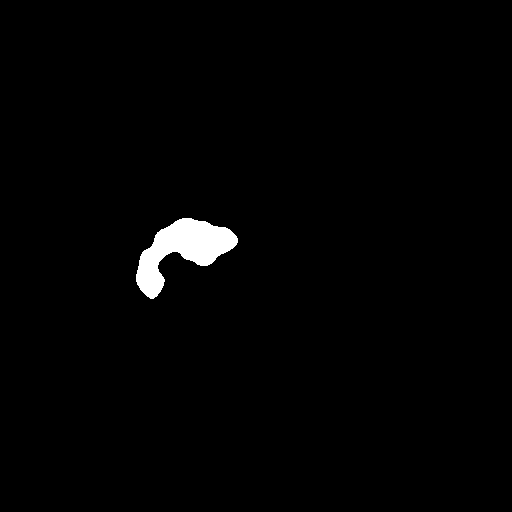

/content/mask_resized/_mask_sample-slice064.jpg


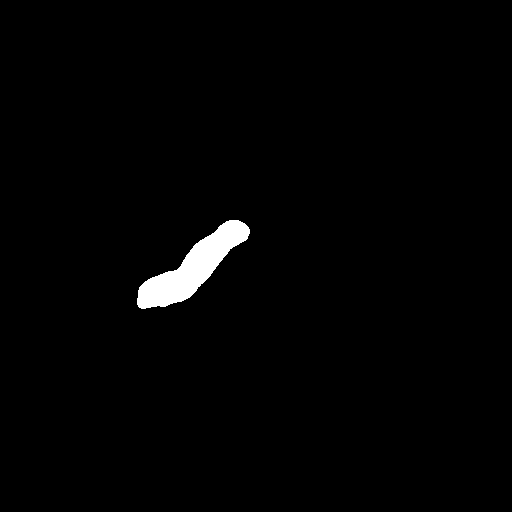

/content/mask_resized/_mask_1689234363_sample-slice039.jpg


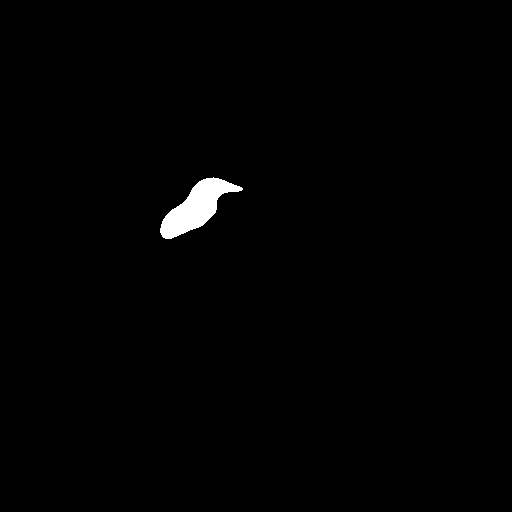

/content/mask_resized/_mask_1689234363_sample-slice029.jpg


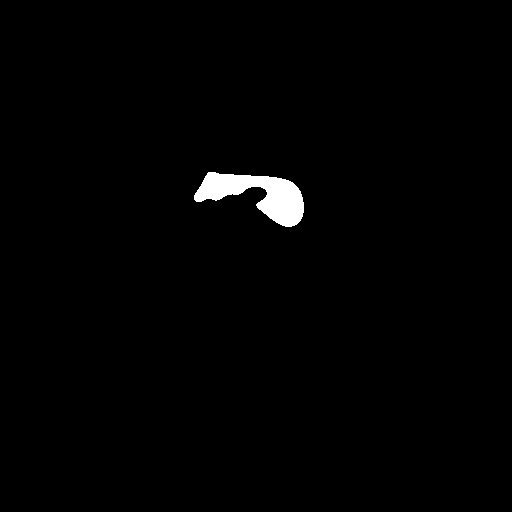

/content/mask_resized/_mask_1689234521_sample-slice011.jpg


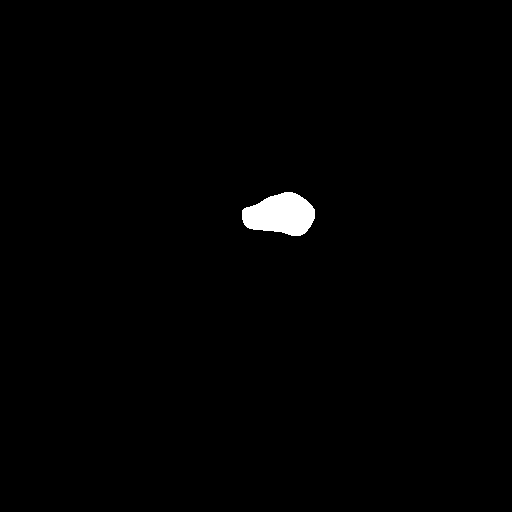

/content/mask_resized/_mask_1689233971_sample-slice054.jpg


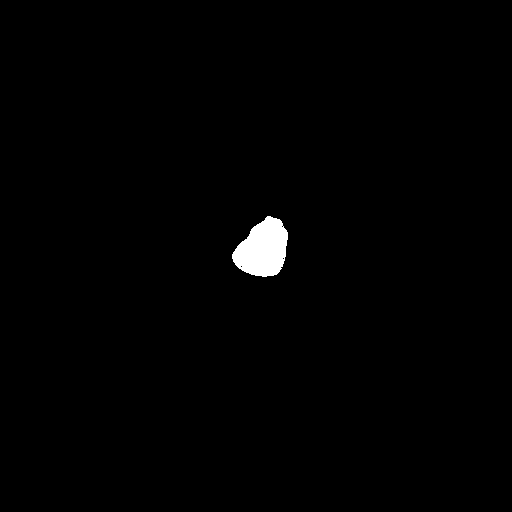

/content/mask_resized/_mask_1689234305_sample-slice056.jpg


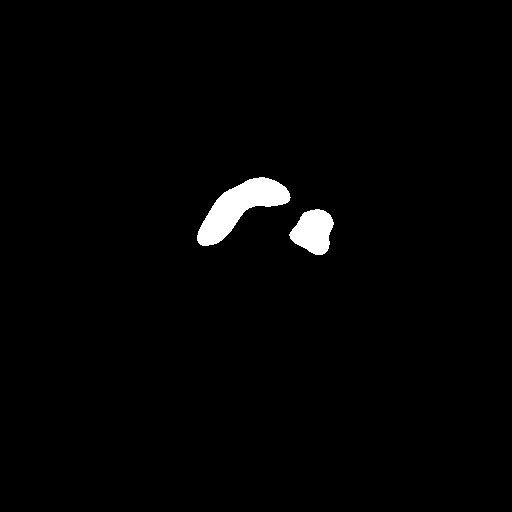

/content/mask_resized/_mask_1689233971_sample-slice103.jpg


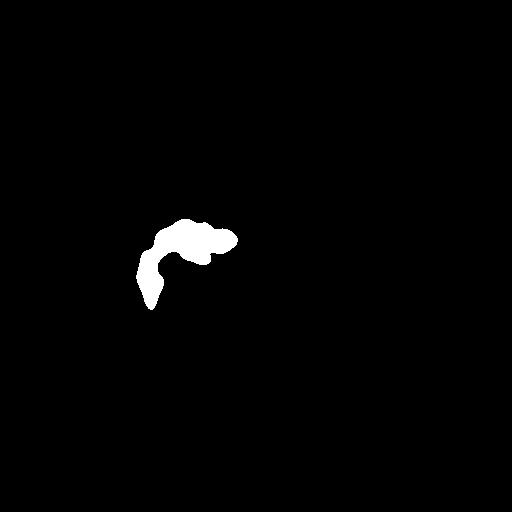

/content/mask_resized/_mask_1689234363_sample-slice040.jpg


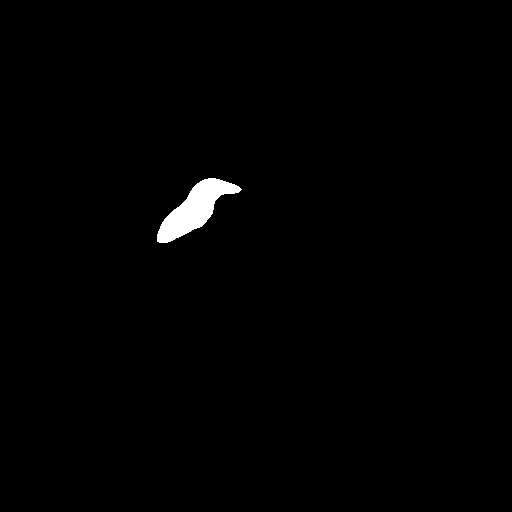

/content/mask_resized/_mask_1689234391_sample-slice055.jpg


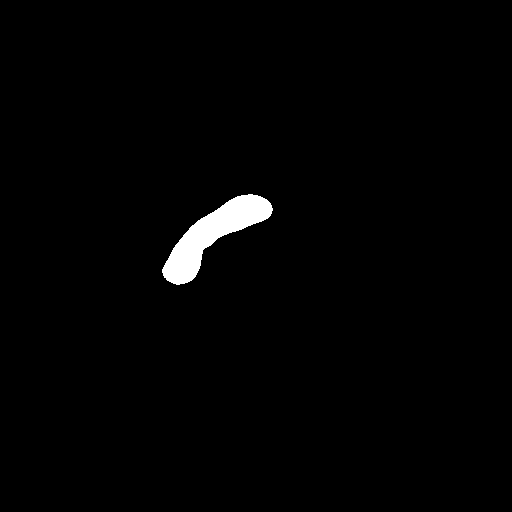

/content/mask_resized/_mask_1689233808_sample-slice041.jpg


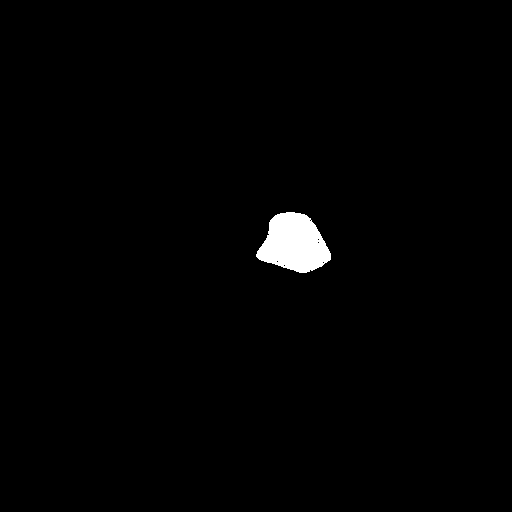

/content/mask_resized/_mask_1689234039_sample-slice035.jpg


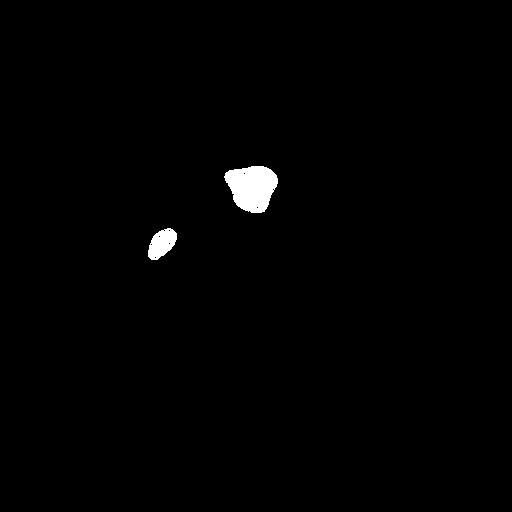

/content/mask_resized/_mask_1689234469_sample-slice046.jpg


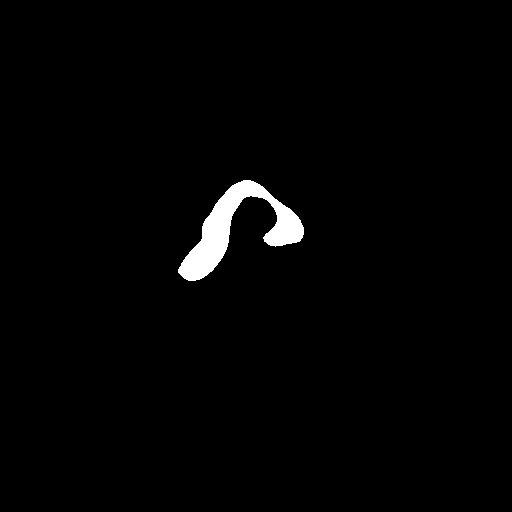

In [ ]:
directory = '/content/data/output_label_directory'
output = '/content/preprocess_output/processed_img'
mask = "/content/mask_resized"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(mask , '_mask_'+filename))
        img = cv2.imread(os.path.join(directory, filename), 0)
        ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(mask ,filename), bw_img)
        cv2_imshow(bw_img)
    else:
        continue




Read masks the same way.

In [ ]:
mask_names = glob.glob("/content/mask_resized/*.jpg")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_test, y_train = train_test_split(image_dataset, mask_dataset,test_size=1/3, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


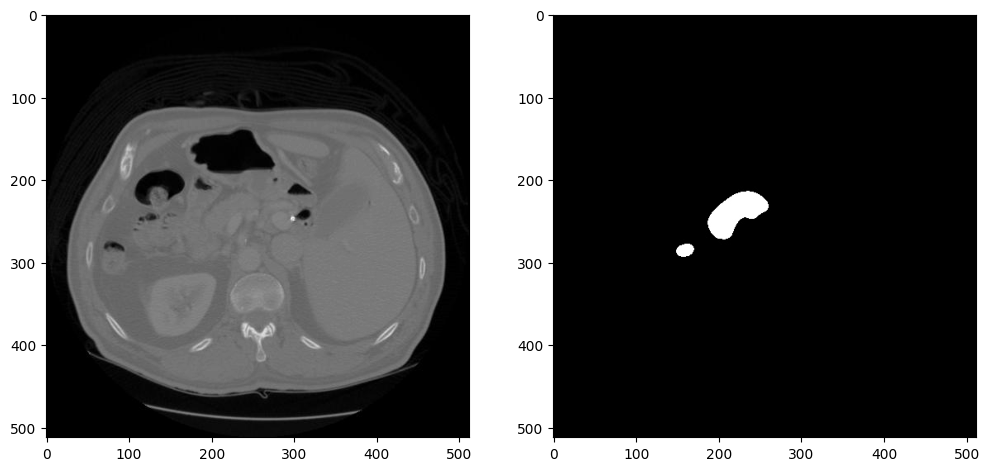

In [ ]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 2,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)


Epoch 1/25
128/128 [==============================] - 115s 576ms/step - loss: 0.1182 - accuracy: 0.9744 - val_loss: 1.5368 - val_accuracy: 0.2673
Epoch 2/25
128/128 [==============================] - 76s 594ms/step - loss: 0.0605 - accuracy: 0.9849 - val_loss: 0.7645 - val_accuracy: 0.4008
Epoch 3/25
128/128 [==============================] - 76s 593ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 1.4204 - val_accuracy: 0.4795
Epoch 4/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0439 - accuracy: 0.9852 - val_loss: 0.0951 - val_accuracy: 0.9855
Epoch 5/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0425 - accuracy: 0.9854 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 6/25
128/128 [==============================] - 76s 593ms/step - loss: 0.0367 - accuracy: 0.9857 - val_loss: 0.0824 - val_accuracy: 0.9855
Epoch 7/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0337 - accuracy: 0.9860 - val_loss: 0.0919 - val_a

In [ ]:
!zip /content/data

In [ ]:
import shutil

def zip_directory(directory_path, output_path):
    shutil.make_archive(output_path, 'zip', directory_path)

# Example usage
directory_path = '/content/data'  # Replace with the path to the directory you want to zip
output_path = '/content/drive/MyDrive/Datasets/Pancreatic tumor /pc_data'  # Replace with the desired output path for the zip file

zip_directory(directory_path, output_path)


In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/PC_u-net_25epochs.hdf5')

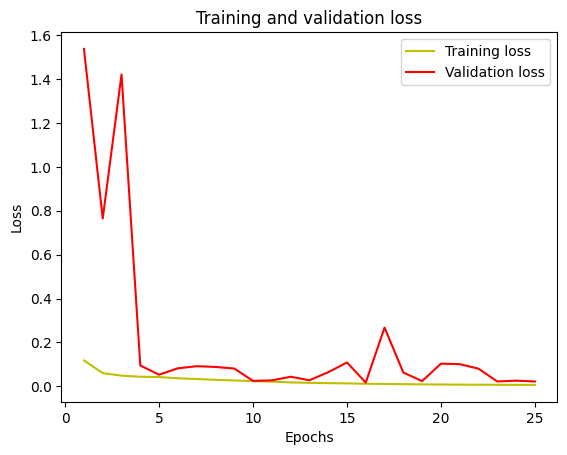

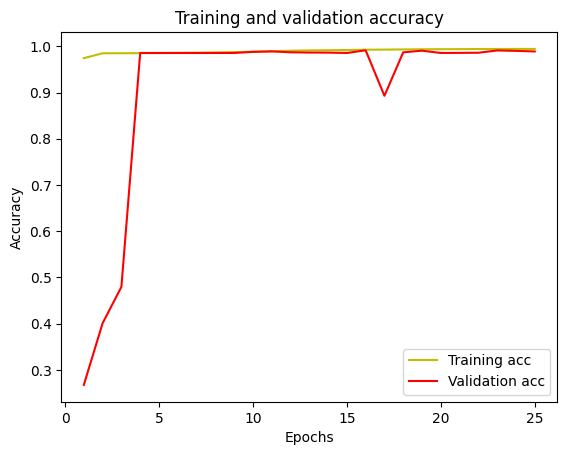

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/lc_u-net_25epochs.hdf5", compile=False)


In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

3/3 [==============================] - 68s 1s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.74590117


(1, 512, 512, 1)
1/1 [==============================] - 0s 25ms/step
(512, 512)


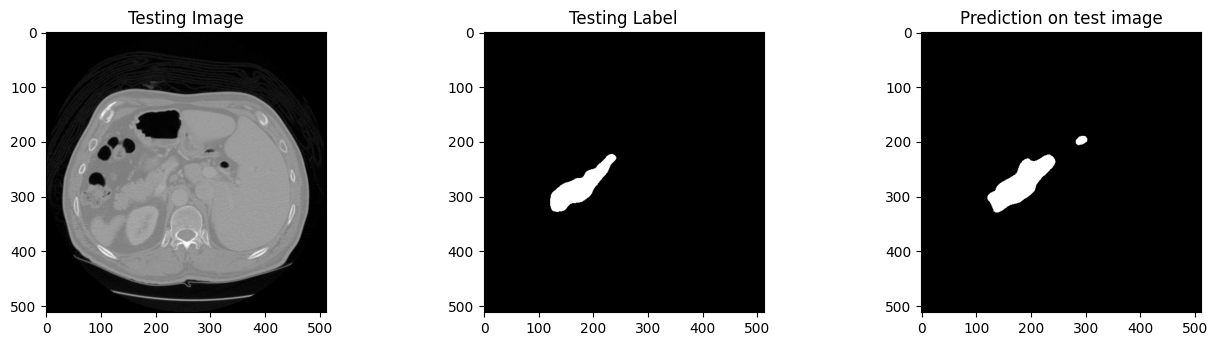

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()

In [ ]:
!wget https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar

--2023-07-13 07:02:04--  https://msd-for-monai.s3-us-west-2.amazonaws.com/Task07_Pancreas.tar
Resolving msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)... 52.92.243.66, 3.5.76.120, 52.92.178.82, ...
Connecting to msd-for-monai.s3-us-west-2.amazonaws.com (msd-for-monai.s3-us-west-2.amazonaws.com)|52.92.243.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12289971712 (11G) [application/x-tar]
Saving to: ‘Task07_Pancreas.tar’

Task07_Pancreas.tar 100%[===================>]  11.45G  13.6MB/s    in 11m 40s 

2023-07-13 07:13:45 (16.7 MB/s) - ‘Task07_Pancreas.tar’ saved [12289971712/12289971712]



In [ ]:
import tarfile
from tqdm.auto import tqdm
tar = tarfile.open('/content/Task07_Pancreas.tar')
tqdm(tar.extractall())
tar.close()

0it [00:00, ?it/s]

In [ ]:
!pip install -q med2image
import med2image

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 634.6/634.6 kB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!med2image -i '/content/Task07_Pancreas/imagesTr/pancreas_040.nii.gz'\
          -d Data/images                  \
          -o sample.jpg -s -1

sliceToConvert: -1
2023-07-13 07:48:34  │    7eec9713f5da │                  med2image.py:med2image.run() │ About to perform NifTI to jpg conversion...

2023-07-13 07:48:34  │    7eec9713f5da │                  med2image.py:med2image.run() │ 3D volume detected.

2023-07-13 07:48:34  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ Saving along "z" dimension with 90 degree rotation...
2023-07-13 07:48:36  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ 45 images saved along "z" dimension.


In [ ]:
!med2image -i '/content/Task07_Pancreas/labelsTr/pancreas_040.nii.gz'\
          -d Data/masks                  \
          -o sample.jpg -s -1

sliceToConvert: -1
2023-07-13 07:48:26  │    7eec9713f5da │                  med2image.py:med2image.run() │ About to perform NifTI to jpg conversion...

2023-07-13 07:48:26  │    7eec9713f5da │                  med2image.py:med2image.run() │ 3D volume detected.

2023-07-13 07:48:26  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ Saving along "z" dimension with 90 degree rotation...
2023-07-13 07:48:28  │    7eec9713f5da │             med2image.py:med2image.dim_save() │ 45 images saved along "z" dimension.


In [ ]:
import os
import shutil
import numpy as np
import imageio.v2 as imageio
from tqdm.auto import tqdm
import time

def move_images_with_nonzero_labels(image_directory, label_directory, output_image_directory, output_label_directory):
    # Create the output directories if they don't exist
    os.makedirs(output_image_directory, exist_ok=True)
    os.makedirs(output_label_directory, exist_ok=True)
    count = 0
    # Recursively iterate through all files and subdirectories in the label directory with tqdm.auto progress bar
    for root, dirs, files in tqdm(os.walk(label_directory), desc="Moving Files"):
        for file in files:
            label_path = os.path.join(root, file)
            image_path = os.path.join(image_directory, os.path.relpath(label_path, label_directory))

            # Load the label image
            label_array = imageio.imread(label_path)

            # Calculate the percentage of non-zero values in the label array
            non_zero_percentage = np.count_nonzero(label_array) / label_array.size

            # Check if the non-zero percentage exceeds 1%
            if non_zero_percentage > 0.01:
                # Generate a unique base name for the files using the current timestamp
                base_name = str(int(time.time()))

                # Generate new filenames by appending the base name to the original filenames
                new_image_filename = f"{base_name}_{file}"
                new_label_filename = f"{base_name}_{file}"

                # Move the corresponding image and label files with the new filenames
                shutil.move(image_path, os.path.join(output_image_directory, new_image_filename))
                shutil.move(label_path, os.path.join(output_label_directory, new_label_filename))
                count = count + 1
    print(count)

In [ ]:
image_directory = "/content/Data/images"
label_directory = "/content/Data/masks"
output_image_directory = "/content/data/output_image_directory"
output_label_directory = "/content/data/output_label_directory"

move_images_with_nonzero_labels(image_directory, label_directory, output_image_directory, output_label_directory)

Moving Files: 0it [00:00, ?it/s]

11


## Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-fuzzy
!pip install MedPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=4b0d4afe545c6ff8c4cad7d0fd84e4f6baa4e25a2de9fe6e501c1a043313d038
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.0 MB/s eta 0:00:00
  Created wheel for MedPy: filename=MedPy-0.4.0-py3-none-any.whl size=214946 sha256=30680bdcacd51ffc90926d841a6b950c3f04a8908cb62eb844b865eda0917b7e
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built MedPy


In [ ]:
!mkdir "/content/Resized"
directory = '/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/TRAIN/Normal'
output = '/content/Resized'

In [ ]:
import cv2
import nibabel as nib
from time import time
import skfuzzy as fuzz
import os
from google.colab.patches import cv2_imshow
from medpy.filter.smoothing import anisotropic_diffusion
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(os.path.join(directory, filename), 0)
        resize = cv2.resize(img, (256, 256))
        cv2.imwrite(os.path.join(output , 'resized_'+filename), resize)
        print(filename)
    else:
        continue

In [ ]:
!mkdir "/content/preprocess_output"
!mkdir "/content/preprocess_output/processed_img"
#!mkdir "/content/preprocess_output/mask"

In [ ]:
directory = '/content/data/output_image_directory'
output = '/content/preprocess_output/processed_img'
#mask = '/content/preprocess_output/mask'

for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(mask , '_mask_'+filename))
        img = cv2.imread(os.path.join(directory, filename), 0)
        equ = cv2.equalizeHist(img)
        clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
        cl_img = clahe.apply(img)
        cl_img = anisotropic_diffusion(cl_img)
        cl_img = cl_img.astype(np.uint8)
        ret, thresh1 = cv2.threshold(cl_img, 190, 150, cv2.THRESH_BINARY)
        ret, thresh2 = cv2.threshold(cl_img, 190, 255, cv2.THRESH_BINARY_INV)
        ret, thresh3 = cv2.threshold(cl_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresh3 = cv2.resize(thresh3, (256, 256))
        cv2.imwrite(os.path.join(output , '_pre_'+filename), cl_img)
        #cv2.imwrite(os.path.join(mask , '_mask_'+filename), thresh3)
        # cv2.imwrite(os.path.join(output)+'_pre_'+filename,thresh3)
    else:
        continue

/content/mask_resized/_mask_1689234391_sample-slice036.jpg
/content/mask_resized/_mask_1689233927_sample-slice039.jpg
/content/mask_resized/_mask_1689234391_sample-slice058.jpg
/content/mask_resized/_mask_1689234305_sample-slice042.jpg
/content/mask_resized/_mask_1689234335_sample-slice046.jpg
/content/mask_resized/_mask_1689234335_sample-slice050.jpg
/content/mask_resized/_mask_1689234363_sample-slice025.jpg
/content/mask_resized/_mask_1689234011_sample-slice047.jpg
/content/mask_resized/_mask_1689234391_sample-slice056.jpg
/content/mask_resized/_mask_1689234494_sample-slice024.jpg
/content/mask_resized/_mask_1689234335_sample-slice036.jpg
/content/mask_resized/_mask_1689234392_sample-slice035.jpg
/content/mask_resized/_mask_1689233880_sample-slice061.jpg
/content/mask_resized/_mask_1689234469_sample-slice049.jpg
/content/mask_resized/_mask_1689234335_sample-slice042.jpg
/content/mask_resized/_mask_1689234391_sample-slice044.jpg


/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:155: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  deltas[i][slicer] = numpy.diff(out, axis=i)
/usr/local/lib/python3.10/dist-packages/medpy/filter/smoothing.py:164: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  matrices[i][slicer] = numpy.diff(matrices[i], axis=i)


/content/mask_resized/_mask_1689234335_sample-slice029.jpg
/content/mask_resized/_mask_1689234521_sample-slice013.jpg
/content/mask_resized/_mask_sample-slice063.jpg
/content/mask_resized/_mask_1689233880_sample-slice036.jpg
/content/mask_resized/_mask_1689234074_sample-slice046.jpg
/content/mask_resized/_mask_1689234391_sample-slice028.jpg
/content/mask_resized/_mask_1689233880_sample-slice062.jpg
/content/mask_resized/_mask_1689234335_sample-slice033.jpg
/content/mask_resized/_mask_1689234363_sample-slice032.jpg
/content/mask_resized/_mask_1689234039_sample-slice038.jpg
/content/mask_resized/_mask_1689234391_sample-slice033.jpg
/content/mask_resized/_mask_1689233971_sample-slice044.jpg
/content/mask_resized/_mask_1689234276_sample-slice047.jpg
/content/mask_resized/_mask_1689234334_sample-slice044.jpg
/content/mask_resized/_mask_1689234335_sample-slice034.jpg
/content/mask_resized/_mask_1689234391_sample-slice053.jpg
/content/mask_resized/_mask_sample-slice054.jpg
/content/mask_resiz

# semantic segmentation using U-Net


In [ ]:
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
import glob

In [ ]:
image_directory = '/content/data/output_image_directory'
mask_directory = '/content/data/output_label_directory'

In [ ]:
SIZE = 512
num_images = 1000

Load images and masks in order so they match

In [ ]:
image_names = glob.glob("/content/preprocess_output/processed_img/*.jpg")
print(image_names)

['/content/preprocess_output/processed_img/_pre_sample-slice054.jpg', '/content/preprocess_output/processed_img/_pre_1689233927_sample-slice052.jpg', '/content/preprocess_output/processed_img/_pre_sample-slice060.jpg', '/content/preprocess_output/processed_img/_pre_1689234305_sample-slice053.jpg', '/content/preprocess_output/processed_img/_pre_1689234011_sample-slice045.jpg', '/content/preprocess_output/processed_img/_pre_1689234521_sample-slice013.jpg', '/content/preprocess_output/processed_img/_pre_1689233971_sample-slice085.jpg', '/content/preprocess_output/processed_img/_pre_1689234113_sample-slice040.jpg', '/content/preprocess_output/processed_img/_pre_1689234113_sample-slice055.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice069.jpg', '/content/preprocess_output/processed_img/_pre_1689234391_sample-slice043.jpg', '/content/preprocess_output/processed_img/_pre_1689234074_sample-slice047.jpg', '/content/preprocess_output/processed_img/_pre_1689233971_sam

In [ ]:
image_names.sort()
print(image_names)

['/content/preprocess_output/processed_img/_pre_1689233808_sample-slice039.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice040.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice041.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice042.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice043.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice044.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice045.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice046.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice047.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice048.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice049.jpg', '/content/preprocess_output/processed_img/_pre_1689233808_sample-slice050.jpg', '/content/preprocess_output/processed_i

In [ ]:
image_names_subset = image_names[0:num_images]

In [ ]:
images = [cv2.imread(img, 0) for img in image_names_subset]

In [ ]:
image_dataset = np.array(images)
print(image_dataset)
image_dataset = np.expand_dims(image_dataset, axis = 3)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
!mkdir "/content/mask_resized"

In [ ]:
from google.colab.patches import cv2_imshow


/content/mask_resized/_mask_1689234391_sample-slice036.jpg


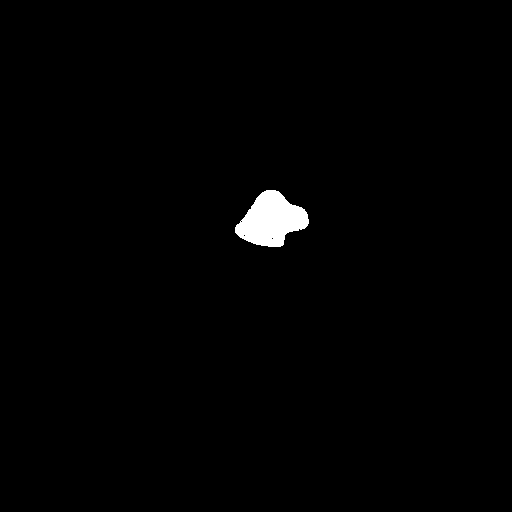

/content/mask_resized/_mask_1689233927_sample-slice039.jpg


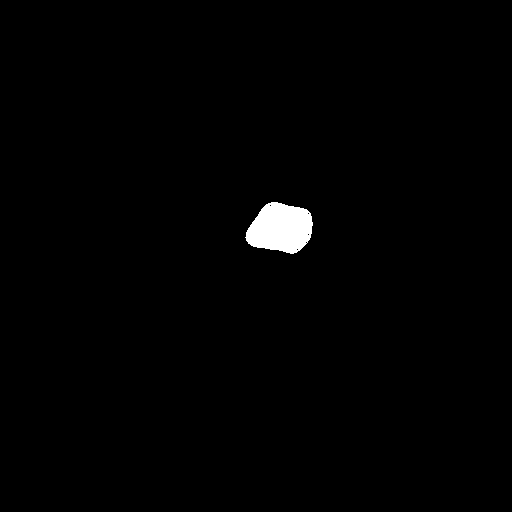

/content/mask_resized/_mask_1689234391_sample-slice058.jpg


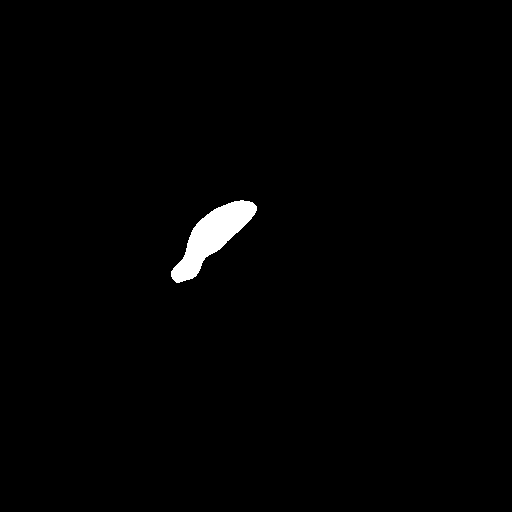

/content/mask_resized/_mask_1689234305_sample-slice042.jpg


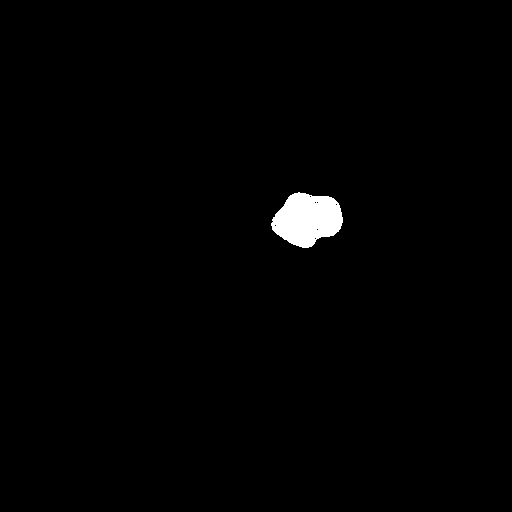

/content/mask_resized/_mask_1689234335_sample-slice046.jpg


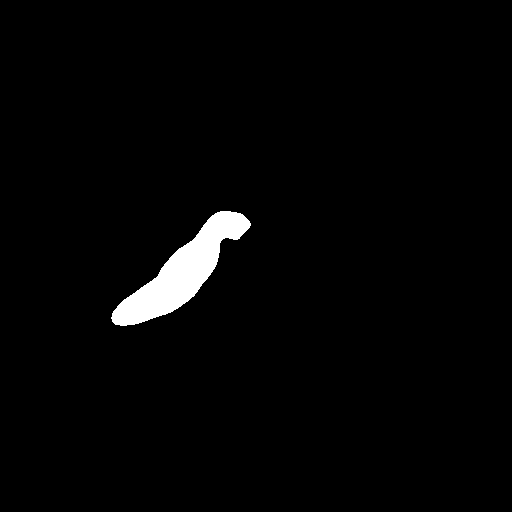

/content/mask_resized/_mask_1689234335_sample-slice050.jpg


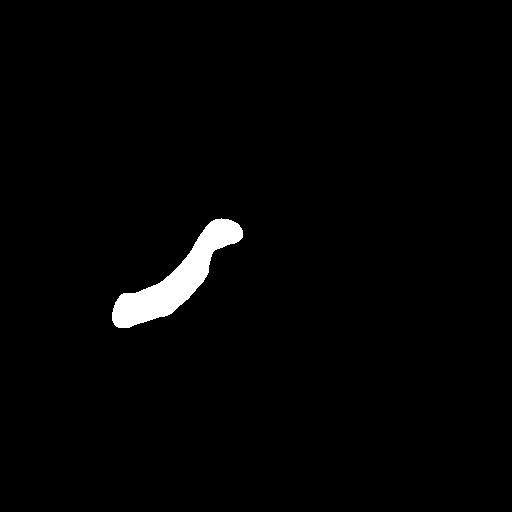

/content/mask_resized/_mask_1689234363_sample-slice025.jpg


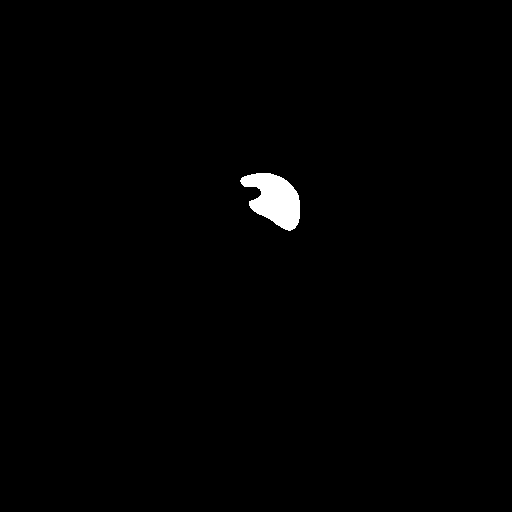

/content/mask_resized/_mask_1689234011_sample-slice047.jpg


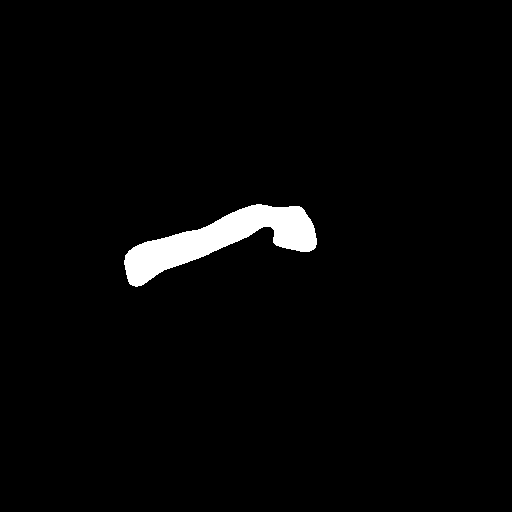

/content/mask_resized/_mask_1689234391_sample-slice056.jpg


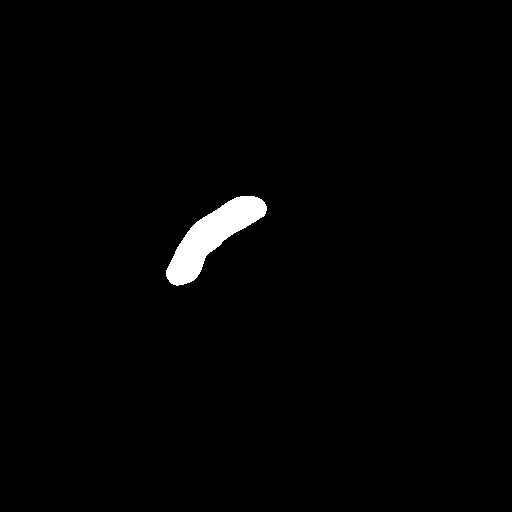

/content/mask_resized/_mask_1689234494_sample-slice024.jpg


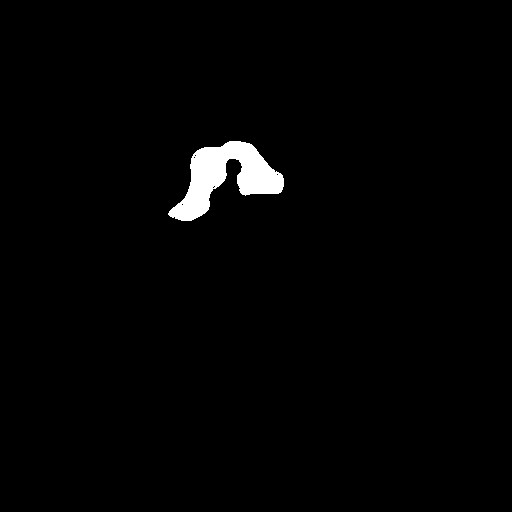

/content/mask_resized/_mask_1689234335_sample-slice036.jpg


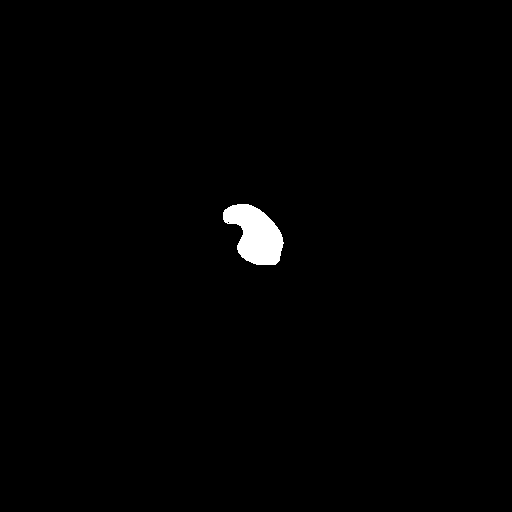

/content/mask_resized/_mask_1689234392_sample-slice035.jpg


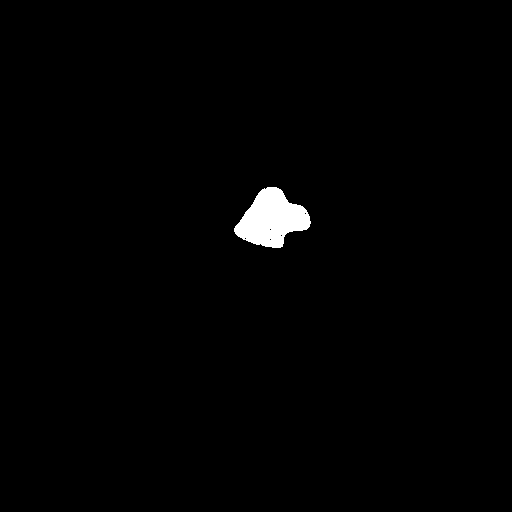

/content/mask_resized/_mask_1689233880_sample-slice061.jpg


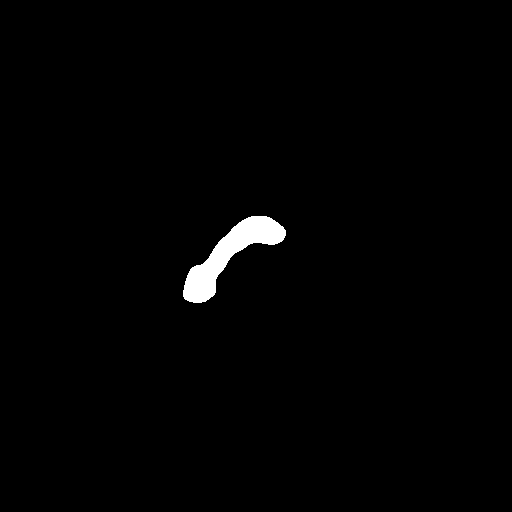

/content/mask_resized/_mask_1689234469_sample-slice049.jpg


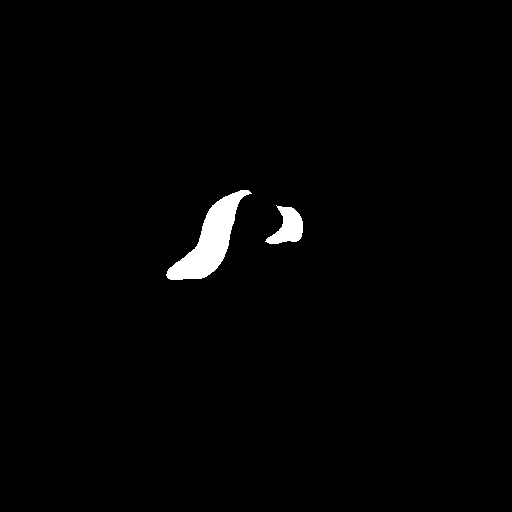

/content/mask_resized/_mask_1689234335_sample-slice042.jpg


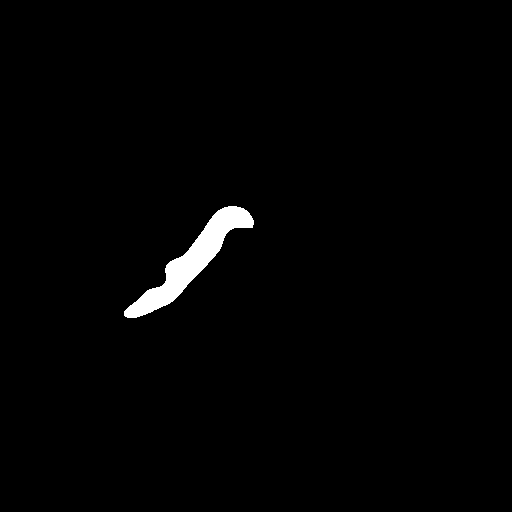

/content/mask_resized/_mask_1689234391_sample-slice044.jpg


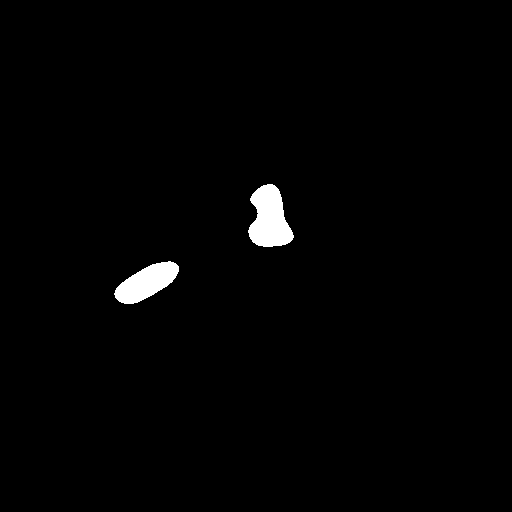

/content/mask_resized/_mask_1689234335_sample-slice029.jpg


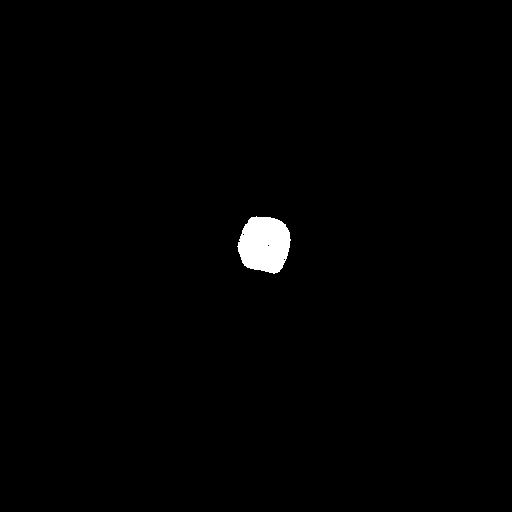

/content/mask_resized/_mask_1689234521_sample-slice013.jpg


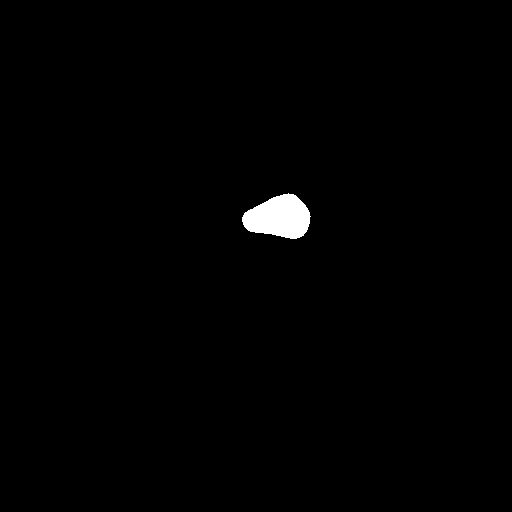

/content/mask_resized/_mask_sample-slice063.jpg


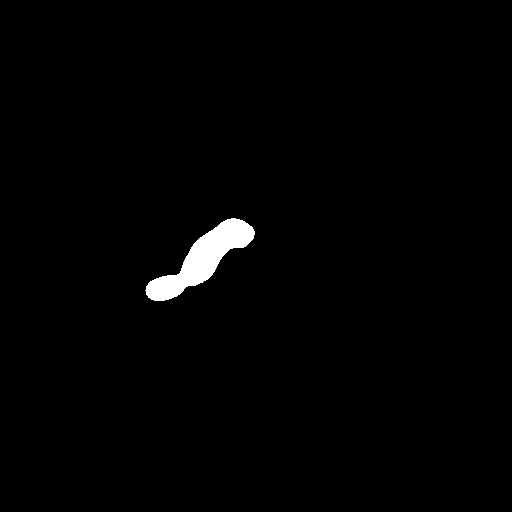

/content/mask_resized/_mask_1689233880_sample-slice036.jpg


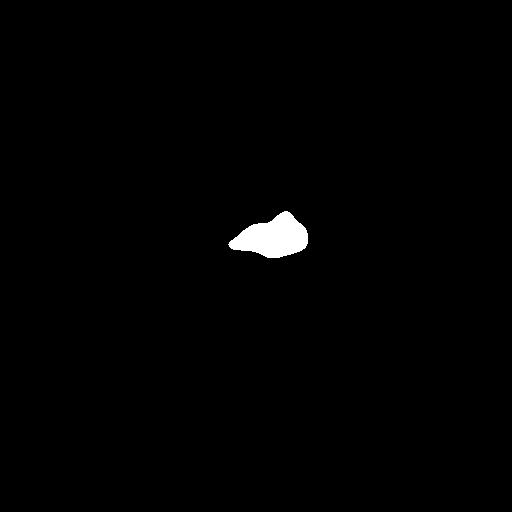

/content/mask_resized/_mask_1689234074_sample-slice046.jpg


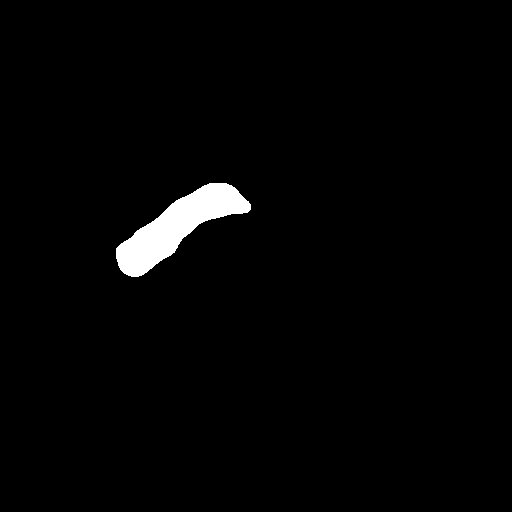

/content/mask_resized/_mask_1689234391_sample-slice028.jpg


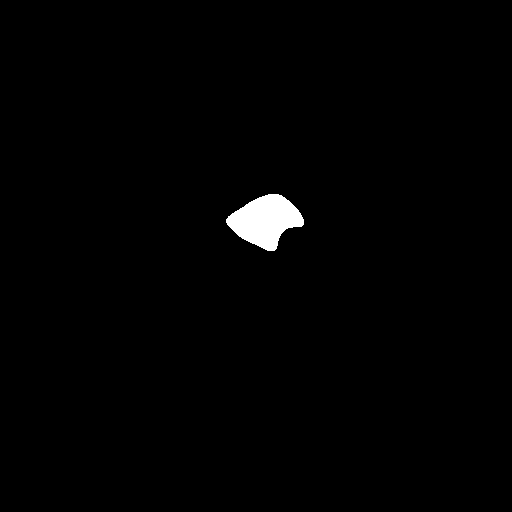

/content/mask_resized/_mask_1689233880_sample-slice062.jpg


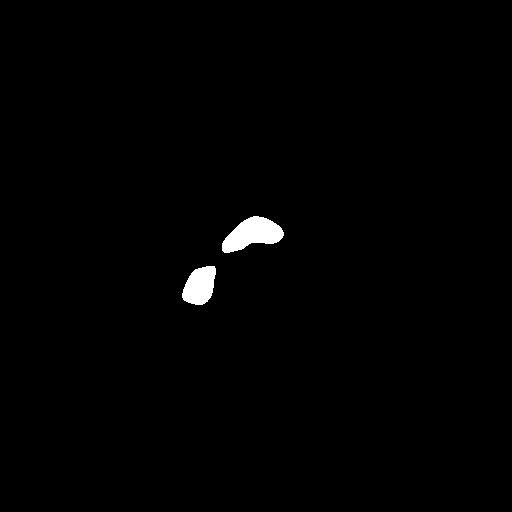

/content/mask_resized/_mask_1689234335_sample-slice033.jpg


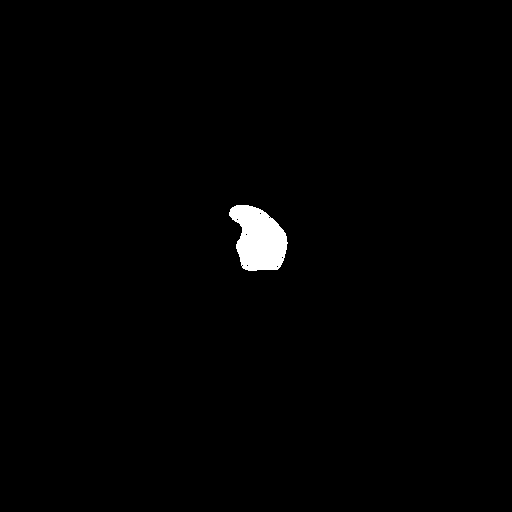

/content/mask_resized/_mask_1689234363_sample-slice032.jpg


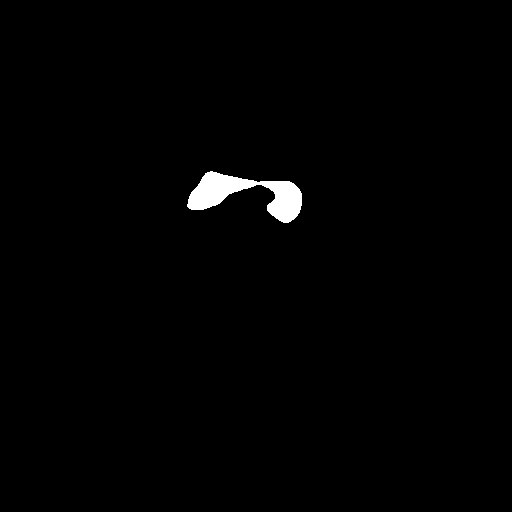

/content/mask_resized/_mask_1689234039_sample-slice038.jpg


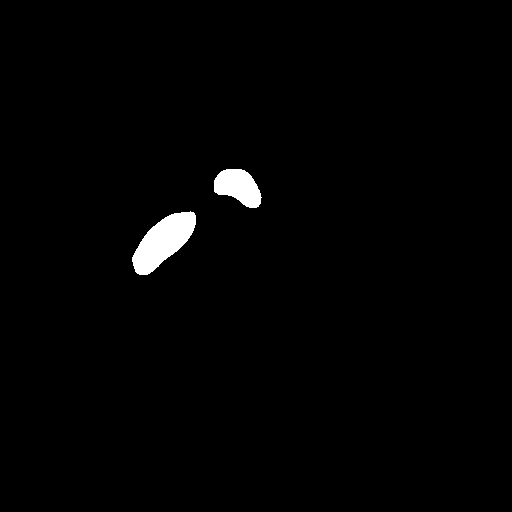

/content/mask_resized/_mask_1689234391_sample-slice033.jpg


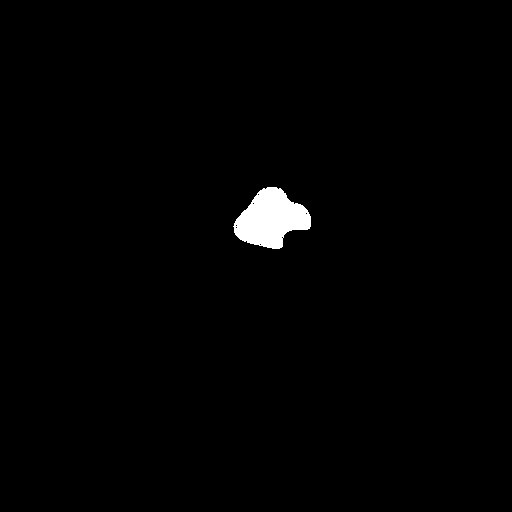

/content/mask_resized/_mask_1689233971_sample-slice044.jpg


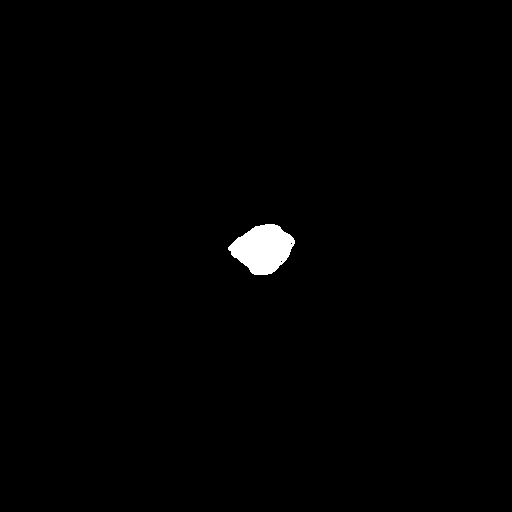

/content/mask_resized/_mask_1689234276_sample-slice047.jpg


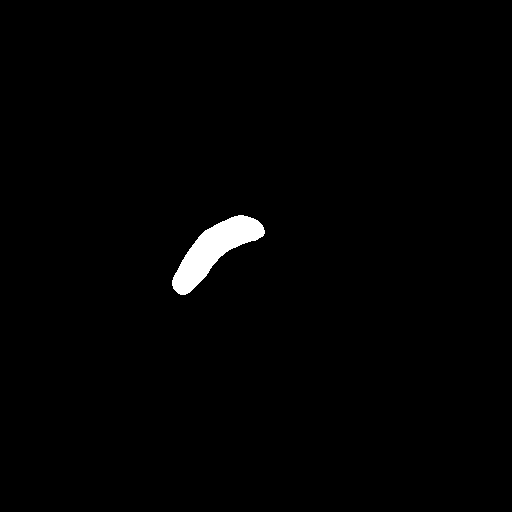

/content/mask_resized/_mask_1689234334_sample-slice044.jpg


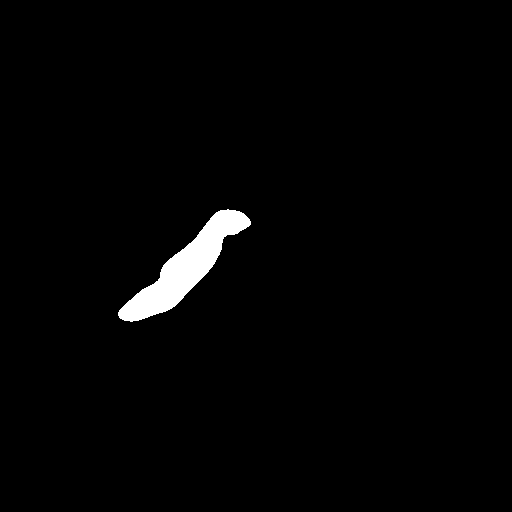

/content/mask_resized/_mask_1689234335_sample-slice034.jpg


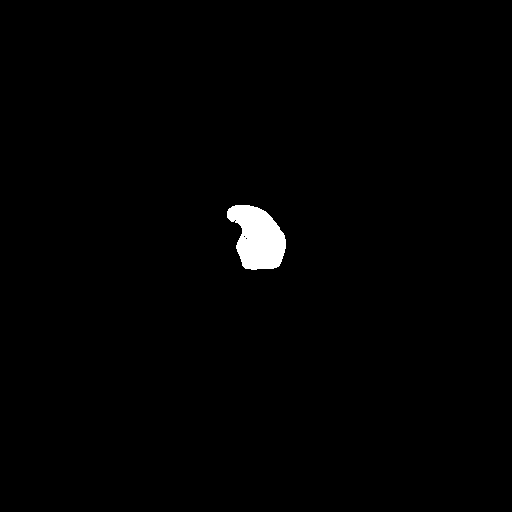

/content/mask_resized/_mask_1689234391_sample-slice053.jpg


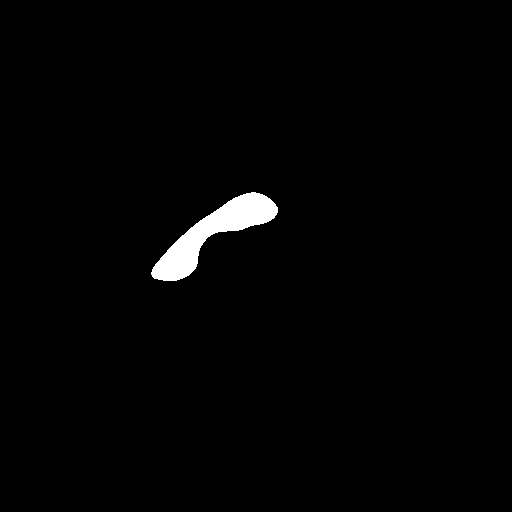

/content/mask_resized/_mask_sample-slice054.jpg


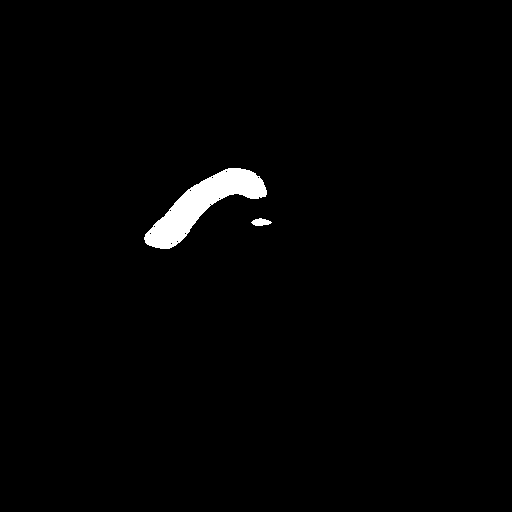

/content/mask_resized/_mask_sample-slice062.jpg


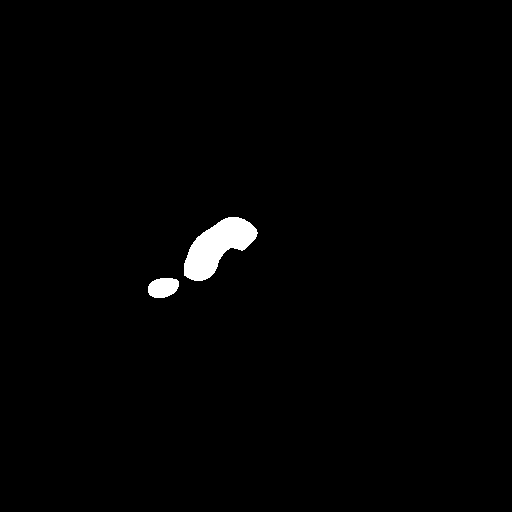

/content/mask_resized/_mask_sample-slice048.jpg


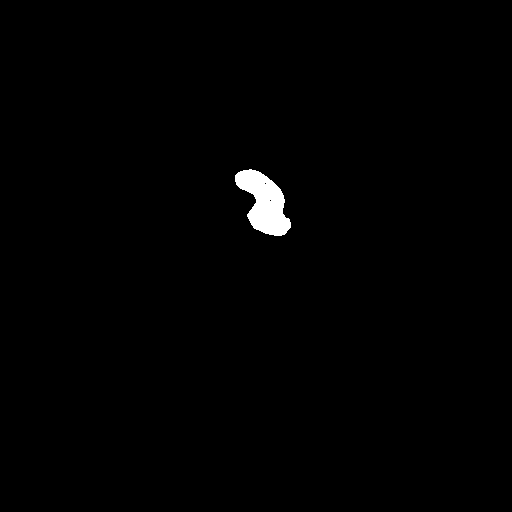

/content/mask_resized/_mask_1689234363_sample-slice022.jpg


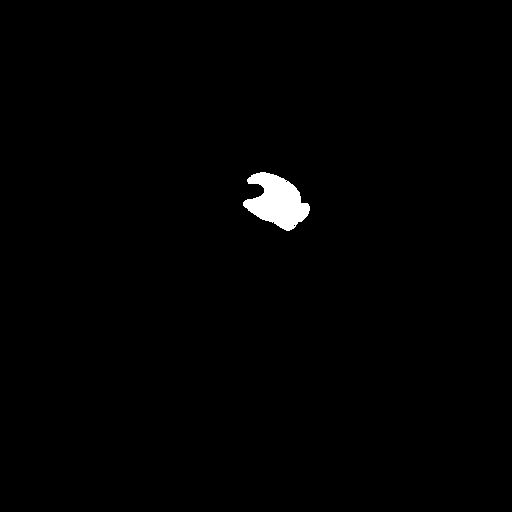

/content/mask_resized/_mask_1689234305_sample-slice044.jpg


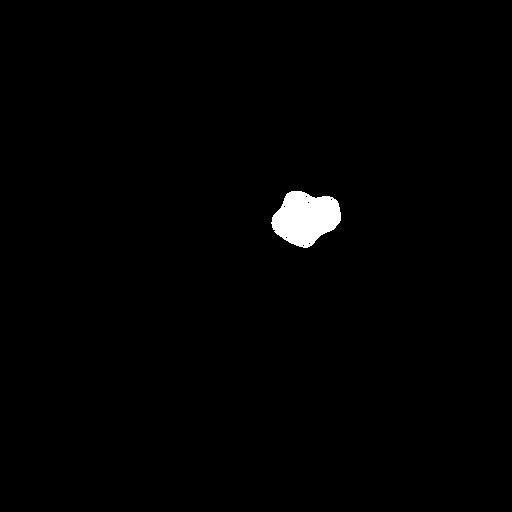

/content/mask_resized/_mask_1689234114_sample-slice039.jpg


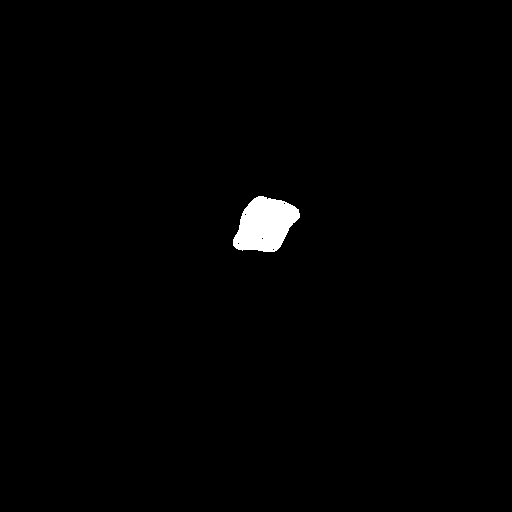

/content/mask_resized/_mask_1689233971_sample-slice098.jpg


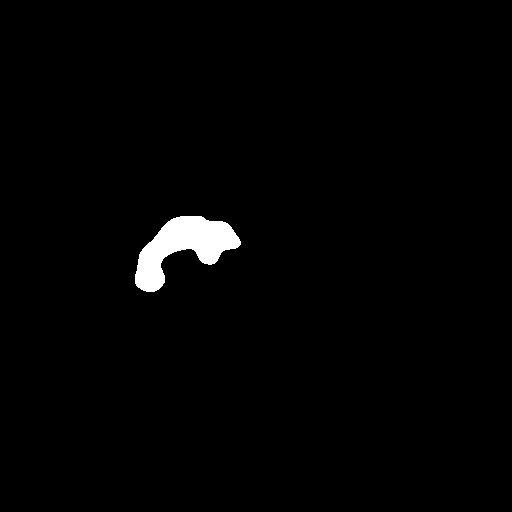

/content/mask_resized/_mask_1689234494_sample-slice026.jpg


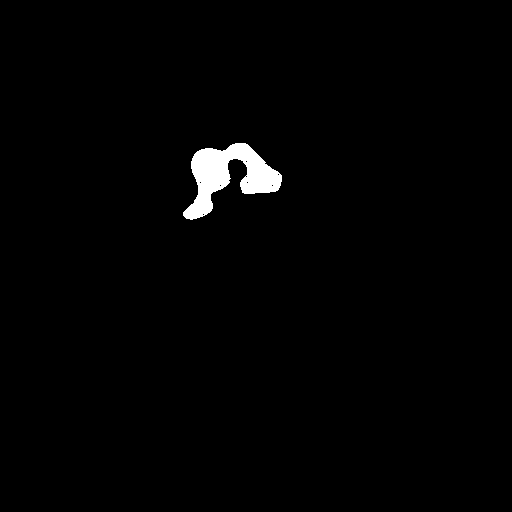

/content/mask_resized/_mask_1689234113_sample-slice055.jpg


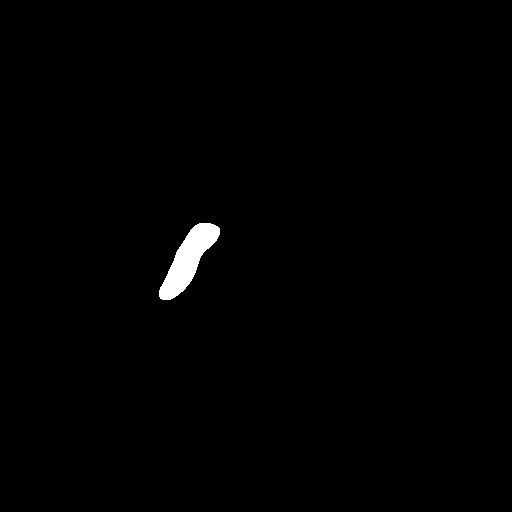

/content/mask_resized/_mask_1689233927_sample-slice047.jpg


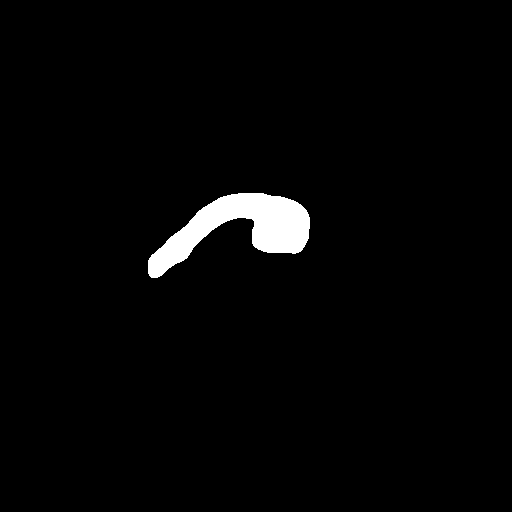

/content/mask_resized/_mask_sample-slice044.jpg


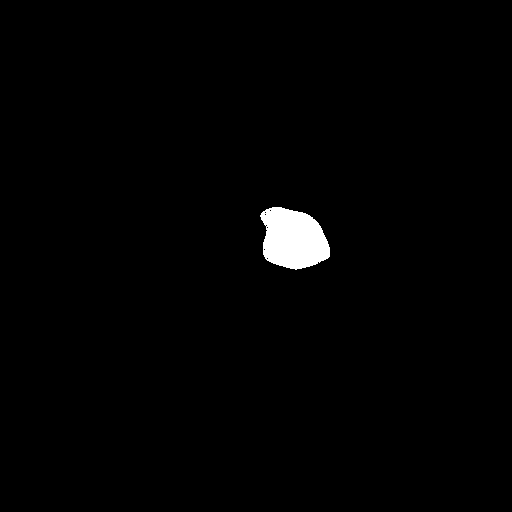

/content/mask_resized/_mask_1689234494_sample-slice014.jpg


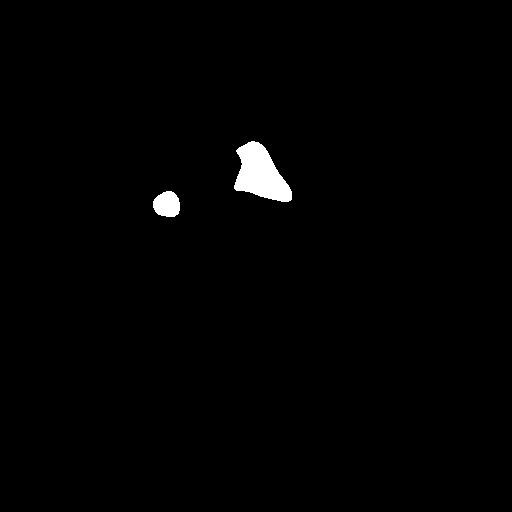

/content/mask_resized/_mask_1689234305_sample-slice046.jpg


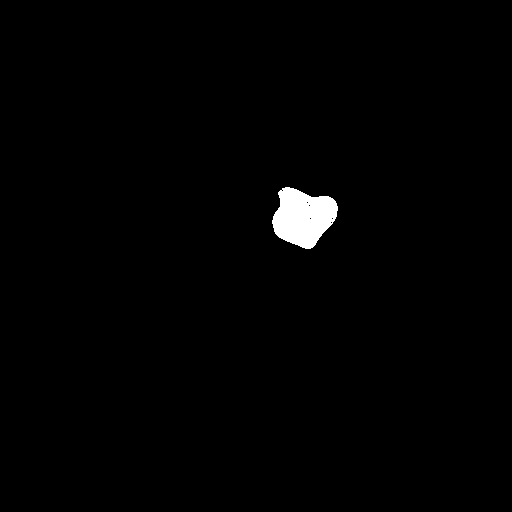

/content/mask_resized/_mask_1689233880_sample-slice037.jpg


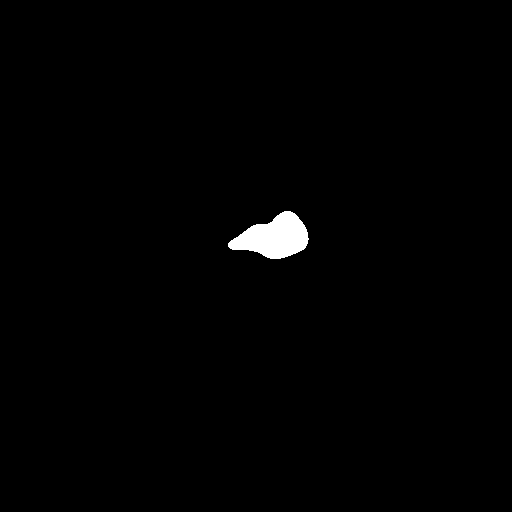

/content/mask_resized/_mask_1689234011_sample-slice044.jpg


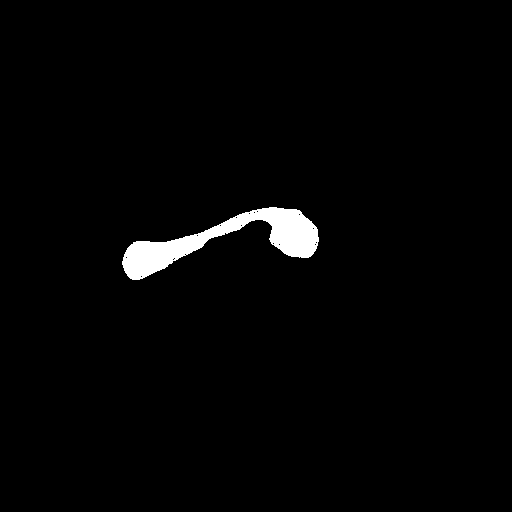

/content/mask_resized/_mask_1689234305_sample-slice052.jpg


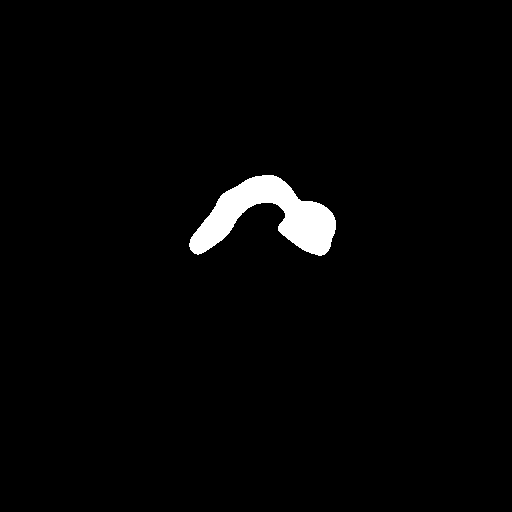

/content/mask_resized/_mask_1689234391_sample-slice038.jpg


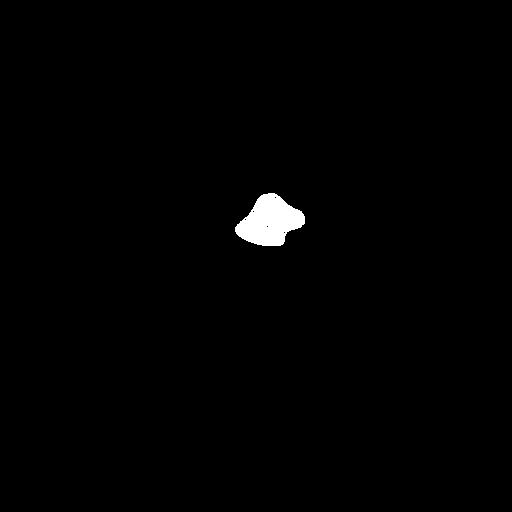

/content/mask_resized/_mask_1689234244_sample-slice052.jpg


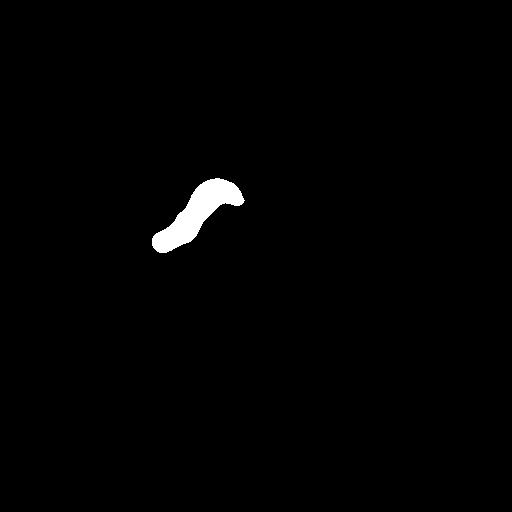

/content/mask_resized/_mask_1689233971_sample-slice100.jpg


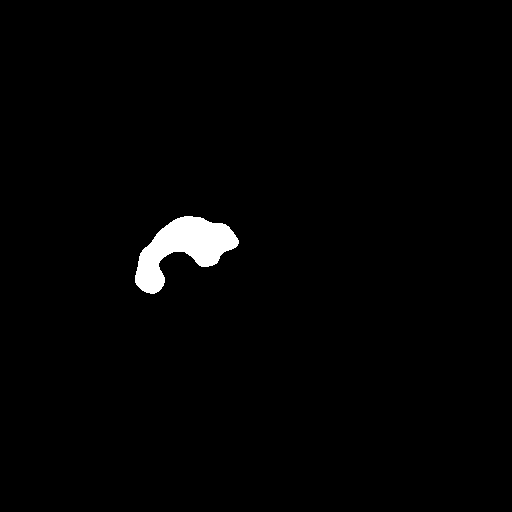

/content/mask_resized/_mask_1689234305_sample-slice058.jpg


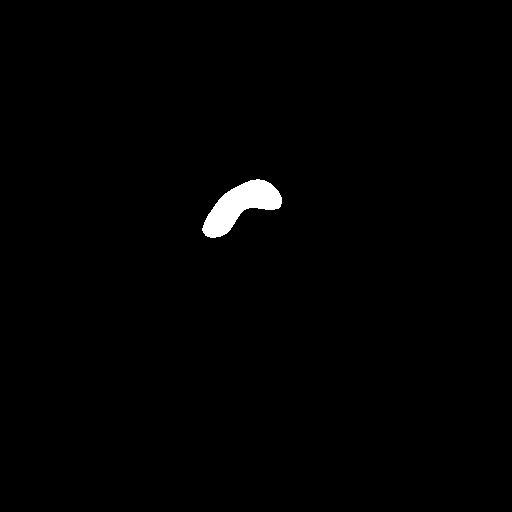

/content/mask_resized/_mask_1689234425_sample-slice038.jpg


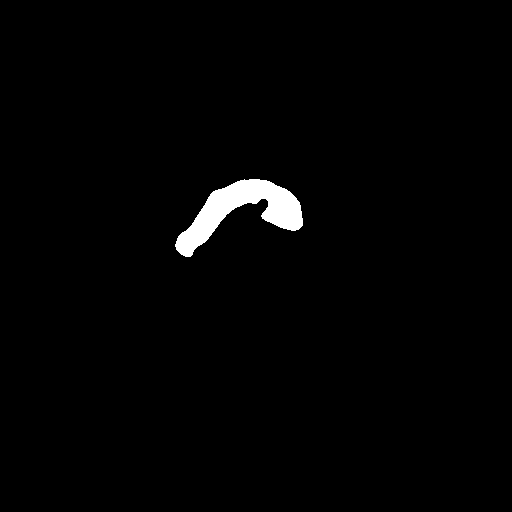

/content/mask_resized/_mask_1689233927_sample-slice053.jpg


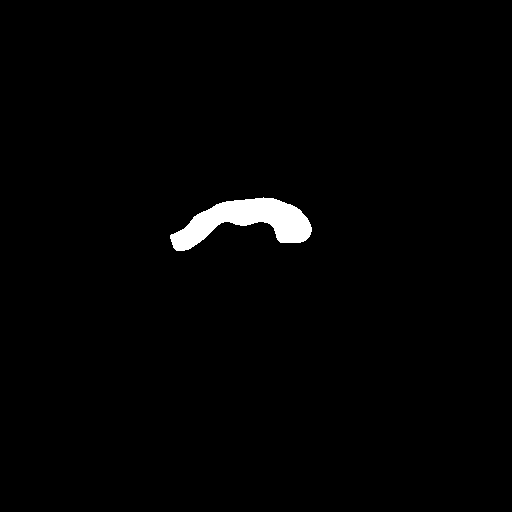

/content/mask_resized/_mask_1689234391_sample-slice054.jpg


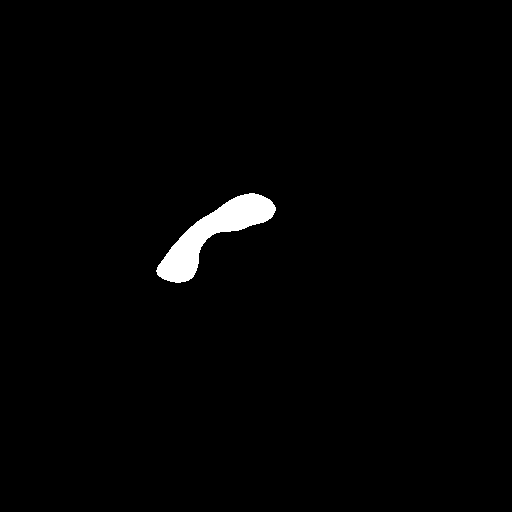

/content/mask_resized/_mask_1689233880_sample-slice038.jpg


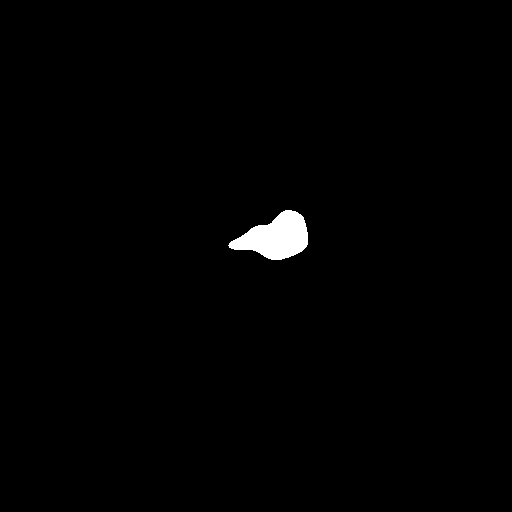

/content/mask_resized/_mask_1689234391_sample-slice041.jpg


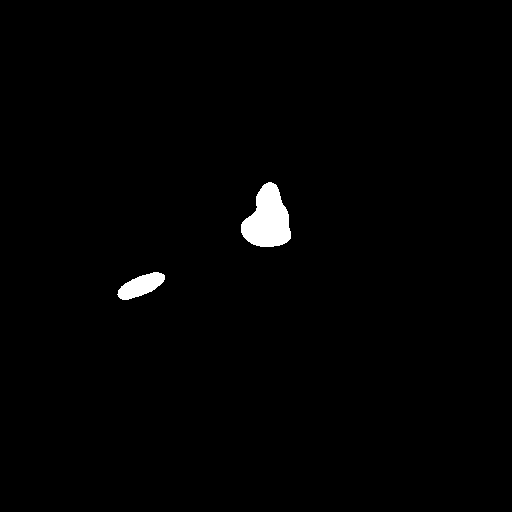

/content/mask_resized/_mask_1689234521_sample-slice018.jpg


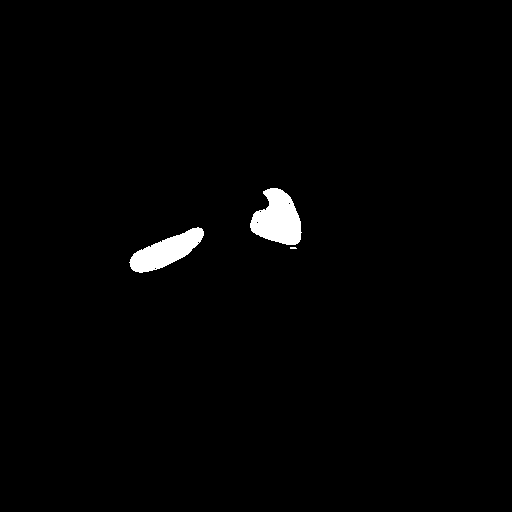

/content/mask_resized/_mask_1689234363_sample-slice036.jpg


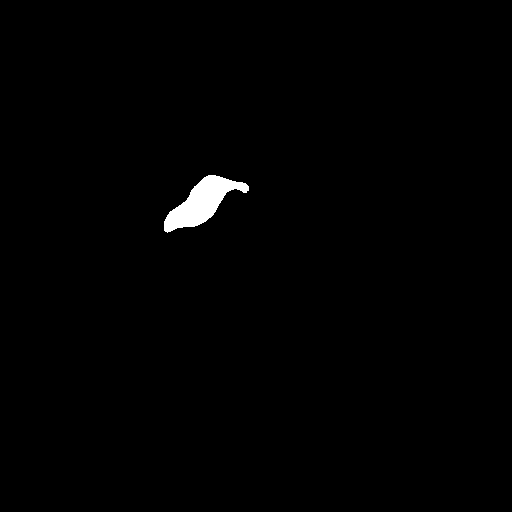

/content/mask_resized/_mask_sample-slice045.jpg


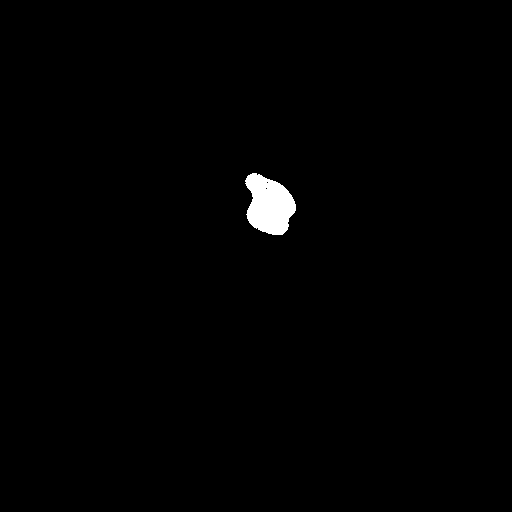

/content/mask_resized/_mask_1689233808_sample-slice048.jpg


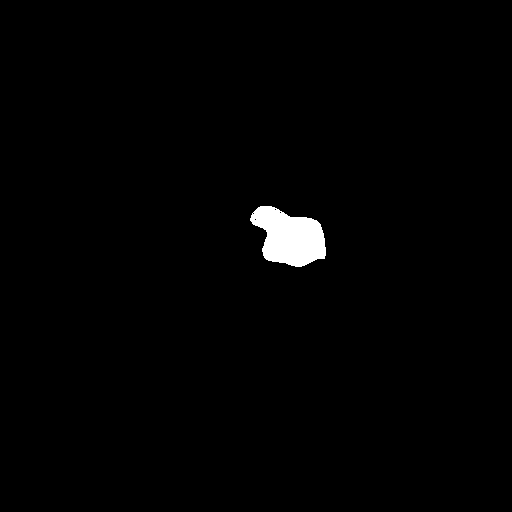

/content/mask_resized/_mask_1689234011_sample-slice045.jpg


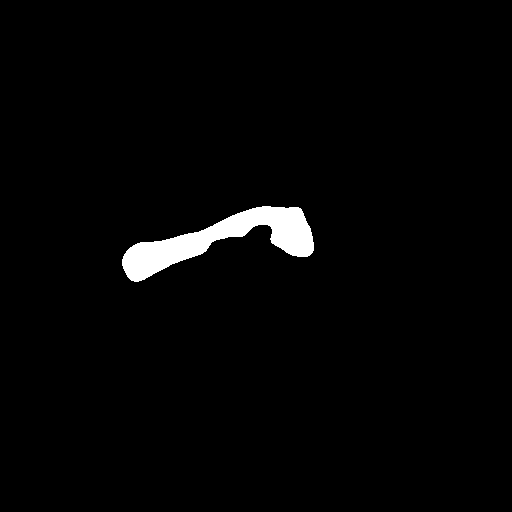

/content/mask_resized/_mask_1689234335_sample-slice045.jpg


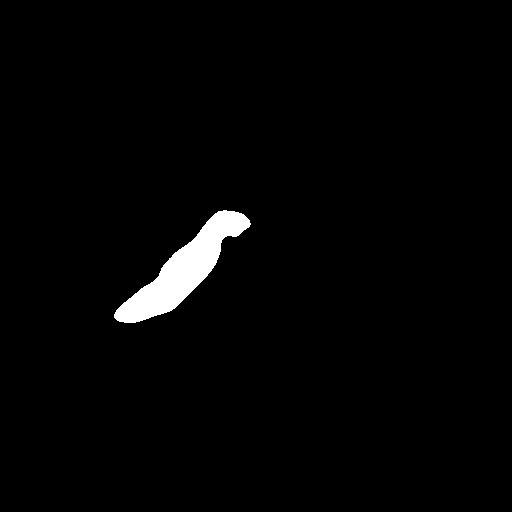

/content/mask_resized/_mask_1689234305_sample-slice049.jpg


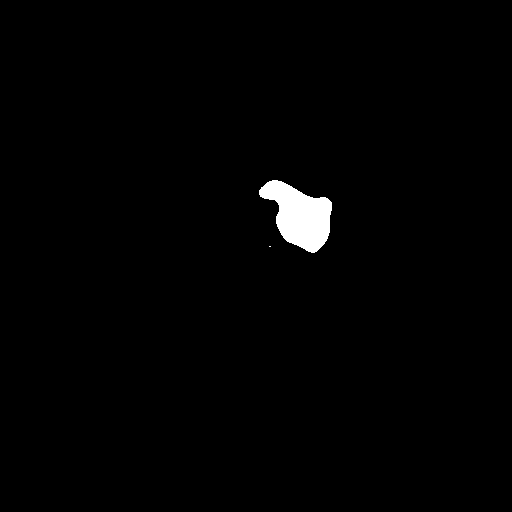

/content/mask_resized/_mask_sample-slice055.jpg


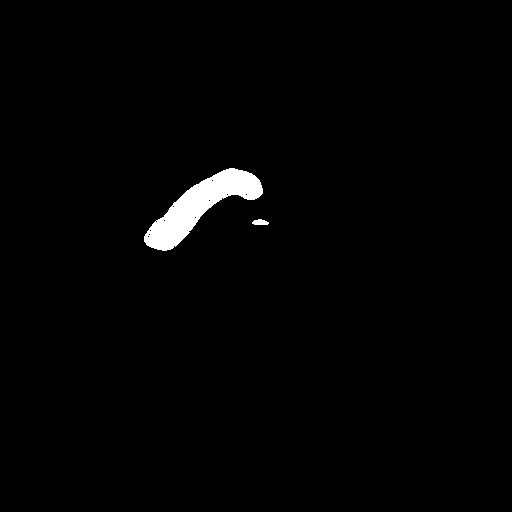

/content/mask_resized/_mask_1689233808_sample-slice069.jpg


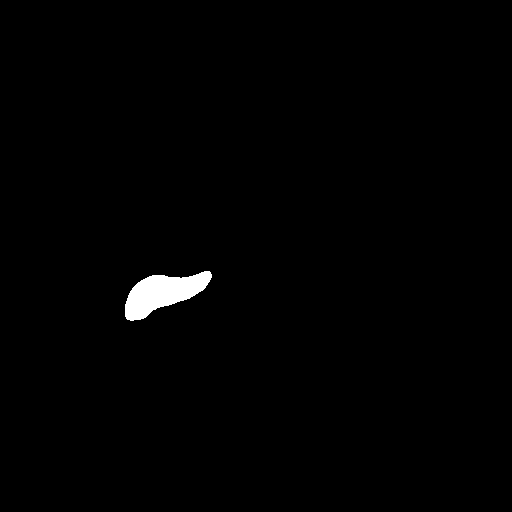

/content/mask_resized/_mask_sample-slice069.jpg


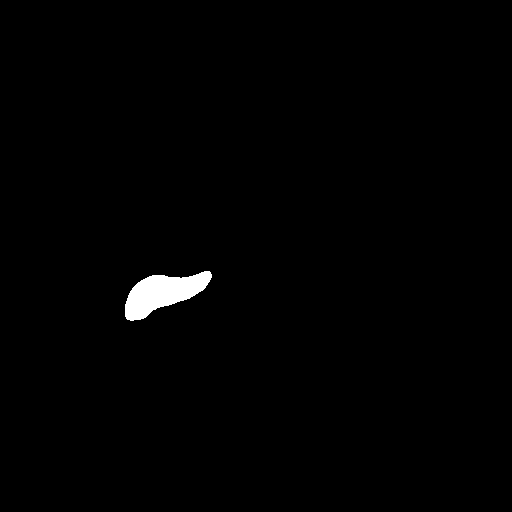

/content/mask_resized/_mask_1689234494_sample-slice025.jpg


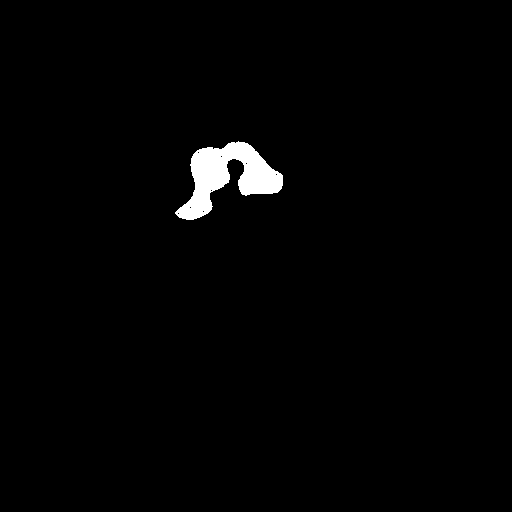

/content/mask_resized/_mask_1689233880_sample-slice056.jpg


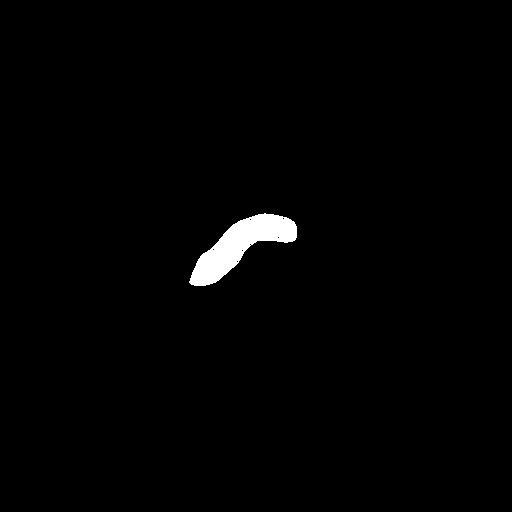

/content/mask_resized/_mask_1689234391_sample-slice027.jpg


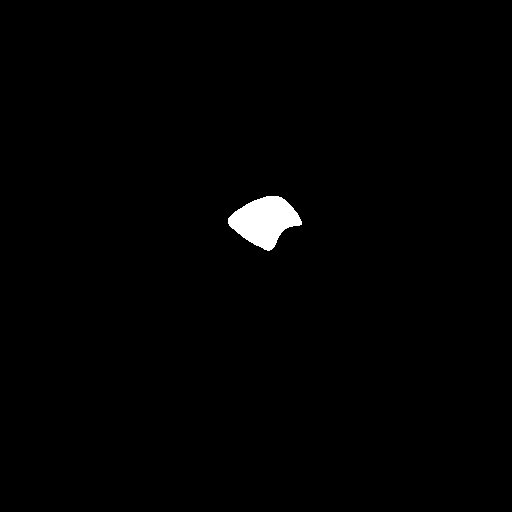

/content/mask_resized/_mask_1689233808_sample-slice052.jpg


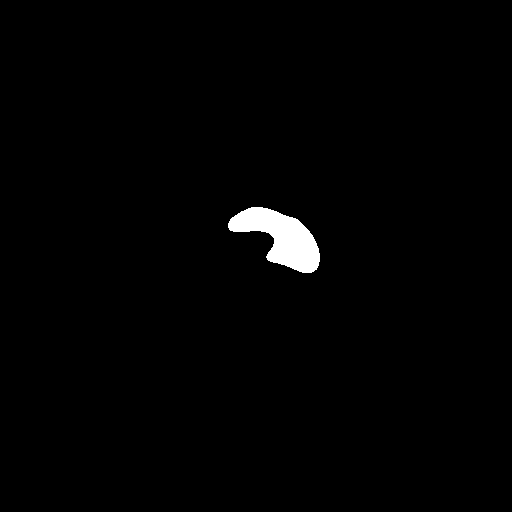

/content/mask_resized/_mask_1689233971_sample-slice089.jpg


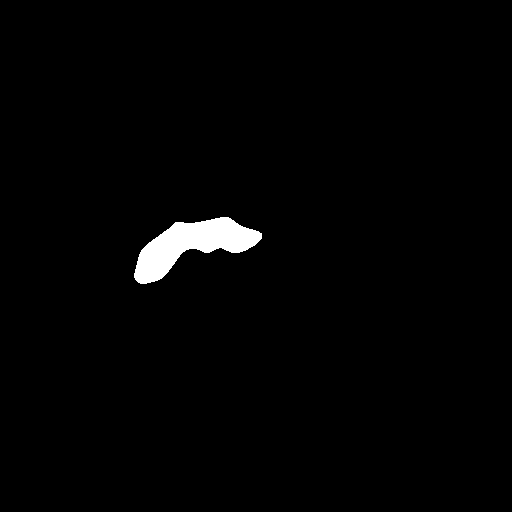

/content/mask_resized/_mask_sample-slice049.jpg


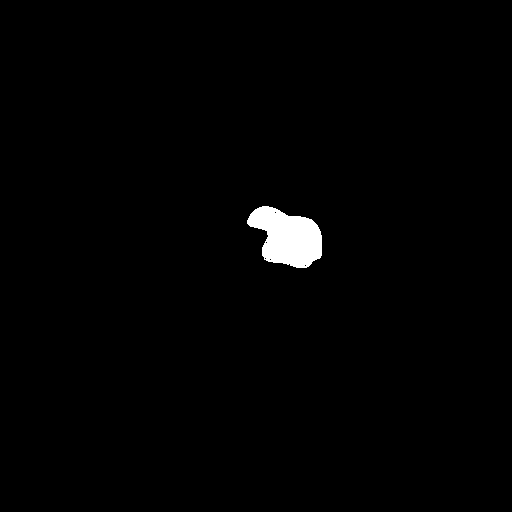

/content/mask_resized/_mask_1689233808_sample-slice068.jpg


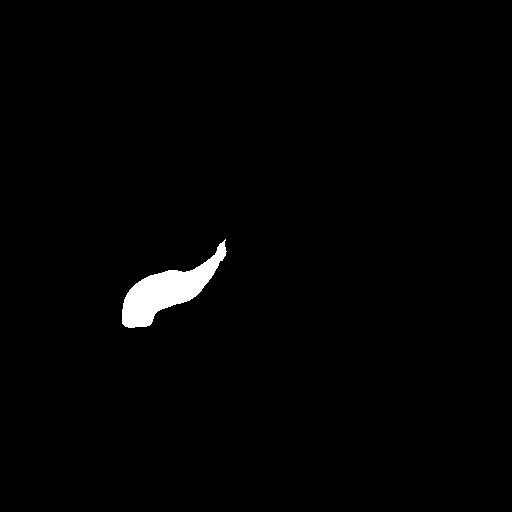

/content/mask_resized/_mask_1689234391_sample-slice046.jpg


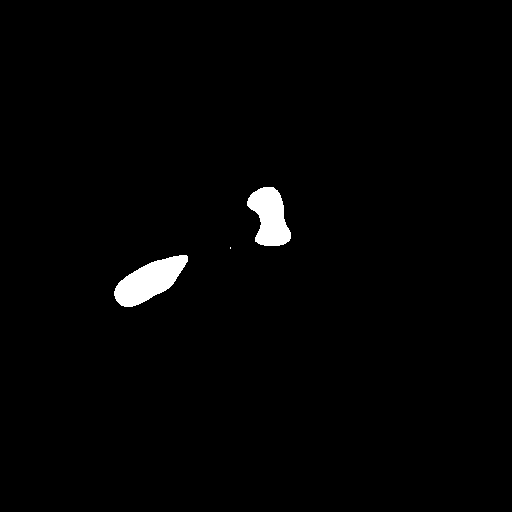

/content/mask_resized/_mask_1689234039_sample-slice045.jpg


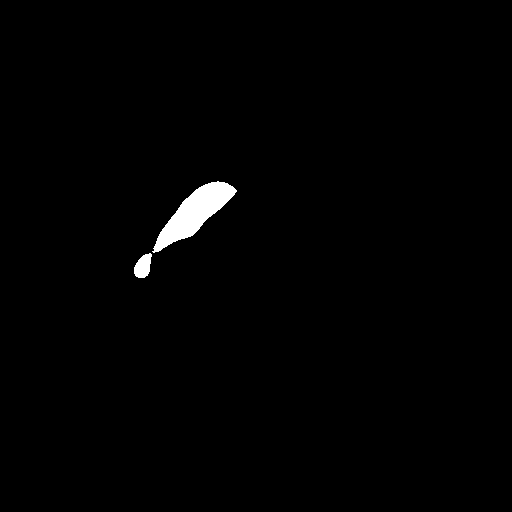

/content/mask_resized/_mask_1689234391_sample-slice051.jpg


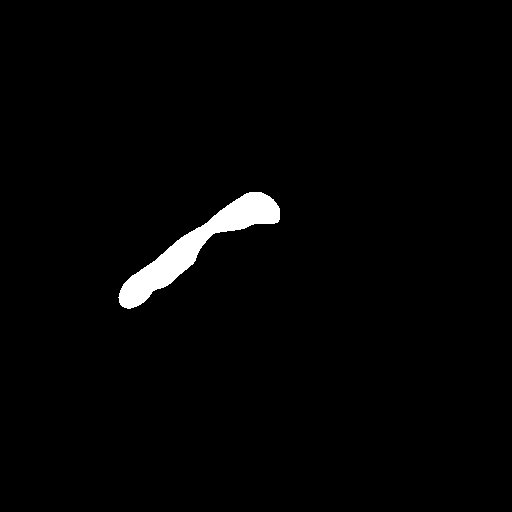

/content/mask_resized/_mask_1689233808_sample-slice061.jpg


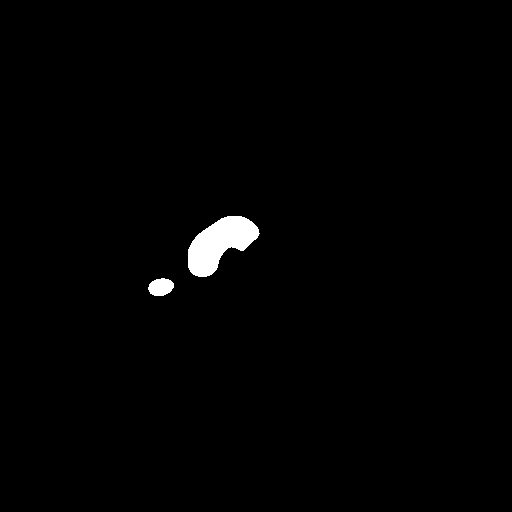

/content/mask_resized/_mask_1689234363_sample-slice023.jpg


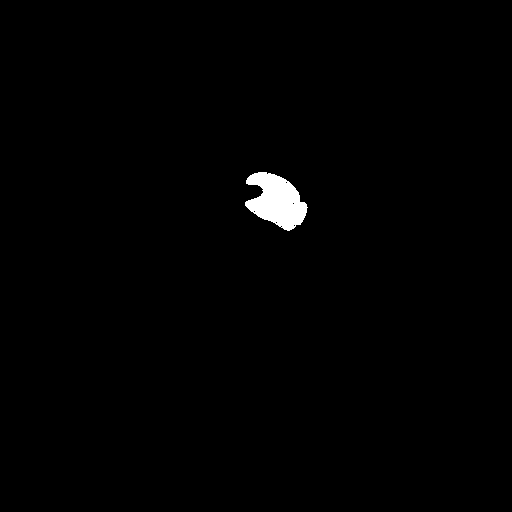

/content/mask_resized/_mask_1689233880_sample-slice055.jpg


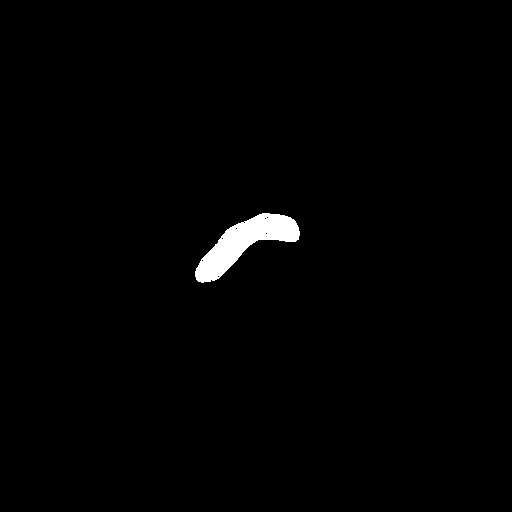

/content/mask_resized/_mask_1689233971_sample-slice049.jpg


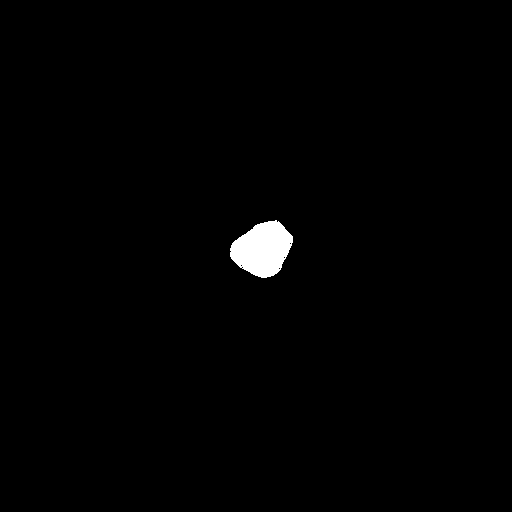

/content/mask_resized/_mask_1689234494_sample-slice020.jpg


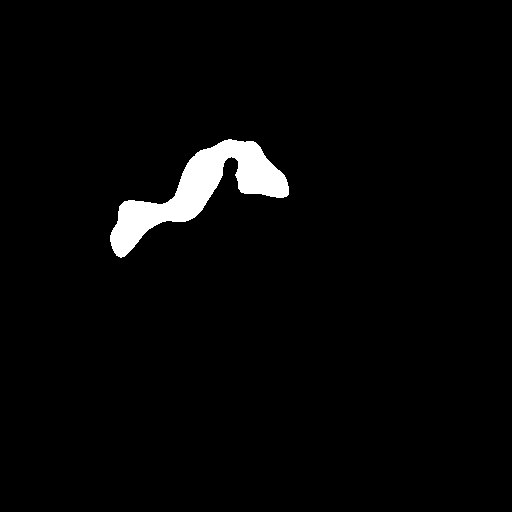

/content/mask_resized/_mask_1689234113_sample-slice040.jpg


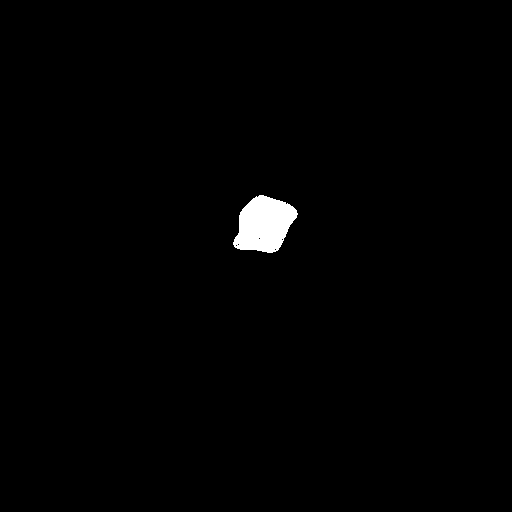

/content/mask_resized/_mask_1689233927_sample-slice038.jpg


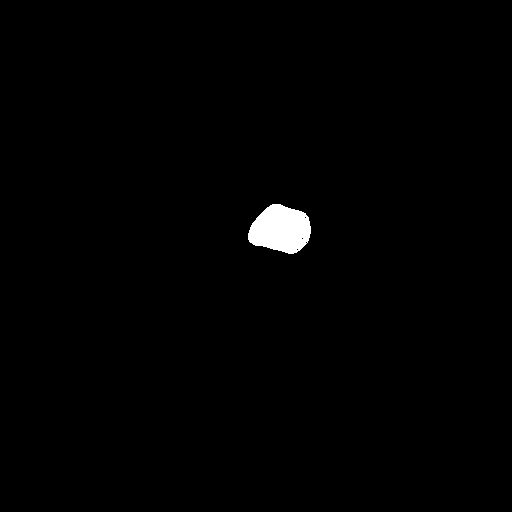

/content/mask_resized/_mask_1689234469_sample-slice048.jpg


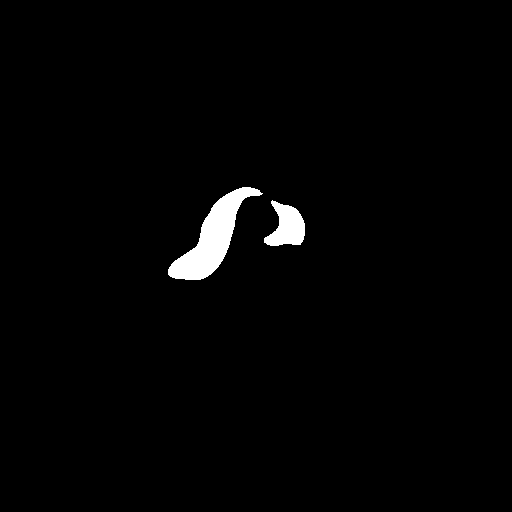

/content/mask_resized/_mask_1689233971_sample-slice055.jpg


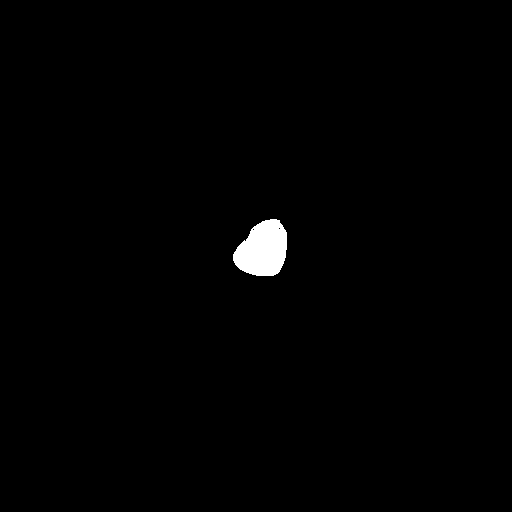

/content/mask_resized/_mask_1689233808_sample-slice055.jpg


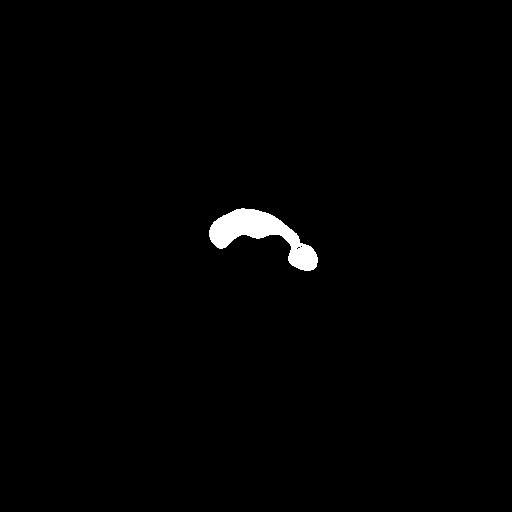

/content/mask_resized/_mask_1689234363_sample-slice028.jpg


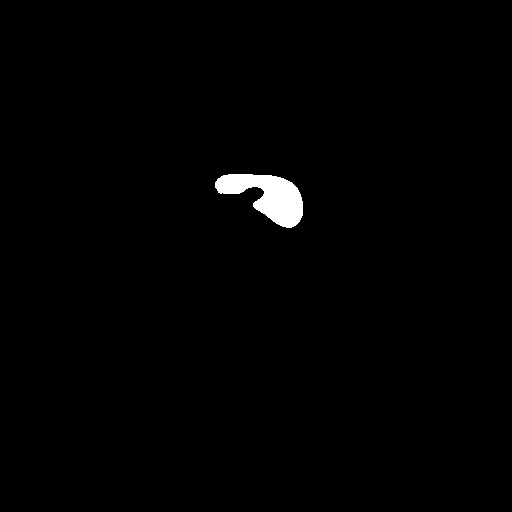

/content/mask_resized/_mask_sample-slice040.jpg


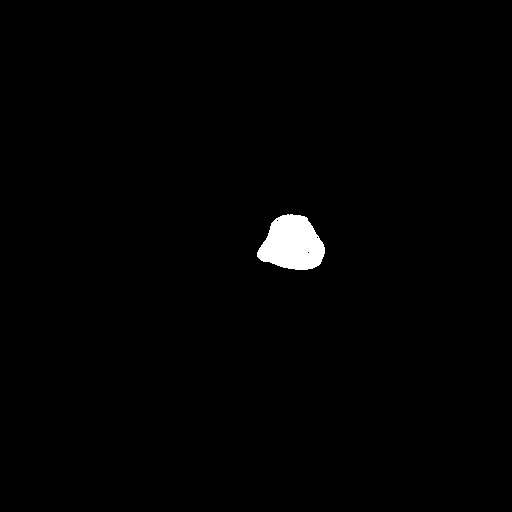

/content/mask_resized/_mask_1689233971_sample-slice053.jpg


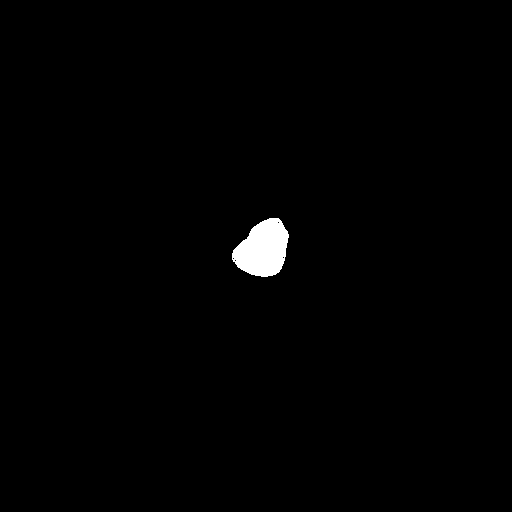

/content/mask_resized/_mask_1689234521_sample-slice016.jpg


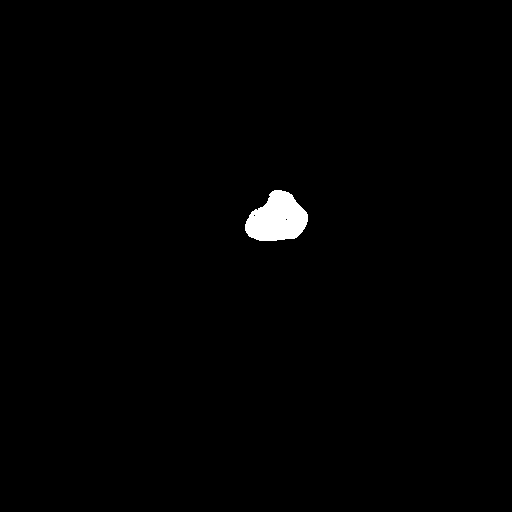

/content/mask_resized/_mask_1689234276_sample-slice043.jpg


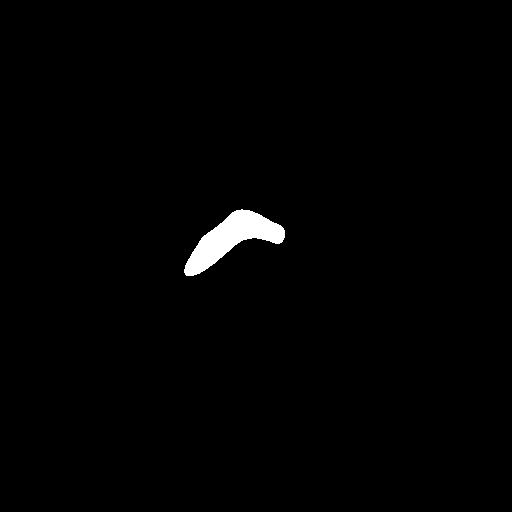

/content/mask_resized/_mask_1689233971_sample-slice084.jpg


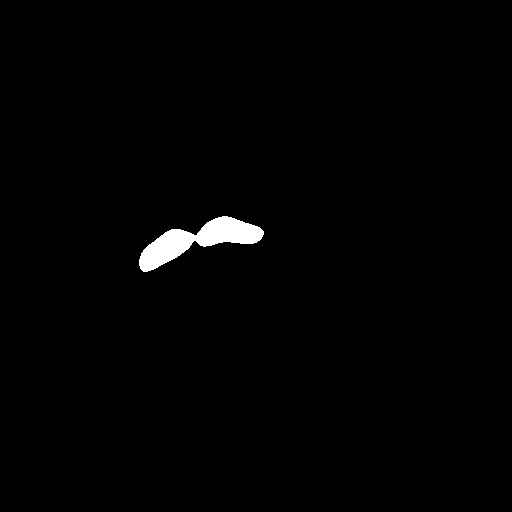

/content/mask_resized/_mask_1689234276_sample-slice048.jpg


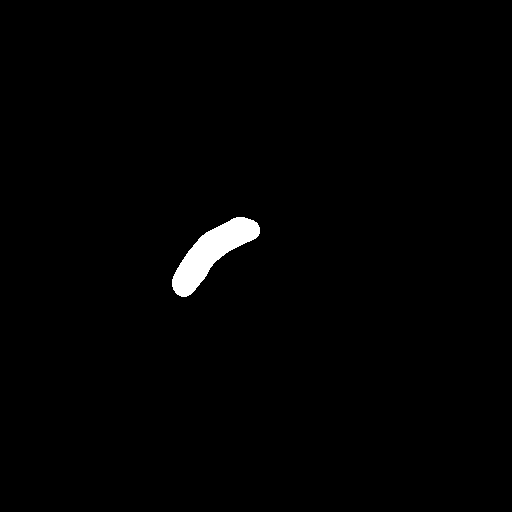

/content/mask_resized/_mask_1689233808_sample-slice067.jpg


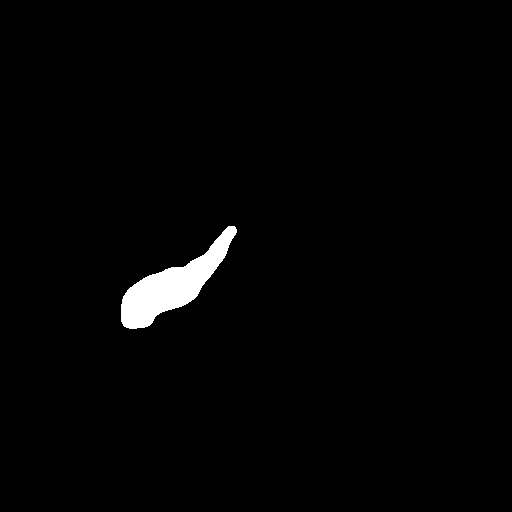

/content/mask_resized/_mask_1689233808_sample-slice044.jpg


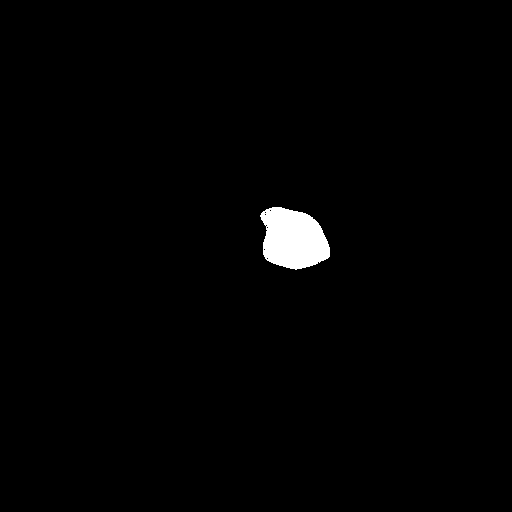

/content/mask_resized/_mask_1689234305_sample-slice043.jpg


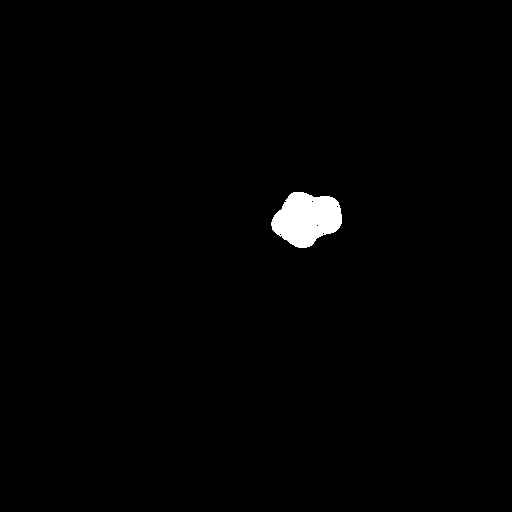

/content/mask_resized/_mask_1689234074_sample-slice044.jpg


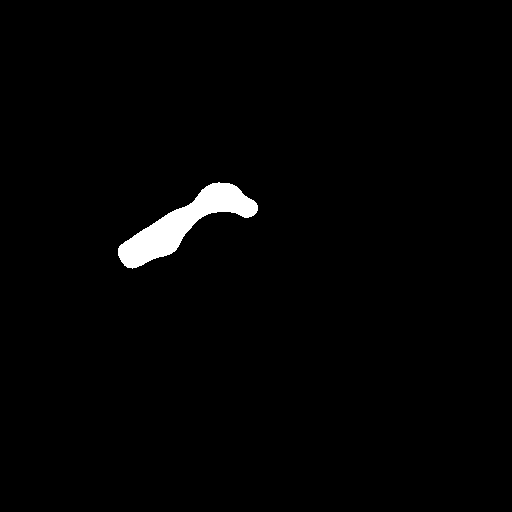

/content/mask_resized/_mask_1689234494_sample-slice019.jpg


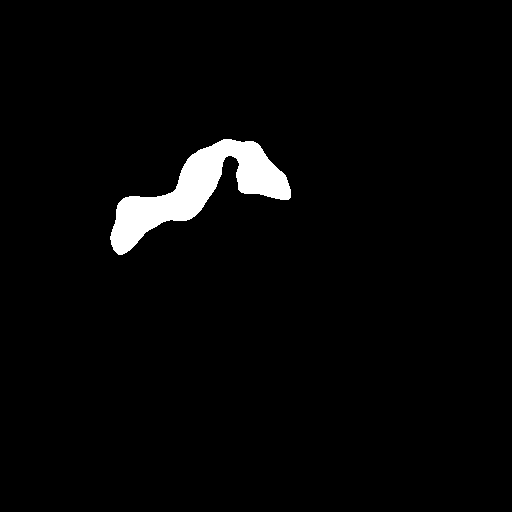

/content/mask_resized/_mask_1689234276_sample-slice046.jpg


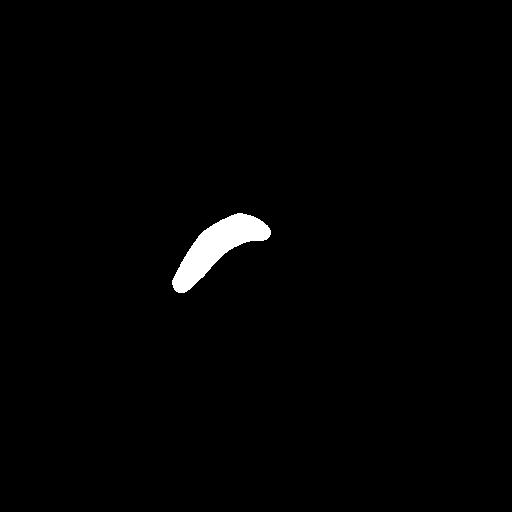

/content/mask_resized/_mask_1689234521_sample-slice017.jpg


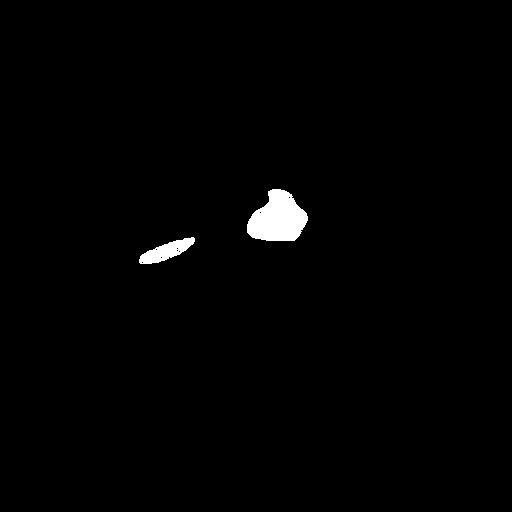

/content/mask_resized/_mask_1689234114_sample-slice041.jpg


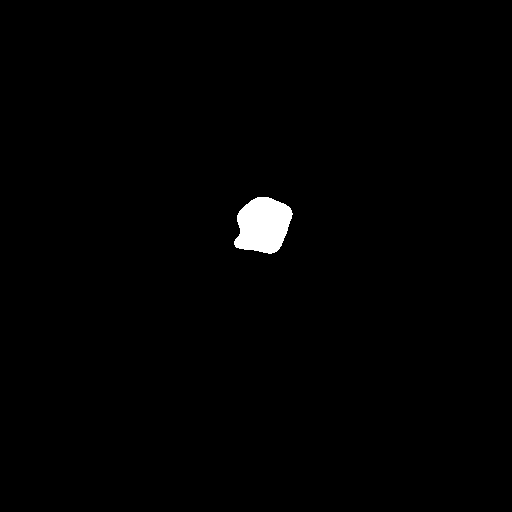

/content/mask_resized/_mask_1689234494_sample-slice023.jpg


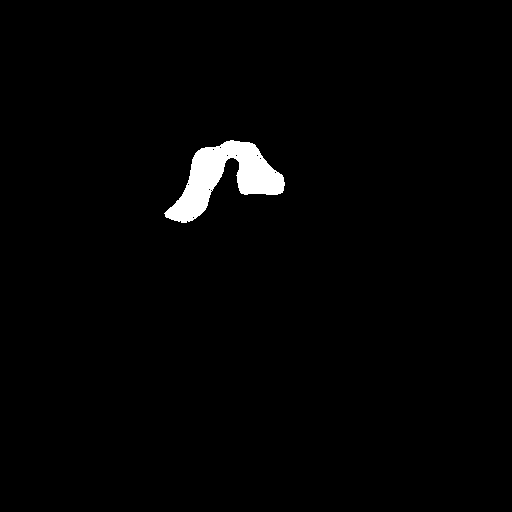

/content/mask_resized/_mask_1689234305_sample-slice051.jpg


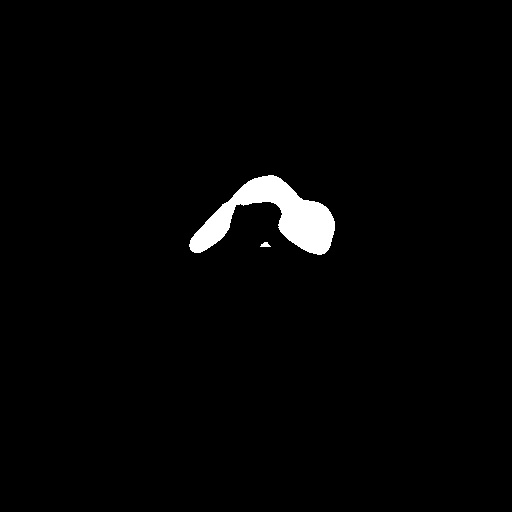

/content/mask_resized/_mask_1689234494_sample-slice017.jpg


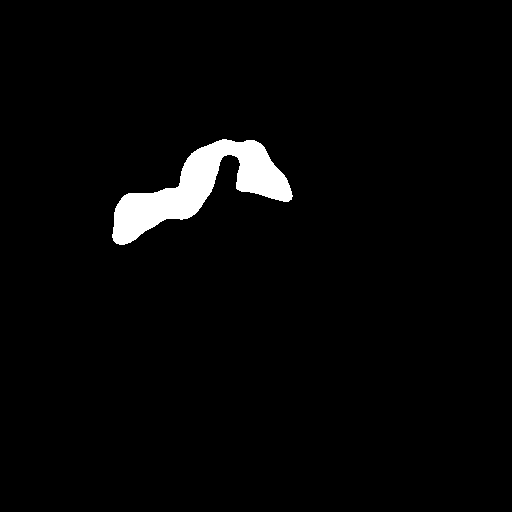

/content/mask_resized/_mask_1689234335_sample-slice049.jpg


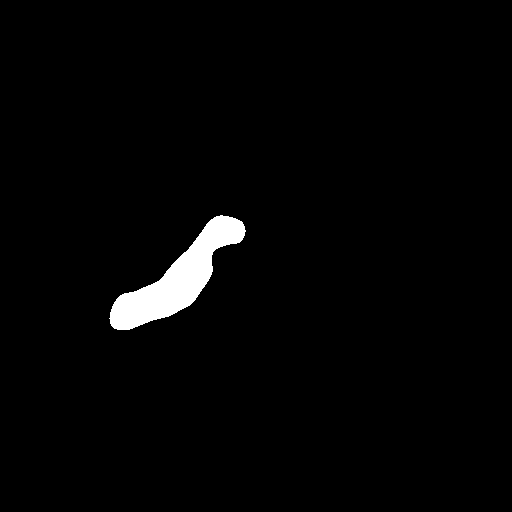

/content/mask_resized/_mask_1689233808_sample-slice063.jpg


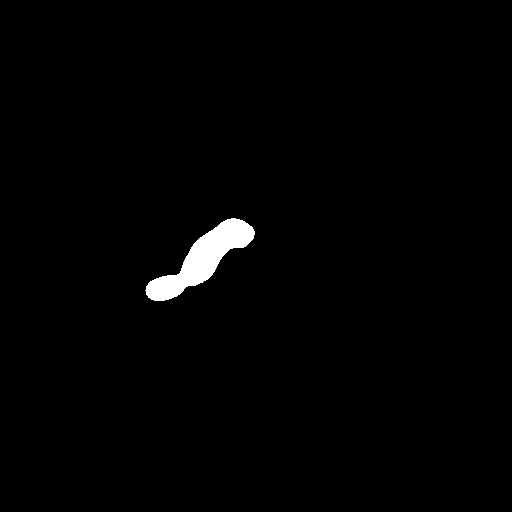

/content/mask_resized/_mask_1689234305_sample-slice038.jpg


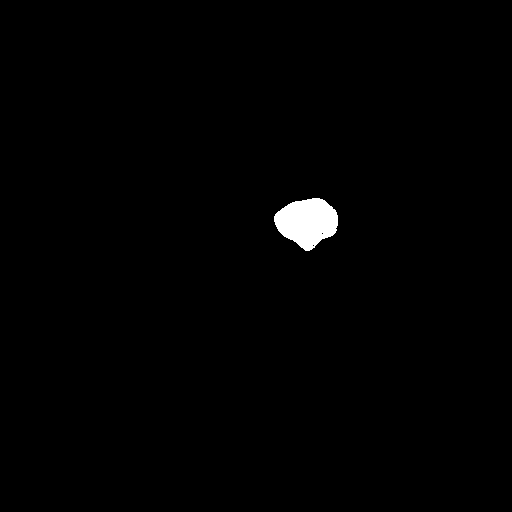

/content/mask_resized/_mask_1689234391_sample-slice037.jpg


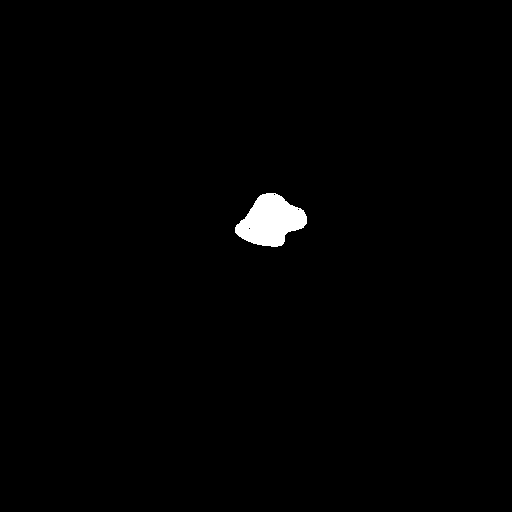

/content/mask_resized/_mask_1689233880_sample-slice039.jpg


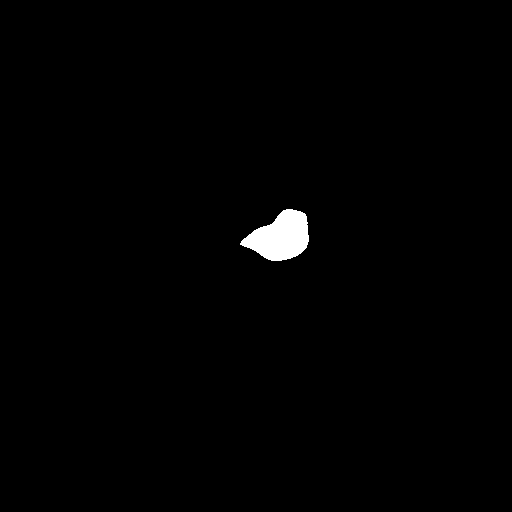

/content/mask_resized/_mask_sample-slice060.jpg


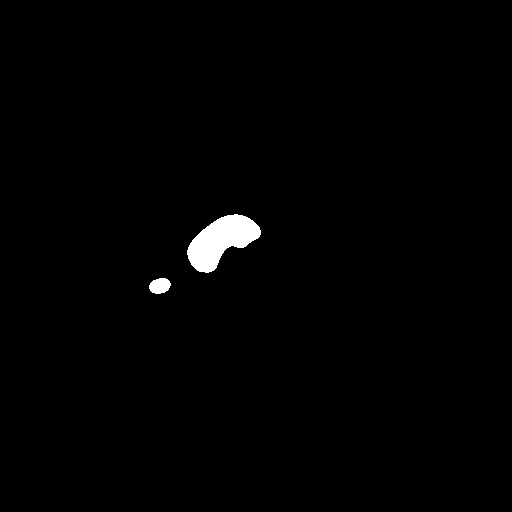

/content/mask_resized/_mask_1689234335_sample-slice030.jpg


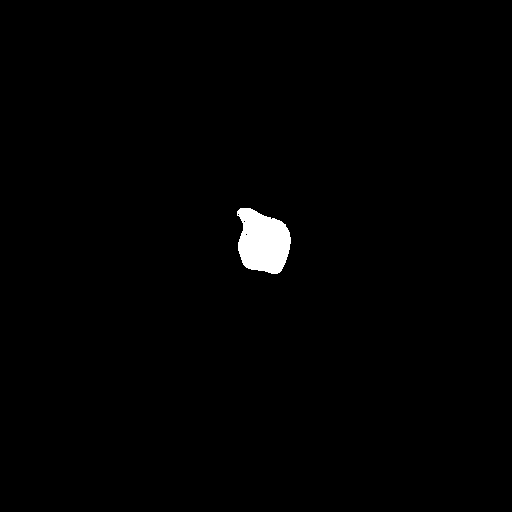

/content/mask_resized/_mask_1689234391_sample-slice030.jpg


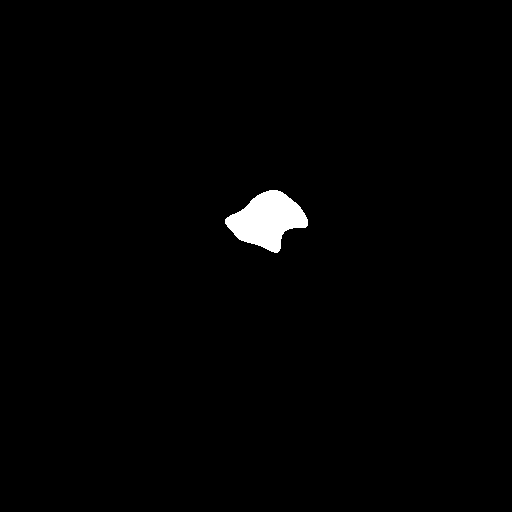

/content/mask_resized/_mask_1689233808_sample-slice060.jpg


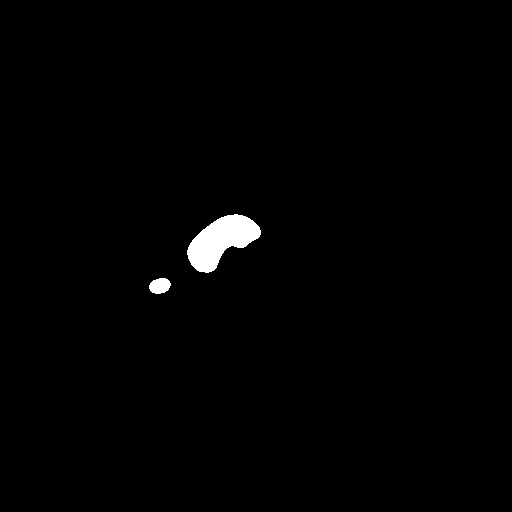

/content/mask_resized/_mask_1689234391_sample-slice034.jpg


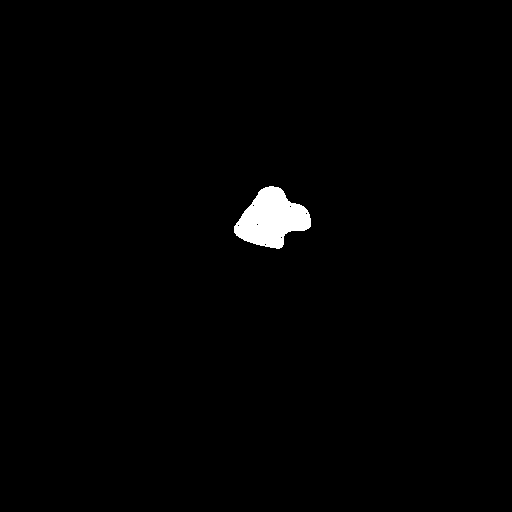

/content/mask_resized/_mask_1689234074_sample-slice043.jpg


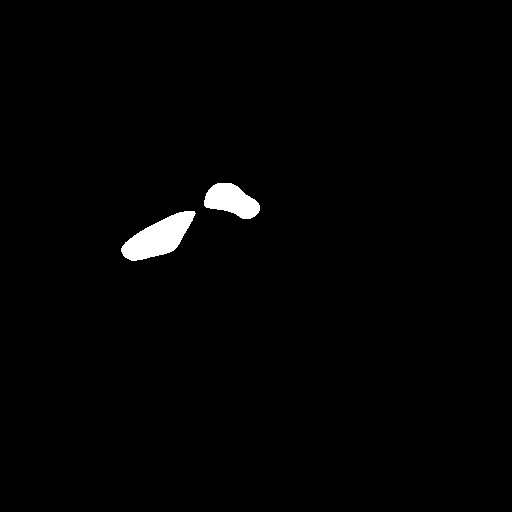

/content/mask_resized/_mask_1689234011_sample-slice054.jpg


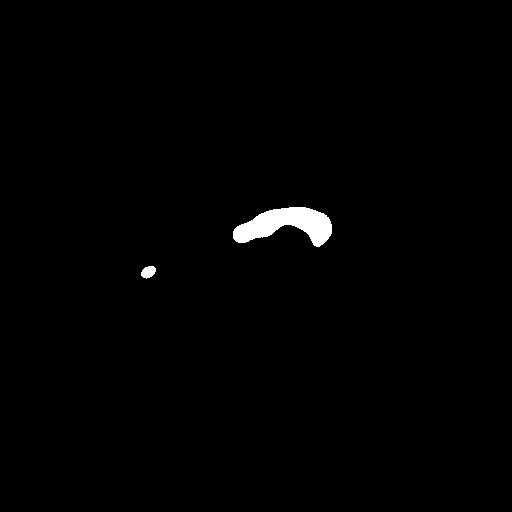

/content/mask_resized/_mask_1689234494_sample-slice016.jpg


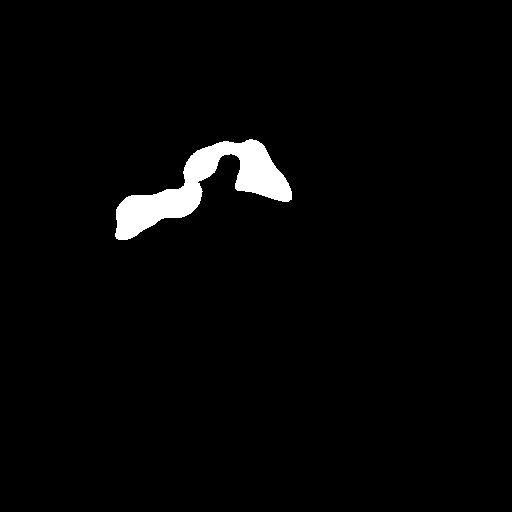

/content/mask_resized/_mask_1689233971_sample-slice050.jpg


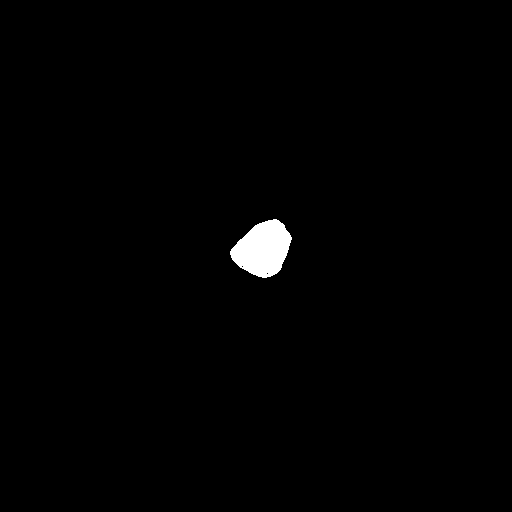

/content/mask_resized/_mask_1689234494_sample-slice027.jpg


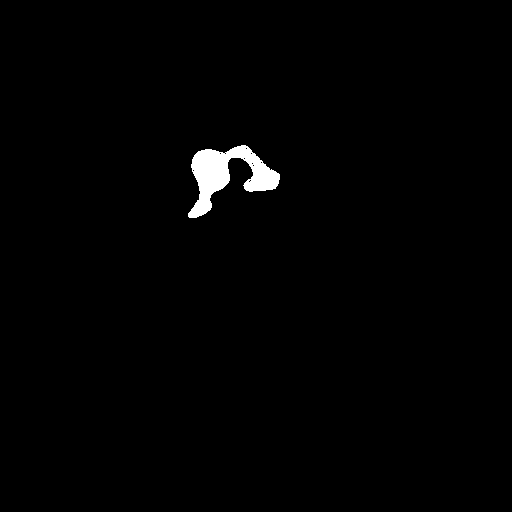

/content/mask_resized/_mask_1689234074_sample-slice050.jpg


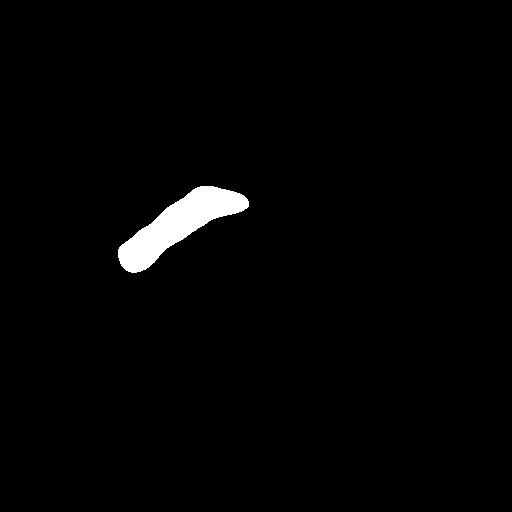

/content/mask_resized/_mask_1689234074_sample-slice048.jpg


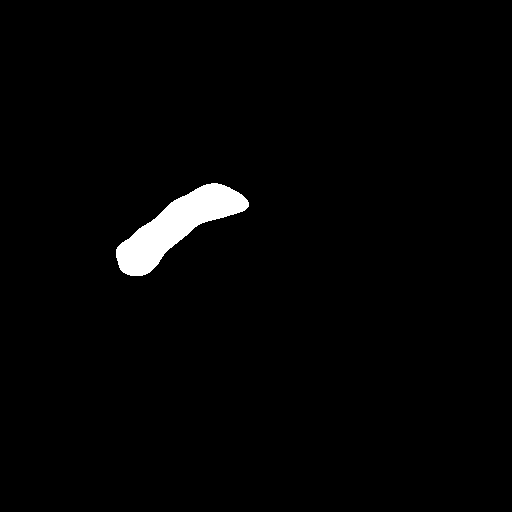

/content/mask_resized/_mask_1689233808_sample-slice051.jpg


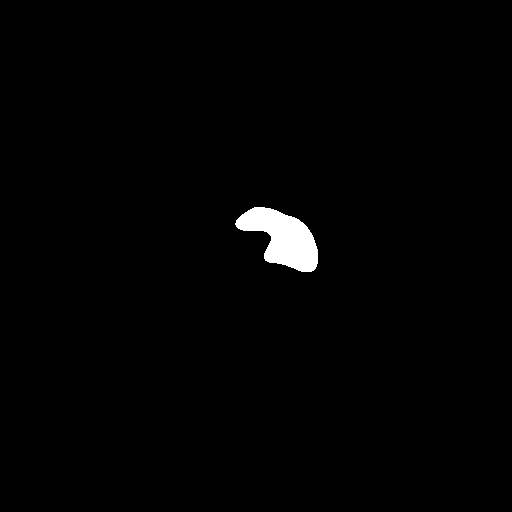

/content/mask_resized/_mask_1689233971_sample-slice052.jpg


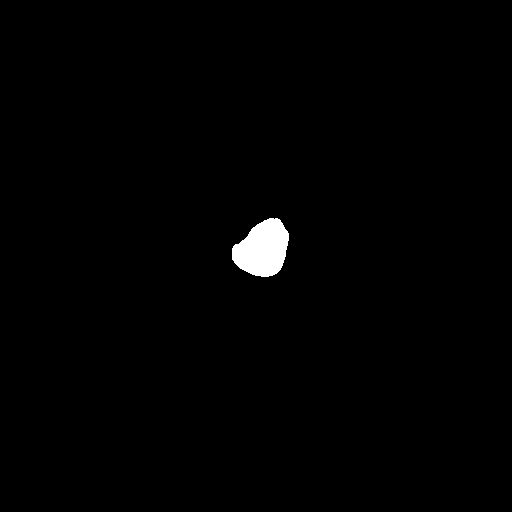

/content/mask_resized/_mask_1689233971_sample-slice085.jpg


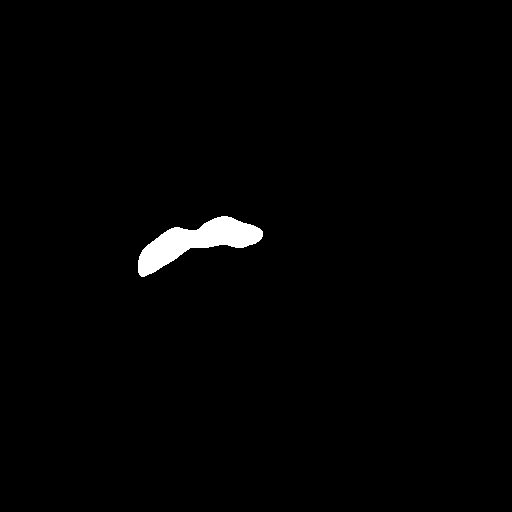

/content/mask_resized/_mask_1689234305_sample-slice040.jpg


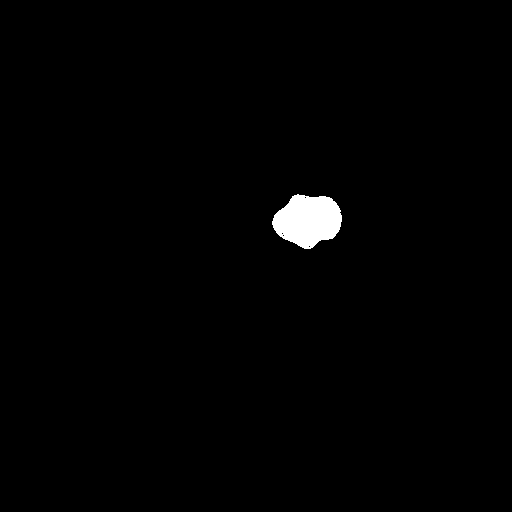

/content/mask_resized/_mask_1689233808_sample-slice058.jpg


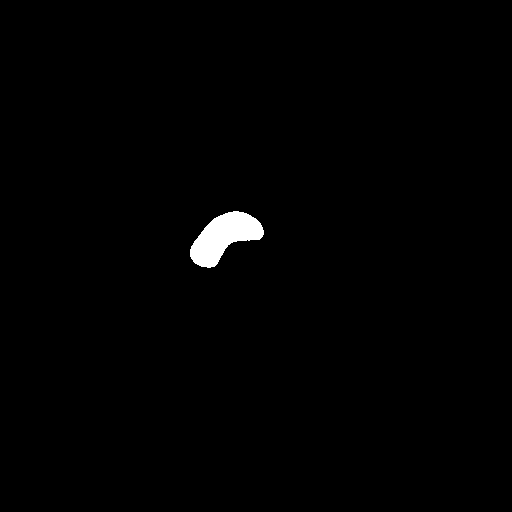

/content/mask_resized/_mask_sample-slice051.jpg


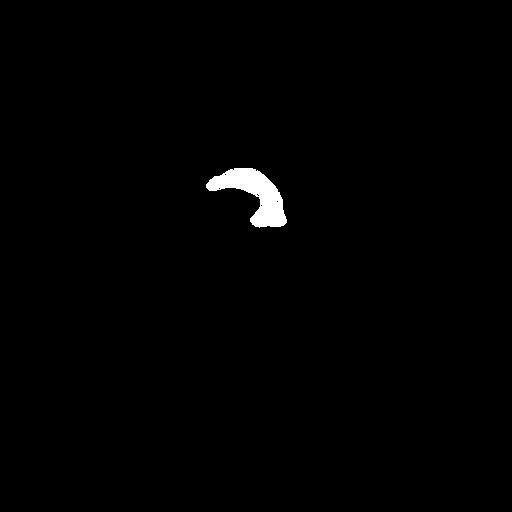

/content/mask_resized/_mask_1689234276_sample-slice050.jpg


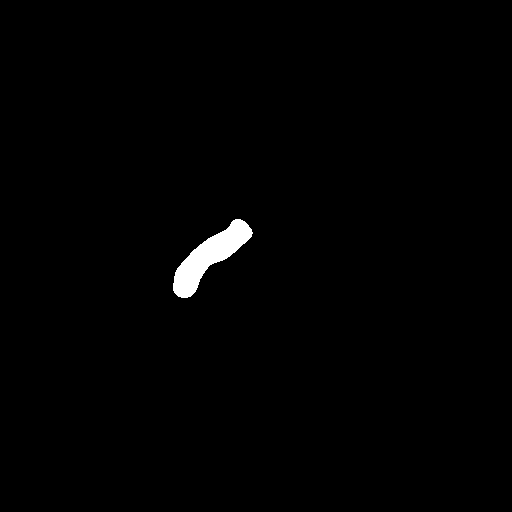

/content/mask_resized/_mask_1689234244_sample-slice051.jpg


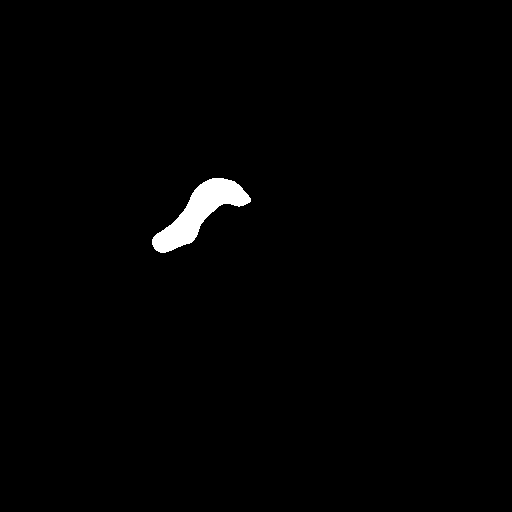

/content/mask_resized/_mask_1689233971_sample-slice105.jpg


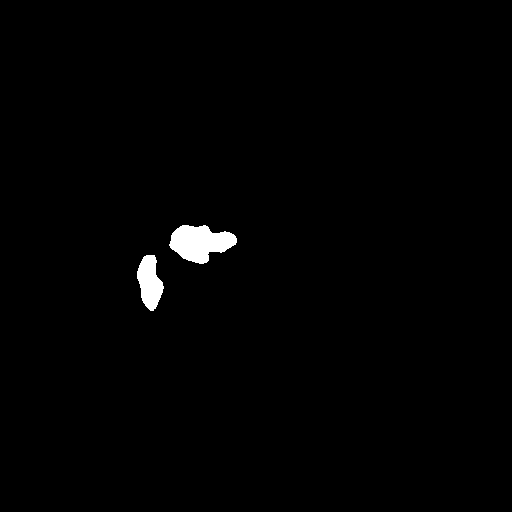

/content/mask_resized/_mask_1689234305_sample-slice057.jpg


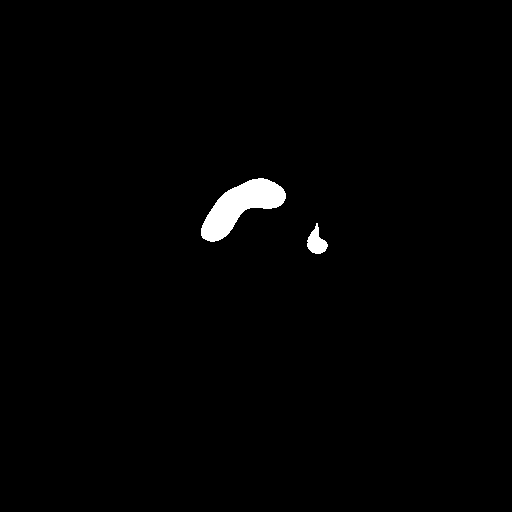

/content/mask_resized/_mask_1689234391_sample-slice052.jpg


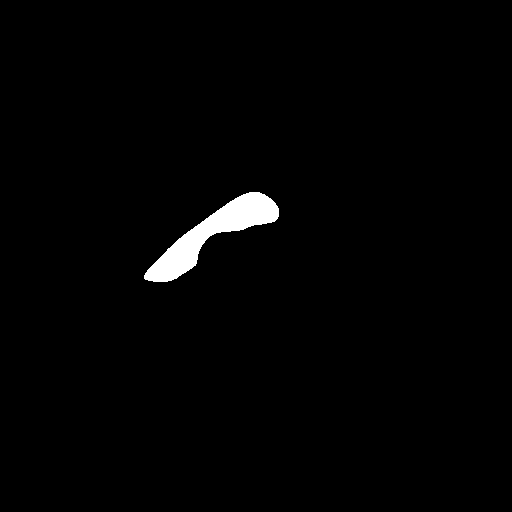

/content/mask_resized/_mask_1689234363_sample-slice043.jpg


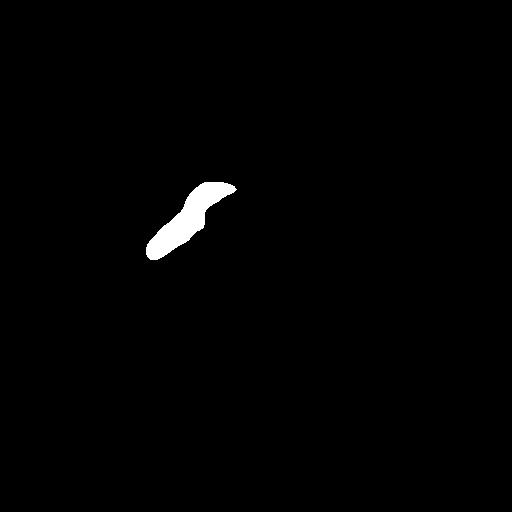

/content/mask_resized/_mask_sample-slice056.jpg


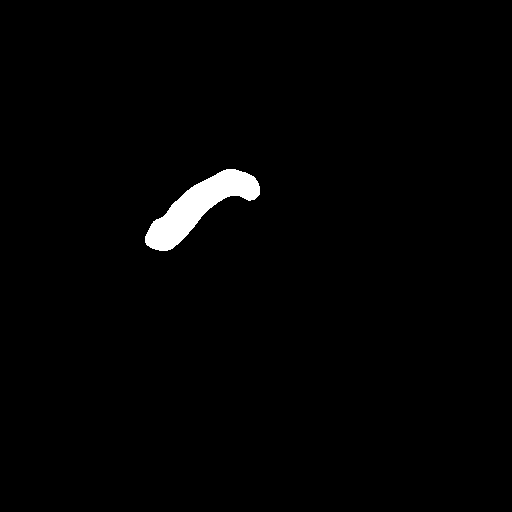

/content/mask_resized/_mask_1689234114_sample-slice036.jpg


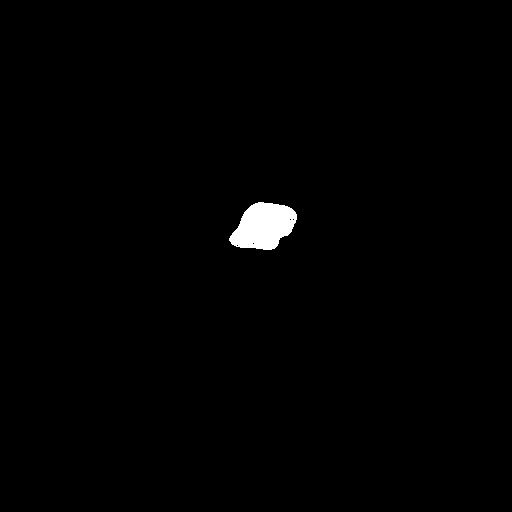

/content/mask_resized/_mask_1689233971_sample-slice048.jpg


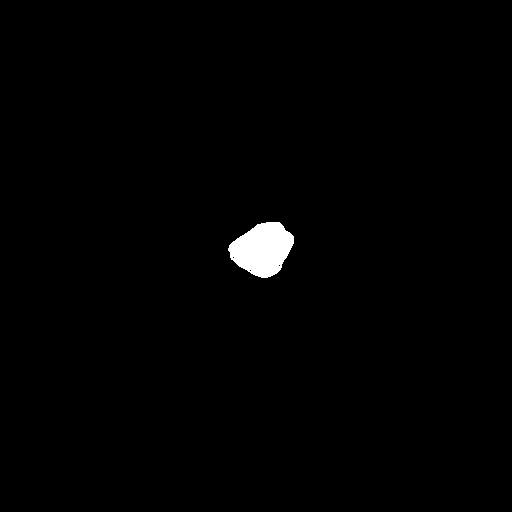

/content/mask_resized/_mask_1689234425_sample-slice034.jpg


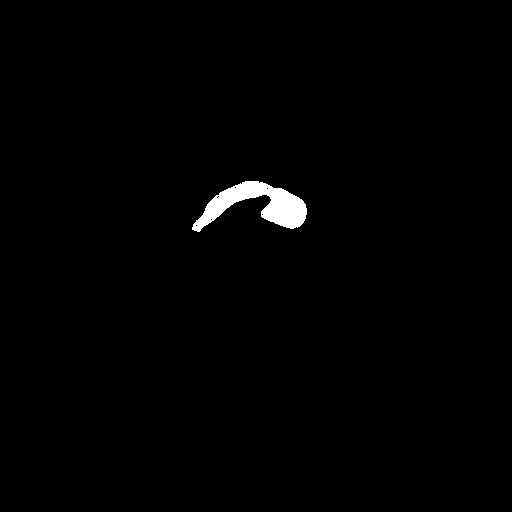

/content/mask_resized/_mask_1689233927_sample-slice049.jpg


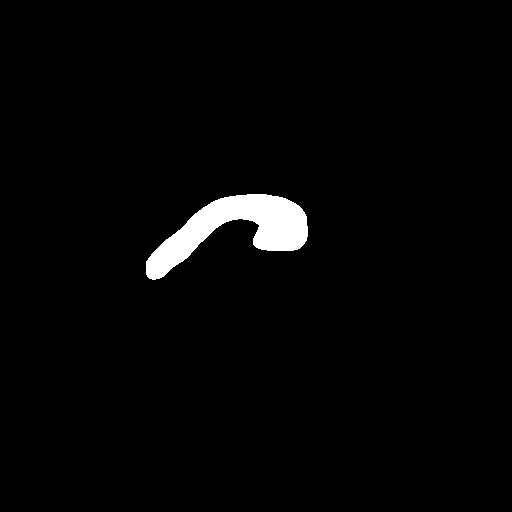

/content/mask_resized/_mask_1689234305_sample-slice045.jpg


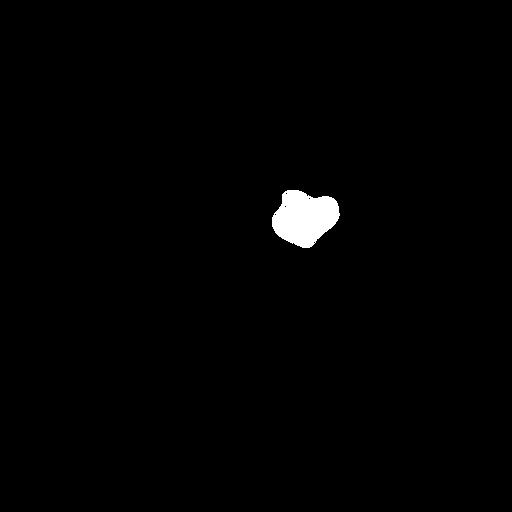

/content/mask_resized/_mask_1689234425_sample-slice037.jpg


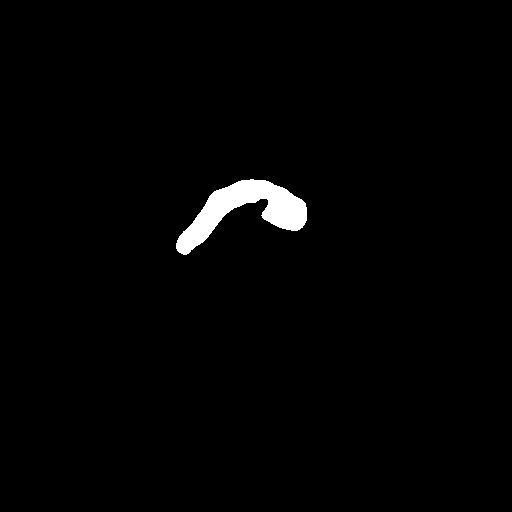

/content/mask_resized/_mask_1689234011_sample-slice048.jpg


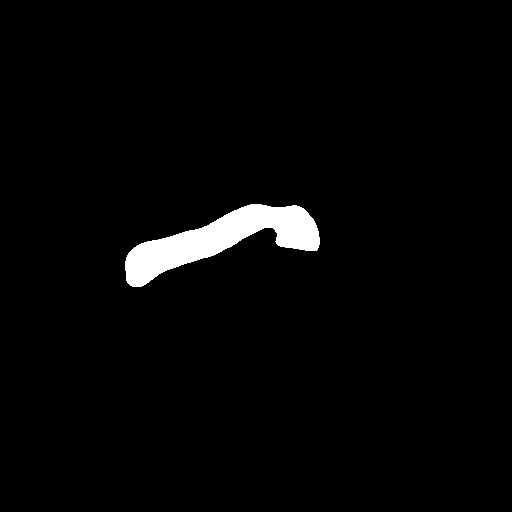

/content/mask_resized/_mask_1689233880_sample-slice060.jpg


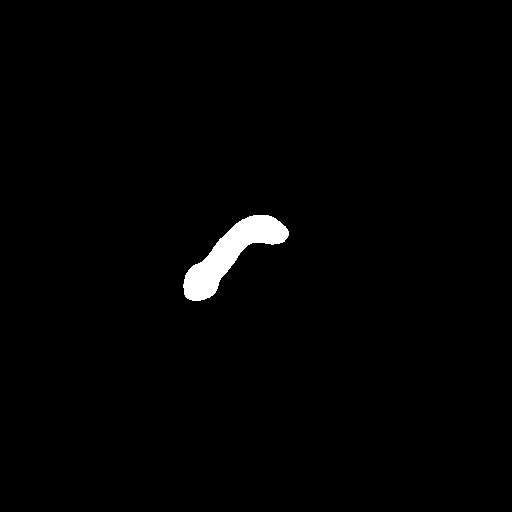

/content/mask_resized/_mask_1689234391_sample-slice045.jpg


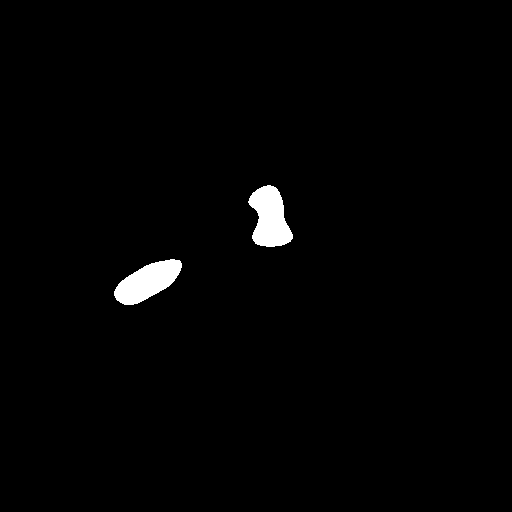

/content/mask_resized/_mask_1689233808_sample-slice053.jpg


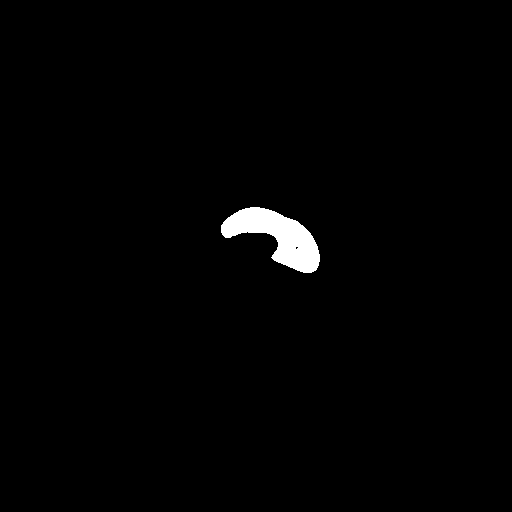

/content/mask_resized/_mask_1689234391_sample-slice049.jpg


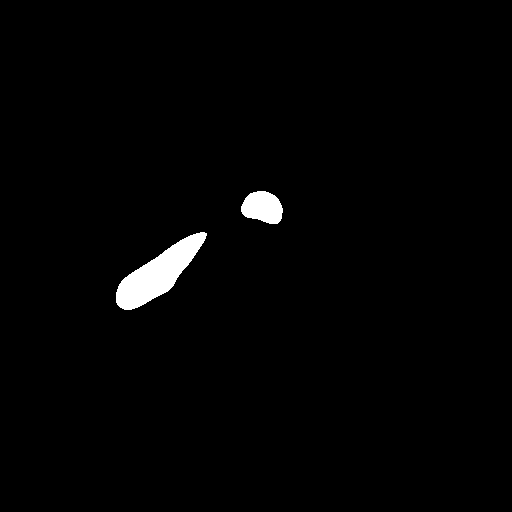

/content/mask_resized/_mask_sample-slice050.jpg


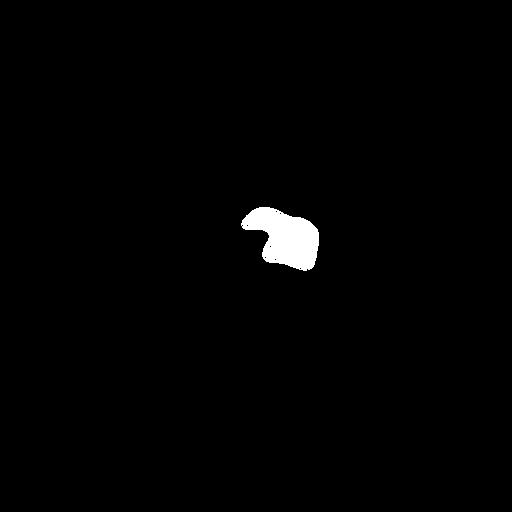

/content/mask_resized/_mask_1689234039_sample-slice042.jpg


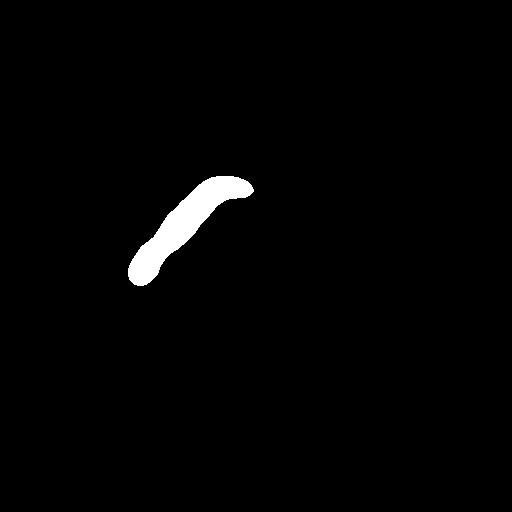

/content/mask_resized/_mask_1689234391_sample-slice047.jpg


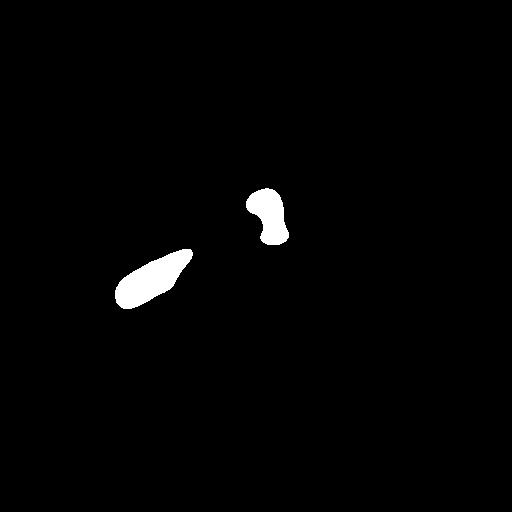

/content/mask_resized/_mask_1689234114_sample-slice042.jpg


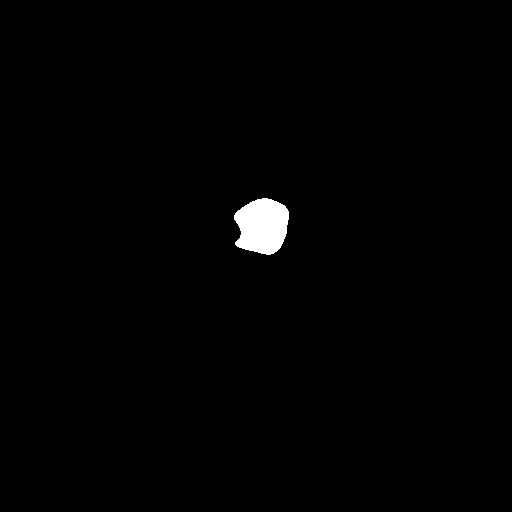

/content/mask_resized/_mask_1689234425_sample-slice040.jpg


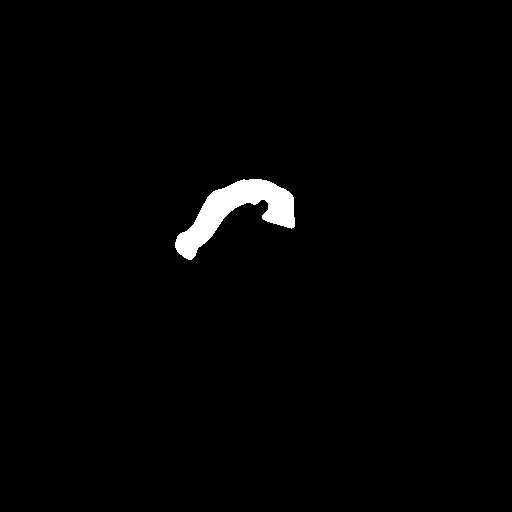

/content/mask_resized/_mask_1689233971_sample-slice051.jpg


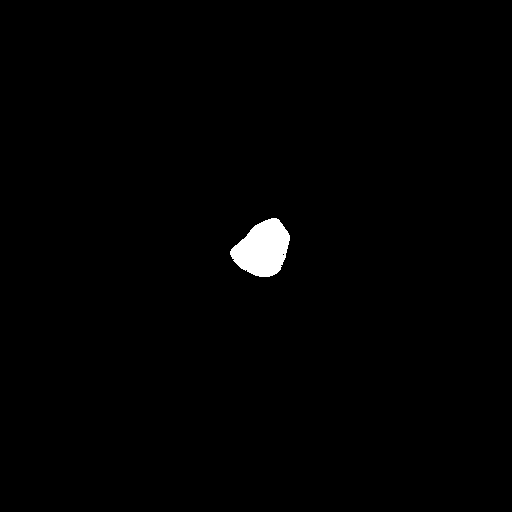

/content/mask_resized/_mask_1689234335_sample-slice043.jpg


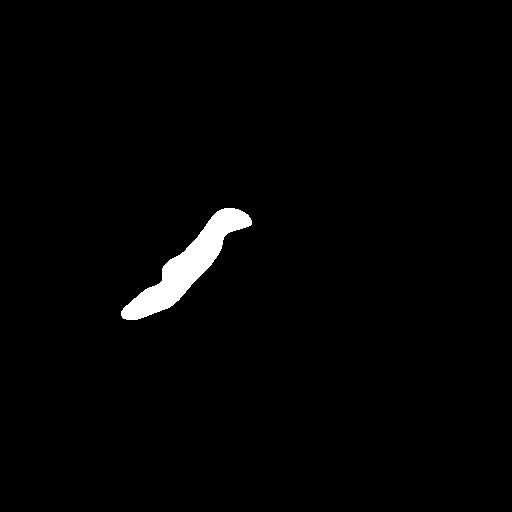

/content/mask_resized/_mask_1689234469_sample-slice047.jpg


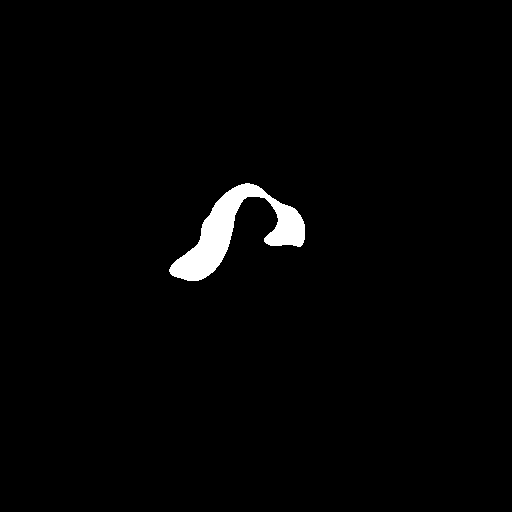

/content/mask_resized/_mask_1689234276_sample-slice041.jpg


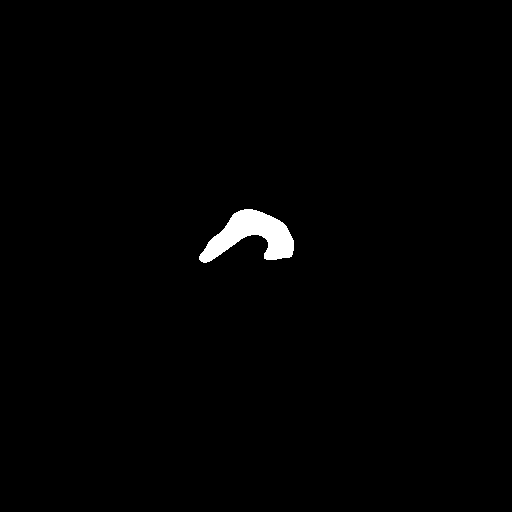

/content/mask_resized/_mask_1689234391_sample-slice048.jpg


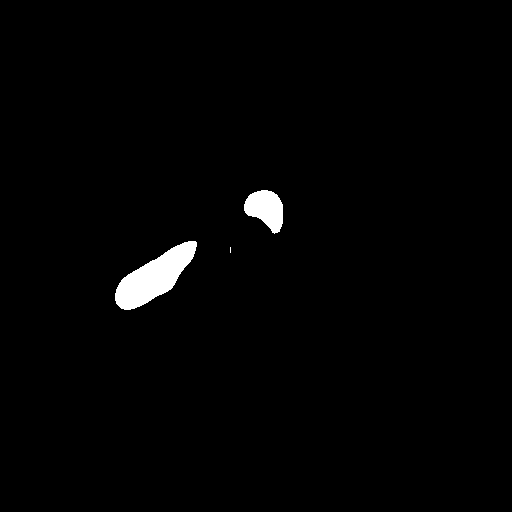

/content/mask_resized/_mask_1689234521_sample-slice019.jpg


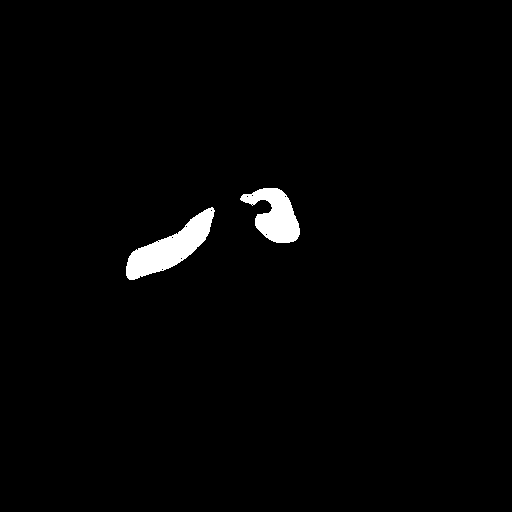

/content/mask_resized/_mask_1689234363_sample-slice045.jpg


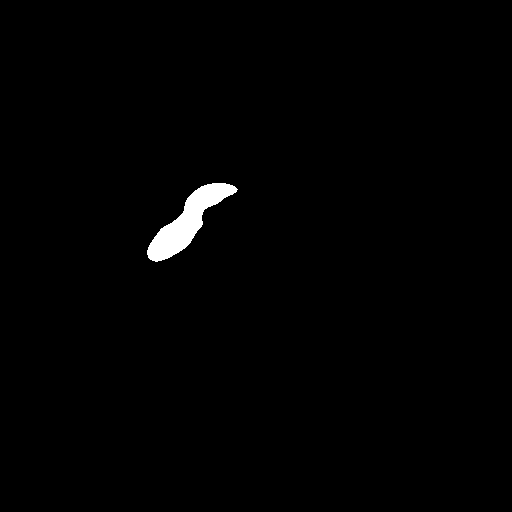

/content/mask_resized/_mask_1689234305_sample-slice047.jpg


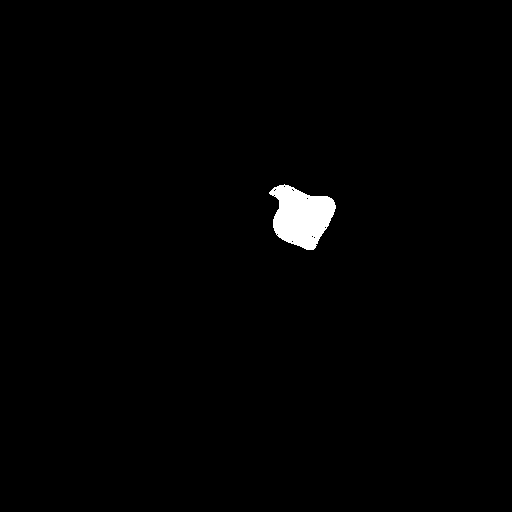

/content/mask_resized/_mask_1689233808_sample-slice049.jpg


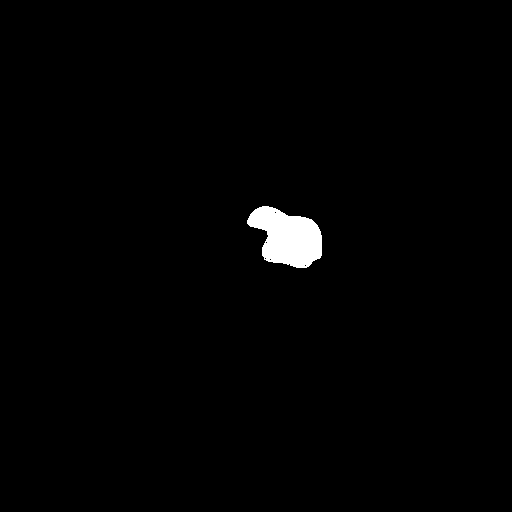

/content/mask_resized/_mask_1689234363_sample-slice031.jpg


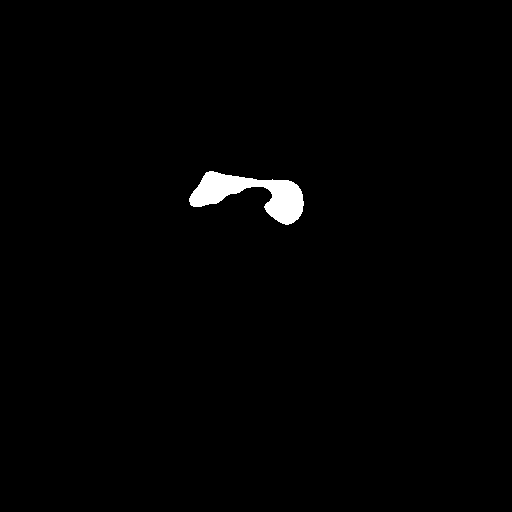

/content/mask_resized/_mask_1689233880_sample-slice054.jpg


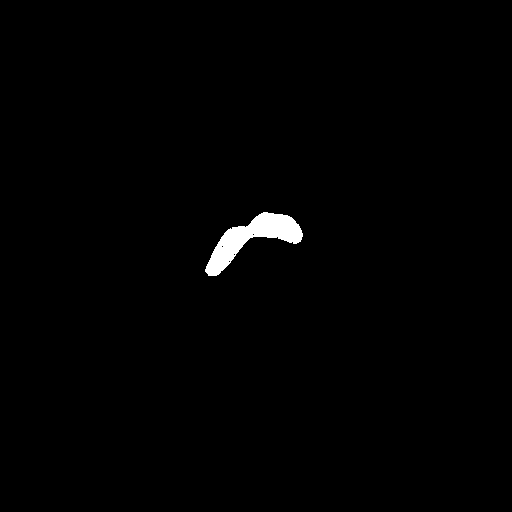

/content/mask_resized/_mask_1689234521_sample-slice023.jpg


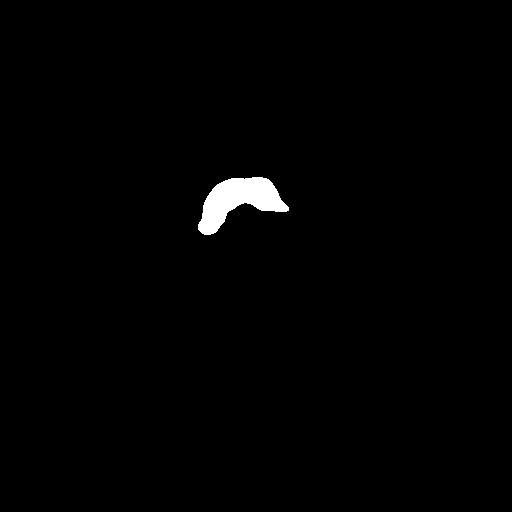

/content/mask_resized/_mask_1689233880_sample-slice057.jpg


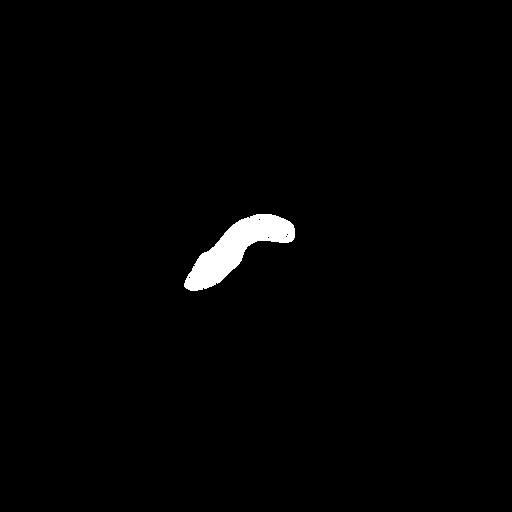

/content/mask_resized/_mask_1689234113_sample-slice038.jpg


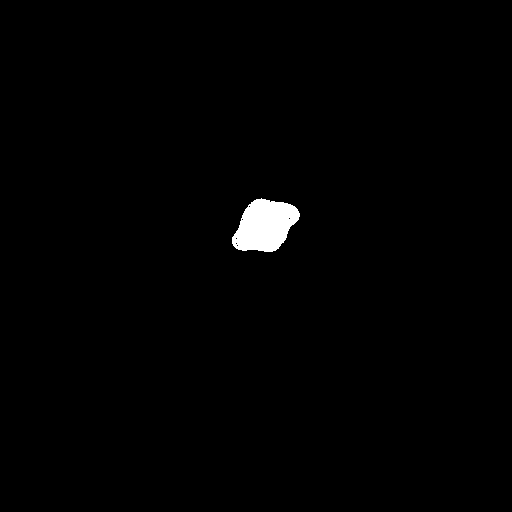

/content/mask_resized/_mask_1689233808_sample-slice039.jpg


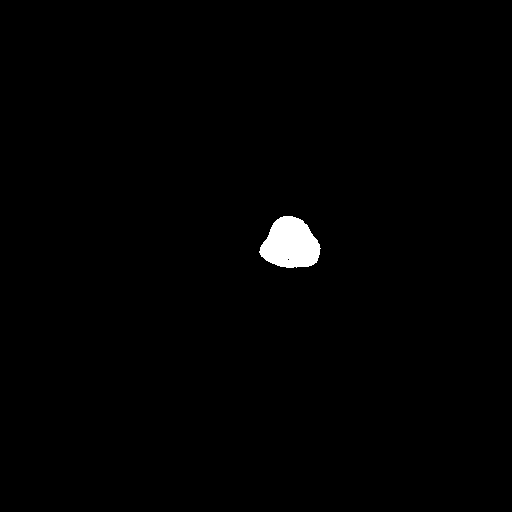

/content/mask_resized/_mask_sample-slice047.jpg


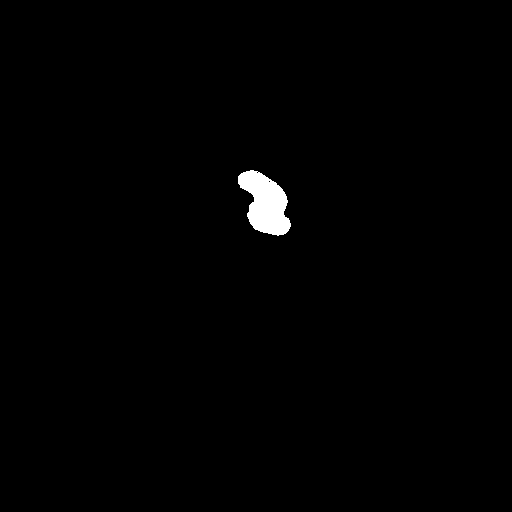

/content/mask_resized/_mask_1689234426_sample-slice036.jpg


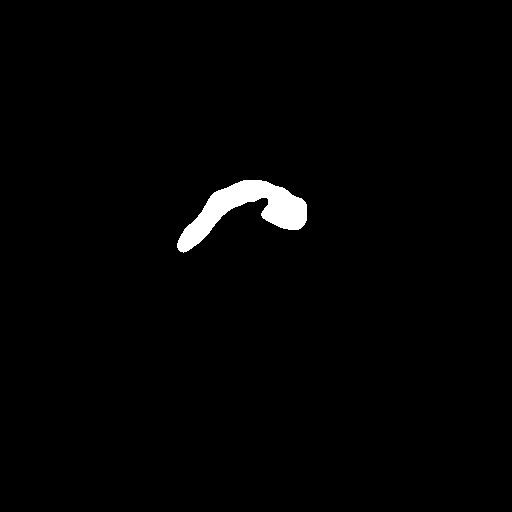

/content/mask_resized/_mask_1689233927_sample-slice042.jpg


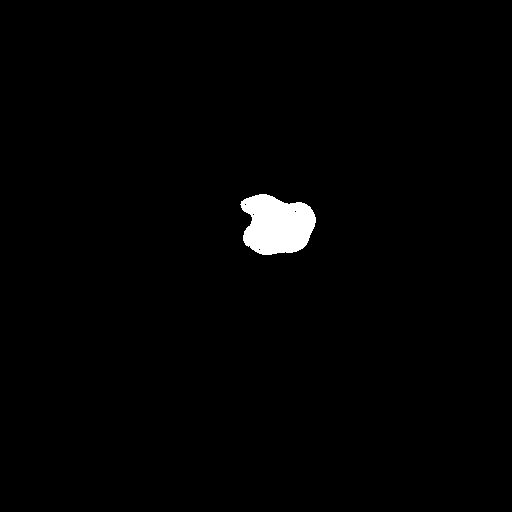

/content/mask_resized/_mask_1689233971_sample-slice093.jpg


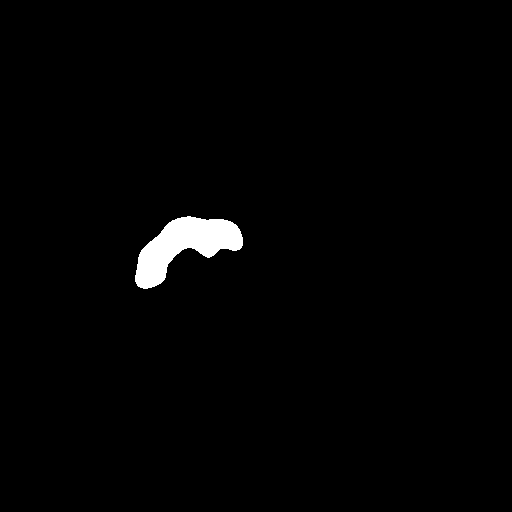

/content/mask_resized/_mask_1689233971_sample-slice094.jpg


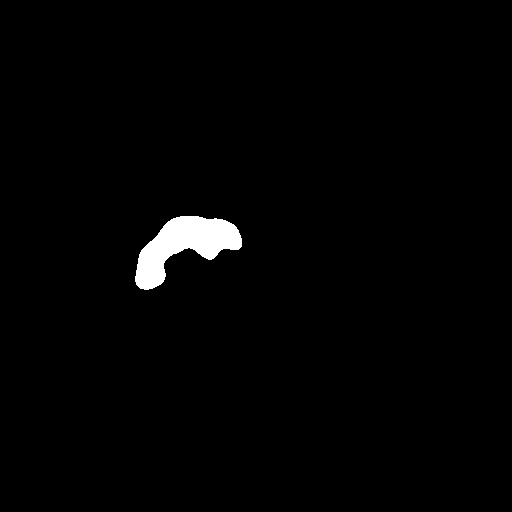

/content/mask_resized/_mask_1689233927_sample-slice045.jpg


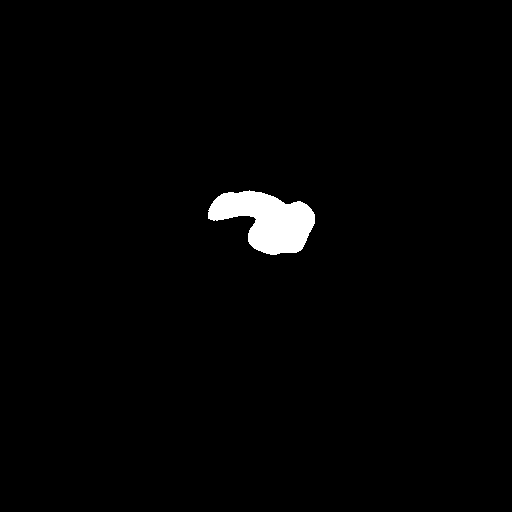

/content/mask_resized/_mask_1689234011_sample-slice046.jpg


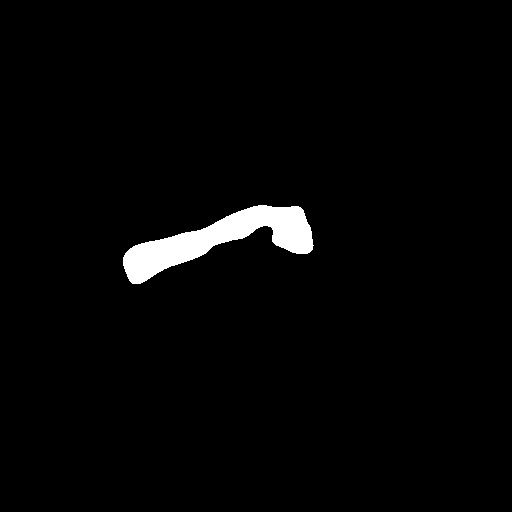

/content/mask_resized/_mask_1689233927_sample-slice052.jpg


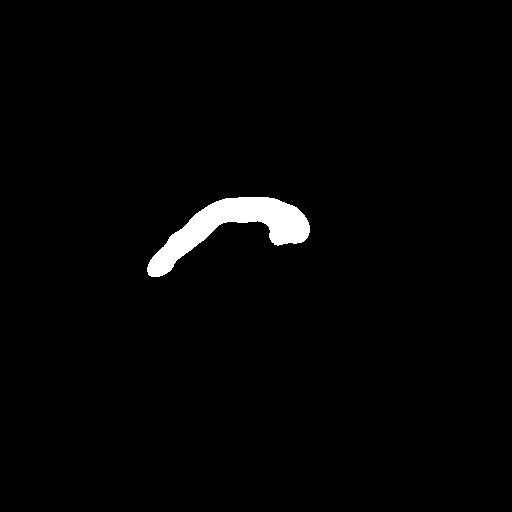

/content/mask_resized/_mask_1689233927_sample-slice044.jpg


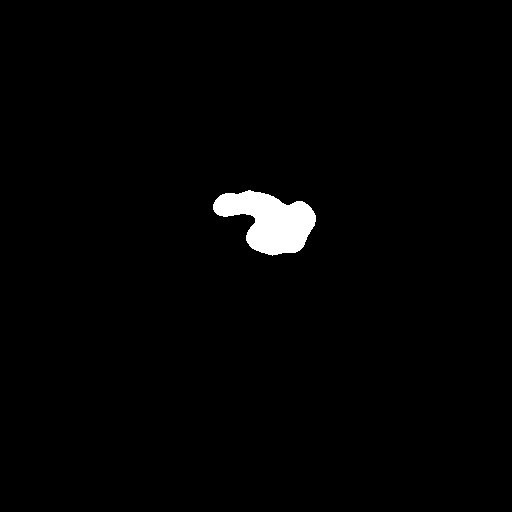

/content/mask_resized/_mask_1689234276_sample-slice042.jpg


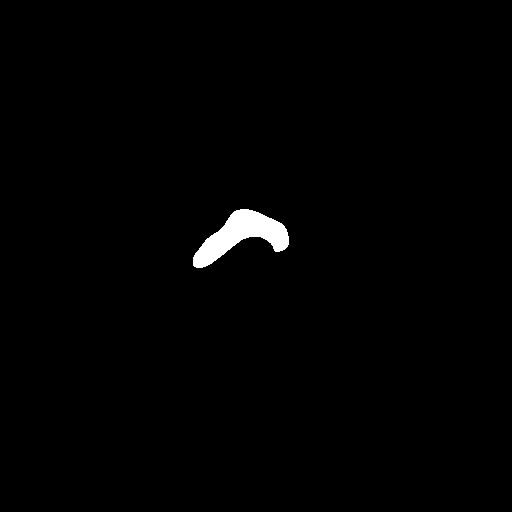

/content/mask_resized/_mask_1689234011_sample-slice052.jpg


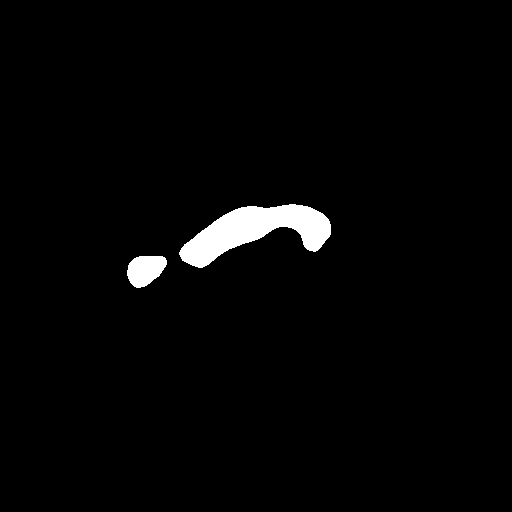

/content/mask_resized/_mask_1689233927_sample-slice048.jpg


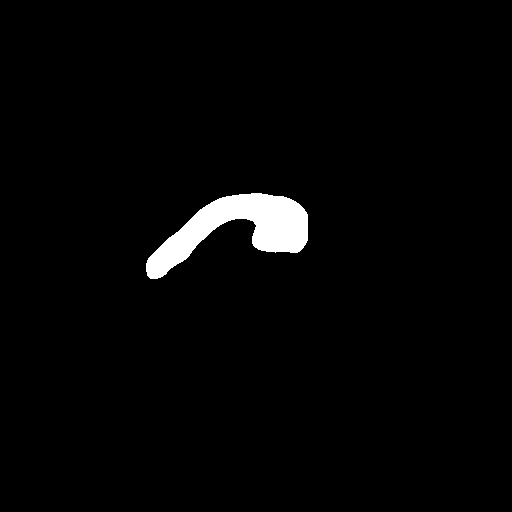

/content/mask_resized/_mask_1689234363_sample-slice038.jpg


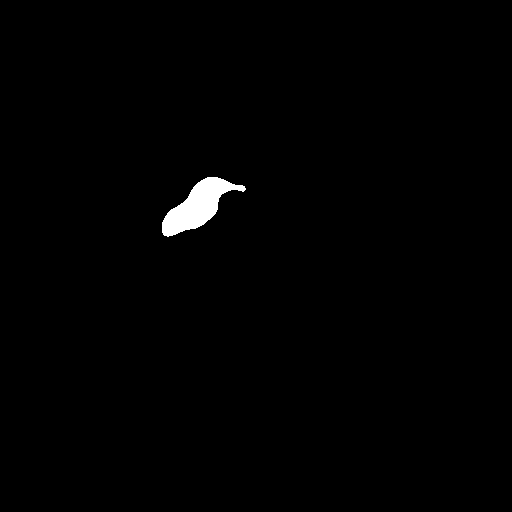

/content/mask_resized/_mask_1689234335_sample-slice035.jpg


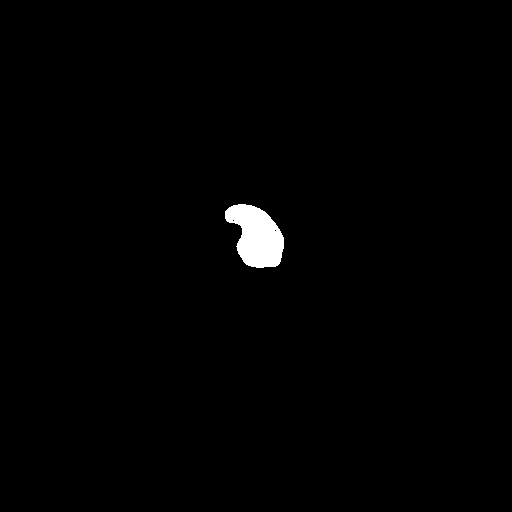

/content/mask_resized/_mask_1689233971_sample-slice095.jpg


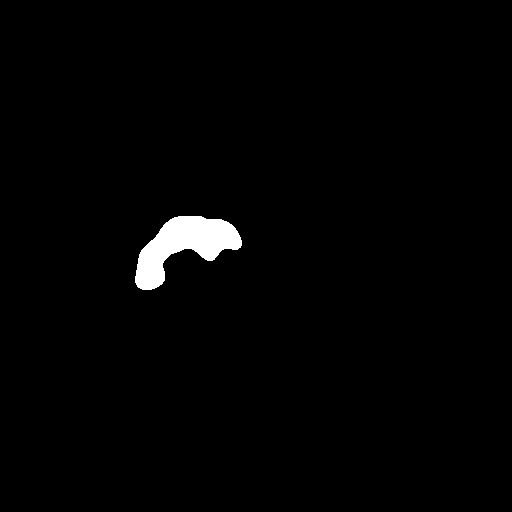

/content/mask_resized/_mask_1689234469_sample-slice045.jpg


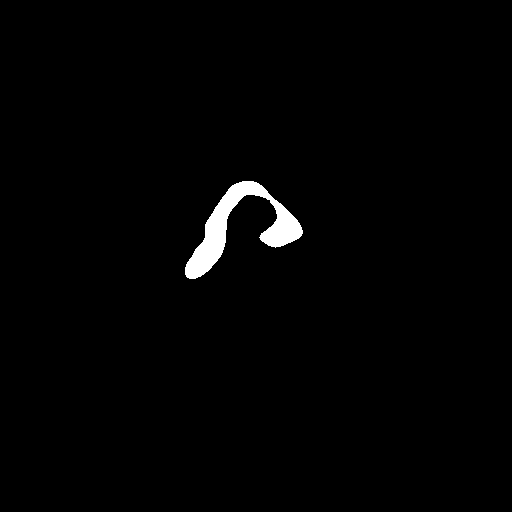

/content/mask_resized/_mask_1689233808_sample-slice054.jpg


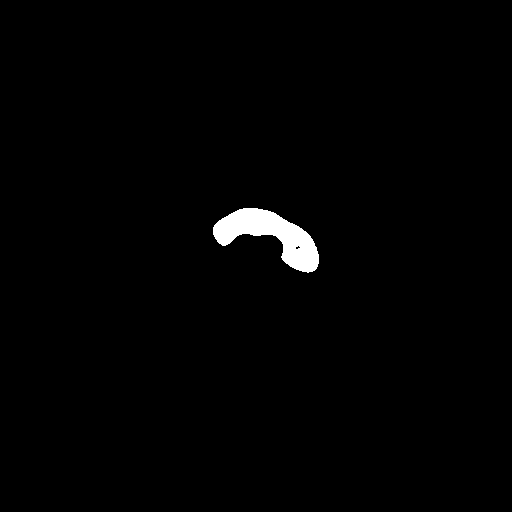

/content/mask_resized/_mask_sample-slice046.jpg


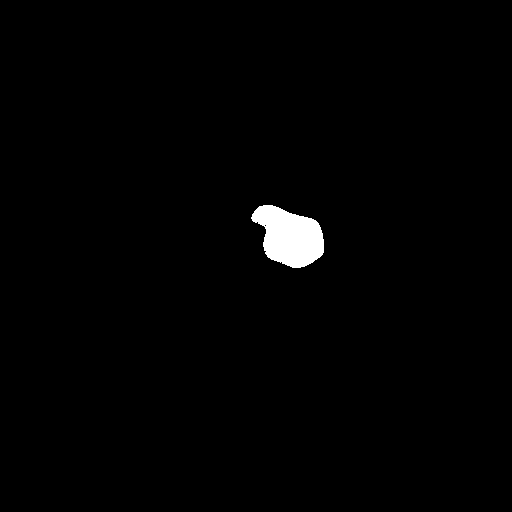

/content/mask_resized/_mask_1689234363_sample-slice024.jpg


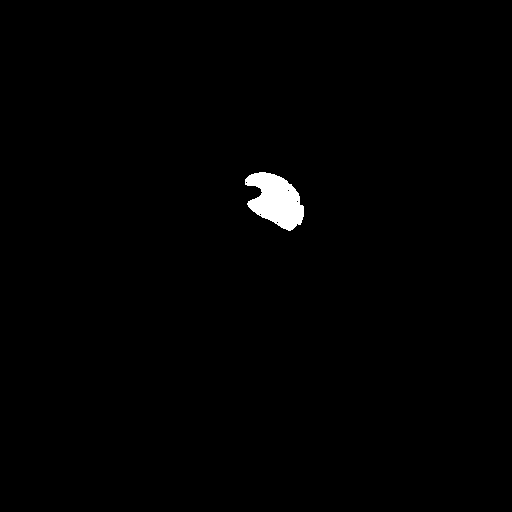

/content/mask_resized/_mask_1689234391_sample-slice057.jpg


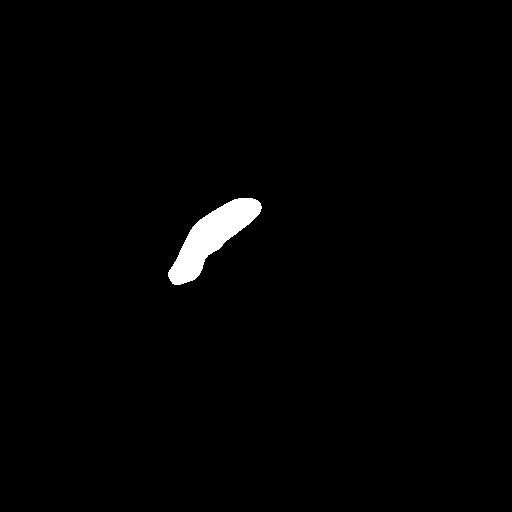

/content/mask_resized/_mask_1689233971_sample-slice099.jpg


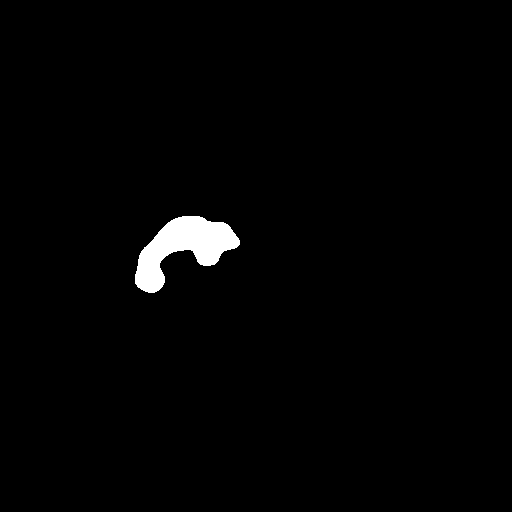

/content/mask_resized/_mask_1689234074_sample-slice049.jpg


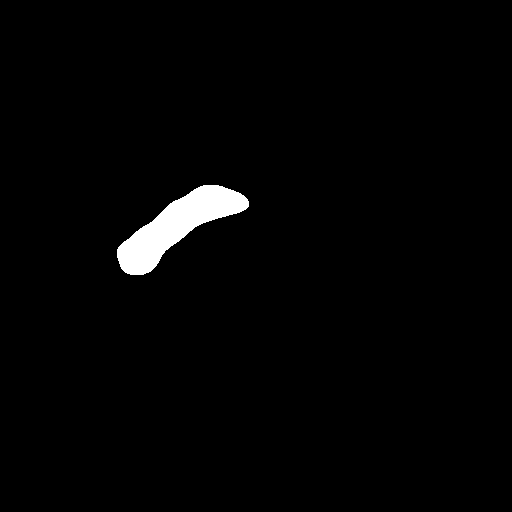

/content/mask_resized/_mask_1689233927_sample-slice050.jpg


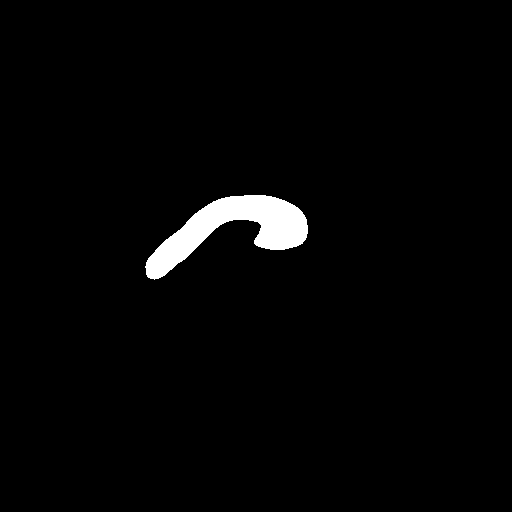

/content/mask_resized/_mask_1689233808_sample-slice046.jpg


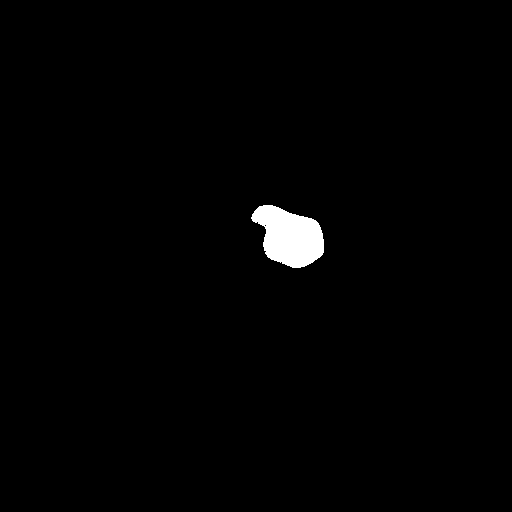

/content/mask_resized/_mask_1689233971_sample-slice097.jpg


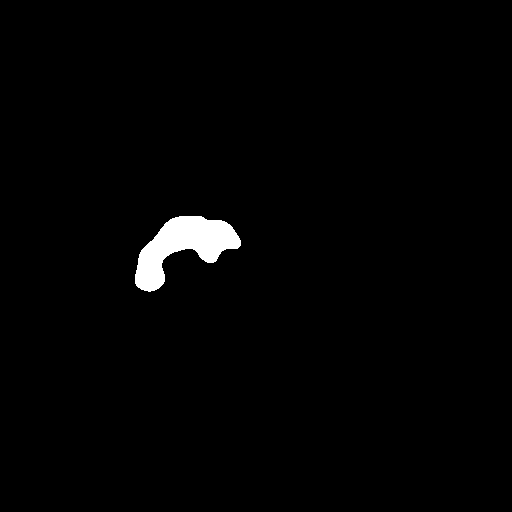

/content/mask_resized/_mask_1689234494_sample-slice013.jpg


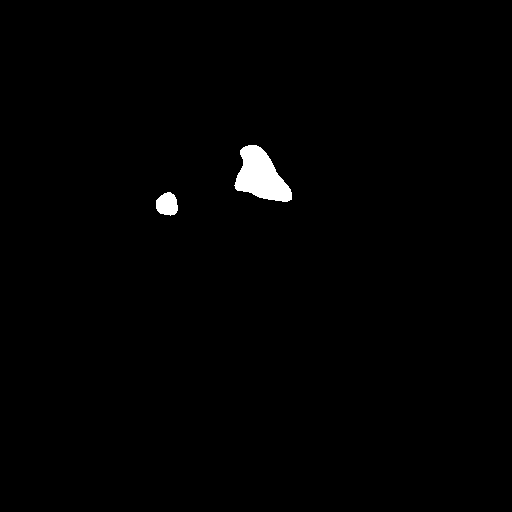

/content/mask_resized/_mask_1689234521_sample-slice022.jpg


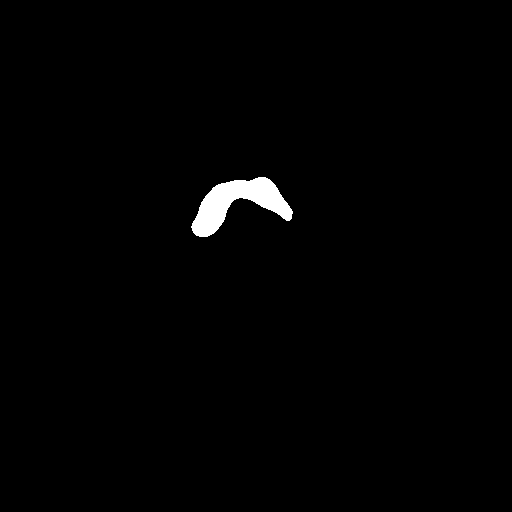

/content/mask_resized/_mask_1689234426_sample-slice039.jpg


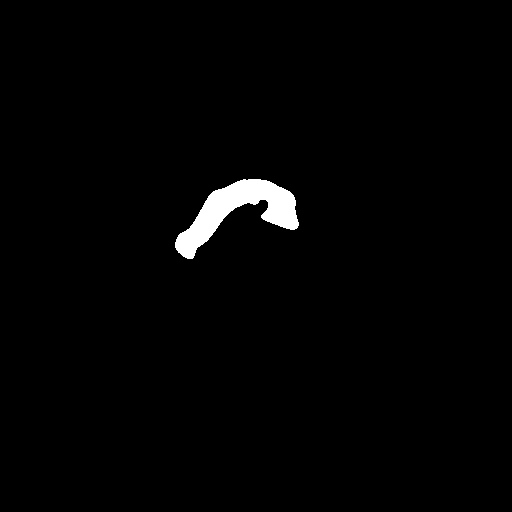

/content/mask_resized/_mask_1689234494_sample-slice015.jpg


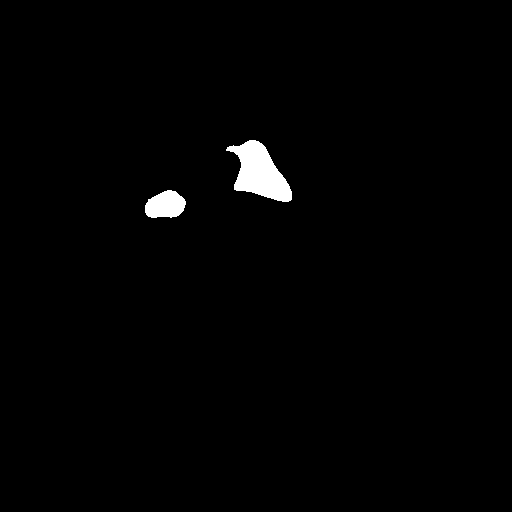

/content/mask_resized/_mask_1689233971_sample-slice101.jpg


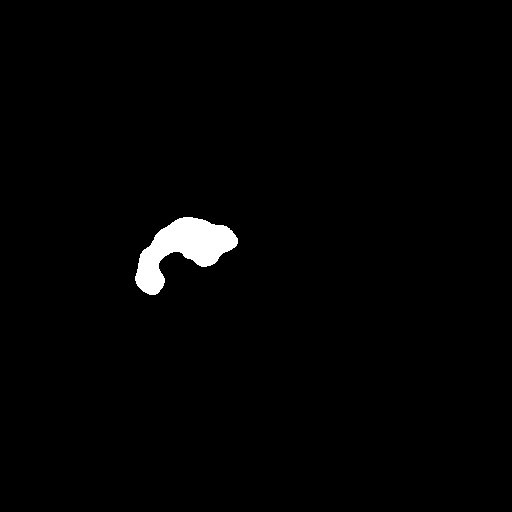

/content/mask_resized/_mask_1689233808_sample-slice059.jpg


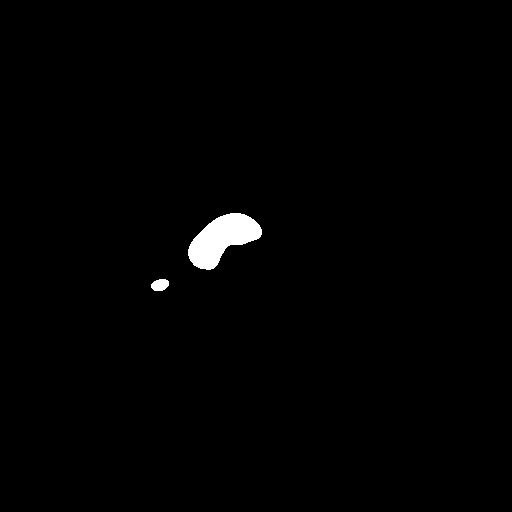

/content/mask_resized/_mask_1689233927_sample-slice051.jpg


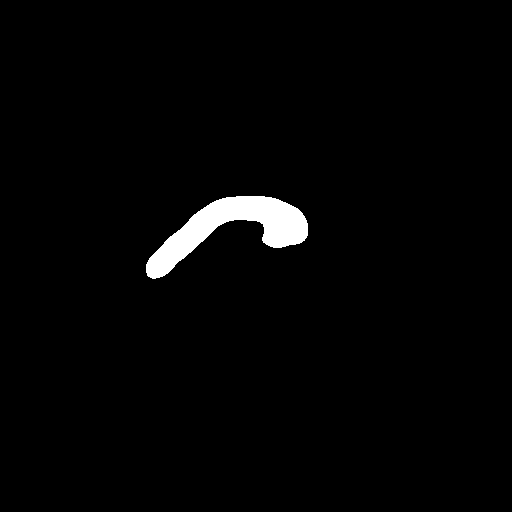

/content/mask_resized/_mask_1689234363_sample-slice044.jpg


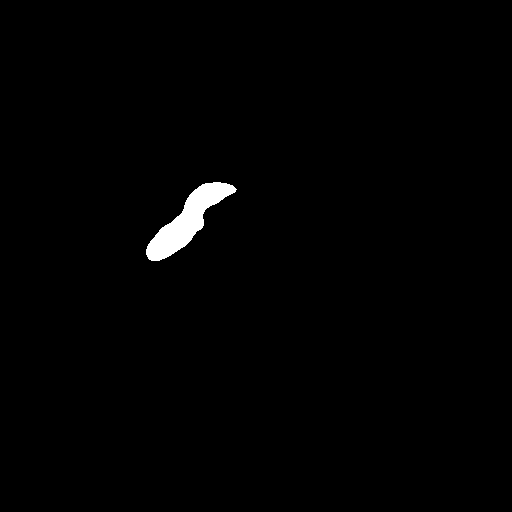

/content/mask_resized/_mask_1689234305_sample-slice048.jpg


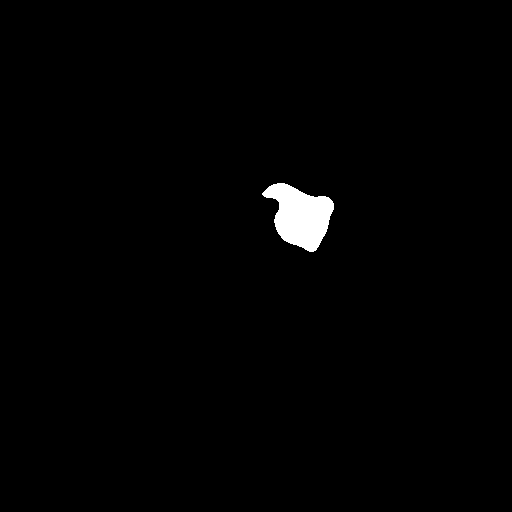

/content/mask_resized/_mask_1689234011_sample-slice049.jpg


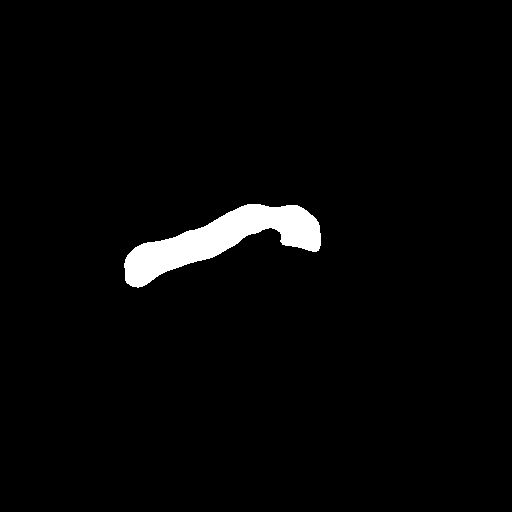

/content/mask_resized/_mask_1689234305_sample-slice054.jpg


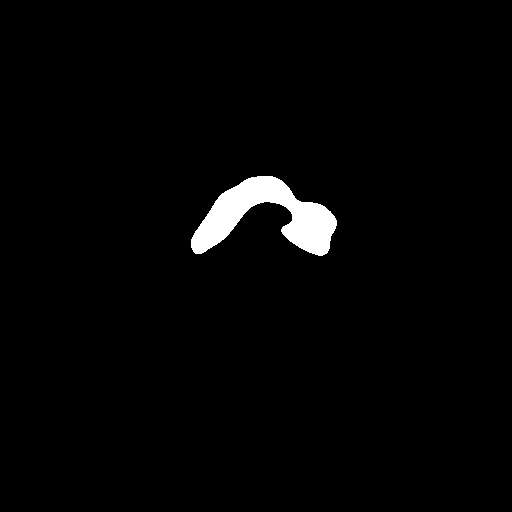

/content/mask_resized/_mask_1689233971_sample-slice096.jpg


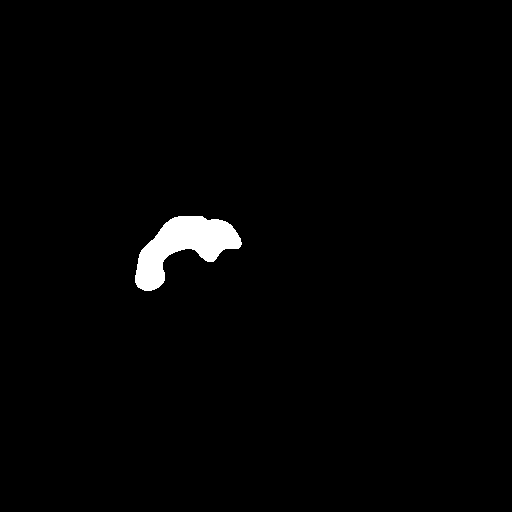

/content/mask_resized/_mask_1689234305_sample-slice053.jpg


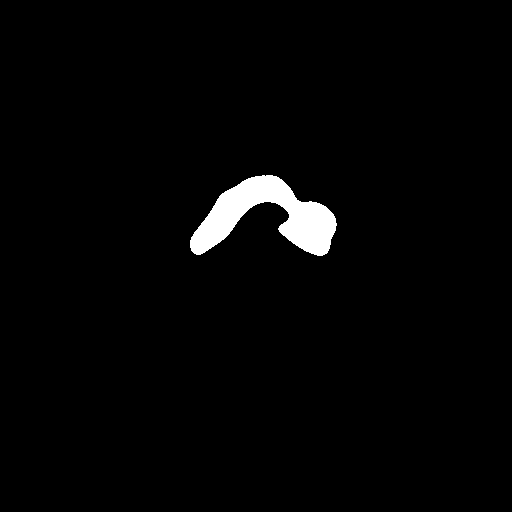

/content/mask_resized/_mask_1689234521_sample-slice021.jpg


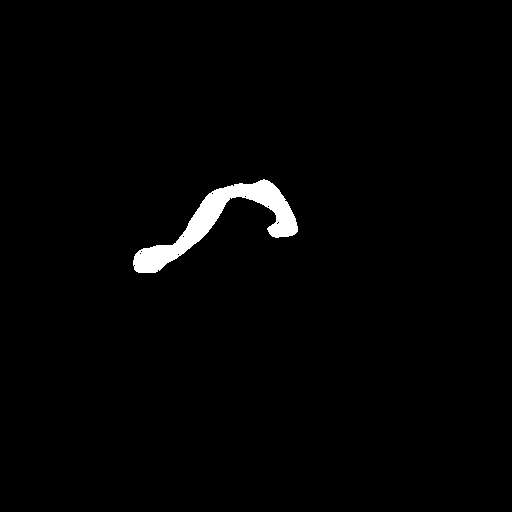

/content/mask_resized/_mask_1689233927_sample-slice040.jpg


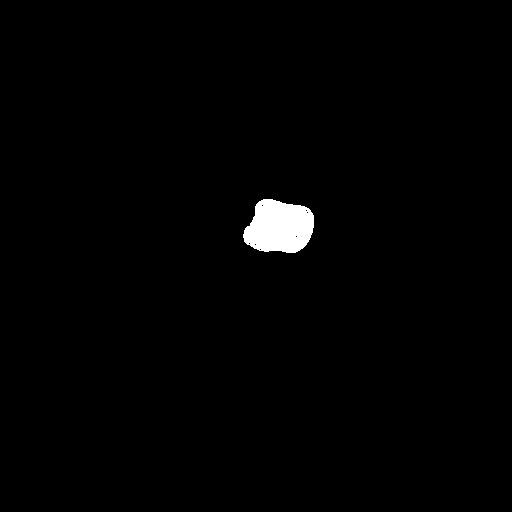

/content/mask_resized/_mask_1689234074_sample-slice047.jpg


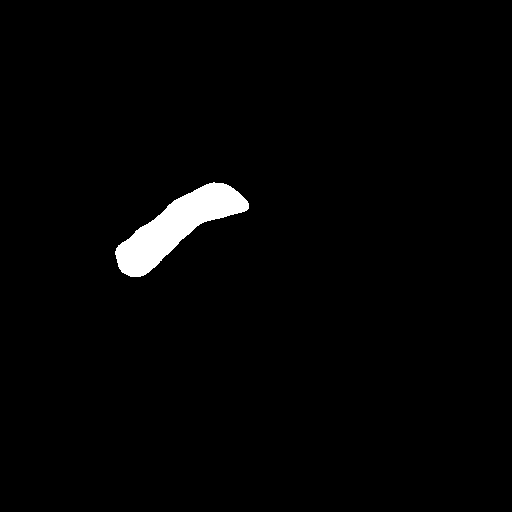

/content/mask_resized/_mask_1689233971_sample-slice047.jpg


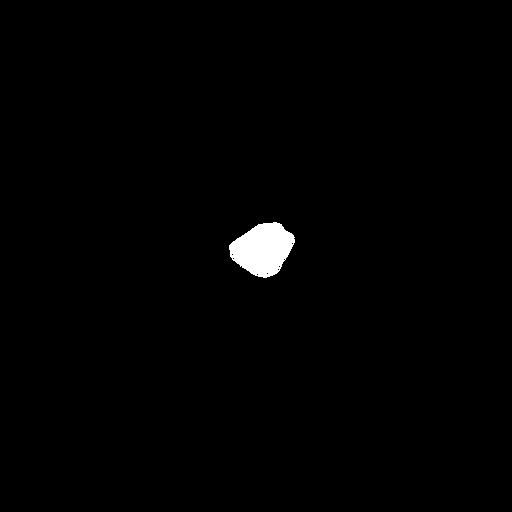

/content/mask_resized/_mask_1689233971_sample-slice092.jpg


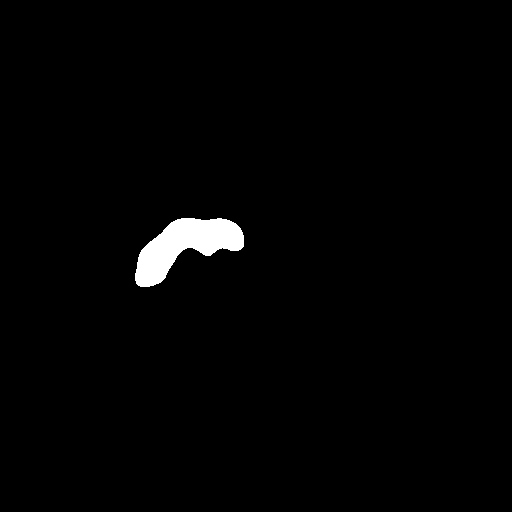

/content/mask_resized/_mask_1689234011_sample-slice043.jpg


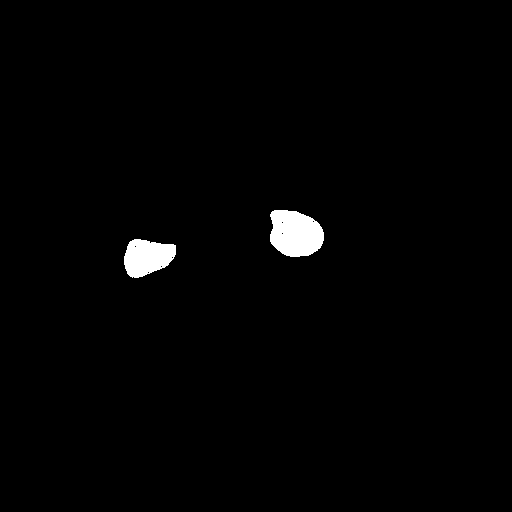

/content/mask_resized/_mask_1689233808_sample-slice065.jpg


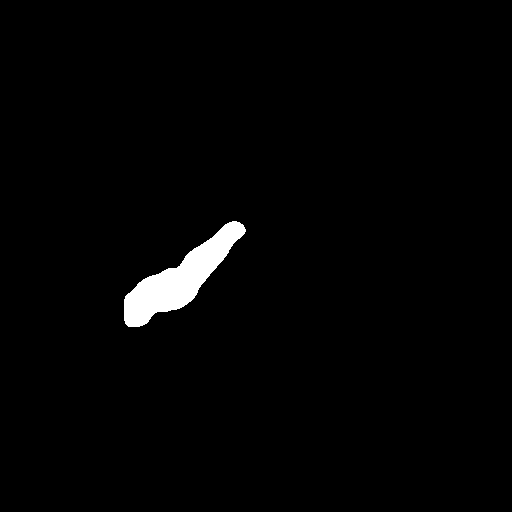

/content/mask_resized/_mask_1689234113_sample-slice037.jpg


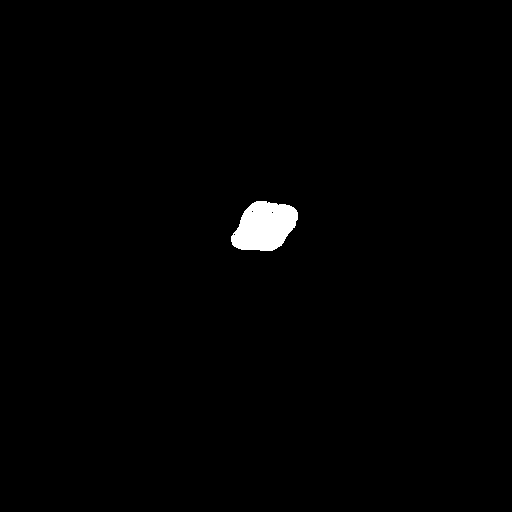

/content/mask_resized/_mask_1689234335_sample-slice051.jpg


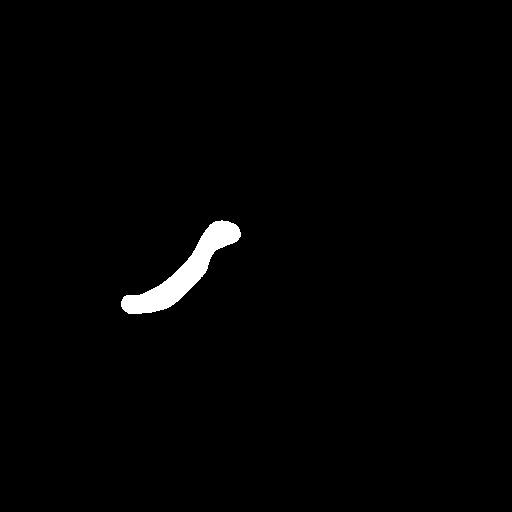

/content/mask_resized/_mask_1689234276_sample-slice044.jpg


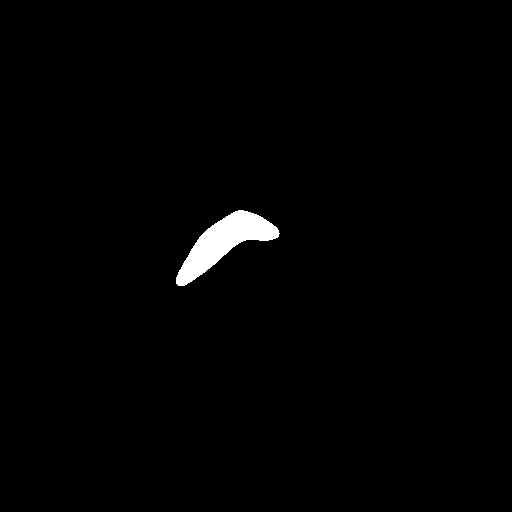

/content/mask_resized/_mask_1689234305_sample-slice050.jpg


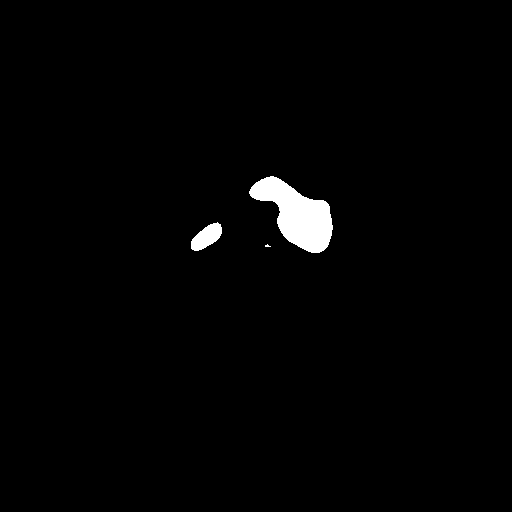

/content/mask_resized/_mask_1689234335_sample-slice047.jpg


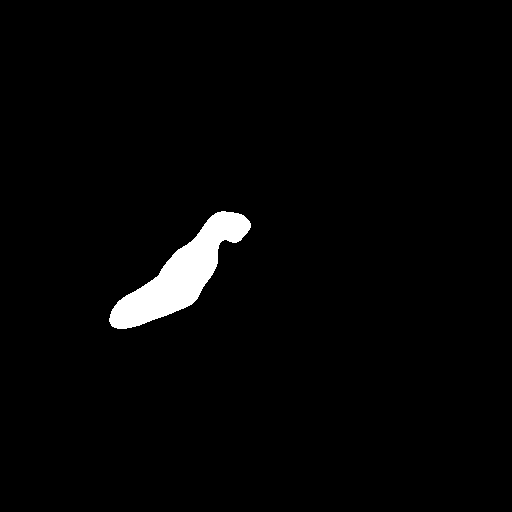

/content/mask_resized/_mask_1689234334_sample-slice048.jpg


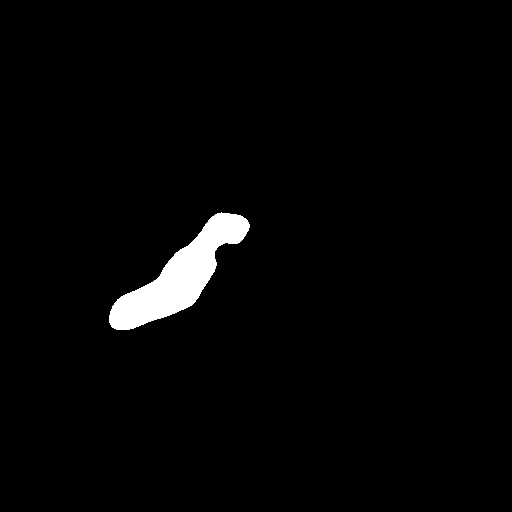

/content/mask_resized/_mask_1689234244_sample-slice050.jpg


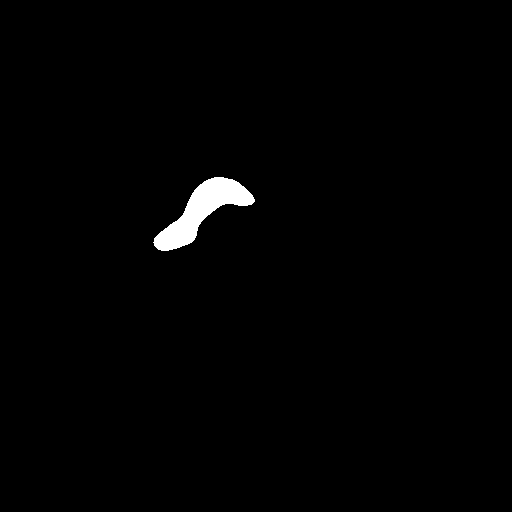

/content/mask_resized/_mask_1689233971_sample-slice046.jpg


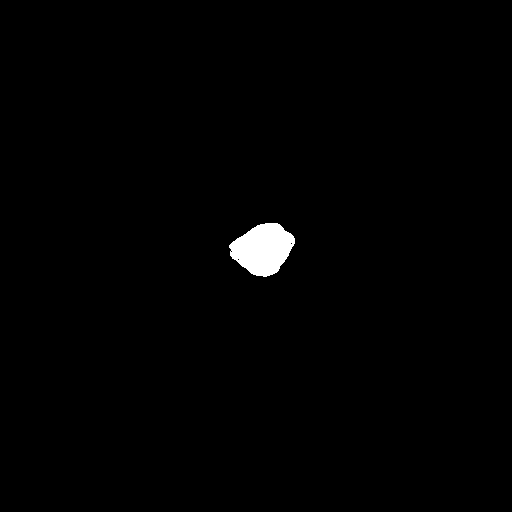

/content/mask_resized/_mask_1689234391_sample-slice040.jpg


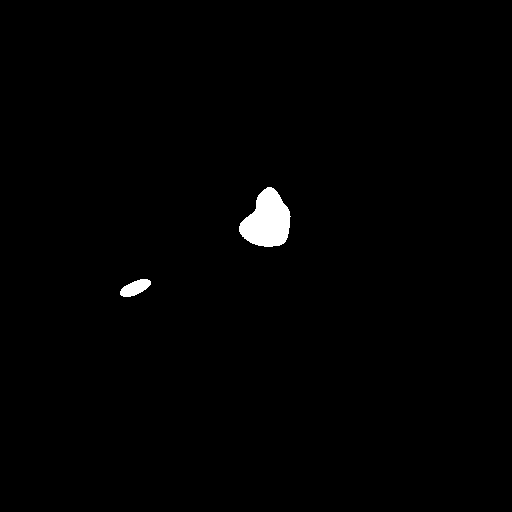

/content/mask_resized/_mask_1689234521_sample-slice020.jpg


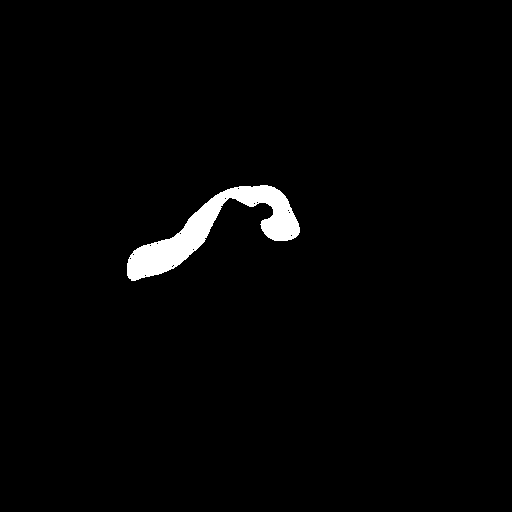

/content/mask_resized/_mask_sample-slice052.jpg


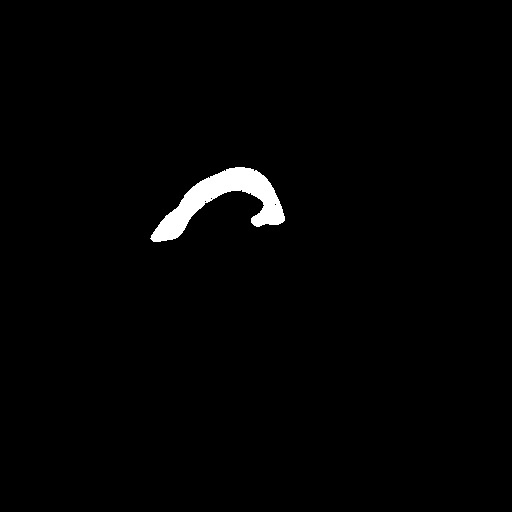

/content/mask_resized/_mask_1689234039_sample-slice037.jpg


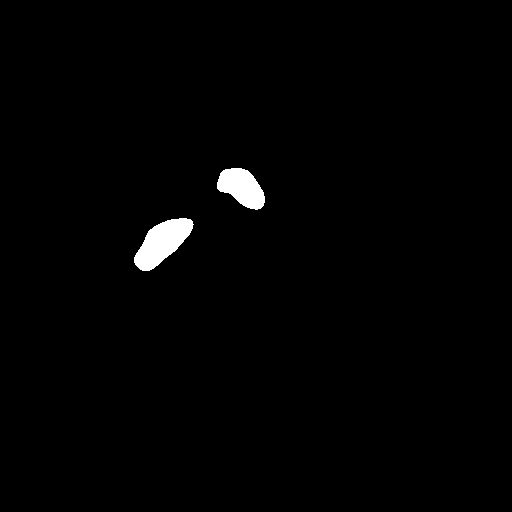

/content/mask_resized/_mask_1689234391_sample-slice029.jpg


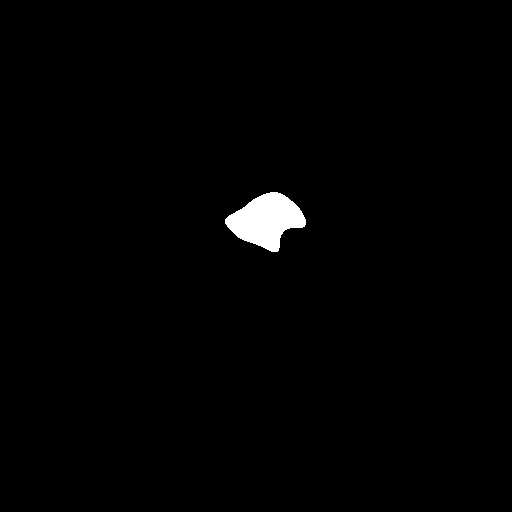

/content/mask_resized/_mask_1689233808_sample-slice040.jpg


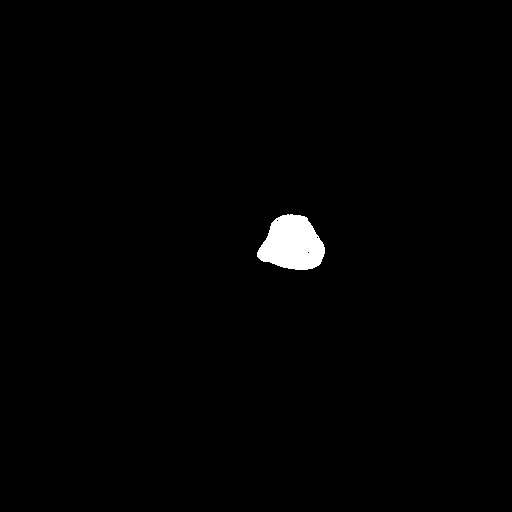

/content/mask_resized/_mask_1689234391_sample-slice031.jpg


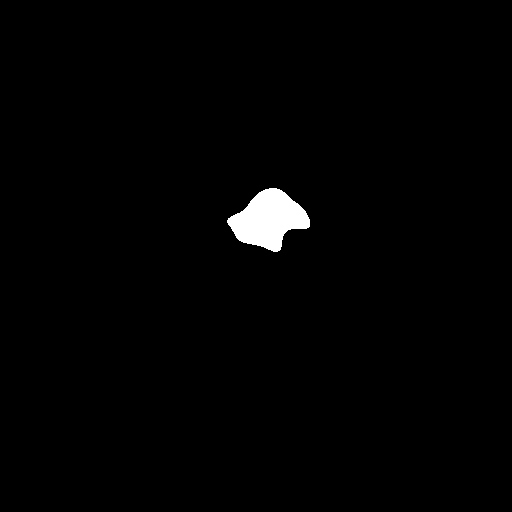

/content/mask_resized/_mask_1689234363_sample-slice042.jpg


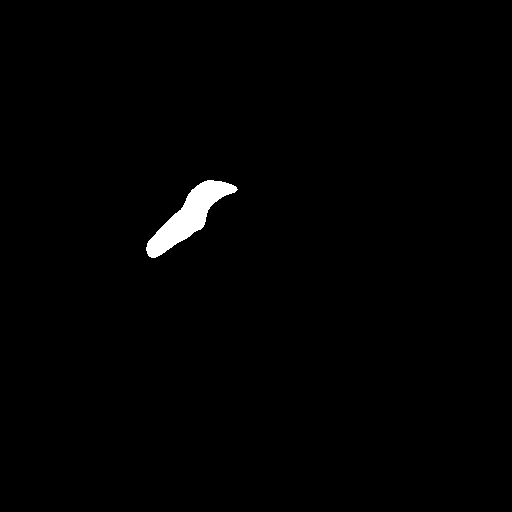

/content/mask_resized/_mask_1689234363_sample-slice026.jpg


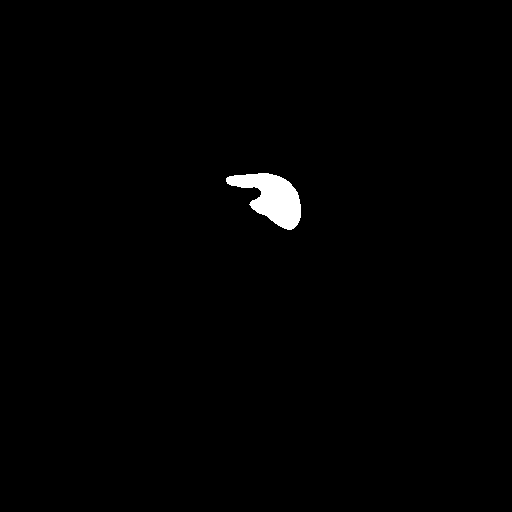

/content/mask_resized/_mask_1689234074_sample-slice052.jpg


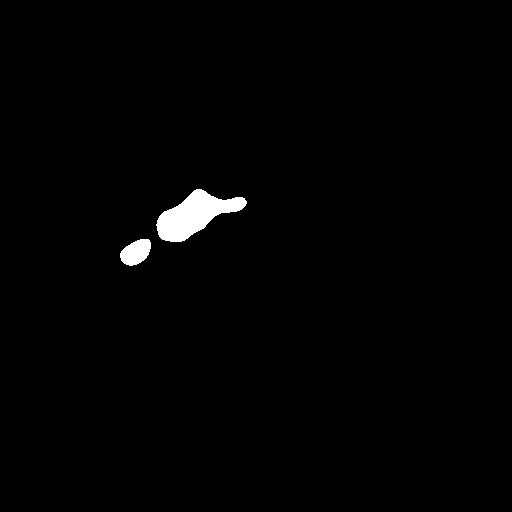

/content/mask_resized/_mask_1689233971_sample-slice045.jpg


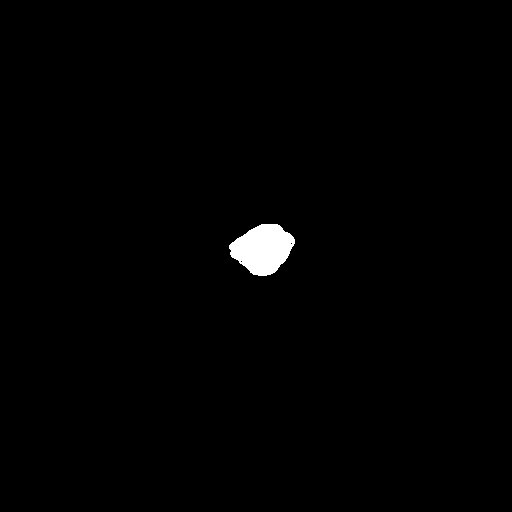

/content/mask_resized/_mask_1689233808_sample-slice042.jpg


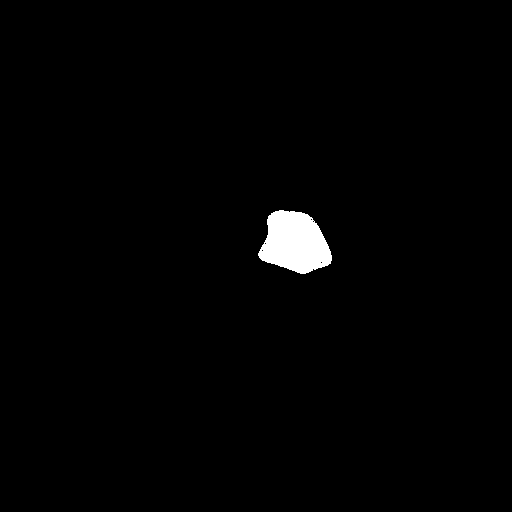

/content/mask_resized/_mask_1689234244_sample-slice049.jpg


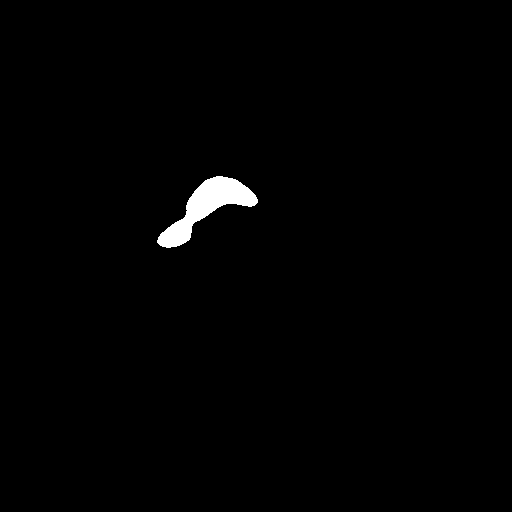

/content/mask_resized/_mask_1689233808_sample-slice062.jpg


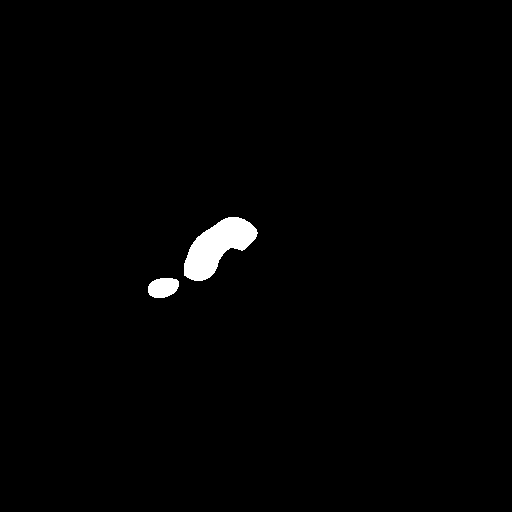

/content/mask_resized/_mask_1689233808_sample-slice045.jpg


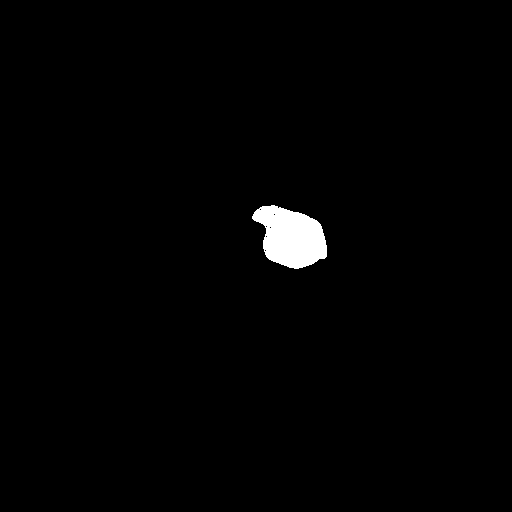

/content/mask_resized/_mask_1689234039_sample-slice041.jpg


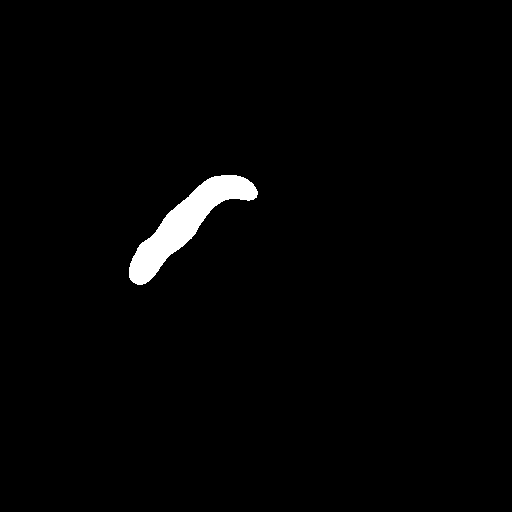

/content/mask_resized/_mask_1689234391_sample-slice043.jpg


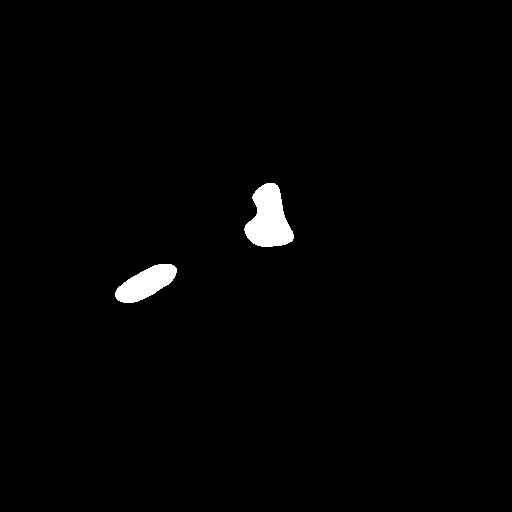

/content/mask_resized/_mask_1689234074_sample-slice051.jpg


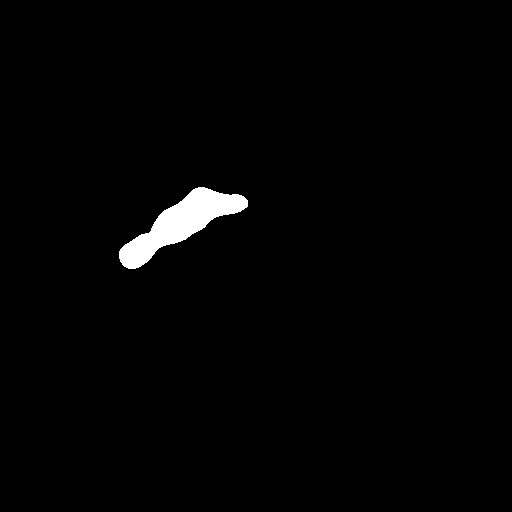

/content/mask_resized/_mask_1689234494_sample-slice018.jpg


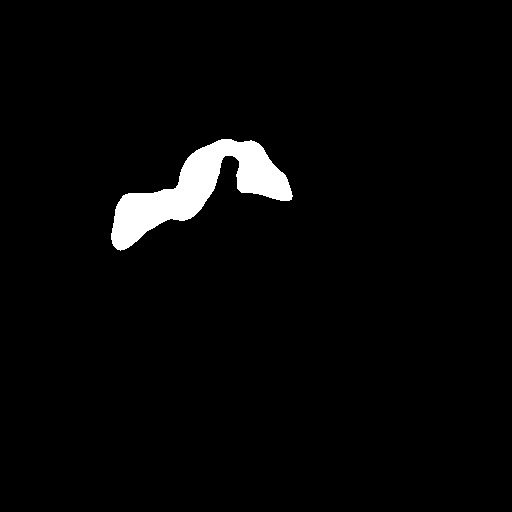

/content/mask_resized/_mask_sample-slice039.jpg


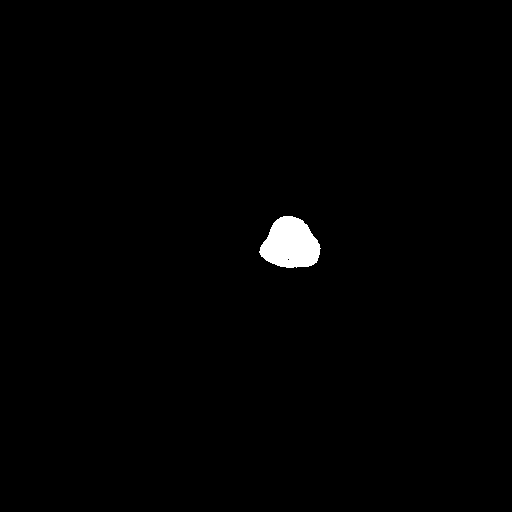

/content/mask_resized/_mask_sample-slice057.jpg


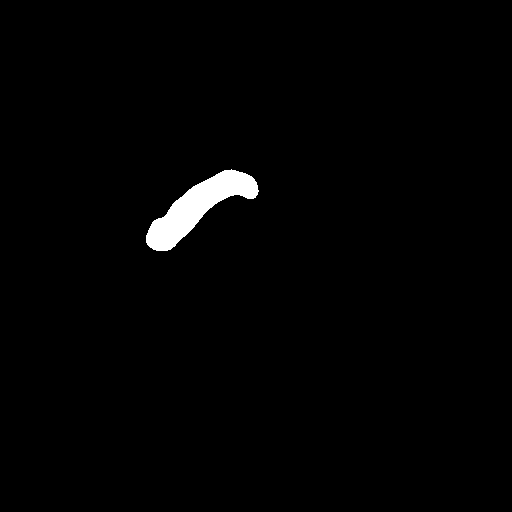

/content/mask_resized/_mask_1689234011_sample-slice053.jpg


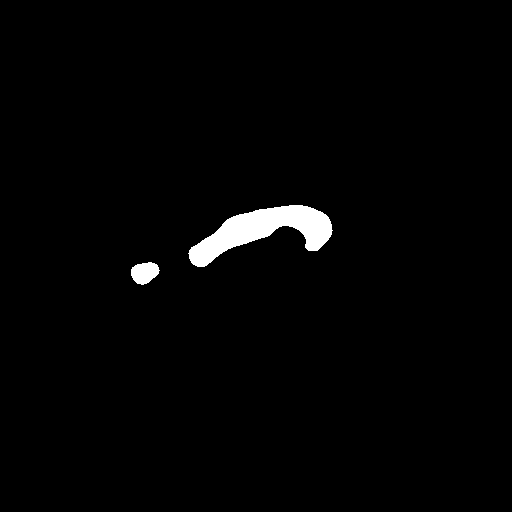

/content/mask_resized/_mask_1689234305_sample-slice039.jpg


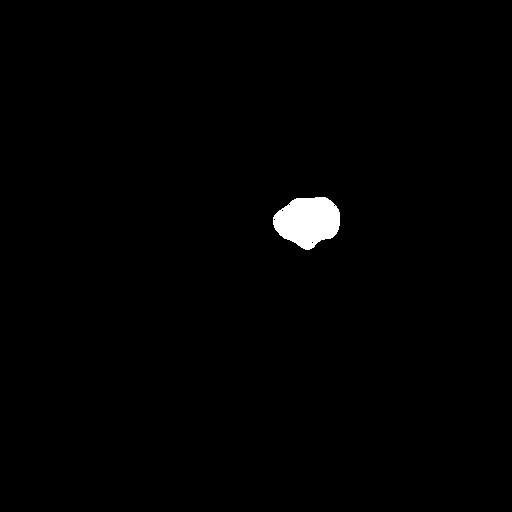

/content/mask_resized/_mask_1689234363_sample-slice046.jpg


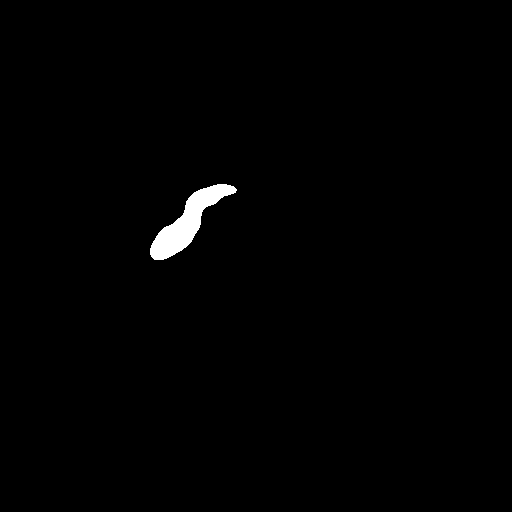

/content/mask_resized/_mask_1689233808_sample-slice047.jpg


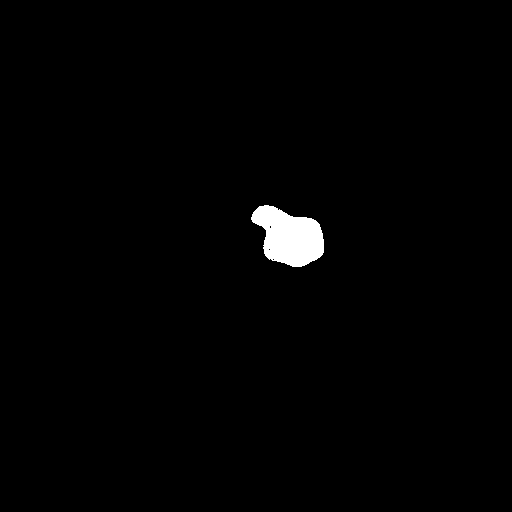

/content/mask_resized/_mask_1689233808_sample-slice050.jpg


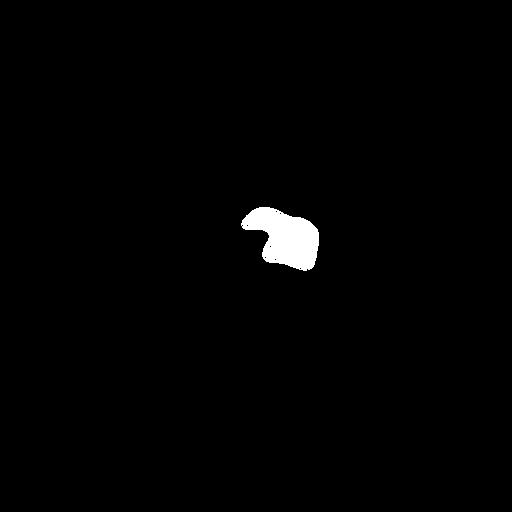

/content/mask_resized/_mask_1689234363_sample-slice027.jpg


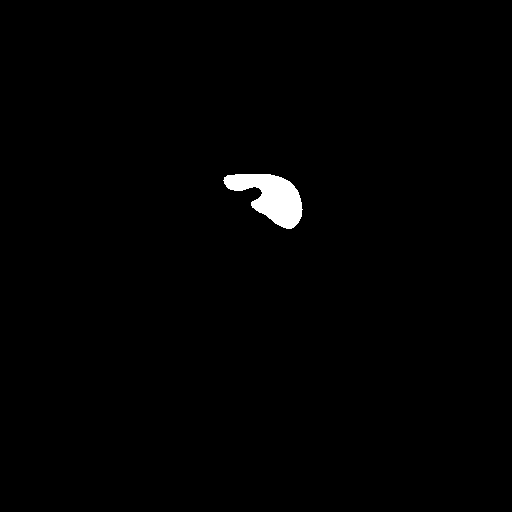

/content/mask_resized/_mask_1689234305_sample-slice055.jpg


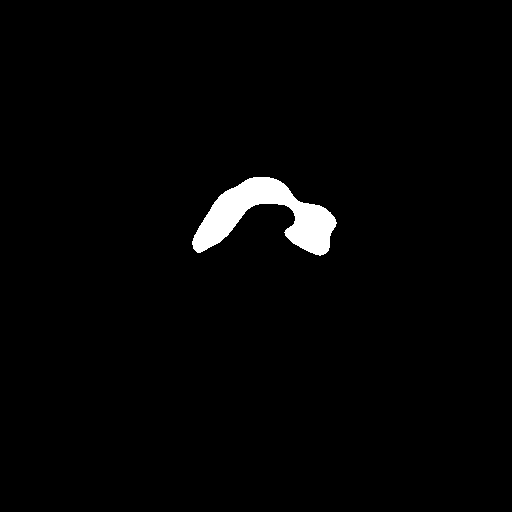

/content/mask_resized/_mask_sample-slice059.jpg


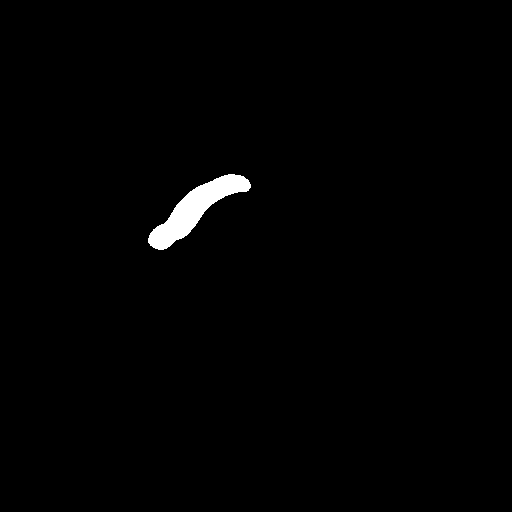

/content/mask_resized/_mask_1689234011_sample-slice051.jpg


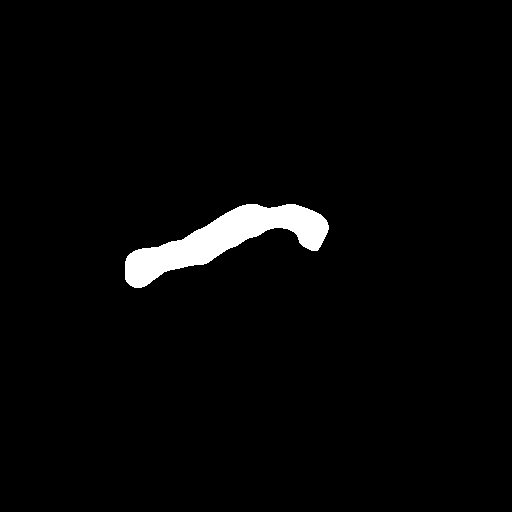

/content/mask_resized/_mask_1689234469_sample-slice050.jpg


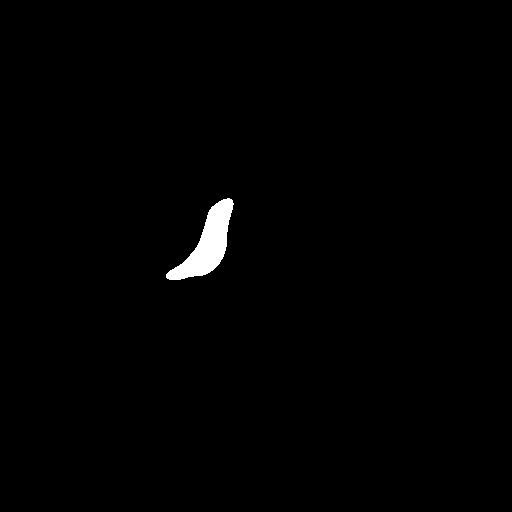

/content/mask_resized/_mask_sample-slice061.jpg


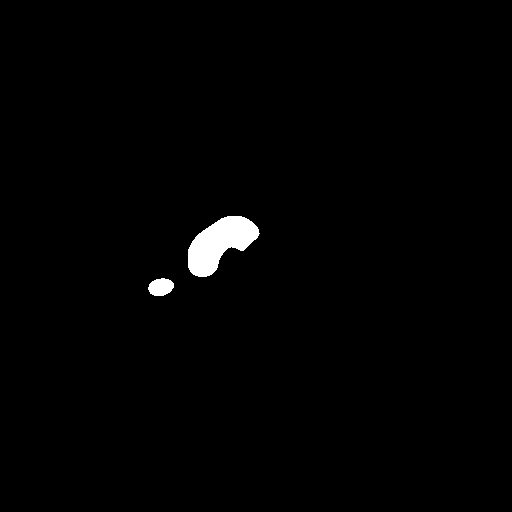

/content/mask_resized/_mask_1689234074_sample-slice042.jpg


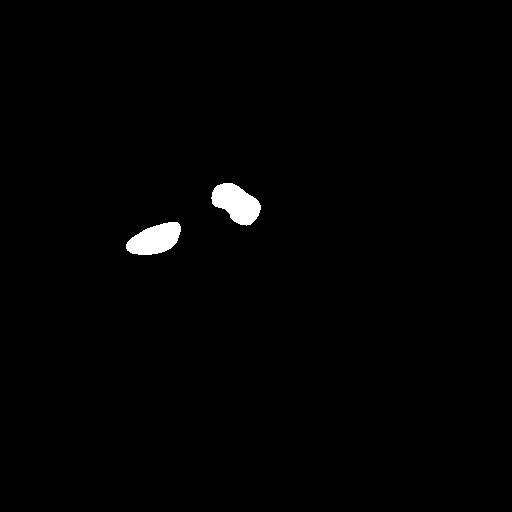

/content/mask_resized/_mask_1689234363_sample-slice021.jpg


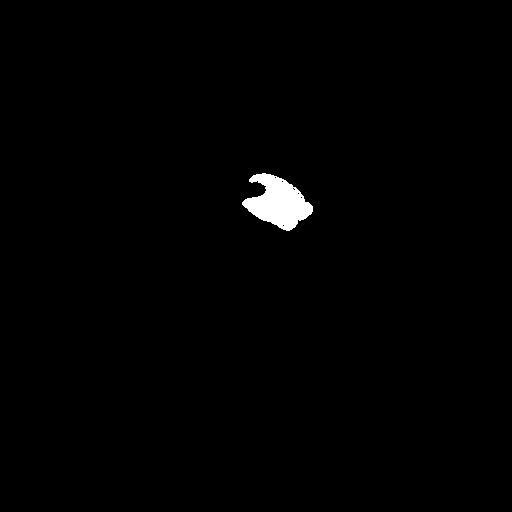

/content/mask_resized/_mask_sample-slice067.jpg


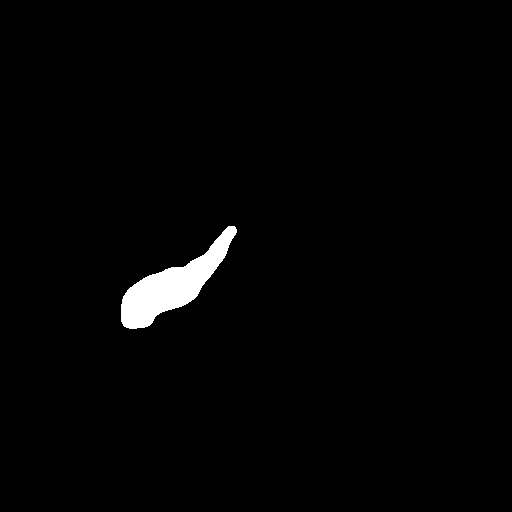

/content/mask_resized/_mask_1689234363_sample-slice030.jpg


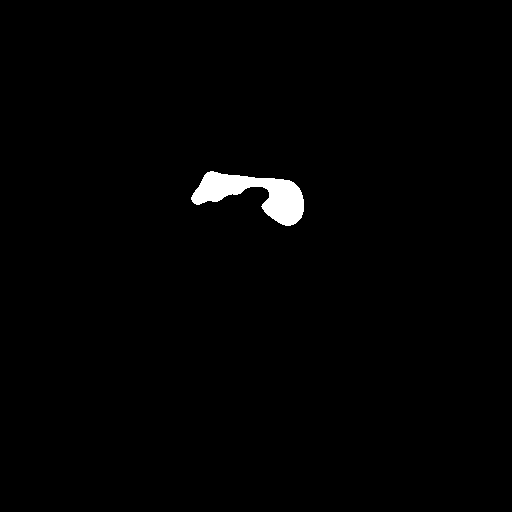

/content/mask_resized/_mask_1689233808_sample-slice064.jpg


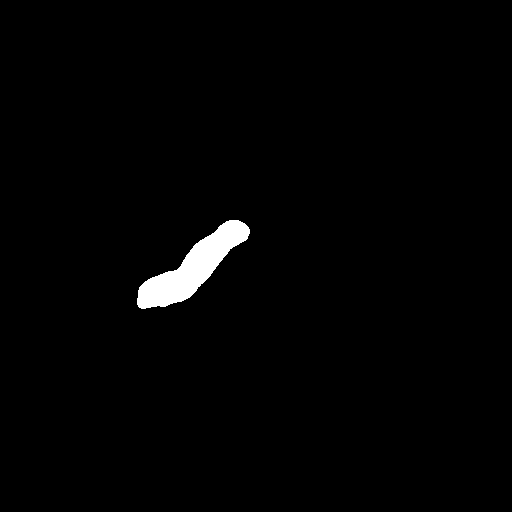

/content/mask_resized/_mask_1689233927_sample-slice046.jpg


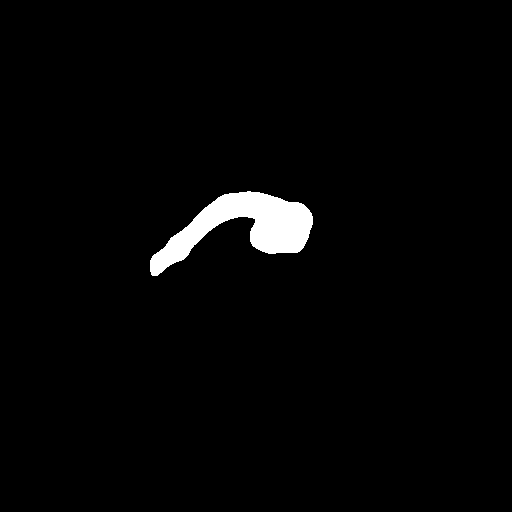

/content/mask_resized/_mask_sample-slice041.jpg


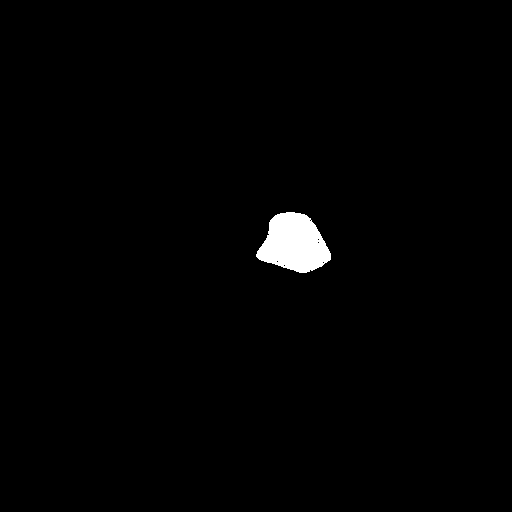

/content/mask_resized/_mask_1689234039_sample-slice036.jpg


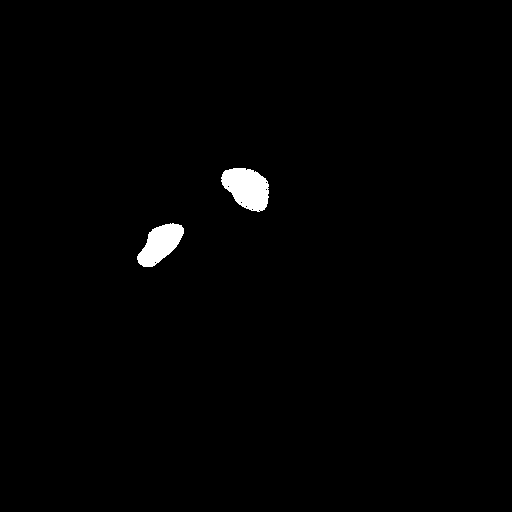

/content/mask_resized/_mask_1689233808_sample-slice066.jpg


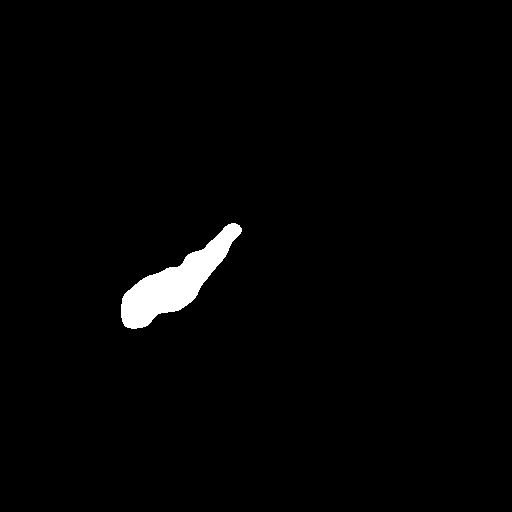

/content/mask_resized/_mask_1689233927_sample-slice041.jpg


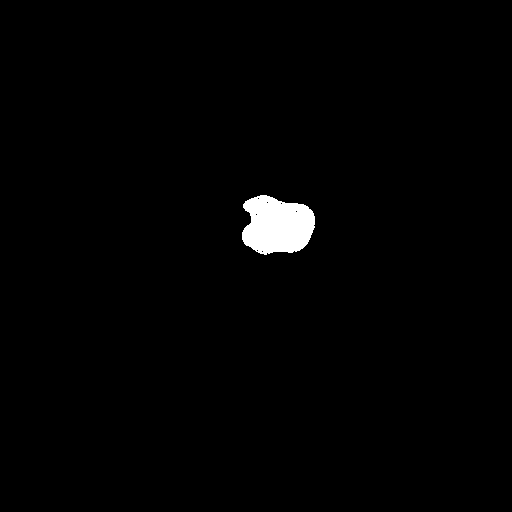

/content/mask_resized/_mask_sample-slice058.jpg


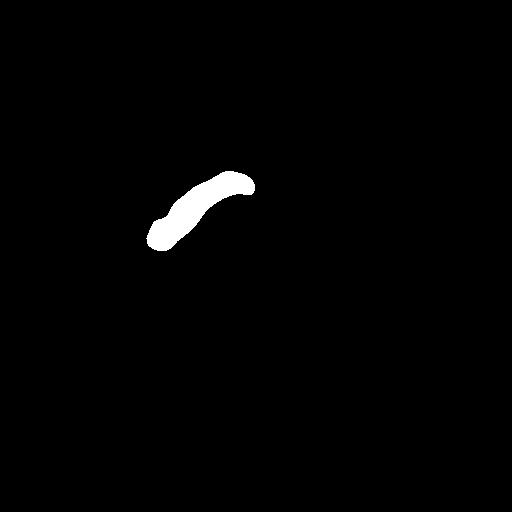

/content/mask_resized/_mask_1689233927_sample-slice043.jpg


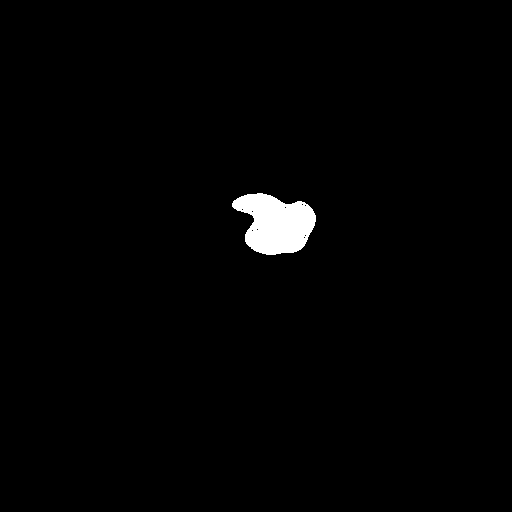

/content/mask_resized/_mask_sample-slice043.jpg


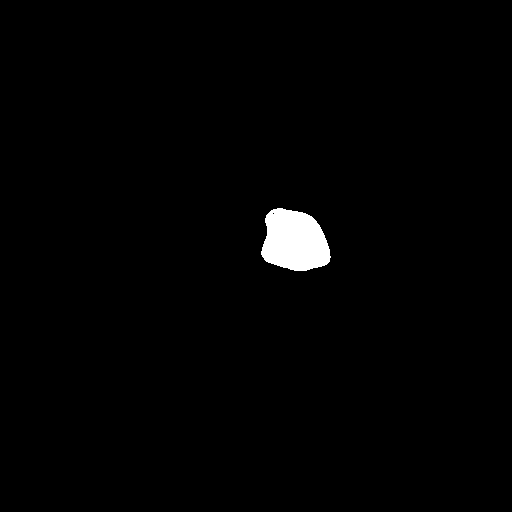

/content/mask_resized/_mask_1689233971_sample-slice106.jpg


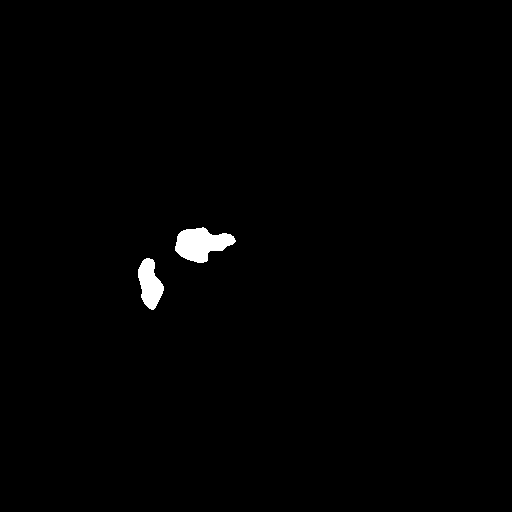

/content/mask_resized/_mask_1689234305_sample-slice041.jpg


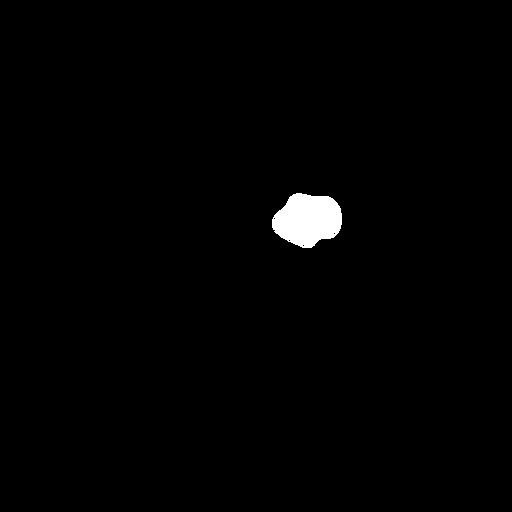

/content/mask_resized/_mask_1689234039_sample-slice039.jpg


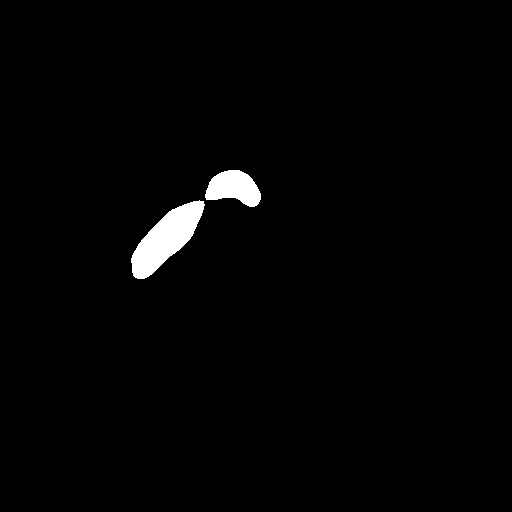

/content/mask_resized/_mask_sample-slice066.jpg


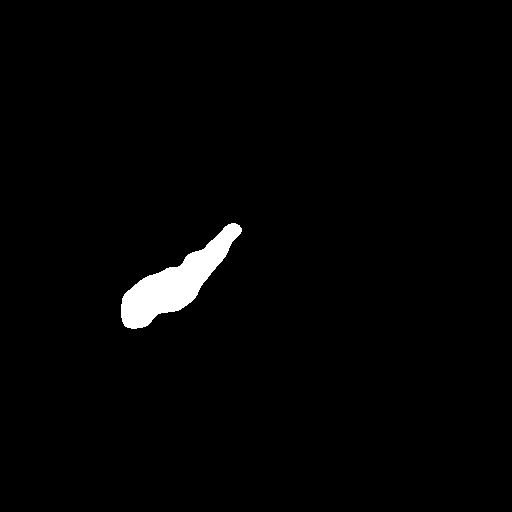

/content/mask_resized/_mask_1689233971_sample-slice104.jpg


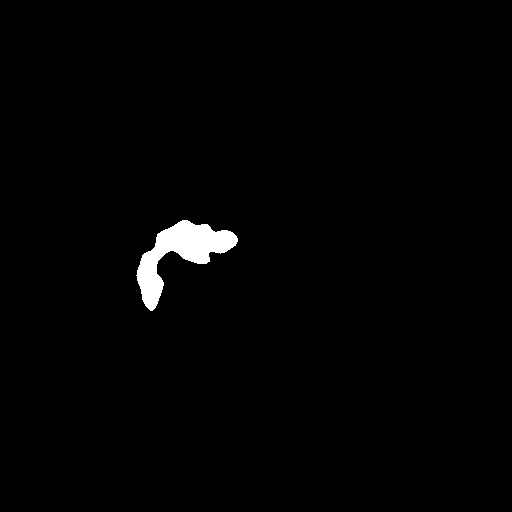

/content/mask_resized/_mask_1689234244_sample-slice053.jpg


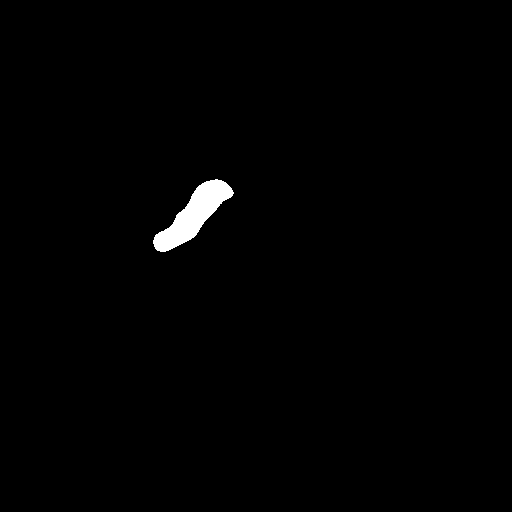

/content/mask_resized/_mask_1689233808_sample-slice043.jpg


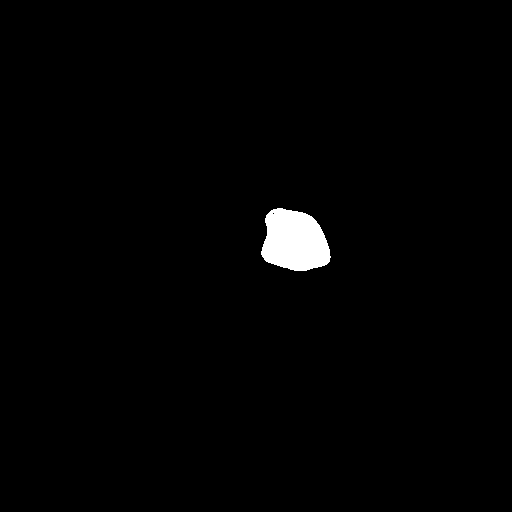

/content/mask_resized/_mask_1689234494_sample-slice021.jpg


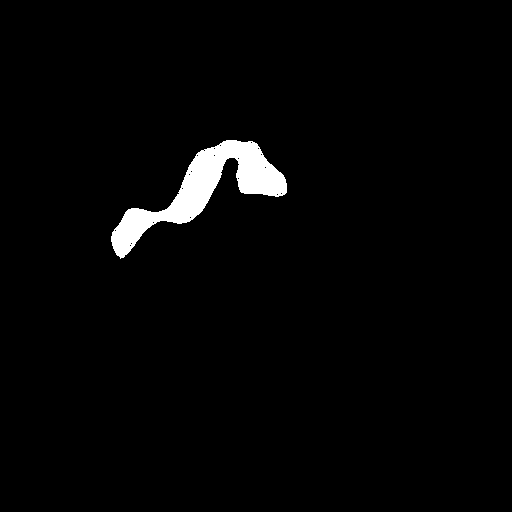

/content/mask_resized/_mask_1689234039_sample-slice043.jpg


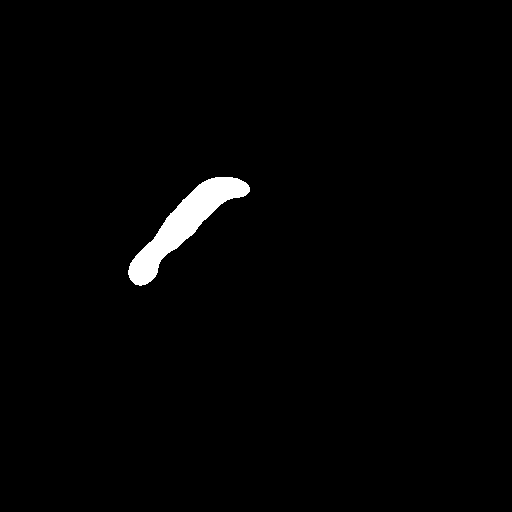

/content/mask_resized/_mask_1689233881_sample-slice035.jpg


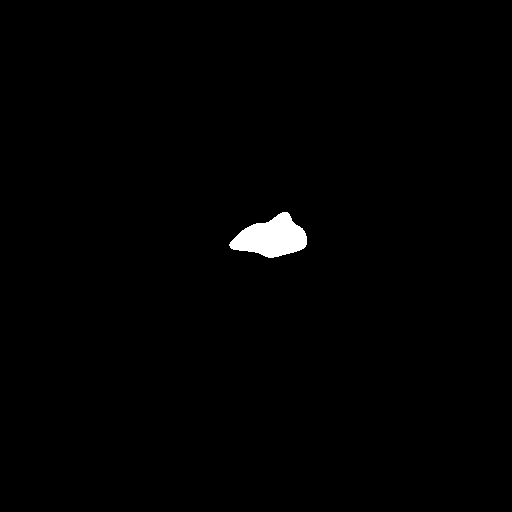

/content/mask_resized/_mask_1689234426_sample-slice042.jpg


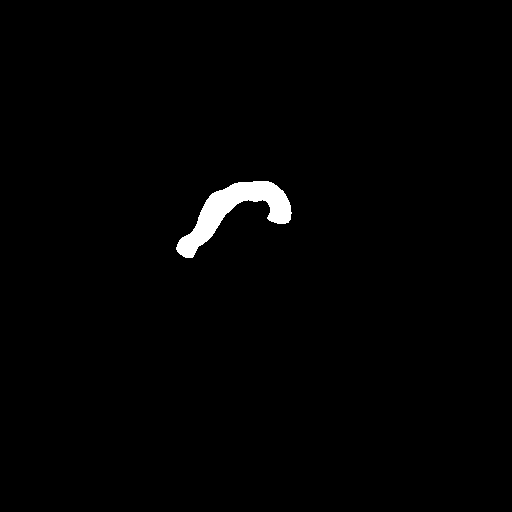

/content/mask_resized/_mask_1689234335_sample-slice037.jpg


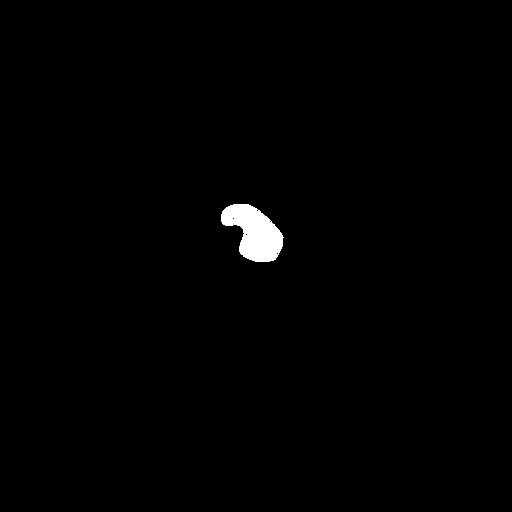

/content/mask_resized/_mask_1689233880_sample-slice058.jpg


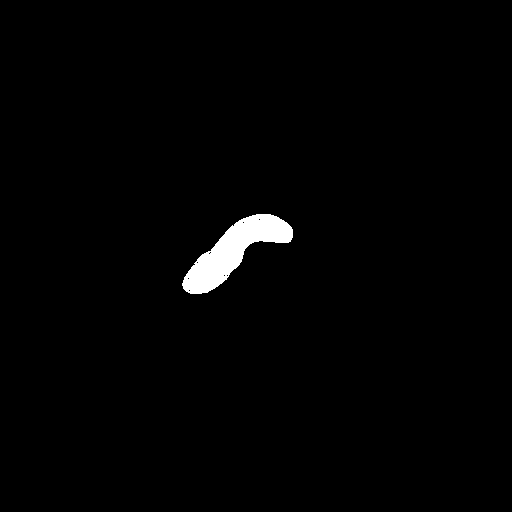

/content/mask_resized/_mask_1689234426_sample-slice041.jpg


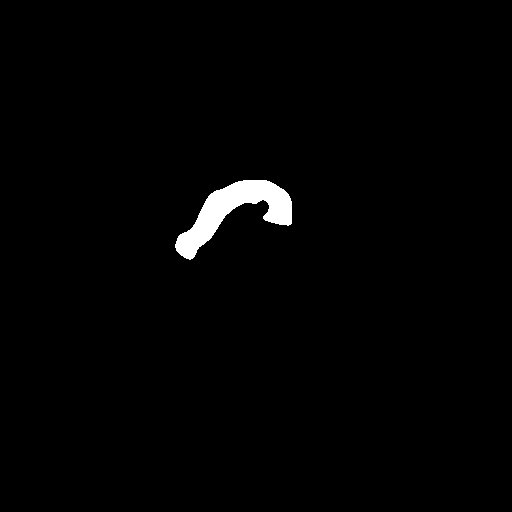

/content/mask_resized/_mask_1689234391_sample-slice050.jpg


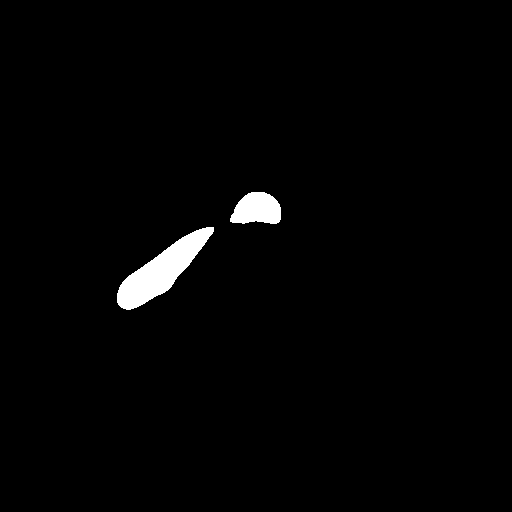

/content/mask_resized/_mask_1689233971_sample-slice083.jpg


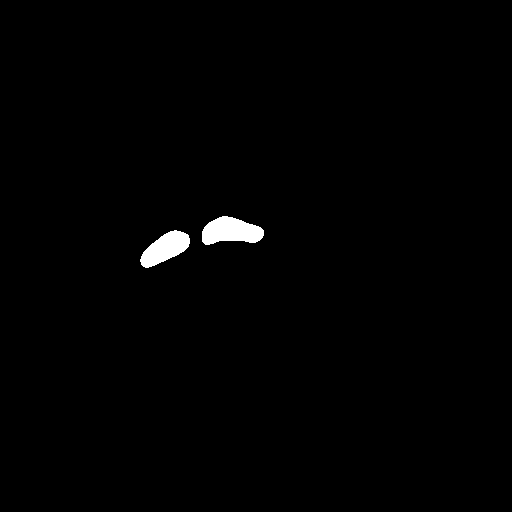

/content/mask_resized/_mask_1689234391_sample-slice042.jpg


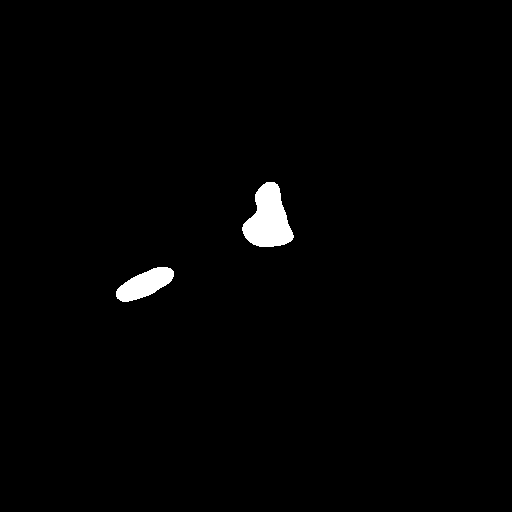

/content/mask_resized/_mask_1689233971_sample-slice091.jpg


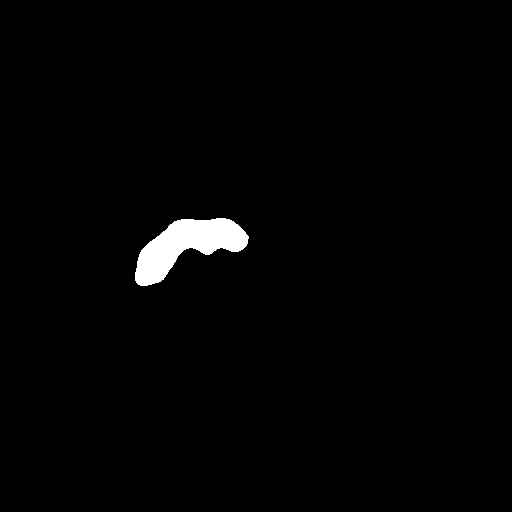

/content/mask_resized/_mask_1689234363_sample-slice041.jpg


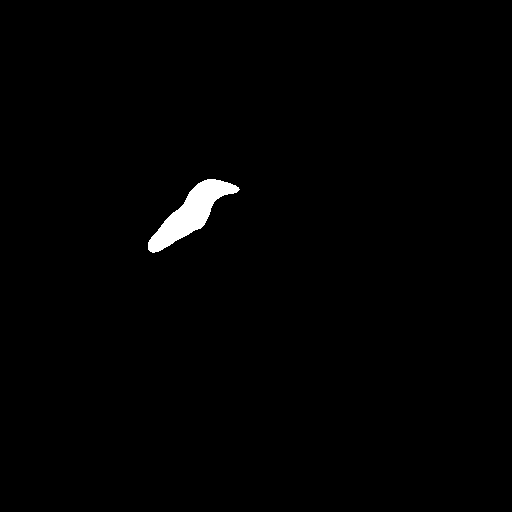

/content/mask_resized/_mask_1689234276_sample-slice049.jpg


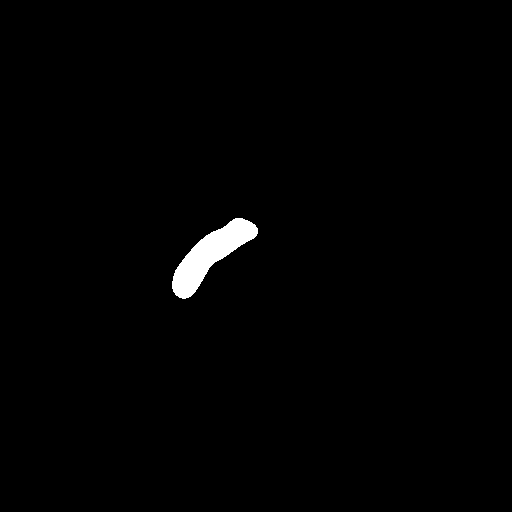

/content/mask_resized/_mask_1689234039_sample-slice040.jpg


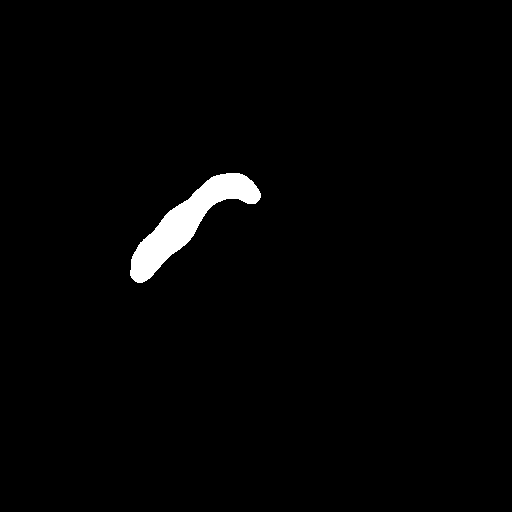

/content/mask_resized/_mask_1689234521_sample-slice012.jpg


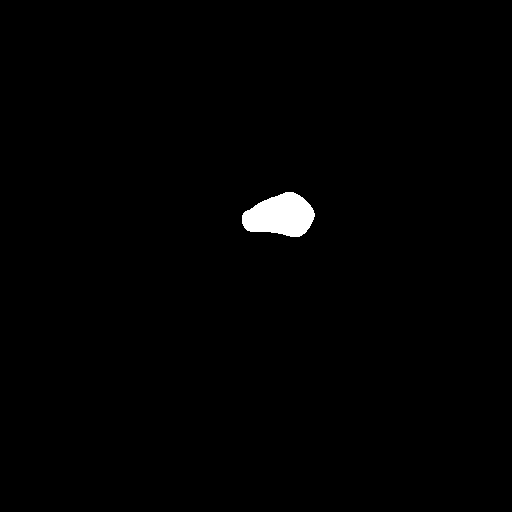

/content/mask_resized/_mask_1689233971_sample-slice090.jpg


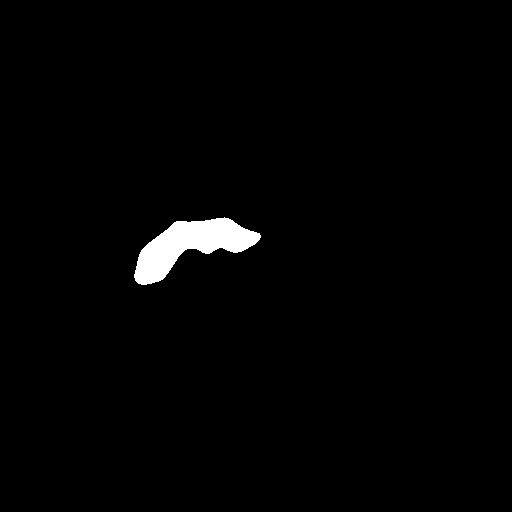

/content/mask_resized/_mask_1689233880_sample-slice059.jpg


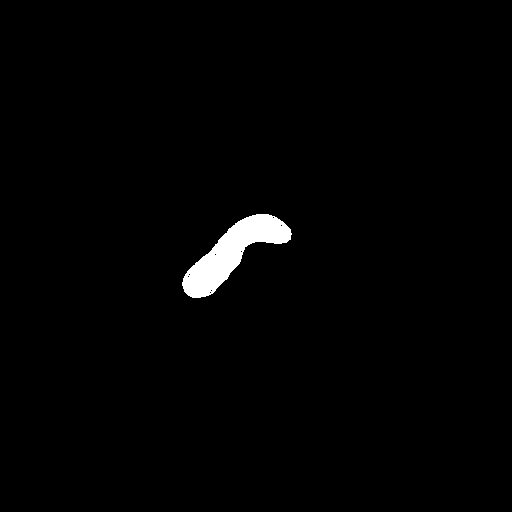

/content/mask_resized/_mask_1689233971_sample-slice088.jpg


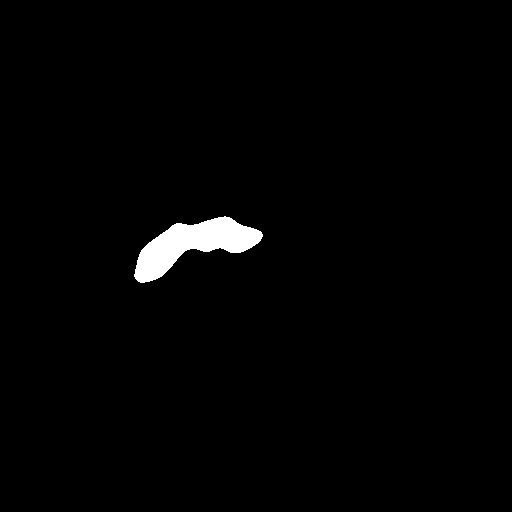

/content/mask_resized/_mask_1689234011_sample-slice050.jpg


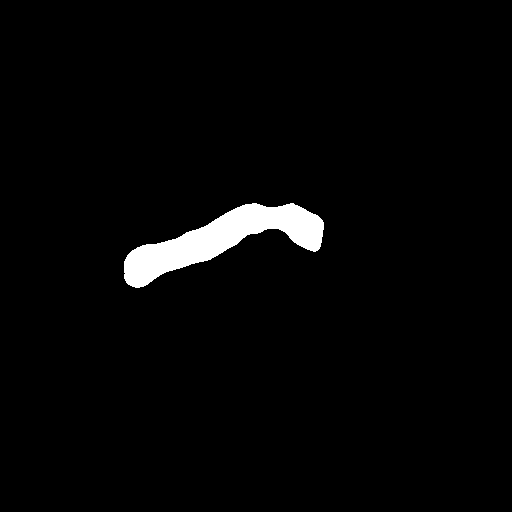

/content/mask_resized/_mask_1689234074_sample-slice045.jpg


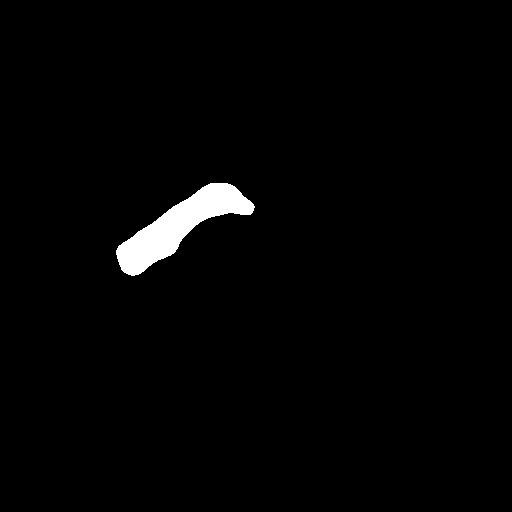

/content/mask_resized/_mask_sample-slice042.jpg


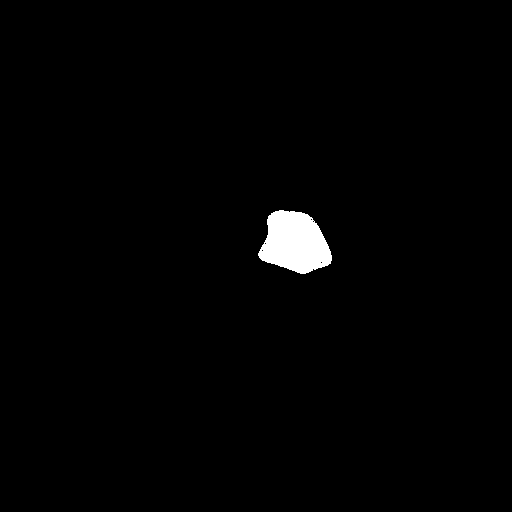

/content/mask_resized/_mask_1689233971_sample-slice087.jpg


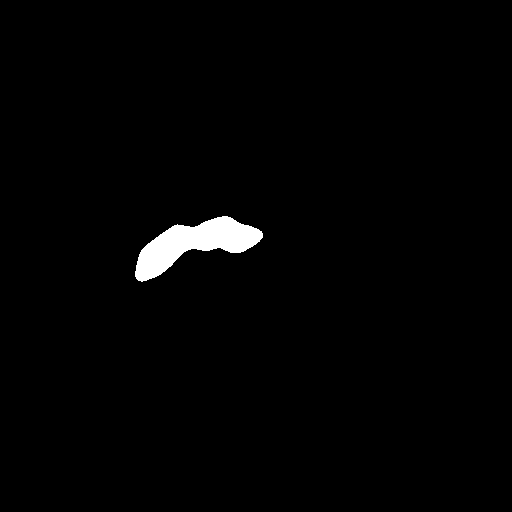

/content/mask_resized/_mask_1689234276_sample-slice045.jpg


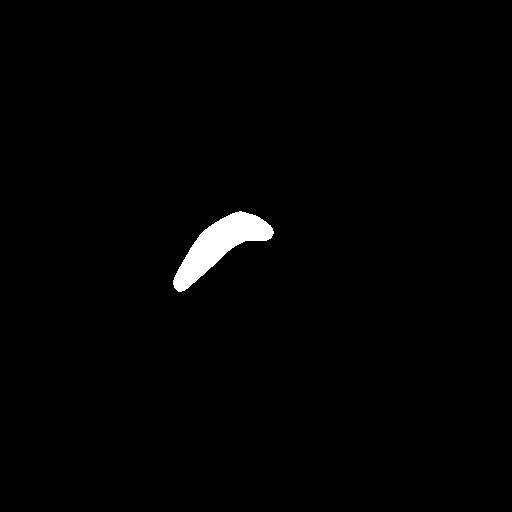

/content/mask_resized/_mask_1689234363_sample-slice037.jpg


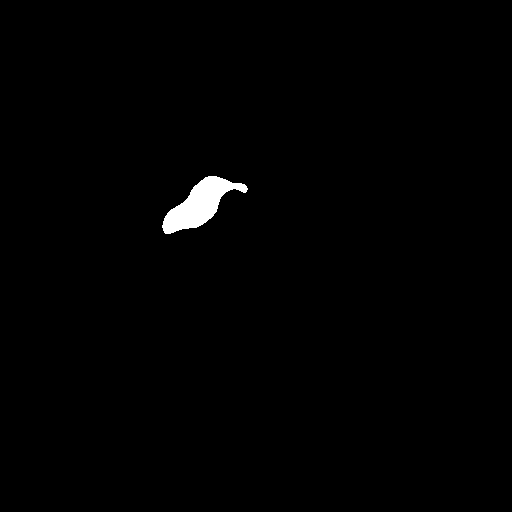

/content/mask_resized/_mask_1689234391_sample-slice032.jpg


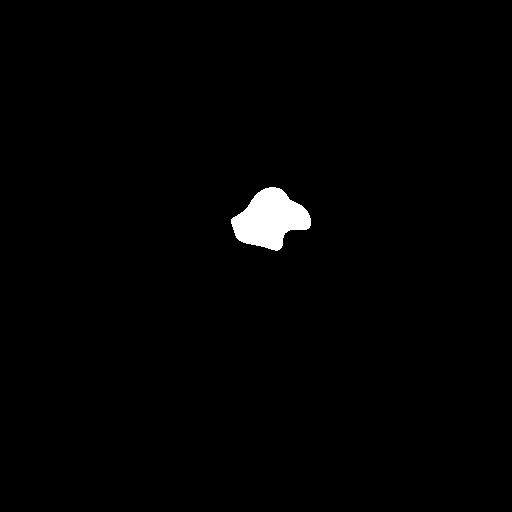

/content/mask_resized/_mask_1689234039_sample-slice044.jpg


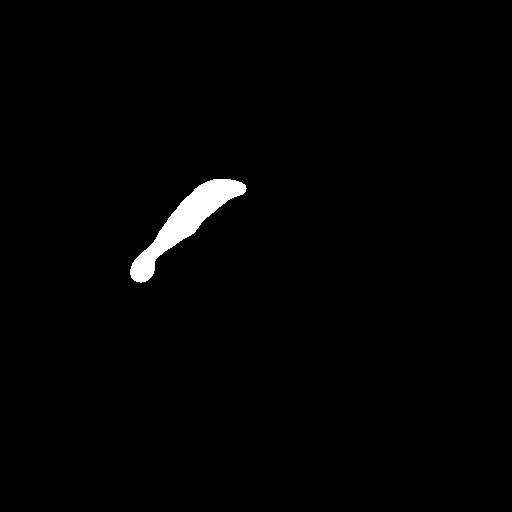

/content/mask_resized/_mask_1689234494_sample-slice022.jpg


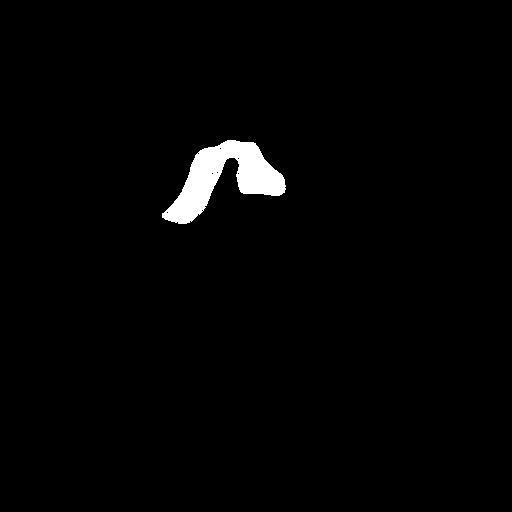

/content/mask_resized/_mask_1689234114_sample-slice043.jpg


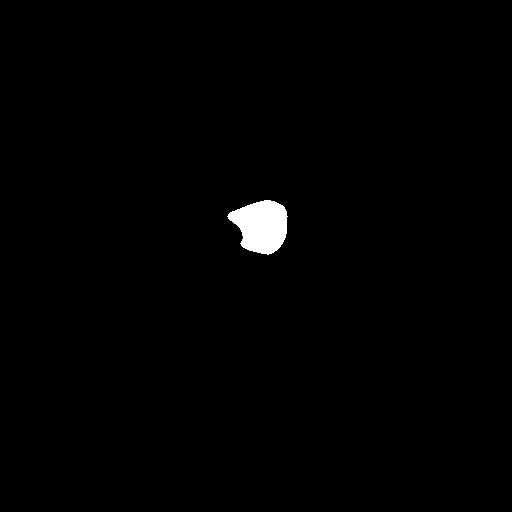

/content/mask_resized/_mask_1689234335_sample-slice031.jpg


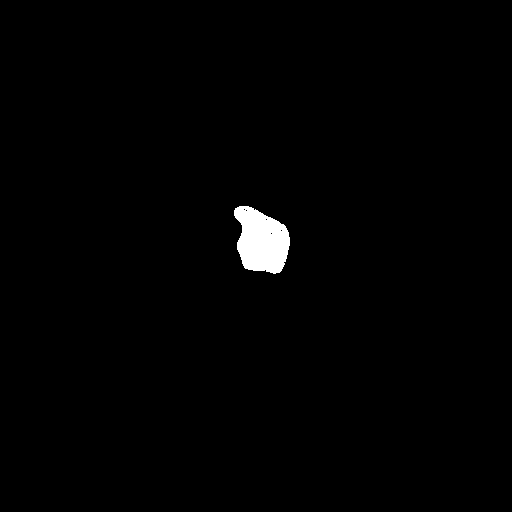

/content/mask_resized/_mask_sample-slice065.jpg


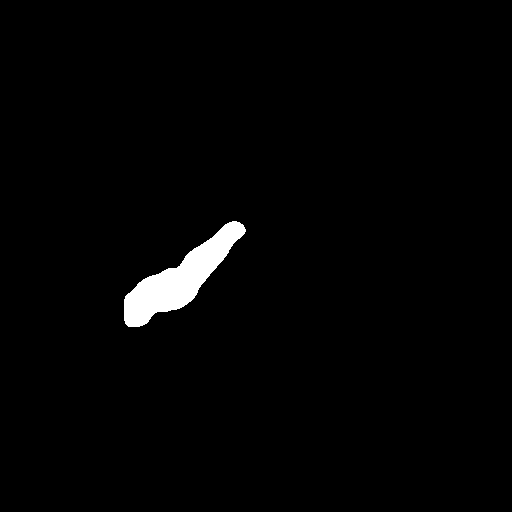

/content/mask_resized/_mask_1689233971_sample-slice086.jpg


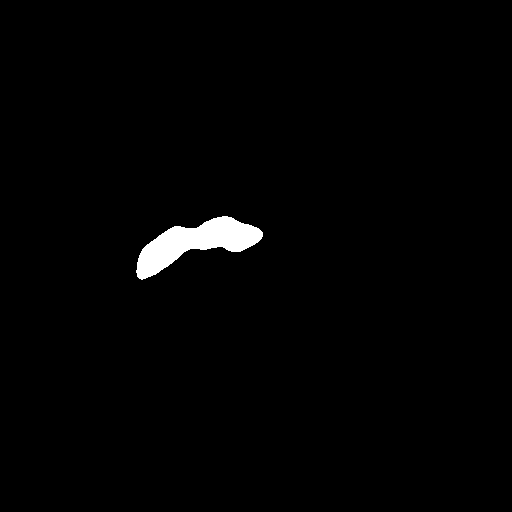

/content/mask_resized/_mask_1689234335_sample-slice032.jpg


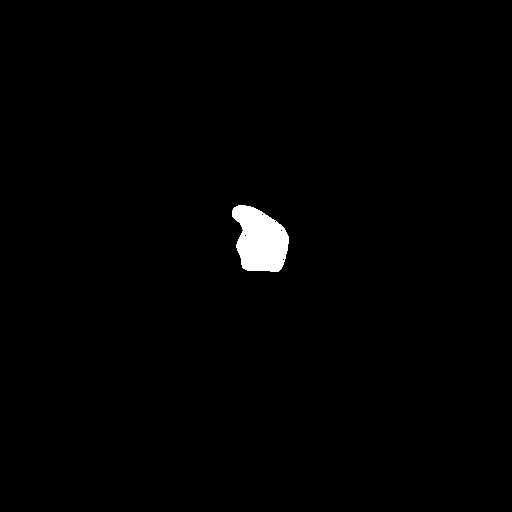

/content/mask_resized/_mask_1689234426_sample-slice043.jpg


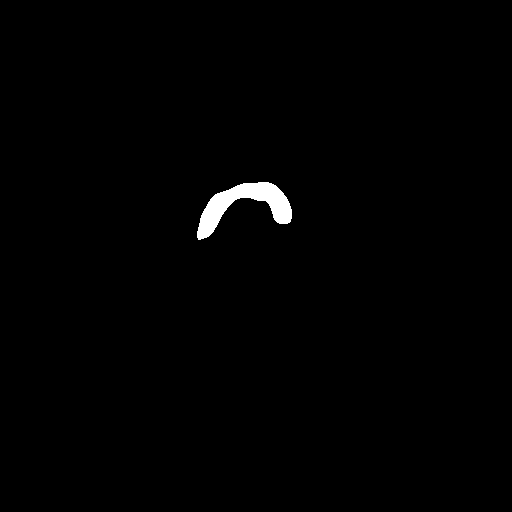

/content/mask_resized/_mask_sample-slice068.jpg


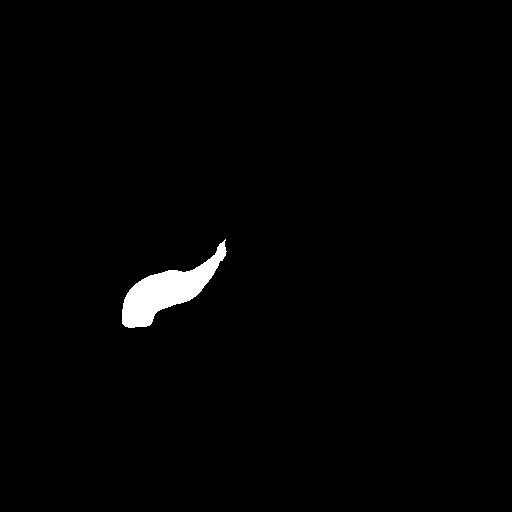

/content/mask_resized/_mask_1689234011_sample-slice042.jpg


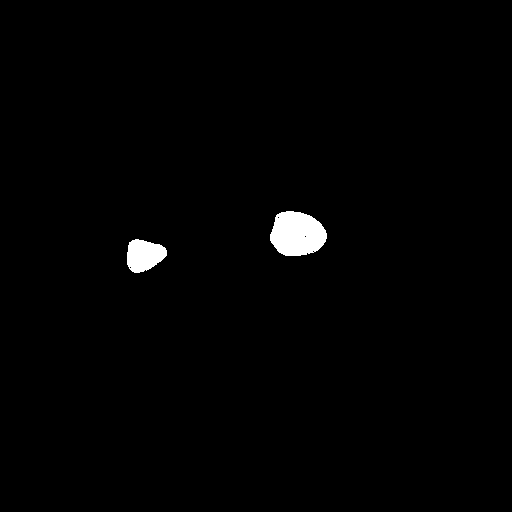

/content/mask_resized/_mask_sample-slice053.jpg


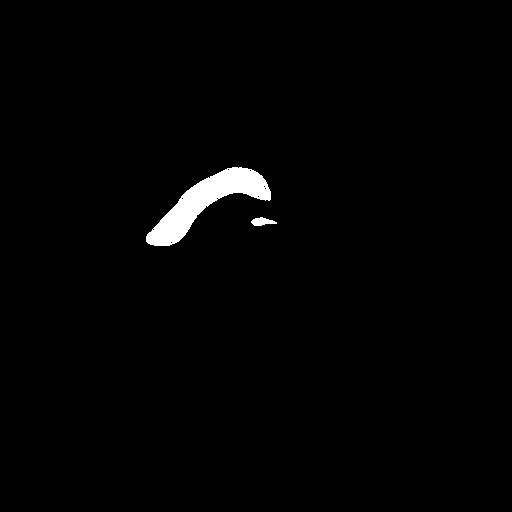

/content/mask_resized/_mask_1689234426_sample-slice035.jpg


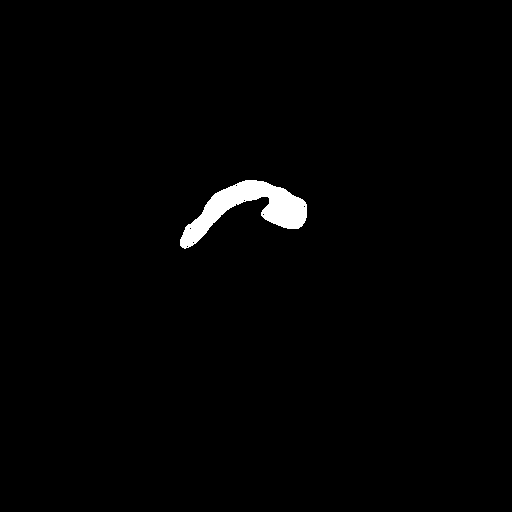

/content/mask_resized/_mask_1689233971_sample-slice102.jpg


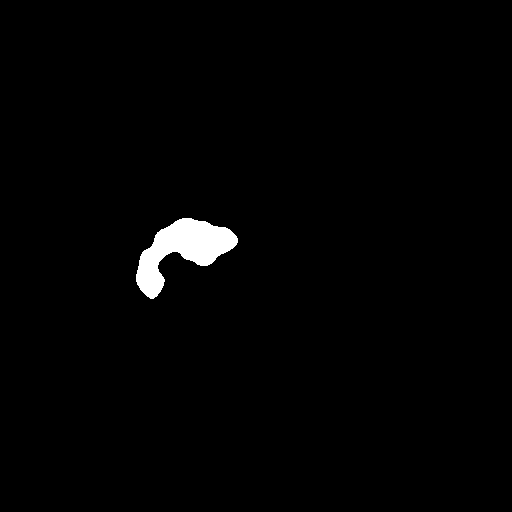

/content/mask_resized/_mask_sample-slice064.jpg


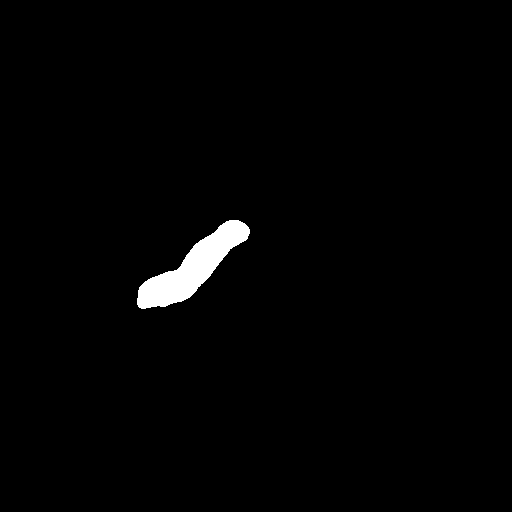

/content/mask_resized/_mask_1689234363_sample-slice039.jpg


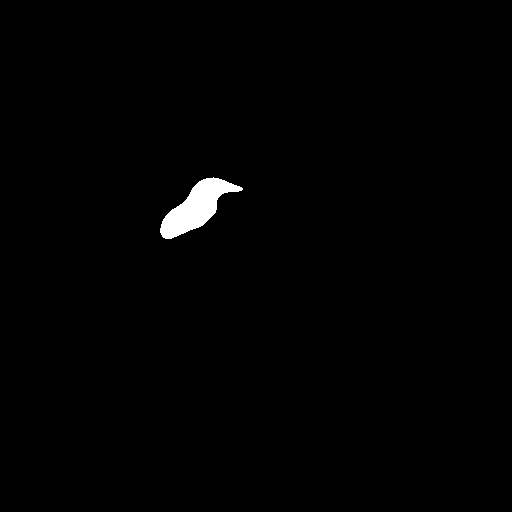

/content/mask_resized/_mask_1689234363_sample-slice029.jpg


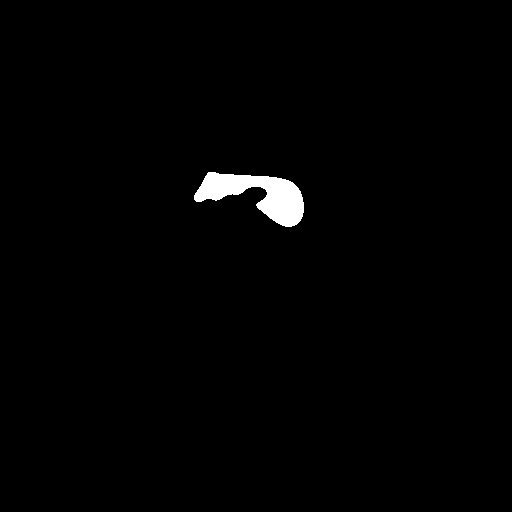

/content/mask_resized/_mask_1689234521_sample-slice011.jpg


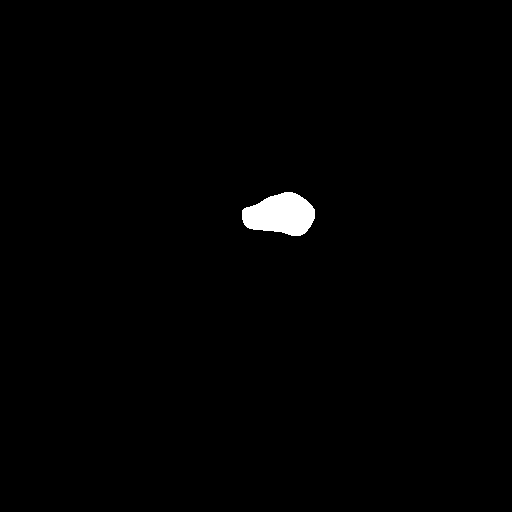

/content/mask_resized/_mask_1689233971_sample-slice054.jpg


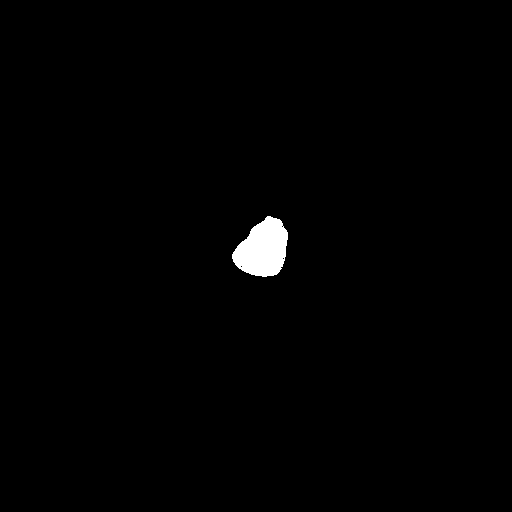

/content/mask_resized/_mask_1689234305_sample-slice056.jpg


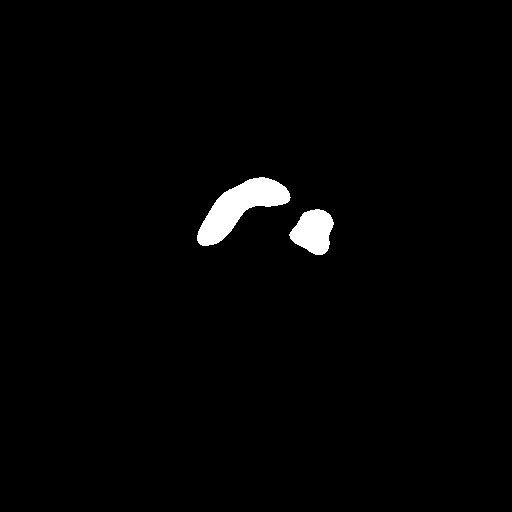

/content/mask_resized/_mask_1689233971_sample-slice103.jpg


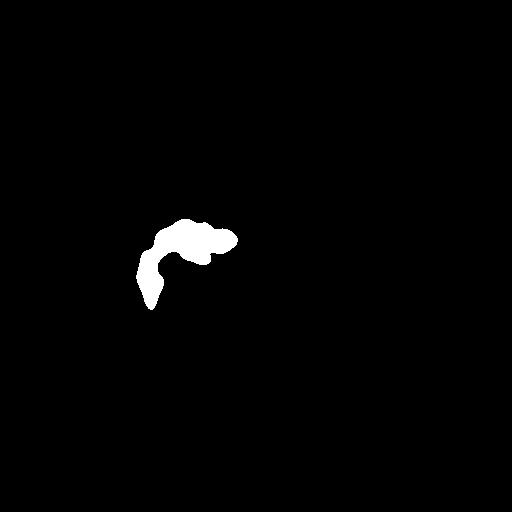

/content/mask_resized/_mask_1689234363_sample-slice040.jpg


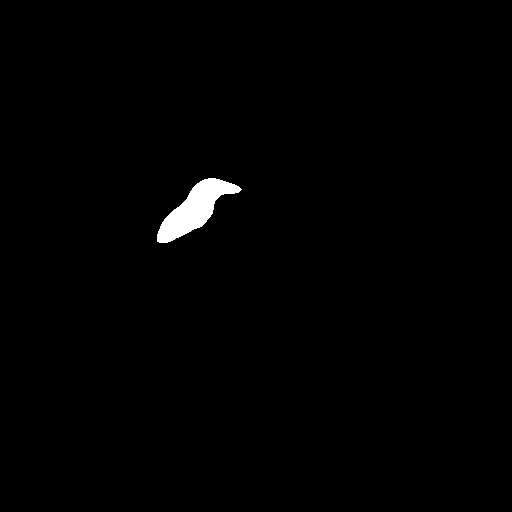

/content/mask_resized/_mask_1689234391_sample-slice055.jpg


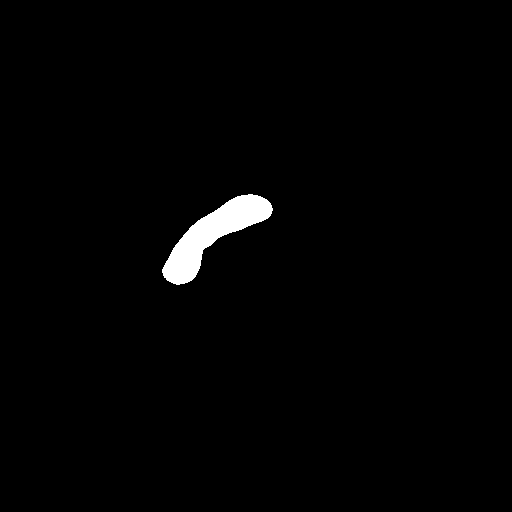

/content/mask_resized/_mask_1689233808_sample-slice041.jpg


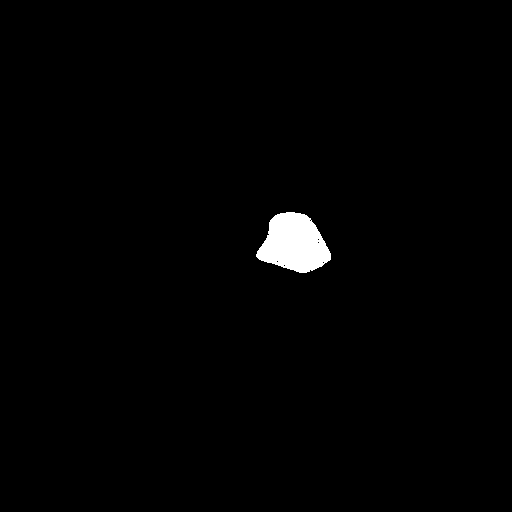

/content/mask_resized/_mask_1689234039_sample-slice035.jpg


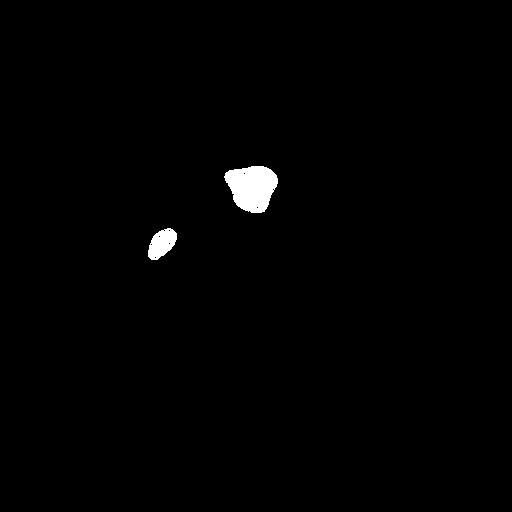

/content/mask_resized/_mask_1689234469_sample-slice046.jpg


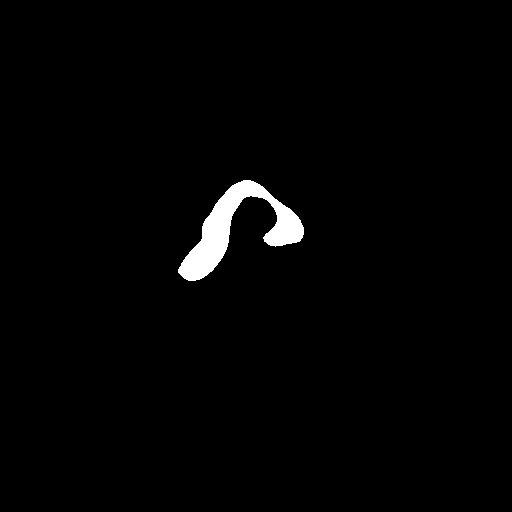

In [ ]:
directory = '/content/data/output_label_directory'
output = '/content/preprocess_output/processed_img'
mask = "/content/mask_resized"
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        print(os.path.join(mask , '_mask_'+filename))
        img = cv2.imread(os.path.join(directory, filename), 0)
        ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        cv2.imwrite(os.path.join(mask ,filename), bw_img)
        cv2_imshow(bw_img)
    else:
        continue




Read masks the same way.

In [ ]:
mask_names = glob.glob("/content/mask_resized/*.jpg")
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset = np.array(masks)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [ ]:
#Normalize images
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255.  #PIxel values will be 0 or 1

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_test, y_train = train_test_split(image_dataset, mask_dataset,test_size=1/3, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 42)


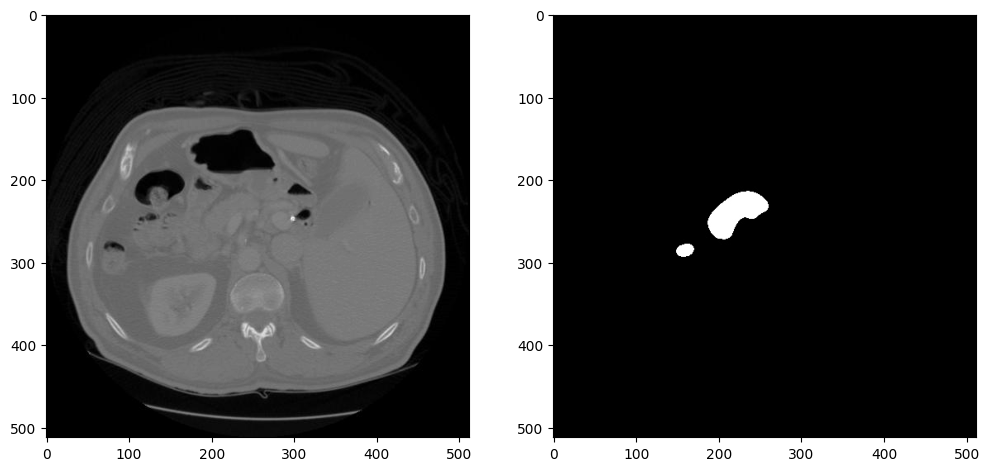

In [ ]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network.
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
IMG_HEIGHT = image_dataset.shape[1]
IMG_WIDTH  = image_dataset.shape[2]
IMG_CHANNELS = image_dataset.shape[3]

input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

In [ ]:
model = build_unet(input_shape, n_classes=1)
model.compile(optimizer=Adam(learning_rate = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

sigmoid
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 512, 512, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 512, 512, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                     

In [ ]:
history = model.fit(X_train, y_train,
                    batch_size = 2,
                    verbose=1,
                    epochs=25,
                    validation_data=(X_test, y_test),
                    shuffle=False)


Epoch 1/25
128/128 [==============================] - 115s 576ms/step - loss: 0.1182 - accuracy: 0.9744 - val_loss: 1.5368 - val_accuracy: 0.2673
Epoch 2/25
128/128 [==============================] - 76s 594ms/step - loss: 0.0605 - accuracy: 0.9849 - val_loss: 0.7645 - val_accuracy: 0.4008
Epoch 3/25
128/128 [==============================] - 76s 593ms/step - loss: 0.0489 - accuracy: 0.9849 - val_loss: 1.4204 - val_accuracy: 0.4795
Epoch 4/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0439 - accuracy: 0.9852 - val_loss: 0.0951 - val_accuracy: 0.9855
Epoch 5/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0425 - accuracy: 0.9854 - val_loss: 0.0531 - val_accuracy: 0.9855
Epoch 6/25
128/128 [==============================] - 76s 593ms/step - loss: 0.0367 - accuracy: 0.9857 - val_loss: 0.0824 - val_accuracy: 0.9855
Epoch 7/25
128/128 [==============================] - 76s 592ms/step - loss: 0.0337 - accuracy: 0.9860 - val_loss: 0.0919 - val_a

In [ ]:
!zip /content/data

In [ ]:
import shutil

def zip_directory(directory_path, output_path):
    shutil.make_archive(output_path, 'zip', directory_path)

# Example usage
directory_path = '/content/data'  # Replace with the path to the directory you want to zip
output_path = '/content/drive/MyDrive/Datasets/Pancreatic tumor /pc_data'  # Replace with the desired output path for the zip file

zip_directory(directory_path, output_path)


In [ ]:
#Save the model for future use
model.save('/content/drive/MyDrive/PC_u-net_25epochs.hdf5')

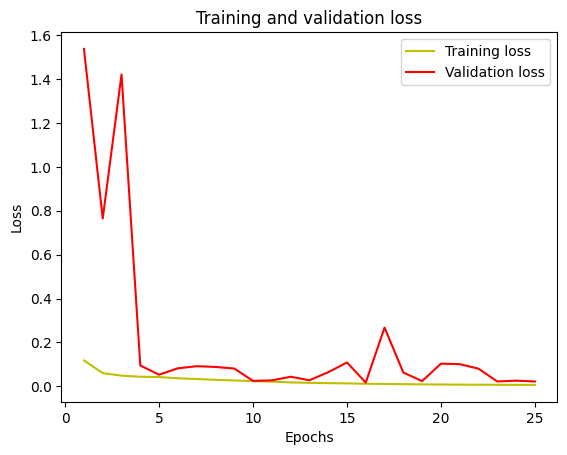

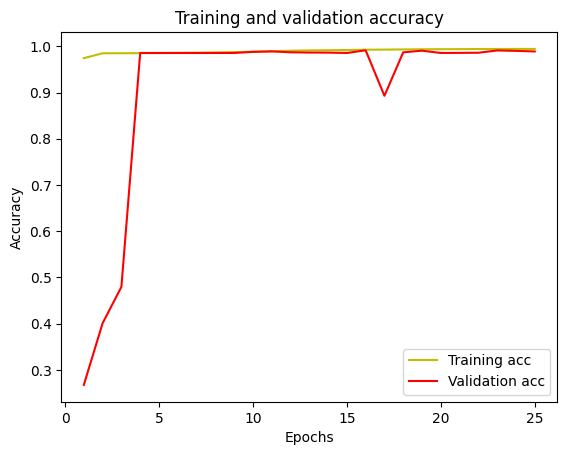

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model("/content/drive/MyDrive/lc_u-net_25epochs.hdf5", compile=False)


In [ ]:
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

3/3 [==============================] - 68s 1s/step


In [ ]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.74590117


(1, 512, 512, 1)
1/1 [==============================] - 0s 25ms/step
(512, 512)


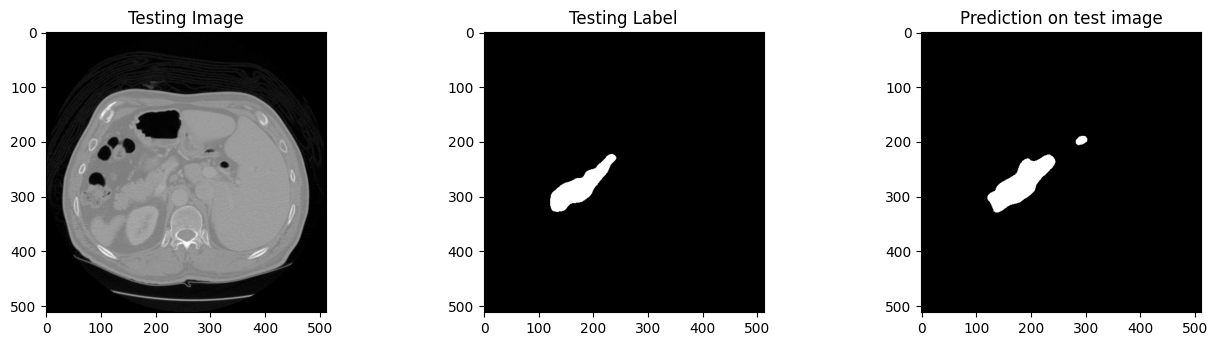

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test)-1)
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()